# Coffee Bean Health Detection using Ocatve in ipynb.


## Installation

In [95]:
!apt-get update
!apt install octave

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave

In [96]:
%%octave
pkg rebuild
pkg install -forge image
pkg load image

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

octave: X11 DISPLAY environment variable not set

octave: disabling GUI features

For information about changes from previous versions of the image package, run 'news image'.

In [98]:
!apt-get install liboctave-dev
!pip install oct2py
%reload_ext oct2py.ipython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
liboctave-dev is already the newest version (4.2.2-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 122 not upgraded.


## Overview

In [4]:
x = %octave [1 2; 3 4];
x

array([[1., 2.],
       [3., 4.]])

In [5]:
a = [1, 2, 3]

%octave_push a
%octave a = a * 2;
%octave_pull a
a

array([[2., 4., 6.]])

When using the cell magic, `%%octave` (note the double `%`), multiple lines of Octave can be executed together.  Unlike
with the single cell magic, no value is returned, so we use the `-i` and `-o` flags to specify input and output variables.  Also note the use of the semicolon to suppress the Octave output.

In [0]:
%%octave -i x -o U,S,V
[U, S, V] = svd(x);

In [7]:
print(U, S, V)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]] [[5.4649857  0.        ]
 [0.         0.36596619]] [[-0.57604844  0.81741556]
 [-0.81741556 -0.57604844]]


## Plotting

Plot output is automatically captured and displayed, and using the `-f` flag you may choose its format (currently, `png` and `svg` are supported).

12*x^4 - 2.5*x^3 - 8*x^2 - 0.1*x^1 + 8

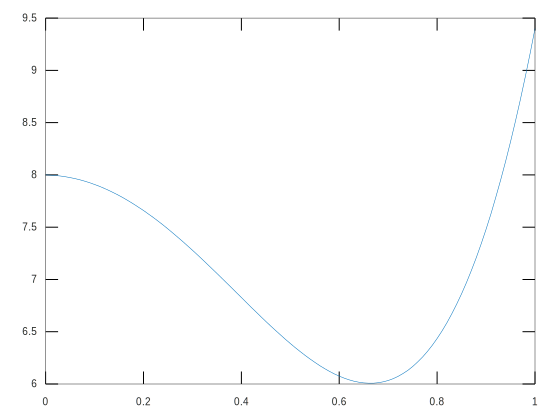

In [8]:
%%octave -f svg

p = [12 -2.5 -8 -0.1 8];
x = 0:0.01:1;

polyout(p, 'x')
plot(x, polyval(p, x));

The width or the height can be specified to constrain the image while maintaining the original aspect ratio.

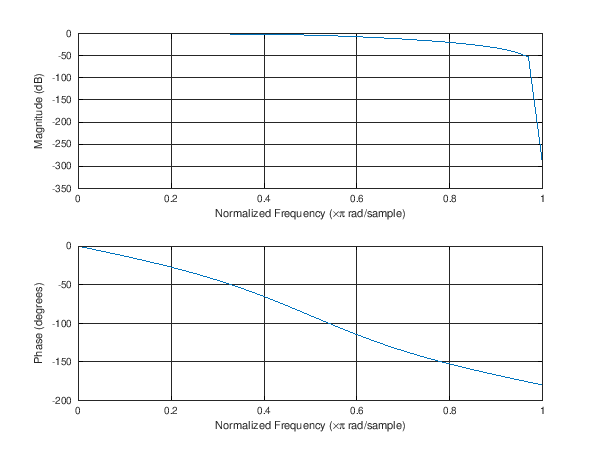

In [9]:
%%octave -f png -w 600

% butterworth filter, order 2, cutoff pi/2 radians
b = [0.292893218813452  0.585786437626905  0.292893218813452];
a = [1  0  0.171572875253810];
freqz(b, a, 32);

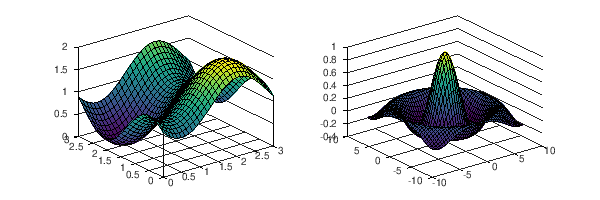

In [10]:
%%octave -s 600,200 -f png

% Note: On Windows, this will not show the plots unless Ghostscript is installed.

subplot(121);
[x, y] = meshgrid(0:0.1:3);
r = sin(x - 0.5).^2 + cos(y - 0.5).^2;
surf(x, y, r);

subplot(122);
sombrero()

Multiple figures can be drawn.  Note that when using imshow the image will be created as a PNG with the raw
image dimensions.

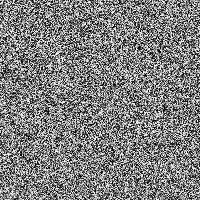

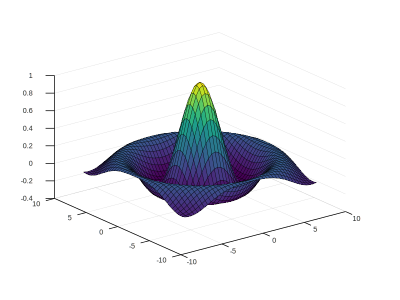

In [85]:
%%octave -f svg -h 300
sombrero
figure
imshow(rand(200,200))

Plots can be drawn inline (default) or bring up the Octave plotting GUI by using the -g (or --gui) flag: 

In [0]:
%%octave -g
plot([1,2,3])
# brings up an Octave plotting GUI

In [0]:
import requests

img_data = requests.get('http://tineye.com/images/widgets/mona.jpg').content
with open('coffee.jpg', 'wb') as handler:
    handler.write(img_data)

a =

ans(:,:,1) =

 Columns 1 through 16:

  153  155  167  163  165  166  168  173  169  169  169  168  170  177  178  173

  155  151  157  158  164  162  161  161  162  163  167  168  166  167  169  169

  159  156  158  163  172  167  168  166  170  167  169  171  166  162  163  168

  154  159  161  165  171  165  173  174  175  169  167  170  169  168  173  178

  157  168  171  170  173  170  181  183  182  177  177  177  177  178  180  181

  156  166  169  164  171  171  179  181  174  179  184  186  185  189  191  189

  159  164  167  162  171  172  174  178  178  180  183  185  184  186  188  184

  167  167  171  165  173  171  168  175  188  181  178  181  184  189  191  189

  175  171  173  175  175  177  180  180  186  185  184  187  190  190  191  192

  172  176  176  180  185  183  184  192  193  190  191  192  193  192  192  190

  172  175  174  180  189  189  191  201  196  192  192  193  193  194  193  189

  170  172  172  179  192  197  195  199  197  192  194  196  196  200  201  195

  170  171  177  184  189  196  197  191  192  190  194  199  201  204  203  199

  174  173  181  185  182  188  196  190  191  191  196  203  207  205  201  197

  176  175  181  184  184  186  192  197  198  200  203  210  215  209  200  201

  176  177  181  191  196  193  193  201  202  205  205  210  216  209  199  205

  172  173  184  198  204  196  201  204  209  207  211  207  202  207  209  206

  173  175  186  197  207  204  208  210  206  213  217  210  206  209  203  200

  177  180  188  194  205  209  211  209  206  216  216  207  207  209  204  205

  175  178  187  190  202  208  209  209  209  214  213  208  209  213  214  215

  183  185  193  195  204  204  206  210  212  209  212  217  216  219  220  218

  186  191  195  199  205  197  199  203  216  212  216  222  220  220  222  220

  186  197  201  208  215  207  210  209  217  221  219  220  220  221  225  224

  181  197  198  208  217  207  213  206  211  225  223  220  222  223  227  227

  167  196  194  207  211  211  202  195  199  227  211  218  218  223  227  232

  151  174  185  203  201  194  186  185  190  220  215  218  223  232  229  220

  140  156  165  173  168  180  174  167  175  205  220  224  225  226  220  208

  141  152  152  138  136  169  181  182  163  181  204  209  211  208  207  206

  120  137  143  127  124  149  166  182  169  172  186  189  193  196  201  201

   74  100  118  110  116  141  159  170  172  179  185  177  173  180  183  179

   68   89  107  107  113  138  159  159  159  178  176  165  152  163  162  154

   61   75  107  126  123  126  144  146  152  168  158  155  147  164  162  151

   60   81  104  124  132  141  137  141  161  155  146  153  154  158  161  131

   69   89  106  119  135  150  140  133  157  158  147  144  152  161  148  103

   73   92  105  112  123  131  123  126  139  142  136  132  133  131  126  117

   83   92   99  105  114  112  112  133  135  125  115  122  127  112  103  116

  116  103   92   97  113  110  106  122  126  114   99  110  127  117   99  103

  107   83   64   62   85   89   82   86  107  104   96  109  130  126  114  113

   91   74   60   59   82   93   91   90   99   99   93  112  131  131  126  116

   89   71   62   60   80   85   82   79   93  101   91   96  107  116  129  118

   74   60   48   56   59   85   99   86   85   92   99   95   94   90  102  107

   65   49   49   55   52   75   90   89   89   96   99   97  102   91   93   96

   40   33   49   54   51   75   84   87   92   96   89   89   98   89   86   91

   41   43   54   50   57   83   91   91   92   89   84   89  100   97   96  101

   44   54   50   49   71   89   94   92   90   88   90  100  103  101   99   97

   37   46   40   47   75   83   86   87   88   91   94  102   94   95   93   86

   40   42   44   45   66   75   80   87   74   82   82   83   77   80   81   77

   30   36   55   50   62   77   80   86   78   92   87   83   78   82   80   80

   18   20   54   52   44   57   53   65   80   90   92   84   73   70   74   69

   20   22   49   50   46   57   50   51   71   84   85   78   75   76   75   69

   22   24   49   60   65   67   61   58   69   86   91   86   83   79   74   70

   24   21   42   61   60   48   47   53   56   69   80   84   82   79   74   70

   21   21   40   53   50   35   50   70   64   70   86  101  102  102   97   92

   23   25   40   40   34   25   48   70   52   61   81   95   96   95   95   98

   21   23   40   38   36   26   43   60   47   62   81   89   96  100  101  111

   23   21   43   51   54   36   41   53   67   82   89   94  117  129  121  128

   28   41   53   56   69   68   71   82   99   93   83   92  116  123  120  124

   38   33   54   66   70   79   92   89   98  102  115  129  133  125  114  107

   44   44   65   74   77   83   91   87  105  111  119  128  138  139  128  111

   53   58   72   72   72   80   87   92  111  114  112  120  138  131  109   97

   63   54   69   80   77   80   82   86  115  116  117  126  129  108   91   97

   69   57   65   84   89   82   63   72   87  103  124  129  118  105   98   97

   76   72   68   75   83   78   57   72   95  113  124  109   97   98  103  100

   82   81   88   81   66   73   66   69   91  112  119  118  120  121  130  146

   87   84   95   87   82   81   70   85  117  123  111  114  117  124  135  142

   94   75   87   88   92  100   89   94  127  131  122  131  126  125  135  130

   87   70   89   94   97  113  100   96  121  151  145  155  153  149  160  146

   80   72   93   89   90  109   93   85  100  171  171  170  166  162  168  150

   87   74   82   74   84   99   76   72   89  137  142  177  197  180  173  155

   86   75   79   76   84   84   60   67   89   98   98  144  180  188  189  176

   78   81   91   91   93   89   74   84   91  103   91   89  103  139  169  177

   77   89  102  100  106  112  107  109   97   93   81   84   91  101  126  169

   72   93  105  103  111  130  123  102  107  105  110  107  113  110  120  154

   71   85   97   99  102  111  103   92  105  118  114  106  110  114  133  136

   72   89  104   93   84   89   96  103  118  128  126  119  123  130  141  128

   60   82   98   84   87  107  121  123  138  151  166  160  162  172  178  178

   43   72  103  100  117  146  157  154  179  180  173  154  161  175  181  181

   35   62  103  112  134  156  169  175  164  163  147  155  169  157  152  138

   42   55   97  118  144  156  165  176  142  141  140  159  164  140  139  132

   36   54  106  128  143  138  142  157  162  147  145  149  154  150  143  127

   30   23   58  123  142  138  155  170  164  169  172  179  183  180  174  173

   32   16   36   90  116  128  151  172  177  176  178  182  183  182  188  199

   30    8   20   58   91  107  122  140  160  162  167  170  161  149  146  147

   36   11   12   37   77  100  111  127  143  144  143  140  136  139  137  130

   46   19   12   33   77   97  107  124  134  128  123  124  131  143  143  132

   46   18   14   39   88  100  107  118  120  112  113  126  139  140  129  112

   50   19   15   56  114  125  136  146  155  142  134  139  147  133  102   75

   64   33   29   78  140  147  156  163  171  168  164  176  190  175  127   85

   54   42   52  113  150  155  172  174  170  165  162  183  183  174  140   78

   53   47   83  134  154  160  174  177  186  181  182  184  189  177  104   55

   60   68  112  140  149  161  165  171  180  187  190  184  189  155   65   38

   96  109  132  136  147  163  159  167  164  183  180  175  166  111   48   38

   80   81   85   88   98  109  111  117  125  141  134  125  104   62   39   36

   47   32   38   54   58   66   79   83   90   93   92   74   58   47   40   37

   38   27   40   57   57   66   78   82   81   72   69   47   38   38   35   35

   53   52   66   67   69   83   86   87   86   74   58   36   32   24   29   43

   51   48   61   74   75   77   89   77   69   58   50   42   45   42   44   46

   49   45   59   61   69   76   70   60   44   47   51   45   44   40   45   52

   52   47   56   55   67   68   53   51   32   42   49   48   52   49   51   55

   53   48   48   55   60   45   41   45   32   42   48   47   57   59   60   62

   64   51   52   55   51   38   40   43   34   46   54   54   61   64   70   73

   72   51   59   45   39   40   36   39   46   49   56   57   65   68   70   66

   73   54   58   42   38   45   42   47   49   45   52   54   56   57   56   44

   62   50   46   40   39   39   45   51   47   45   56   56   47   43   46   38

   63   36   29   25   36   47   42   37   38   44   64   62   80   93   83   84

   62   35   28   25   35   41   41   35   46   61   61   86  100  119  133  127

   55   33   22   24   32   38   41   34   39   66   76  103  104  134  131   82

   53   29   19   25   33   35   38   31   39   61   84   87   89  117   97   80

   53   29   18   25   35   32   34   24   37   62   80   89  111  106  104  155

   49   23   18   25   34   31   30   23   49   75   78  107  141  137  164  184

   44   18   17   21   29   29   25   22   44   68   77  116  141  145  140  102

   43   15   19   20   25   24   20   21   36   46   66  105  123  126   92   88

   40   23   13   18   21   30   20   19   30   54   65   99  127   85   94  122

   41   20   13   23   28   33   24   23   27   46   71   98   95   66  104  141

   37   11   10   26   33   35   24   23   24   35   58   70   59   66  115  115

   31    7   12   31   39   40   27   27   18   28   49   52   41   62  102   80

   30    9   18   29   34   36   24   21   19   23   38   51   45   48   69   64

   33   10   19   21   22   25   19   17   25   22   25   43   50   42   48   55

   39   11   15   12   14   20   20   23   23   25   27   36   43   41   43   48

   48   13   11    3    5   11   12   19   20   17   17   27   36   40   38   34

   53   15    6    4   13   17   12   11    6    4    7   16   19   21   27   23

   40   10    9    9   14   15   14   17   12   10   12   17   17   15   18   20

   30    8   13   17   18   19   17   21   18   19   18   25   22   14   15   21

   26    8   15   20   24   21   16   14   18   23   23   27   28   20   19   25

   22    4   10   16   23   20   15   11   17   24   23   25   27   23   24   24

   22    3    5   12   17   20   22   22   23   28   26   25   26   26   28   26

   24    4    4    9   16   21   29   30   29   31   31   32   30   29   32   31

   28    6    1    5   16   22   29   27   30   31   35   40   35   31   36   35

   19    2    2    7   14   16   24   23   32   34   39   38   39   39   36   39

   17    2    4    7   11   14   21   21   33   36   38   35   35   36   34   35

   19    4    6    7   10   12   17   17   21   24   26   22   24   29   30   31

   18    3    6    8   12   14   18   18   15   17   19   15   18   24   26   30

   18    1    7    9   16   22   24   23   15   14   15   15   19   22   24   31

   21    5   11   13   18   25   26   28   18   15   17   20   23   25   25   33

   26   10   17   16   20   25   27   30   29   27   29   29   31   30   28   33

   25    9   19   18   22   26   29   37   26   28   30   29   32   35   31   32

   22    5    8   15   17   20   33   28   13   17   25   31   32   35   38   40

   24    4    9   13   15   20   28   27   19   21   26   32   33   36   39   38

   23    4   10   10   14   17   18   19   20   20   23   28   31   36   39   40

   25    6   13    9   13   18   13   16   20   22   26   31   32   33   37   36

   22    5   11    9   14   19   12   17   17   21   29   34   32   32   33   32

   16    3    9    9   16   18   18   21   24   26   30   31   27   27   32   34

   37   24   30   32   38   41   47   48   52   51   51   49   46   47   52   55

 Columns 17 through 32:

  182  184  183  176  175  179  180  177  178  172  170  172  174  176  177  175

  175  177  175  170  168  172  171  167  162  160  162  164  161  163  167  169

  173  175  174  172  171  175  173  168  156  161  169  171  169  167  168  167

  174  177  178  178  181  184  180  174  171  173  173  172  171  173  174  173

  185  186  185  183  185  187  185  180  181  181  178  173  175  177  177  175

  194  195  191  186  184  186  185  182  183  186  185  185  185  182  180  179

  191  192  192  188  187  187  187  188  190  189  188  187  186  186  184  188

  187  191  196  196  196  197  199  199  193  193  189  191  193  191  186  188

  191  192  193  196  199  201  200  200  195  190  192  197  198  196  194  191

  192  195  197  196  193  192  194  196  197  198  200  199  195  195  198  198

  193  196  197  197  192  192  194  197  197  202  204  198  192  193  197  198

  196  196  195  196  198  200  201  203  202  204  205  201  198  197  198  197

  202  201  199  198  200  203  205  207  210  208  207  208  208  206  205  207

  204  204  204  203  200  202  207  210  210  208  207  208  209  207  209  215

  202  203  204  205  205  207  210  213  208  208  205  203  206  207  209  213

  205  204  203  206  210  214  212  210  212  213  208  204  208  211  211  210

  215  208  210  209  210  206  213  218  212  215  216  208  209  215  213  214

  217  214  213  210  215  214  216  215  213  212  212  208  211  215  214  218

  214  215  216  212  217  220  220  213  213  209  210  212  215  215  216  223

  213  218  222  217  220  221  222  217  215  214  217  219  220  220  221  226

  216  219  224  222  223  221  221  218  210  216  219  219  216  217  220  220

  218  218  220  220  224  222  222  217  214  221  225  223  218  220  224  220

  219  220  223  221  224  222  222  219  215  221  222  220  217  218  223  216

  226  231  236  227  225  222  223  220  216  219  219  219  217  217  222  217

  234  238  230  226  232  225  216  221  223  226  226  218  221  225  233  222

  218  236  232  227  227  223  220  213  225  227  224  223  228  232  235  201

  212  219  228  227  225  226  223  221  227  232  229  230  231  233  236  188

  202  198  217  219  221  234  227  228  228  233  230  231  231  235  228  184

  181  182  185  182  191  216  227  231  229  227  226  228  234  238  212  171

  175  178  162  166  178  181  204  222  223  225  229  231  231  227  186  147

  143  147  145  166  186  167  173  216  221  227  231  234  224  212  172  126

  140  138  153  167  193  178  160  218  224  227  223  232  221  211  175  115

  125  138  146  168  180  145  196  224  231  208  168  194  200  214  186  113

  130  130  134  152  163  134  180  207  206  161  141  143  165  207  164  105

  129  129  119  117  130  112  138  153  168  144  157  123  124  167  141  119

  124  122  104   92  113  104  110  116  131  131  150  115  107  131  131  123

  127  111   96   91  101   94   97  109  119  122  126  107  105  112  120  104

  115   96   90   88   84   92  108  111  105  105  106   93   87   84   91   85

  117  106   98   91   85  102  113  104   94   91   88   81   77   74   80   84

  118  113   99   99  106  113  110  105   99   96   87   81   73   68   73   81

  119  113  100  112  105  100  106  102  103   96   93   80   75   71   73   66

  121  115   98  102   97  101  113  110  100   95   90   76   74   72   74   71

  106  102   94  100   97  100  108  104   90   89   87   78   81   74   70   67

  109   99   92  100  100   95   99  101   94   87   84   80   81   76   72   69

   88   84   88   96   97   89   88   86   89   81   83   84   84   78   78   73

   86   84   83   77   82   87   91   91   96   93   99  101   95   81   76   73

   80   83   90   82   87   91   94   93   96   97   99   99  103   87   79   85

   83   84   96   96  105  108  111  115  109  113  110  111  124  103   83   86

   82   83   79   84  103  105  107  105  111  119  116  116  135  114   90   77

   73   83   86   87   94   89   92   95   98  104  102  105  126  115   92   91

   69   77   79   82   95   98  105  113  116  128  139  147  157  137   88   76

   71   81   87   93  110  109  106  106  108  118  139  152  156  149   92   69

   96  107  115  116  130  130  136  146  155  149  156  155  149  154  110   79

  105  113  115  110  123  127  135  151  152  147  150  147  142  148  121   83

  120  129  135  133  147  142  134  139  142  148  146  142  144  143  133   99

  134  141  141  135  145  139  131  140  143  156  150  142  148  137  137  110

  129  131  121  132  135  139  134  151  136  137  140  133  150  120  126  105

  119  111   95   92  108  144  142  146  136  126  148  133  133  116  111  100

   86   89  105  103   83   90   95  120  105   89  111   98   83   85   82   73

   98   96  117  115   85   74   72   78   88   80   84   82   62   65   75   62

  110  102  114  114   86   66   70   66   69   77   75   82   66   64   73   60

  114  103  106  104   84   61   72   63   60   74   83   89   79   78   76   74

  122  123  126   95   71   66   87   82   52   61   78   81   78   76   69   74

  150  135  132   96   73   65   84   93   47   57   73   83   87   83   78   76

  152  122  105   85   78   82   96   97   58   54   86   88   88   76   71   58

  138  113   99   89   85   84  100  101   79   68   92   89   78   67   69   61

  139  125  111  100   88   81   98  103   92   90  100   87   74   70   75   75

  157  139  112  101  100  100  115  113   95   99   86   61   60   69   75   87

  166  152  121  106  102  112  131  127   98   87   55   35   46   66   74   92

  161  160  140  121  104  112  129  128   80   57   37   46   59   75   83   93

  165  158  146  137  123  127  120  101   49   41   42   68   71   83   88   95

  178  168  163  157  138  128   99   67   41   53   58   74   71   80   87  102

  142  133  156  184  193  150   73   43   46   65   56   60   76   65   87  129

  132  128  134  175  189  127   60   39   49   51   56   59   63   66   90  114

  142  159  169  182  153   84   54   59   52   51   62   51   48   67   92  104

  197  194  178  134   79   50   56   65   48   68   73   50   53   74  100  118

  167  150  116   76   47   49   56   47   54   81   75   59   69   77  102  125

  137  116   72   59   55   49   59   57   69   77   64   66   80   81  108  130

  126   90   47   48   58   51   56   60   75   65   60   69   89   99  120  133

  122   71   39   36   45   53   54   60   68   59   64   70   90  109  115  116

  125   55   43   47   40   40   53   59   58   58   65   79   96  100   95  108

  131   63   45   49   46   42   47   57   54   65   73   91   99   90   91   98

   97   58   50   50   49   45   45   49   53   68   75   96   98   82   92   90

   75   50   49   45   42   42   43   45   53   66   71   86   84   75   78   65

   84   47   41   45   48   43   49   56   55   63   77   80   79   80   71   54

   75   47   45   52   56   52   56   61   55   59   74   69   67   75   61   52

   62   53   53   52   60   57   53   53   64   65   74   63   58   62   52   53

   67   52   41   42   59   57   50   56   59   59   65   59   54   52   43   46

   53   47   37   37   50   55   53   53   58   59   54   53   50   60   48   52

   50   43   34   36   49   54   51   49   56   56   56   55   43   50   45   52

   52   44   37   40   47   49   48   48   55   47   49   51   39   44   40   47

   53   48   48   49   47   47   48   49   53   45   46   49   41   41   35   43

   48   48   52   55   55   53   52   50   47   48   50   48   43   37   28   43

   41   44   51   57   63   62   54   50   49   52   50   45   45   39   27   39

   37   46   52   57   65   65   56   50   51   49   48   43   45   43   33   33

   41   52   56   57   63   62   54   52   46   45   51   43   40   41   37   38

   47   59   67   74   78   74   65   59   56   59   50   49   48   48   51   40

   48   57   66   76   82   78   72   71   70   65   54   49   44   42   48   46

   60   63   70   79   83   79   73   71   64   58   55   57   53   49   48   49

   70   73   81   90   92   81   69   60   63   54   54   57   56   53   46   44

   61   60   60   62   65   69   66   62   67   58   52   49   47   51   51   50

   59   61   63   62   61   62   58   52   60   57   53   47   45   50   54   55

   44   47   51   50   45   44   47   49   56   58   53   52   47   44   50   47

   42   46   55   55   45   39   44   47   60   57   47   47   43   40   48   42

   98  105  112   92   75   62   51   38   39   57   55   41   45   49   50   39

   87   80   80   87  112   99   74   60   40   42   48   45   37   57   44   46

   52   76  109  111  105  104   69   61   47   40   43   34   40   31   40   48

  124  149  107  101  107  102   86   72   73   56   43   51   41   38   44   40

  169  117  112  137  144  112  124  129  134   81   69   70   65   92   98   89

   99   80  113  138  127  143  130  169  112  107  137  163  207  233  245  239

   83  126  143  104  116  118  157  128  121  169  199  240  255  255  251  249

  137  167   86   81  131  100  111   88  160  187  240  251  243  241  242  240

  138   93   73  129  102   94   68  110  170  203  249  245  246  249  252  251

   79   69   88  101   95   80   80  127  165  211  240  240  246  244  244  244

   77   67   84   84  103   73   87  122  144  210  227  235  240  235  235  235

   72   71   75   95  103   65   88  107  124  197  220  228  228  227  229  234

   54   71   67   82   83   63   86  101  107  167  201  210  203  209  216  228

   53   62   59   52   65   56   67   93   86  122  161  173  171  183  195  208

   41   42   52   50   54   41   43   75   70   86  114  124  132  146  175  196

   39   39   40   57   46   41   39   58   68   69   78   81   92  109  159  191

   32   34   45   52   44   34   31   40   55   52   61   68  107  149  161  192

   18   19   30   32   34   26   27   47   54   93  135  168  202  204  176  163

   19   15   21   19   27   29   55   90  171  197  202  212  232  231  202  162

   40   19   19   25   24   47  132  199  199  187  180  207  233  234  220  190

   26   24   19   16   28  104  183  176  168  156  173  214  229  226  223  217

   20   17   13   11   20  103  160  134  121  166  211  216  217  235  234  216

   26   23   16   13   30  128  151  126  145  199  214  191  202  236  235  211

   35   33   29   26   47  139  138  138  200  200  169  169  211  228  224  225

   44   35   36   33   66  143  138  182  182  158  146  178  214  213  221  215

   44   36   38   35   66  128  130  164  148  136  154  199  197  218  222  197

   47   43   42   40   61   97  109  133  139  129  172  191  202  214  192  164

   37   39   40   39   49   65   92  113  131  142  187  202  219  189  139  115

   30   34   37   36   39   41   69   83  106  142  181  214  187  134   97   74

   28   31   33   37   38   38   54   62   92  124  183  180  138   92   64   63

   34   37   39   39   34   34   38   46   63   85  163  132  103   68   39   49

   29   34   36   36   29   31   32   45   39   68  129  125   84   63   50   49

   39   37   33   32   30   30   33   39   47   65  107  105   78   66   56   54

   46   41   34   29   30   33   38   45   56   59   85   86   67   56   51   53

   42   38   31   27   31   39   43   50   42   47   61   60   48   42   44   47

   36   37   34   33   38   43   45   46   43   48   48   41   41   45   46   41

   34   37   37   38   43   48   47   48   48   58   60   51   43   43   43   42

   34   36   37   39   44   47   50   52   40   44   54   49   38   32   33   40

   57   58   59   60   61   61   63   68   54   52   66   65   58   55   49   53

 Columns 33 through 48:

  174  177  177  180  181  181  173  164  167  174  173  173  176  174  174  176

  170  168  170  173  173  176  169  152  161  171  172  172  175  173  170  169

  169  165  169  173  173  179  175  154  172  181  179  178  178  176  173  170

  180  176  178  178  177  179  173  158  171  179  179  180  182  180  178  178

  182  179  178  183  189  187  177  170  172  178  182  190  192  186  186  185

  189  184  180  187  196  190  174  167  175  179  182  189  191  186  188  187

  186  183  182  188  195  190  178  170  181  186  187  191  192  193  198  195

  194  191  194  195  192  188  184  176  182  191  192  191  191  193  195  187

  190  194  199  199  197  190  188  190  190  196  199  200  201  204  202  202

  198  198  195  200  198  197  198  185  203  198  197  201  200  206  209  193

  196  200  201  201  198  200  200  184  200  213  211  202  181  148  125  107

  202  198  200  200  201  204  197  193  209  201  160  113  101   93   81   75

  209  202  202  207  202  201  207  204  185  115   79   86  118  114   87   80

  208  213  207  212  207  208  209  169   97   84   93  106  134  120   88   82

  213  212  207  208  217  210  166  108   88   97  104  119  147  115   90   97

  212  205  216  213  217  179   99   87   95  105  110  129  145  110  100   92

  208  227  214  218  204  108   75   99  110  133  164  192  202  179  155  149

  216  219  218  226  159   85  113  162  201  219  234  241  243  238  228  225

  216  215  225  195  107  122  199  235  232  242  245  238  236  241  238  233

  219  211  216  147   91  170  234  241  244  245  245  246  245  251  250  244

  218  210  179   96  116  215  252  242  255  246  244  248  247  248  250  246

  222  204  123   65  145  228  250  239  246  243  243  244  243  247  250  249

  217  186   91   82  179  233  240  238  247  245  245  247  248  247  246  244

  192  179   99   95  178  247  248  242  243  237  237  246  252  248  243  243

  192  118   92  126  197  234  243  244  239  247  242  244  248  249  248  242

  156   94   86  138  212  236  239  240  243  239  243  246  248  250  248  249

  126   84   79  144  222  235  240  240  241  242  248  244  240  246  250  246

  106   85   80  143  226  241  251  248  255  251  239  243  248  249  251  245

  110   81   78  134  223  247  237  228  235  249  255  250  249  238  212  203

  113   76   87  125  188  207  195  190  189  212  249  251  238  201  153  158

  117   88   86  106  124  144  183  178  171  182  222  251  227  156  126  165

  105   88   76  121  136  140  184  119  112  171  222  255  211  139  161  207

   93   88   90  157  214  210  241  218  198  217  236  255  214  169  202  241

   91   78   70  164  242  232  228  204  213  230  238  253  217  184  212  236

   75   69   66  174  255  251  244  244  246  239  236  248  226  209  229  250

   84   69   69  156  239  245  246  243  251  234  242  246  232  224  227  251

   90   71   71  135  235  247  247  237  241  236  248  246  229  226  226  241

   90   76   74  117  230  246  245  244  243  236  237  244  226  219  224  236

  101   83   67   98  207  248  246  247  249  233  245  248  225  214  214  240

  102   85   65   83  173  236  245  245  237  224  255  228  187  188  188  240

   77   69   71   85  145  212  234  242  240  216  201  150  104   91  130  232

   76   61   69   93  128  197  221  231  248  255  211  125  100  123  167  237

   72   73   75   88  113  192  213  226  227  255  255  203  168  185  206  201

   79   92   86   80   96  181  222  226  178  188  213  209  170  148  144  133

   83   77   75   73   73  137  221  237  237  238  230  220  208  175  161  194

  101   84   75   80   71   86  167  224  246  247  226  199  191  186  185  202

   87   86   69   78   78   69   97  165  226  238  228  203  190  200  210  194

   70   86   77   83   84   85   69  104  189  241  245  250  255  239  219  203

   69   88   99   98   88   79   63   61  109  188  249  253  251  233  216  207

   81   89  100   94   74   74   71   62   68  115  191  233  233  213  192  163

   81   90   91   83   69   64   53   52   47   62  102  138  146  129  122  107

   68   75   72   72   72   63   45   45   34   38   49   66   80   77   77   77

   67   71   81   87   79   77   60   46   45   37   32   41   65   83   79   74

   70   83   84   73   65   69   55   46   45   41   37   56  112  146  115   97

   69   93   98   91   90   81   54   49   57   50   42   54  122  187  162  144

   75   80   86   91   81   72   57   52   72   50   49   45   98  199  207  188

   60   77   87   93   83   82   79   65   78   66   55   58   81  187  225  205

   81   96   96   92   86   86   75   64   68   66   58   70   96  176  217  221

   74   85   83   79   77   80   68   63   65   66   70  105  150  192  210  214

   74   85   89   82   74   82   75   67   76  101  132  177  216  219  222  228

   74   91   93   82   72   79   81   87  142  168  200  227  242  230  234  236

   79   84   80   90   88   87  110  153  203  213  223  231  238  238  241  238

   87   79   74   97   99  112  167  216  228  235  241  237  232  235  237  241

   86   81   82   96   90  137  217  238  225  239  247  243  233  238  233  245

   62   96   93   95  112  182  233  247  241  242  241  240  244  245  244  245

   73   87   89  109  151  214  242  245  243  246  249  248  248  245  245  246

   86   96  113  132  182  234  245  240  245  247  248  246  245  242  243  246

   90  111  144  152  196  239  244  241  243  244  242  243  244  246  243  245

  109  139  173  176  215  248  249  240  241  243  245  247  250  247  244  243

  135  170  199  207  235  250  250  246  241  246  247  248  247  245  245  248

  156  198  218  226  237  239  246  251  244  246  245  244  242  245  246  252

  183  230  233  235  235  231  246  247  246  245  244  244  246  248  248  249

  210  236  237  243  239  238  247  249  244  245  252  252  251  252  245  246

  185  238  251  248  243  244  243  239  246  242  244  245  248  247  244  245

  143  212  255  254  243  248  244  237  242  239  238  245  248  244  244  245

  125  157  209  245  253  254  247  240  241  245  238  239  239  237  245  247

  139  145  159  168  195  236  249  233  235  250  250  249  244  238  241  240

  121  133  146  145  151  155  168  183  211  238  253  255  254  249  245  242

  110  115  119  129  150  148  143  137  140  162  184  196  211  226  236  246

  109  105  107  112  119  120  135  141  147  154  159  154  156  162  164  174

   93   81  115  110   97  109  130  137  139  143  147  150  150  149  149  149

   71   80  109   97   87  104  126  140  143  133  129  134  138  134  132  134

   54   73   82   76   80  105  119  136  135  126  125  131  127  118  114  117

   61   70   60   62   74  100  107  120  113  114  119  120  111  102   98   99

   62   68   57   61   73   95  102  108  117  113  108  101   88   79   80   80

   69   70   62   61   73   91   90   86   98   91   89   84   70   65   74   84

   68   60   56   54   74   84   77   69   82   78   80   78   68   67   79   88

   66   52   52   49   69   69   60   61   71   67   66   63   62   73   81   77

   58   52   54   44   57   56   58   60   64   58   62   58   70   83   74   75

   58   48   48   46   60   57   61   61   58   53   56   61   68   70   73   79

   56   46   42   48   59   53   63   60   51   50   48   58   67   70   72   64

   50   44   39   45   52   49   62   56   46   46   48   57   67   71   63   45

   47   45   35   42   49   49   62   50   46   43   54   62   64   58   50   47

   45   43   33   40   50   53   58   46   47   48   57   56   56   54   47   52

   41   41   34   41   49   48   49   43   45   57   55   50   55   55   50   47

   34   40   37   42   44   40   38   39   45   57   50   57   61   47   46   47

   34   36   42   42   47   48   34   32   46   48   54   61   54   50   55   43

   37   38   44   48   52   47   33   30   40   45   55   62   58   56   49   36

   49   45   50   52   50   44   37   44   42   51   63   65   60   57   44   32

   47   41   47   50   49   44   36   44   47   57   69   63   56   51   39   35

   46   34   35   41   45   44   37   41   54   61   66   53   46   46   38   39

   49   39   40   40   40   42   45   54   64   62   57   44   39   40   36   34

   45   45   53   50   43   44   48   57   63   59   48   41   37   36   34   28

   49   44   48   43   39   45   47   50   49   47   41   40   34   32   34   26

   40   41   40   53   54   54   49   42   37   40   44   39   27   28   29   23

   46   48   40   48   51   43   33   37   37   34   32   28   21   22   22   20

   52   48   36   45   52   43   31   30   32   25   23   25   24   23   23   24

   53   46   43   49   47   42   41   35   23   20   18   20   21   20   20   24

   78   65   55   51   48   46   43   30   25   25   22   17   16   14   15   18

  203  177  129   84   64   48   41   31   26   26   24   22   19   15   14   13

  235  235  223  194  159  110   72   44   41   30   27   26   21   17   16   13

  244  236  239  241  235  206  175  135   73   48   33   28   22   19   20   19

  246  244  240  238  235  228  225  230  226  185  111   47   24   21   19   18

  244  245  242  241  240  234  231  233  230  241  222  155   72   23   15   22

  240  245  244  243  242  240  235  235  236  235  231  211  171  125   71   20

  236  241  242  242  242  240  237  235  239  232  227  224  223  216  188  153

  227  233  236  237  240  243  240  238  229  234  236  234  239  242  235  226

  218  223  228  233  240  242  241  240  236  240  240  236  239  241  241  240

  212  218  223  229  235  236  234  233  239  237  237  233  229  232  243  246

  212  217  222  227  230  229  225  223  226  229  235  216  183  184  219  245

  207  208  215  221  222  225  226  219  212  228  237  224  180  123  127  179

  187  195  201  211  219  215  212  217  223  221  225  220  231  180   85   88

  173  184  190  195  202  206  206  212  213  190  183  214  238  234  182   91

  156  157  171  187  189  196  208  214  212  189  137  170  225  237  235  194

  166  138  141  166  175  174  192  212  222  217  174  132  160  207  221  235

  196  156  127  138  159  165  165  172  204  229  237  184  121  133  188  210

  205  177  140  126  142  160  156  141  152  198  227  240  189  104  112  164

  207  186  157  125  115  140  161  155  102  130  195  225  229  182  106  105

  199  180  155  123  101  105  130  162  134  110  118  174  219  205  148  101

  170  149  132  113   96   88   90  103  133  108   93  113  147  157  138  114

  140  118  105   96   83   69   63   63   90   89   86   84   87   97  107  111

   96   83   80   76   68   60   59   60   67   65   65   68   68   68   73   80

   71   75   81   85   80   78   80   80   86   75   66   71   76   74   69   67

   65   72   75   74   74   73   76   76   70   70   75   79   82   80   74   68

   66   68   58   53   51   49   53   56   53   57   61   64   64   59   51   43

   67   68   56   51   50   43   43   51   54   58   65   68   63   53   46   48

   55   56   58   61   57   53   53   55   57   61   60   62   52   51   51   46

   51   55   58   58   59   60   61   61   63   63   57   58   50   49   46   41

   44   53   55   53   56   61   58   57   58   58   49   47   43   44   41   41

   37   45   47   45   51   54   48   47   49   50   40   34   27   25   22   26

   26   30   33   37   45   45   36   39   42   42   34   30   27   27   22   28

   31   30   35   40   45   43   35   42   36   33   27   29   27   30   22   22

   59   55   62   64   64   66   59   63   54   48   48   51   51   55   48   46

 Columns 49 through 64:

  185  185  178  177  174  176  179  177  179  183  190  189  190  191  186  187

  169  174  173  171  170  171  178  178  178  177  180  182  189  193  191  189

  172  178  177  176  175  177  182  180  179  179  184  184  189  193  193  194

  182  182  179  182  182  180  180  177  181  184  189  189  190  192  191  193

  188  185  182  188  187  182  181  181  185  181  183  186  191  195  190  186

  195  195  196  200  196  188  189  193  188  185  187  190  190  192  189  191

  193  198  202  204  200  192  194  195  194  193  196  197  193  193  193  198

  189  196  198  202  199  199  199  194  198  195  198  199  200  201  197  199

  199  203  203  204  205  203  203  202  201  197  195  195  200  205  206  206

  188  184  180  184  193  201  206  211  199  198  197  194  194  205  208  200

  102   99  100  100  109  126  147  172  191  198  203  205  205  200  200  206

   75   74   80   77   78   83   82   94  112  142  182  204  202  204  209  206

   69   69   74   65   64   75   79   93   92   90  106  149  193  211  209  205

   68   73   76   64   57   61   65   75   97  100   87   80  120  188  218  209

   89   85   77   68   69   68   64   61   66   76   97   87   67  105  181  221

   88   85   77   74   75   72   71   70   68   72   74   87   95   75  106  189

  132  103   78   71   69   68   69   68   80   78   73   78   90   79   76  106

  212  189  149  109   82   74   71   66   72   72   79   82   85   85   80   76

  239  232  203  157  122  100   84   70   69   62   75   86   86   86   82   76

  252  248  229  198  162  126   94   76   72   63   62   71   82   84   82   92

  249  250  241  222  190  151  114   92   78   75   62   55   69   85   82   84

  242  247  245  227  199  166  130  101   83   80   77   65   61   74   77   73

  246  245  242  228  203  179  150  120   92   82   84   79   64   62   66   69

  249  239  239  233  215  193  165  132  103   85   80   77   66   61   57   56

  246  236  236  233  228  207  192  178  150  110   86   69   66   65   67   58

  247  239  241  240  240  232  222  204  180  123   85   70   74   74   73   63

  242  241  247  244  238  234  231  218  182  123   86   80   84   78   72   63

  242  244  246  241  237  231  223  214  175  120   83   80   81   75   70   66

  216  228  227  223  223  215  193  183  158  112   77   81   88   89   86   81

  188  197  183  161  144  136  132  144  151  116   88   89   90   88   82   75

  201  178  148  129  102   90  100  128  163  127   87   82   77   76   73   70

  233  156  103  114  127  142  174  215  194  145   90   80   78   80   74   67

  255  237  219  205  208  230  248  237  210  155   89   76   85   85   78   60

  234  219  218  219  230  243  250  236  203  144   91   89   96   89   90   87

  248  245  250  250  253  247  239  224  194  132   86   93  100   90   85   82

  239  241  247  246  250  242  230  216  172  118   82   89   98   96   90   80

  243  243  241  239  249  243  220  196  147  104   79   85   93   97   96   91

  243  245  245  242  249  236  206  174  133   92   76   84   91   92   84   82

  241  243  247  242  238  218  186  156  121   88   76   83   94   96   86   86

  250  246  243  236  228  202  166  136  110   88   81   81   89   98   99  108

  254  243  241  229  208  182  153  139  105   87   85   85   92   96   95   75

  235  226  229  221  198  180  159  135  101   85   81   83   92   97   95   77

  189  207  225  221  199  179  163  139  102   85   81   84   95   98   96   84

  184  221  232  224  202  171  150  132   93   77   73   82   89   85   83   82

  216  240  234  218  192  157  133  114   88   76   75   90   93   84   82   86

  214  223  217  201  169  138  122  101   78   70   74   93   90   84   80   84

  198  200  195  175  139  115  106   94   75   69   75   89   85   87   87   83

  203  197  173  141  117  103   98   95   80   74   78   87   82   91   93   87

  178  157  136  108   96   93   93   82   75   77   81   81   84   82   90   88

  131  112  106  102   93   84   85   77   69   68   71   72   76   76   88   90

  101   85   88   90   80   70   76   74   83   73   69   72   81   84   89   86

   83   82   84   79   72   69   79   85   83   84   84   82   79   77   81   80

   67   75   72   68   70   75   82   94   86   95   95   88   76   75   74   68

   83   83   73   78   87   94   99  114  116  116  105   95   82   80   75   64

  116  106   94   99  106  115  123  140  144  142  126  107   81   72   70   68

  155  141  130  131  125  135  147  158  168  156  132  113   85   72   66   66

  197  179  162  164  166  164  174  183  187  180  168  130   92   85   76   80

  211  200  187  186  186  186  196  202  202  195  183  149  109   95   85   82

  223  219  211  207  207  208  213  214  213  210  200  171  122   98   86   80

  227  224  221  220  222  225  226  225  224  227  214  185  135  101   96   97

  231  228  228  229  235  237  237  236  228  240  230  206  157  114   99  102

  237  232  233  236  241  241  237  236  227  240  236  218  174  130  107  108

  241  238  240  239  239  239  233  231  236  236  230  206  154  116  103  102

  243  244  245  242  242  244  236  233  234  231  233  210  153  122  116  114

  248  240  240  240  243  245  239  243  239  239  233  217  155  135  134  112

  247  243  243  245  247  244  238  238  248  236  235  222  175  138  131  106

  247  244  246  247  246  244  240  242  249  235  235  210  165  124  125  111

  244  245  246  247  246  241  240  242  246  239  231  193  145  119  125  117

  243  244  247  250  246  240  237  236  241  238  225  192  150  141  131  121

  243  245  244  246  245  242  240  238  244  240  225  199  159  145  124  114

  245  244  239  243  245  245  247  243  248  241  227  190  153  134  117  115

  246  246  240  243  248  248  249  242  238  230  219  174  152  138  134  135

  243  241  242  241  245  252  251  240  239  236  220  192  164  159  160  150

  242  245  244  242  247  252  246  237  236  241  224  203  183  154  148  173

  252  249  243  241  247  249  243  238  245  239  224  194  166  159  176  193

  245  241  241  246  248  249  247  241  242  225  204  175  157  145  133  121

  234  234  241  243  239  245  248  235  222  191  173  153  128   97   79   75

  242  242  245  242  239  246  235  204  170  151  150  124   94   72   70   66

  250  250  250  245  236  221  193  165  147  142  129   91   88   83   71   63

  186  190  194  196  186  162  152  161  119   97  110   99   85   74   73   58

  141  142  144  152  138  150  139   99   89  108   99   75   64   51   46   59

  127  129  137  144  138  135   96   79   96   82   61   54   59   58   53   55

  109  111  112  114  115  109   79   83   60   52   50   51   50   53   57   59

   88   98  101  109   98   86   71   58   47   44   45   45   41   51   61   62

  100   96   85   78   63   61   61   50   48   43   39   37   41   53   65   71

   96   83   77   63   57   60   51   52   44   41   40   43   47   52   62   74

   85   81   81   69   66   63   49   52   54   45   42   46   48   54   59   62

   79   84   79   63   49   46   51   47   46   47   53   51   47   55   61   55

   89   78   61   43   33   40   43   33   37   41   42   43   45   55   65   60

   72   71   62   48   39   37   35   32   33   34   32   33   39   51   62   62

   56   62   56   41   32   25   23   30   32   32   29   33   39   43   52   59

   51   56   54   37   24   20   23   32   30   29   28   35   44   44   50   63

   46   50   52   35   20   23   28   30   31   29   28   34   43   43   47   64

   47   46   49   30   16   23   28   26   34   33   33   37   41   36   36   50

   48   46   45   29   21   27   27   30   34   34   39   42   41   35   32   42

   38   38   36   26   26   30   25   34   41   38   43   42   39   35   34   44

   28   24   32   30   21   26   36   39   39   41   37   36   36   40   48   51

   28   26   35   35   29   32   39   41   41   40   36   40   42   41   45   48

   29   26   34   39   36   38   39   37   36   32   29   37   41   38   42   46

   31   28   36   41   42   42   36   31   34   29   27   33   37   39   45   49

   32   30   37   43   46   44   34   28   32   32   30   31   34   38   46   49

   30   29   35   43   49   43   29   25   27   33   30   30   35   41   48   48

   25   27   34   42   46   39   24   20   27   33   31   32   38   45   49   47

   26   30   37   45   47   39   21   18   28   31   27   29   36   41   43   39

   25   31   38   40   38   36   33   28   29   30   29   33   41   39   34   36

   25   30   35   37   35   35   34   29   27   32   32   34   38   35   29   30

   22   24   29   32   33   36   37   33   23   28   32   33   35   31   25   27

   18   18   23   27   32   37   40   37   22   27   29   32   33   28   25   25

   16   16   20   26   31   38   41   39   26   28   28   30   32   28   25   23

   16   17   23   26   28   34   38   38   26   28   29   29   32   33   29   26

   18   21   24   27   26   28   33   34   27   29   31   31   33   36   34   30

   18   21   27   26   24   26   29   32   31   32   34   34   34   35   34   31

   16   24   28   31   30   36   27   30   23   25   36   34   31   29   39   39

   34   34   34   40   41   43   32   35   27   29   35   31   26   18   27   31

   29   30   30   26   25   32   33   32   32   37   40   33   29   25   30   33

   63   37   23   25   26   29   33   31   32   42   47   35   27   31   38   36

  188  133   80   49   33   33   39   28   38   39   42   41   37   43   47   39

  219  190  151  105   59   28   28   31   25   35   52   65   56   52   56   63

  255  210  143   97   83   57   51   58  105  120  119  105   79   70   80  107

  244  252  204  151  158  160  150  145  181  190  172  159  152  138  108  101

  230  245  240  204  152  141  147  152  161  183  186  148  138  154  155  138

  132  185  219  215  169  141  140  144  131  129  136  135  130  126  133  127

   70   96  150  176  178  172  150  160  136  116  106  119  127  115  126  132

  101   83   87  119  147  170  170  144  145  130  104  104  121  118  117  127

  192  116   97   92   99  137  156  164  130  123  105   92  108  119  112  128

  213  173  115   82   80   84  116  149  120  107  103   95   92   99   91  109

  180  202  174  108   86   76   72   89   86   81   84   87   84   85   70   76

  146  187  204  165  108   72   78   77   78   84   72   72   80   82   63   59

   90  131  165  190  167   92   58   82   79   74   70   73   77   68   59   57

   91   95  112  161  185  138   79   62   69   62   59   65   70   65   55   53

  109   91   75   96  142  151  100   48   58   52   54   60   61   56   49   45

   92   86   69   53   74  106   82   35   43   42   50   55   49   43   40   39

   61   63   64   48   41   51   42   23   31   32   39   44   38   33   34   34

   62   57   58   53   45   43   39   35   35   32   33   36   34   32   32   32

   47   43   39   44   48   45   43   41   41   39   38   40   41   38   35   35

   41   39   35   48   53   45   45   51   39   43   44   46   49   45   39   41

   38   44   42   42   43   44   44   40   40   41   42   44   43   41   40   41

   43   49   47   46   49   50   51   46   43   44   45   45   45   44   41   38

   38   43   40   40   40   41   41   39   30   33   36   39   41   42   40   38

   23   27   25   26   30   30   32   31   35   36   38   38   37   36   33   31

   21   24   22   23   25   25   27   26   25   29   33   35   34   32   33   33

   23   25   20   19   20   18   17   15   25   28   32   33   31   32   31   31

   43   45   42   43   45   43   43   42   45   46   50   51   51   50   49   48

 Columns 65 through 80:

  184  187  185  184  185  185  187  181  188  189  192  188  189  192  192  191

  193  194  187  184  182  182  185  180  189  189  190  187  187  190  188  187

  188  191  189  190  189  188  189  186  186  185  188  187  188  192  190  190

  185  193  195  198  197  192  192  186  189  189  192  191  190  194  192  192

  194  197  198  199  197  195  194  191  192  193  196  195  194  196  194  193

  197  199  198  198  199  197  200  196  193  195  197  196  196  198  195  195

  200  202  200  201  201  199  200  198  199  198  202  198  196  198  195  196

  202  202  199  199  201  200  202  201  198  198  202  199  198  200  201  204

  202  203  205  205  205  204  203  200  199  201  202  201  198  198  201  200

  200  200  204  205  204  200  199  200  202  203  205  205  202  200  199  195

  205  205  209  211  208  201  202  206  201  202  205  205  201  201  200  196

  209  209  211  209  205  201  202  206  202  201  204  204  200  200  202  201

  209  210  210  205  203  203  205  205  204  205  208  207  201  201  205  205

  211  213  213  208  208  210  211  208  205  206  209  211  206  206  208  211

  211  213  216  213  212  211  210  208  206  205  207  209  208  210  212  215

  213  215  220  220  217  211  208  207  210  206  205  206  207  209  211  213

  209  223  222  212  216  213  208  210  213  216  212  208  209  210  211  214

  152  223  219  214  217  221  215  219  218  216  212  212  214  213  214  217

   87  181  216  215  216  220  217  216  224  217  215  218  218  218  220  223

   77  121  207  220  219  214  216  217  221  217  219  222  219  220  225  226

   91   80  175  227  223  215  218  217  216  219  223  224  218  222  228  228

   79   64  121  220  227  221  217  213  218  223  227  224  221  225  230  230

   63   63   82  197  226  217  215  212  219  220  219  217  221  224  225  224

   62   63   65  166  217  203  209  210  217  213  205  206  214  217  215  214

   59   57   60  112  192  185  207  213  201  201  193  203  212  214  205  216

   59   59   65   93  169  172  187  195  191  186  192  200  215  202  204  210

   55   55   71   83  161  164  165  178  169  170  183  195  203  195  201  198

   65   60   68   73  150  148  148  167  164  172  177  187  176  185  193  183

   72   67   66   70  133  128  132  152  174  178  178  179  160  175  183  170

   66   74   70   70  119  126  133  146  151  152  168  166  167  168  177  162

   62   73   68   68  106  131  137  144  136  140  160  156  159  158  148  128

   57   62   65   70  104  133  125  126  120  133  147  147  143  158  134  113

   60   59   63   64   91  119  120  126  124  126  132  136  130  132  140  129

   84   67   64   70   92  118  110  113  120  128  138  142  131  126  127  120

   87   79   83   83   80  114  113  124  125  135  145  146  137  126  123  118

   84   82   85   79   72  127  132  133  125  132  135  132  127  117  110  102

   87   84   84   79   81  144  154  151  151  160  156  149  144  141  135  125

   87   88   87   86   80  122  140  148  163  176  178  175  171  173  172  166

   93   90   83   80   74   87   99  107  112  123  131  135  133  133  136  134

   97   99   92   86   79   77   87   95   92   97  105  112  107  103  105  103

   82   78   84   76   73   82   85   91   93  100   95   92   96  102  105   96

   91   80   82   82   81   83   85   94   97  100   96   95   93   90   88   84

   88   88   85   79   79   92  101  102  101  102  102  102   99   94   92   87

   89   87   81   78   75   77   93  103  100  103  101   95   92   94   90   81

   85   86   83   84   81   80   95  109  109  109  110  105  100  102   99   91

   85   86   83   77   78   86   98  108  109  106  110  113  108  105  103  104

   90   78   76   79   82   87  100  128  112  104  111  116  112  110  108  107

   85   79   82   76   77   84   97  123  120  111  114  117  121  126  121  113

   86   76   80   87   81   87   87  118  132  130  123  138  147  135  125  107

   82   80   84   90   81   82   82  108  124  128  123  135  138  129  127  117

   83   88   91   90   75   72   79  105  115  111  102  109  115  119  123  110

   82   86   83   82   68   63   71   95  112  102   89   93  100  108  111   96

   75   71   67   73   71   62   62   79  100  100   96   98  100  108  115  107

   68   65   67   72   70   61   60   80  101  105  104  104  108  112  118  116

   66   64   72   69   68   63   62   87  103  110  108  109  115  114  108  102

   64   61   65   61   66   67   61   79  101  118  130  144  156  152  138  129

   82   72   68   72   73   61   48   58   94  106  120  132  132  132  129  141

   81   74   77   87   72   49   40   48   68   71   71   77   82   85   85  109

   83   83   85   97   76   55   53   52   54   62   62   73   84   83   70   84

   96  101   92   96   81   72   71   61   59   67   68   71   80   83   76   87

  105  114   96   97   82   79   80   73   69   72   76   78   73   75   83  101

  114  122  102  102   83   77   80   85   75   69   80  100  106  114  128  152

  133  131  107  102   77   78   79   81   77   66   63   79   95  112  128  153

  143  131  103   92   68   84   86   76   68   72   68   70   76   88   94  114

  130  122  102   77   59   72   91   81   79   83   73   60   70   82   83   95

  125  117   98   86   78   69   74   77   83   82   79   67   64   70   83  100

  131  122   95   85   80   63   65   82  107   97   95   84   67   64   81  100

  129  120   86   69   68   69   93  127  137  122  114  100   77   62   69   81

  124  107   76   72   88  103  125  142  130  123  112   99   80   61   54   58

  105  103  104  125  144  149  156  156  157  156  141  125  106   79   60   59

  122  142  163  182  184  181  186  183  178  173  150  129  107   81   66   62

  163  170  168  179  195  209  211  198  190  175  145  122   98   75   65   62

  159  166  197  217  210  182  152  137  114  102   90   77   68   63   58   57

  207  206  194  158  126  107   96   90   82   82   80   68   60   62   61   59

  151  130  105   91   92   93   82   76   68   66   63   53   44   49   51   52

   82   76   81   93   89   78   69   73   70   55   48   44   38   35   38   44

   71   71   77   81   65   65   58   55   63   45   40   44   42   35   33   39

   64   70   73   69   53   63   66   68   59   49   46   44   41   38   35   38

   60   66   65   71   69   77   69   72   65   58   53   43   36   38   37   36

   56   71   68   74   84   92   75   77   67   58   54   45   39   39   37   35

   56   73   79   94  102   80   67   74   68   56   57   49   50   40   39   38

   58   76   85  102   91   68   75   72   70   56   55   47   40   45   49   40

   71   74   86   98   79   69   83   75   68   67   76   78   67   70   64   57

   79   71   86   81   66   72   81   84   99  123  119   92   76   90   78   66

   72   75   82   73   67   74   83  105  127  124  107   93   88   96   75   70

   60   75   69   71   81   81   94  116  124  118  111   91   79   88   81   78

   51   65   63   74   88   85   97  115  124  107  109  108  112   99   73   64

   41   52   68   83   91   94  109  136  111  117  125  104  103   84   57   53

   45   50   78   95   91  104  121  126  116  121  111   91   74   60   44   38

   52   65   83   96   94   98  119  128  107  108   93   68   52   42   38   40

   57   78   85   94   92   93  114  122   98   91   71   55   49   44   38   36

   64   81   85   90   89   90  103  105   91   72   50   41   46   46   38   38

   71   80   91   88   79   79   82   79   70   56   44   44   47   40   36   44

   67   73   87   81   66   63   59   57   49   47   45   49   52   44   39   46

   56   66   70   66   58   49   45   44   39   44   43   46   51   51   46   47

   52   67   58   57   56   43   40   38   28   44   52   54   57   58   51   46

   59   65   57   50   45   38   43   45   41   49   60   62   55   54   56   52

   64   61   47   36   36   40   45   47   44   50   53   55   56   56   48   42

   59   53   41   31   33   39   41   45   50   58   56   54   55   53   46   43

   54   43   36   27   25   35   41   52   52   57   56   51   48   46   40   39

   48   34   31   26   26   33   42   59   54   53   52   50   46   47   44   34

   43   30   26   29   32   36   44   56   52   54   58   58   53   53   51   43

   44   34   26   29   31   37   46   51   46   51   57   57   57   56   56   52

   40   38   33   35   36   36   42   38   47   51   50   52   60   64   59   56

   43   42   30   28   38   39   42   46   45   48   53   55   59   60   53   45

   36   41   35   26   32   40   49   50   51   49   48   47   50   53   47   41

   34   41   37   29   29   40   51   50   45   43   42   41   40   40   40   37

   39   38   35   35   36   42   48   46   43   46   49   48   43   38   38   41

   40   38   35   39   40   43   49   46   48   53   57   55   48   40   37   37

   41   43   41   38   38   42   46   45   48   52   53   50   45   39   34   31

   40   46   41   39   40   39   41   45   52   54   54   50   45   41   35   32

   38   39   35   42   46   39   38   48   56   61   59   52   43   39   36   30

   43   44   36   35   44   42   47   46   39   41   39   44   40   32   36   30

   34   38   35   29   35   37   44   45   43   45   45   50   47   37   37   28

   32   36   41   35   41   48   50   44   48   48   51   51   46   40   35   29

   32   33   41   32   37   44   43   36   36   38   47   48   44   40   35   32

   38   32   33   25   32   42   41   36   27   30   39   42   42   42   34   30

   94   98  103   88   77   71   70   69   45   38   33   36   39   41   40   37

  151  155  145  132  136  130  120  103   84   65   41   34   34   36   47   50

  128  145  137  114  107  105  117  118  119   97   61   44   32   26   42   48

  125  128  145  156  131  104   95   79   82   85   71   51   38   30   32   39

  116  125  135  142  143  122   95   88   85   86   76   63   52   40   31   30

  104  101  109  123  145  138  102   88   86   86   80   70   60   46   31   26

  131  101   87   87   95  110  107   95   85   87   84   76   63   45   27   21

  139  121   96   82   74   79   90   83   75   79   81   81   71   49   29   18

  130  133   98   78   80   75   73   77   64   64   68   73   68   51   32   21

  108  116   92   73   81   81   68   68   62   58   58   61   56   42   29   25

   84   83   85   71   67   76   75   71   57   54   55   57   50   39   32   31

   67   67   65   65   61   60   67   69   59   56   48   49   50   39   29   22

   62   63   57   53   51   57   65   64   59   56   48   49   48   37   28   22

   53   54   51   51   51   54   58   55   52   50   43   42   40   34   27   25

   47   43   42   51   52   47   46   45   45   44   40   37   36   34   31   32

   41   36   35   41   43   39   42   42   37   38   38   36   34   33   31   31

   35   36   36   37   38   41   44   40   33   38   41   39   36   34   29   29

   34   38   38   39   39   42   43   37   39   43   47   43   41   39   32   32

   37   37   36   40   38   37   39   38   38   41   43   37   35   35   30   32

   34   38   38   36   34   34   34   34   37   38   39   36   32   36   37   30

   34   36   36   35   34   36   35   34   37   36   37   35   35   35   35   30

   32   34   33   33   34   34   33   30   30   30   28   29   31   33   31   31

   31   31   33   33   35   34   31   26   36   37   32   30   34   33   30   31

   30   32   36   37   37   35   33   29   29   32   28   29   35   36   33   35

   25   30   33   35   33   33   32   29   29   31   30   33   35   35   31   30

   46   49   50   52   49   49   47   46   43   45   49   49   51   53   52   46

 Columns 81 through 96:

  198  191  186  179  176  181  187  187  195  194  193  194  194  192  189  187

  190  188  184  180  178  183  187  183  188  188  189  190  192  192  189  186

  189  191  189  185  185  191  193  187  190  190  189  189  191  193  193  189

  190  189  188  188  188  193  196  193  192  190  188  185  187  192  192  189

  197  192  193  195  198  199  200  200  192  191  187  186  187  192  193  194

  194  188  190  197  200  197  196  196  195  192  190  191  191  193  193  193

  198  193  195  201  203  200  198  195  197  194  192  193  192  190  190  193

  200  196  197  200  201  201  198  194  202  197  196  198  197  195  196  200

  199  201  200  202  207  205  202  200  200  199  200  203  203  201  201  204

  201  202  199  201  205  205  202  201  202  203  205  205  203  201  202  206

  202  201  200  201  206  206  205  205  205  209  208  205  203  200  199  206

  203  200  200  203  209  211  207  207  209  213  211  206  203  199  198  202

  208  204  206  207  210  213  209  210  212  213  210  206  205  204  202  203

  217  209  210  210  210  212  210  213  214  213  211  209  209  211  209  208

  220  211  216  214  213  214  212  215  213  211  212  212  210  214  214  210

  219  211  218  219  217  218  213  216  213  210  212  213  208  213  215  208

  218  216  218  223  221  217  218  223  216  214  211  213  212  213  213  207

  222  220  221  224  222  218  219  224  214  214  212  213  212  212  214  208

  222  221  221  221  219  217  217  220  214  214  212  213  212  211  213  210

  223  222  219  219  219  220  219  217  217  216  213  213  211  210  214  211

  225  223  221  221  225  227  223  219  223  219  213  215  213  213  215  210

  226  224  221  224  227  228  226  222  224  220  215  218  217  215  216  211

  224  222  220  223  225  224  224  222  224  222  219  222  221  217  217  213

  223  222  221  223  222  220  221  224  223  223  222  226  223  218  218  214

  213  225  220  220  220  220  218  224  230  226  219  222  222  222  213  207

  203  219  220  221  221  225  224  225  228  224  219  223  226  229  218  210

  190  217  225  227  224  228  225  225  225  225  222  226  228  229  216  205

  177  210  224  229  224  223  223  224  225  227  227  227  223  222  207  193

  169  197  211  224  222  219  223  224  226  232  231  229  220  217  202  191

  167  187  197  219  224  224  225  225  229  235  235  232  223  221  211  201

  155  175  190  218  229  228  228  223  226  231  228  225  219  219  211  205

  136  163  185  217  230  229  228  222  219  220  215  214  210  211  204  198

  136  143  173  209  228  230  226  218  218  223  221  217  220  211  209  191

  136  140  161  198  226  229  221  216  216  215  213  214  214  204  200  181

  121  127  141  175  211  220  216  217  207  204  207  214  214  205  199  180

  102  111  129  162  199  216  213  211  214  211  210  212  210  203  196  183

  128  126  129  144  170  195  204  200  203  205  201  200  201  194  187  182

  169  173  176  175  179  187  193  187  190  190  186  182  175  171  170  176

  149  160  167  170  174  178  184  188  174  161  154  153  136  138  155  172

  100  112  118  131  149  151  142  144  148  129  130  134  105  103  121  137

   95  101   98  113  123  122  116  116  127  120  141  122  108   97   94   91

   90  101  101  104   99   93   90   97  117  115  125  108  106   99   93   91

   91   93   86   88   86   88   90   97  107  119  127  114  113  103  101  106

   85   91   91   97   97  103  111  119  130  131  122  108  104   88   80   77

   96  100  100  105  104  113  120  124  122  120  115  103   88   77   87   92

  108  104   98  100   98  106  111  112  110   97   92   88   80   80   87   83

   95   98   99   99   88   91   97   98   81   78   85   85   79   85   89   85

   96   93   90   92   86   90   91   83   85   82   84   83   86  101   96   86

   97   96  103  102  100  105  102   98   96  100   96  100   91   92   80   77

  109  108  101  100  101  101   98   84   91   95   93   93   80   88   78   64

  108  116  105  103  102   97  103   94   80   87   93  101   95  110  106   87

   95   99   86   85   89   87   91   86   75   74   74   85   91  108  108  100

   89   92   92   89   89   83   72   68   67   68   68   74   84   91   80   70

   99   96   94   87   80   74   67   71   74   78   70   65   74   83   76   72

  113  104  100  105  106   98   89   82   85   93   95   93   94   94   87   81

  146  134  119  127  125  119  128  125  129  131  139  140  130  113  102   94

  138  144  147  157  134  130  148  162  170  171  173  161  142  132  117   97

  131  157  148  130  128  148  169  183  170  158  148  127  117  131  126   91

  124  112   87   69   97  150  190  199  170  165  149  128  127  139  118   85

   77   70   72   61   73  111  166  190  165  149  137  128  136  142  119   94

   96  108  115   99  104  128  172  197  173  131  121  127  132  142  125   94

  163  168  170  170  177  185  198  187  154  124  120  120  123  128  107   77

  181  203  209  210  188  175  178  168  146  142  137  120  114  110   86   76

  153  207  203  195  175  156  151  151  140  141  145  125  111  109   95   92

  134  177  181  181  189  179  174  175  162  154  151  144  143  148  154  139

  127  157  160  168  181  182  187  184  188  180  168  153  160  170  156  124

  115  116  141  140  144  156  156  176  139  128  160  170  155  149  144  118

  109  103  142  149  160  176  163  181  153  150  166  161  151  146  146  145

   72   93  118  138  158  172  180  184  192  192  196  192  199  198  194  193

   54   65   76   91  102  105  120  140  183  176  175  175  190  200  207  207

   58   47   53   65   77   84   89  109  124  139  118  108  137  150  159  165

   56   60   53   54   58   71   93   94   83   93   94  102  107  100  120  134

   66   66   55   51   50   61   85   93   86   82   74   85  102  129  161  159

   57   57   53   52   51   53   73   90   81   87   85   72   69  102  150  175

   54   52   53   51   49   46   56   79   84   77   84   83   74   73   82  104

   62   59   58   50   46   43   40   59   91   92   92   86   82   79   86   99

   53   57   60   47   43   44   38   48   87  106  105  103   97   87   91   96

   36   45   54   46   43   46   42   47   83  108  112  124  124  101   93   91

   33   40   49   48   44   44   40   43   57  102  125  133  135  119   98   88

   36   32   39   47   48   44   45   48   46   81  110  126  135  115   81   78

   35   30   40   48   46   47   45   43   37   56   80   80   88   86   73   82

   41   37   44   50   49   48   48   49   41   52   78   86   84   75   66   71

   45   44   49   51   49   46   43   45   45   51   79   98   95   79   82   84

   58   54   51   46   45   43   39   43   48   55   81  108  111   97  100   93

   68   57   46   37   36   39   38   44   41   52   70  105  129  123  121  107

   61   49   39   33   35   40   41   42   45   50   55   87  126  133  132  118

   50   41   38   36   40   47   47   46   47   43   37   50   78   89   95   86

   44   33   32   33   34   46   52   51   52   48   41   46   57   62   75   70

   41   41   37   36   35   42   55   60   52   47   45   50   82  104   97   95

   38   37   34   31   30   38   55   62   53   47   43   49   82  112  111  109

   33   32   29   25   22   29   48   61   58   46   40   41   68  103  112  111

   32   34   32   28   22   27   48   60   60   49   42   38   55   94  117  121

   37   37   36   33   26   29   45   57   62   51   45   40   50   82  107  113

   40   39   36   35   29   30   43   52   58   46   40   39   42   59   74   75

   46   43   37   37   32   32   42   49   45   38   36   41   39   41   48   50

   47   41   34   32   31   31   41   45   37   33   39   43   38   30   36   41

   47   41   34   31   31   35   41   47   41   43   42   39   36   37   43   46

   41   41   37   32   31   36   45   49   41   39   38   37   36   37   43   47

   43   44   39   32   30   38   46   48   40   40   39   38   39   38   44   51

   43   44   41   34   34   41   46   42   39   39   41   43   39   37   44   53

   35   39   42   39   38   43   45   39   38   37   37   39   38   37   44   51

   35   38   43   40   35   37   43   40   39   33   31   33   37   42   48   51

   42   37   38   38   32   31   35   35   34   31   29   32   36   42   47   50

   45   35   35   40   37   32   29   23   26   29   32   32   33   37   42   46

   43   34   32   32   34   38   35   30   28   32   36   37   36   35   37   39

   39   31   30   31   33   37   34   29   34   34   34   33   31   31   32   33

   34   27   27   28   31   34   30   27   28   27   28   30   29   26   25   26

   35   29   28   28   31   33   29   28   31   28   28   31   33   30   28   28

   39   33   31   31   33   33   30   30   37   31   26   28   27   26   26   29

   37   31   29   29   32   31   28   30   42   37   33   33   32   31   32   34

   31   27   25   26   30   29   26   30   36   36   35   35   33   33   33   33

   29   26   25   27   32   32   28   33   39   39   36   34   33   34   35   36

   33   35   32   32   35   28   28   36   46   43   44   41   34   37   41   39

   32   38   34   32   31   28   35   41   43   44   43   37   33   34   38   39

   36   42   41   37   34   33   37   39   37   40   36   30   33   36   39   40

   40   39   38   38   37   38   39   36   39   37   33   32   35   41   42   38

   37   34   32   38   39   37   41   41   43   37   38   39   34   38   42   36

   39   39   40   49   48   38   36   39   38   31   37   39   27   30   39   36

   42   42   44   54   55   42   35   38   30   25   29   33   26   27   35   37

   38   38   34   44   53   48   43   47   33   26   25   30   29   27   32   36

   34   33   37   48   50   42   41   38   43   39   29   33   36   33   37   42

   28   27   28   38   41   37   42   41   38   34   26   30   33   29   30   33

   28   25   26   35   36   35   37   36   28   26   22   26   31   29   30   32

   23   22   23   31   33   35   38   36   28   26   22   24   26   25   30   33

   26   24   22   25   25   26   30   29   24   24   25   24   24   27   31   37

   18   20   21   24   24   25   31   29   19   21   26   27   24   29   34   40

   18   22   25   27   25   25   29   26   26   26   31   28   26   30   33   36

   22   25   26   24   21   23   30   30   28   26   30   27   26   33   37   39

   23   23   22   22   24   29   30   28   26   29   30   28   29   34   37   36

   22   22   21   20   21   25   27   29   38   37   36   32   32   37   43   44

   26   27   29   30   29   28   29   32   38   35   31   31   31   35   39   42

   31   30   32   34   32   29   29   33   34   32   31   32   34   35   36   38

   34   31   29   31   32   29   30   34   31   30   32   37   38   37   34   34

   32   29   29   33   33   33   31   34   30   30   32   37   37   34   31   30

   26   25   25   30   32   33   32   33   31   32   35   36   35   32   31   30

   28   25   24   24   26   30   37   42   28   30   32   32   32   29   27   26

   28   31   25   21   24   28   34   47   34   33   35   27   29   35   31   33

   25   30   27   24   26   27   33   48   35   30   33   28   23   24   26   35

   25   30   28   26   26   25   32   50   46   31   29   27   21   23   23   29

   27   29   25   23   23   21   29   48   52   32   25   23   19   20   18   18

   30   29   24   23   23   21   26   44   55   37   32   23   15   17   15   16

   30   29   24   24   25   22   25   40   53   37   28   18   14   19   17   15

   47   48   44   43   45   44   47   62   62   49   43   36   37   43   37   36

 Columns 97 through 100:

  186  188  187  191

  183  180  174  176

  188  183  177  178

  191  190  185  185

  191  193  189  187

  192  196  195  195

  194  195  195  199

  203  198  193  198

  203  200  197  196

  202  202  202  201

  209  210  208  206

  209  207  207  207

  204  201  204  210

  205  202  204  210

  205  204  207  208

  205  209  214  213

  207  210  214  215

  210  214  216  217

  211  214  215  215

  214  217  218  218

  218  220  219  219

  219  222  219  220

  221  225  221  223

  218  223  219  220

  209  218  228  217

  206  214  223  221

  199  213  219  220

  192  207  204  199

  190  186  176  174

  197  176  175  183

  187  174  190  192

  178  184  210  193

  172  185  197  193

  172  181  191  185

  179  180  183  177

  188  183  181  169

  178  176  175  165

  177  172  169  160

  168  154  145  137

  116  103  103  104

   85   91  100  105

   88   91  100  108

   84   84   91  101

   77   80   91  104

   83   83   85   91

   77   81   90   97

   84   86   95  105

   80   79   89  104

   69   74   88  101

   70   78   86   99

   78   86   88  104

   88   86   86   98

   94   89   88   92

   74   82   90   98

   75   94   99  119

  100  112  102  129

  101   92  116  132

   82   76   89  112

   77   70   70   85

   64   64   72   96

   61   57   79  115

   57   63   89  117

   79   82   82   94

  102   93   80  100

  128  101   86   97

  119  106   91   98

  109  111  102  109

  148  135  105  101

  196  174  129  114

  204  193  161  149

  154  166  173  180

  123  140  162  181

  169  182  175  175

  196  215  196  173

  180  198  179  159

   88  117  128  140

   97   79   87  138

  104   89   77   97

  102  105   84   73

   97  126  109   81

   98  133  123   84

   94  122  116   86

   88   87   77   75

   86   78   68   74

   78   70   63   80

   71   64   60   83

   61   68   62   70

   58   63   56   67

   69   61   51   65

   91   60   52   69

  114   80   62   77

  132  122   89   93

  120  135  122  129

   74   74   77   86

   43   36   47   65

   42   46   52   79

   55   53   54   76

   64   63   66   84

   68   67   72   89

   66   64   70   88

   67   63   64   85

   72   69   63   84

   74   78   67   88

   73   84   72   92

   73   86   82   96

   61   76   74   90

   46   61   60   77

   39   47   47   67

   39   41   40   64

   37   35   36   61

   38   36   34   55

   42   40   36   53

   45   42   36   54

   45   43   38   59

   47   43   40   59

   46   42   39   61

   42   39   38   62

   43   39   35   57

   45   39   36   56

   42   39   38   62

   32   41   46   63

   29   40   46   62

   29   43   50   63

   32   49   59   69

   38   54   67   77

   39   56   71   84

   38   54   72   87

   40   52   72   89

   34   56   73   83

   38   51   67   85

   34   45   59   80

   28   41   52   69

   25   40   46   61

   24   31   37   59

   21   26   33   60

   18   28   35   62

   23   25   37   62

   21   23   37   64

   19   20   31   57

   11   18   30   55

   11   17   30   50

   10   16   22   38

   28   33   43   66

ans(:,:,2) =

 Columns 1 through 16:

  128  131  144  140  140  140  142  148  146  145  145  143  145  152  154  149

  131  128  135  136  140  137  136  137  139  140  143  144  142  143  146  146

  135  133  136  141  148  143  144  142  148  145  146  148  143  139  143  149

  130  136  139  143  147  140  149  150  151  145  144  147  146  148  153  158

  133  145  148  147  148  144  156  159  155  152  153  154  154  158  161  162

  132  143  146  141  145  145  154  157  147  152  160  163  164  168  171  169

  136  141  144  139  146  147  150  155  152  154  160  163  164  167  168  165

  145  145  149  143  148  146  145  153  161  156  156  160  164  170  173  170

  150  146  143  144  145  147  151  153  161  162  165  169  173  171  168  169

  151  153  152  154  158  156  159  167  168  167  169  172  175  172  169  166

  154  156  155  157  167  167  168  179  169  167  169  171  171  170  169  163

  154  154  154  161  171  176  175  179  168  165  167  170  170  174  175  169

  153  153  158  165  170  176  176  170  165  163  165  170  174  177  177  173

  155  155  160  163  160  165  173  169  164  164  167  174  178  178  175  173

  157  155  158  160  157  159  168  173  173  175  174  181  186  181  176  178

  157  155  157  165  168  165  167  175  180  180  179  181  187  181  175  182

  150  152  162  178  184  174  180  182  184  181  185  182  178  185  188  189

  147  151  163  174  184  181  184  184  181  187  191  185  183  185  182  181

  148  153  164  170  181  185  184  180  183  192  193  185  184  185  180  183

  145  150  161  164  176  182  181  179  185  190  190  185  186  187  187  189

  154  158  168  171  180  179  179  181  185  186  191  195  194  193  193  190

  158  165  170  174  180  172  173  175  187  189  195  202  199  197  199  193

  160  172  175  185  192  181  185  183  187  196  201  202  201  202  205  199

  156  171  174  185  194  183  187  181  181  200  205  202  205  207  208  205

  149  174  164  175  183  189  177  168  171  201  191  202  204  207  207  211

  128  148  154  173  174  172  160  154  161  192  192  199  204  212  206  195

  111  127  136  144  143  155  144  129  143  175  194  198  199  200  190  177

  110  122  125  113  115  146  149  140  132  150  175  180  180  174  170  167

   90  107  116  103  102  125  133  141  139  142  156  157  158  160  161  161

   50   77   94   88   96  121  130  133  145  152  154  144  137  144  145  142

   52   70   86   84   92  119  135  129  134  151  147  136  120  131  130  122

   50   61   87  103  102  108  123  121  125  141  129  125  117  136  134  125

   44   65   87  104  111  120  116  123  134  128  117  125  126  132  136  106

   52   71   87   99  114  130  122  118  133  133  120  117  125  137  124   80

   53   73   85   93  104  115  109  112  120  121  112  108  110  107  104   95

   61   71   79   88   99   99  101  122  120  106   94  102  107   92   83   95

   93   82   73   80   99   98   96  112  114   99   82   90  108   98   81   84

   86   64   46   48   74   78   71   73   96   90   79   91  110  106   96   95

   72   56   45   45   73   81   78   74   89   86   78   93  113  111  109   98

   72   55   48   48   70   73   68   63   82   88   76   77   86   96  109  101

   58   46   36   45   48   76   87   73   71   78   84   80   79   76   90   95

   50   34   37   43   41   64   78   76   74   81   81   79   84   76   79   84

   24   17   36   41   39   61   69   73   77   78   71   70   80   71   71   77

   25   30   41   39   45   70   77   75   74   71   65   70   80   79   81   86

   30   41   39   39   60   76   80   77   72   70   70   80   83   83   84   81

   25   34   29   38   65   71   71   69   73   73   76   82   76   77   77   72

   27   30   33   35   55   60   64   69   58   66   63   64   58   64   66   64

   16   23   43   39   51   62   63   67   64   78   71   67   62   67   67   67

   20   15   40   36   30   48   44   54   65   75   76   68   56   55   60   57

   21   17   38   36   36   49   42   40   58   71   70   63   60   61   61   57

   23   19   39   50   57   62   54   47   58   75   78   71   68   66   63   61

   23   16   34   52   54   43   40   43   47   60   70   71   69   66   63   61

   21   16   30   44   43   30   43   59   58   61   76   88   89   89   87   82

   22   21   31   31   27   19   40   59   45   52   71   82   82   81   83   86

   20   19   33   33   33   23   34   45   38   53   68   75   81   85   86   97

   22   17   37   47   52   33   32   37   58   71   76   78  102  111  106  113

   18   33   45   45   55   53   54   63   74   75   70   79   96  100   99  109

   29   26   47   58   60   66   78   73   82   89  102  111  106   94   87   85

   34   36   59   66   68   73   79   75   97  101  106  106  107  106   97   86

   40   46   62   63   62   70   77   82  103  102   91   92  104   99   81   74

   44   36   54   66   64   69   71   75   97   93   86   90   94   77   65   74

   41   30   42   64   72   66   49   58   59   70   83   88   83   76   70   69

   41   38   39   49   60   58   40   57   66   80   83   71   63   68   68   62

   41   45   56   52   40   50   47   50   68   81   84   83   90   90   90   99

   52   48   56   48   46   48   44   60   72   80   74   79   83   89   98  105

   60   40   48   48   53   62   54   60   83   88   80   90   86   86   96   88

   57   36   53   51   54   70   58   54   79  106   98  110  109  106  118  102

   50   38   57   49   51   70   55   49   56  126  125  122  118  114  123  106

   52   38   46   38   48   66   46   46   46   93   98  131  149  134  128  113

   50   38   40   38   50   53   34   42   52   59   56  100  137  147  147  134

   42   44   51   49   54   51   39   50   57   68   54   51   65  100  127  131

   40   52   59   55   59   65   62   65   64   61   50   52   54   60   81  122

   35   43   48   53   65   80   72   58   58   56   64   64   69   64   73  109

   35   36   44   55   64   67   58   51   55   70   69   63   66   70   86   90

   39   44   55   54   49   46   51   63   66   78   79   73   76   84   97   82

   32   41   50   42   45   57   65   71   78   95  112  106  111  123  131  130

   23   36   55   51   63   80   86   84  112  114  107   89  100  118  126  127

   20   25   49   53   68   78   89  101   89   88   74   84  103   96   94   81

   27   16   37   51   73   78   90  111   72   69   67   89   99   81   83   80

   19   12   41   56   69   64   77  105   97   80   77   84   95   95   93   82

   22    8   23   61   68   65   78   81   99   99   98  102  113  116  115  114

   23    4    8   36   51   61   79   88  100   97   98  104  112  117  128  143

   19    1    0   16   36   48   55   60   72   77   85   91   86   80   80   83

   24    6    1    7   30   46   48   54   60   64   69   67   63   65   68   62

   34   15    6    6   31   45   47   53   63   63   64   61   64   74   78   70

   29   13    6   11   41   45   46   53   59   57   60   68   73   73   68   62

   26    9    4   21   59   64   76   85   93   85   78   78   78   66   48   37

   36   18   14   38   80   83   96  104  102  105  105  112  121  112   85   62

   39   22   22   72  100   98  112  112  119  116  113  127  119  118  101   54

   34   25   51   94  105  106  116  120  124  122  125  122  125  121   70   40

   30   34   73   93   95  103  106  112  110  121  126  118  126  104   40   32

   55   66   87   85   92  104  101  109  101  124  122  116  110   69   30   38

   48   48   50   50   57   67   68   74   82   99   93   83   65   31   25   33

   29   15   21   36   38   42   56   59   60   64   64   48   36   29   30   30

   23   10   24   40   39   46   57   60   52   47   47   31   28   32   28   26

   26   26   40   42   42   53   55   56   54   44   36   25   29   24   25   32

   34   30   39   48   48   51   65   53   43   35   28   24   31   32   36   40

   30   24   37   35   44   53   47   39   27   31   35   32   35   33   38   46

   29   24   34   34   46   48   35   34   25   35   42   39   44   41   43   47

   25   21   26   35   43   30   27   32   26   36   41   39   44   44   44   46

   35   24   29   37   36   25   27   32   24   34   40   38   42   43   48   49

   42   23   36   28   24   29   24   26   30   31   38   38   43   45   47   40

   44   27   37   25   22   32   29   31   32   28   35   36   38   39   38   26

   34   23   25   22   23   23   30   35   30   28   40   40   33   31   36   28

   40   18   18   16   23   31   28   25   32   36   52   43   52   60   47   47

   39   18   17   16   22   27   27   23   29   41   35   51   62   76   89   81

   33   16   13   17   22   24   29   24   22   43   46   65   63   88   81   30

   31   15   12   18   24   23   28   22   29   46   60   54   51   73   49   32

   33   16   13   20   27   22   24   17   24   44   52   48   65   58   61  114

   30   12   13   22   28   23   21   16   26   48   41   59   87   83  113  137

   27    7   14   21   25   21   18   17   25   43   44   73   91   92   89   53

   26    6   16   20   21   18   13   16   28   30   40   71   82   83   49   46

   19   11   13   20   19   23   15   13   21   32   31   62   94   51   46   63

   25   10   10   21   22   24   16   18   19   27   40   64   65   33   60   86

   27    6    6   17   20   20   13   18   19   19   32   40   31   36   76   67

   26    4    8   18   20   21   16   22   15   18   30   29   18   36   71   44

   25    6   13   16   15   17   13   17   19   16   24   32   25   26   44   37

   23    5   14   12    8   10    8   12   25   17   16   28   31   22   26   34

   23    1   11    8    6   10   13   18   20   22   19   25   26   23   24   31

   28    1   10    3    1    3    7   14   16   13   12   18   19   22   21   19

   35    5    5    5    9    9    2    3    6    4    5   12   13   15   18   14

   26    2    6    6    6    5    6   12   11    9    8   13   11    6    9   10

   22    3    9    9    6    5    9   17   12   13   12   16   13    4    5    9

   22    4   10   10    8    5    6   10    8   13   13   17   16    8    7   11

   21    3    6    6    4    1    4    6    3   10    9   11   13    9    8    8

   18    1    4    3    1    0    6   11    5   10    8    7    8    8   10    8

   18    2    4    5    4    2    9   12    9   11   11   12   10    9   14   13

   17    1    3    5    6    3    7    5    8    9   13   18   15   11   16   15

   19    2    1    1    4    4   10    7    2    5   13   17   20   20   17   20

   19    2    2    1    2    2    7    5    7   11   16   15   17   18   14   15

   20    4    4    3    1    0    2    3    2    8   11    7   10   13   11   11

   19    3    4    2    3    2    3    2    4    6    8    4    6    9    7    9

   18    0    2    3    6    7    8    7    6    5    6    6    7    7    5   10

   19    1    5    3    6    9    7    8    7    4    6   10   11    9    6   12

   20    1    7    4    4    7    5    9   13   13   15   15   17   14   10   13

   16    1    7    4    4    6    8   13    7   10   14   13   16   17   13   12

   20    1    2    5    2    4   13    8    2    6   13   17   17   17   18   19

   20    0    3    4    3    6   12    9    8    9   14   18   18   18   19   18

   19    0    4    1    4    7    6    8   10    8   12   14   16   18   21   20

   21    2    7    3    7   10    5    8    8   11   15   18   17   18   19   18

   18    1    7    3    8   11    4    9    6   10   18   21   19   17   18   17

   14    0    5    3    7   10    8   11   13   15   19   18   14   13   18   20

   37   22   26   26   28   29   33   34   41   40   40   38   32   33   38   40

 Columns 17 through 32:

  156  160  159  154  153  159  160  157  161  152  151  153  154  154  155  153

  151  153  151  146  147  150  151  147  143  141  143  144  141  141  145  147

  150  152  151  148  150  154  151  146  135  141  149  151  148  146  146  145

  152  154  155  155  158  160  159  152  149  152  152  151  150  152  153  152

  163  163  162  160  162  163  161  156  157  157  155  152  154  156  156  154

  174  172  168  163  161  161  160  157  158  161  162  162  162  161  159  158

  170  171  168  165  162  162  162  161  162  164  163  162  163  162  163  166

  165  170  172  172  171  172  172  172  165  165  164  166  170  167  164  166

  167  168  170  173  175  177  178  178  171  166  167  172  174  172  171  168

  168  171  173  171  170  168  170  172  173  174  175  174  170  171  174  174

  166  169  170  170  168  168  170  172  173  178  179  173  167  168  173  174

  167  167  168  169  171  173  177  179  178  180  180  176  173  172  173  173

  173  172  172  171  173  176  181  183  186  184  182  183  183  181  181  183

  177  177  177  176  176  178  183  185  186  184  182  183  185  183  185  192

  178  179  180  180  182  183  186  189  183  183  180  179  182  184  186  191

  181  180  180  183  186  190  190  188  187  188  183  180  184  188  189  188

  181  179  185  187  189  184  190  196  188  191  190  183  185  191  188  190

  183  183  186  187  192  190  193  192  188  187  187  184  188  192  190  195

  181  184  189  186  193  195  196  189  189  185  183  186  190  192  194  200

  181  187  193  190  194  194  195  191  193  190  190  191  194  197  201  206

  187  190  195  193  196  193  195  191  189  191  191  190  189  194  200  202

  193  190  192  190  197  195  196  192  194  199  199  195  193  198  206  205

  198  196  196  193  197  197  198  195  199  201  198  195  193  199  209  206

  207  208  209  198  198  197  201  199  202  201  195  194  193  201  211  209

  205  213  207  202  204  196  192  201  201  200  197  189  198  205  213  201

  189  210  212  207  203  196  196  193  204  203  197  198  207  212  214  177

  178  193  208  210  204  202  201  199  206  210  205  210  213  213  209  155

  167  170  197  201  203  212  206  208  209  212  209  215  217  216  199  146

  144  152  164  162  172  195  207  212  210  208  206  211  220  219  181  132

  141  149  139  143  151  157  184  207  209  206  207  212  215  208  159  111

  116  120  118  136  152  137  150  201  210  208  208  212  205  193  148   95

  117  113  124  133  156  144  135  202  214  208  197  206  201  192  153   89

  103  114  118  135  146  115  173  204  202  182  144  170  180  192  160   81

  108  108  109  125  136  106  156  185  175  134  117  119  144  185  138   72

  107  108  100   98  110   91  116  129  138  115  131  100  102  146  116   89

  102  104   90   81  100   87   88   93  100  102  124   92   86  110  107   94

  107   94   84   83   93   80   78   85   90   96  104   87   87   94   98   78

   98   79   78   78   75   79   89   88   79   84   89   77   72   68   72   63

  100   89   83   77   72   86   95   82   74   74   75   70   65   63   64   65

  102   96   81   82   90   96   92   86   80   82   76   72   62   58   61   65

  102   96   83   95   86   81   87   83   85   81   78   69   65   63   65   55

  104   98   81   85   78   82   94   91   82   79   75   65   64   61   63   60

   92   88   77   83   80   83   89   85   72   73   72   67   69   63   57   54

   94   84   77   85   82   77   81   83   75   71   69   67   70   64   59   53

   73   69   72   80   81   73   69   67   70   65   69   71   71   64   61   56

   71   69   68   62   65   71   75   75   77   77   85   87   82   66   60   55

   67   70   75   68   73   77   78   77   77   81   84   86   89   72   62   64

   71   72   84   82   91   95   98  100   91   98   95   98  111   87   63   66

   66   67   64   69   88   90   94   92   95  103   98   97  117   97   73   59

   59   67   71   72   79   74   78   81   83   89   85   87  108   98   75   72

   55   63   65   67   80   82   90   95  101  111  123  130  140  120   68   57

   60   67   73   78   94   91   88   89   94  102  122  136  140  131   73   50

   83   94  101  102  115  115  119  129  139  133  139  139  133  137   91   58

   90   98  100   95  108  113  121  137  137  132  133  128  123  131  103   63

  102  111  118  119  133  130  124  129  127  131  129  122  125  126  114   81

  114  121  123  119  131  129  124  132  128  139  132  122  128  120  119   92

  107  109  100  117  125  127  114  125  124  124  124  115  133  102  108   88

   96   87   71   74   96  132  126  126  123  112  131  116  116  102   96   86

   67   66   81   80   67   77   82  103   90   74   95   82   69   72   72   65

   81   75   90   89   65   59   57   62   73   65   69   68   51   58   68   56

   92   78   85   88   66   51   57   50   54   62   61   70   55   57   67   57

   86   71   74   78   64   47   58   48   48   62   72   77   68   71   70   71

   88   89   93   71   54   52   71   63   43   54   69   72   67   67   62   67

  112   99  100   72   58   51   64   68   40   50   64   74   74   71   69   68

  120   90   75   58   52   58   74   74   54   47   72   72   72   65   65   56

   97   75   67   63   62   64   78   80   64   53   75   71   61   56   62   55

   89   81   77   75   69   62   75   78   66   65   80   70   61   58   66   66

  106   96   78   76   77   75   84   79   66   75   69   50   54   63   68   79

  124  114   88   77   72   78   90   84   75   68   45   32   47   64   71   86

  122  121  104   84   66   73   86   84   65   45   30   44   57   72   77   86

  118  111  101   92   82   89   82   65   41   32   34   60   64   72   73   79

  122  113  110  109   94   92   69   41   34   44   48   62   55   61   67   80

   93   85  107  128  133   99   49   45   47   58   45   53   76   59   63   87

   81   76   85  127  139   84   40   40   50   44   45   52   61   59   65   72

   88  105  120  140  117   55   39   56   50   44   51   44   42   56   67   65

  143  143  131   97   53   37   49   59   45   61   62   42   45   59   74   80

  116  102   76   47   33   44   53   40   47   72   64   48   57   57   73   90

   90   74   41   43   49   44   54   52   60   68   56   53   64   58   78   97

   83   57   27   42   52   39   47   58   63   56   51   57   69   73   90  101

   80   43   28   31   33   37   45   62   57   50   55   55   69   80   86   84

   83   31   30   35   29   37   50   47   51   47   50   61   74   74   70   84

   90   39   32   37   38   39   44   45   47   54   58   73   78   66   68   75

   57   35   40   38   38   42   42   41   46   60   63   81   79   63   71   68

   38   31   40   36   34   39   42   39   45   58   61   73   70   60   62   48

   50   29   34   36   36   39   47   50   47   56   67   69   69   69   59   41

   44   33   41   43   44   49   56   56   49   52   66   59   57   65   53   45

   35   41   50   44   48   54   54   50   59   58   66   55   50   55   47   48

   42   43   38   34   49   53   51   53   54   52   58   50   47   46   40   43

   36   38   34   35   43   46   45   50   52   53   47   46   43   53   39   43

   34   34   31   34   42   44   43   46   50   50   50   50   38   43   38   45

   36   35   34   37   39   39   40   42   51   44   46   48   36   41   37   41

   40   39   42   43   38   35   39   43   49   41   43   46   39   39   33   41

   36   41   47   48   42   37   40   45   43   45   47   46   41   35   28   43

   29   37   44   49   48   45   43   43   43   46   47   42   43   37   27   39

   28   39   45   46   48   47   43   43   44   42   43   37   42   41   31   33

   32   45   50   45   45   44   41   45   37   38   44   38   37   39   35   35

   40   46   49   50   52   52   49   47   42   45   38   39   40   42   47   36

   37   42   46   50   56   56   54   56   54   52   42   40   36   36   44   42

   48   47   48   53   57   55   53   55   48   42   42   45   44   41   42   43

   53   55   59   64   66   59   49   44   46   38   41   45   47   45   40   38

   44   42   40   40   43   49   49   47   52   43   39   37   37   43   44   43

   43   45   46   46   44   47   45   40   47   44   41   38   37   43   50   51

   32   35   39   39   34   35   39   40   45   47   44   44   40   40   47   44

   32   36   46   48   38   33   37   42   49   48   38   41   39   37   45   41

   60   62   70   51   39   41   45   39   39   47   39   27   41   51   51   37

   60   47   43   51   80   74   53   43   37   35   40   38   33   52   35   35

   23   47   75   72   71   73   41   35   30   29   40   34   38   27   38   45

   83  108   64   57   64   65   52   42   45   40   38   51   37   31   40   42

  124   64   58   90   99   66   80   86   96   52   51   52   39   62   68   64

   57   33   66   97   81   92   76  113   65   65   97  123  159  178  184  175

   39   88  106   66   74   73  109   74   76  122  150  189  205  205  189  183

   94  130   48   44   98   67   75   46  114  136  187  201  204  210  209  203

  102   60   37   89   66   67   37   70  109  144  193  193  199  202  199  193

   45   37   53   60   60   52   49   84  110  156  184  187  195  196  193  186

   46   39   52   46   67   45   55   79   94  156  169  175  183  183  181  177

   46   48   47   60   70   39   57   64   77  144  158  163  162  165  167  171

   33   53   45   51   54   42   61   64   62  116  139  142  134  143  149  158

   34   47   41   26   41   42   50   63   47   79  107  112  109  120  130  140

   22   30   36   27   35   33   31   51   44   57   76   80   84   95  118  133

   21   26   26   34   29   35   32   36   51   51   53   50   57   68  110  135

   19   20   27   25   26   36   33   25   42   39   42   39   71  103  104  129

   13   14   20   17   22   27   27   29   27   63   96  120  147  148  120  107

    9    9   15    8   13   18   37   58  119  142  141  148  167  168  142  102

   21    7   10   10    0   16   90  144  129  119  113  142  171  174  154  119

    8    8   10    4    3   61  129  113  100   92  115  157  174  168  158  146

   10    8    9    9    0   60  106   76   71  115  156  156  154  173  176  162

   16   11   10    8    9   81   93   68   96  148  156  125  135  173  178  158

   16    8   10   11   14   83   73   75  137  138  105  105  150  169  160  156

   14   14   20   10   24   84   73  115  126   99   86  118  153  155  167  164

   16   14   20   11   26   73   68  100   94   80   95  136  135  158  163  140

   21   21   23   16   24   49   53   74   86   72  110  128  138  153  130  104

   13   17   20   14   18   25   44   59   76   80  120  136  157  133   86   61

   10   14   15   14   13   10   29   37   50   78  111  147  131   89   56   34

   10   11   11   15   18   14   23   25   44   65  115  115   87   56   34   35

   19   17   14   19   19   19   14   15   30   38  101   70   55   37   14   24

   15   14   12   16   15   20   13   17   21   33   75   67   38   30   25   25

   11   13   15   18   20   19   18   21   20   29   63   60   38   33   26   26

   20   20   16   15   16   18   20   24   26   25   43   43   29   26   22   24

   18   19   13   12   16   20   23   25   23   25   35   37   30   28   27   29

   17   20   16   15   19   23   20   19   24   27   25   22   25   31   30   19

   17   20   19   19   22   25   23   21   17   23   26   18   15   17   15    8

   19   21   19   20   23   27   28   30   21   22   29   25   20   17   16   21

   42   43   41   40   42   42   45   50   46   37   44   44   42   44   39   43

 Columns 33 through 48:

  151  157  161  160  160  161  158  153  145  153  152  152  155  154  156  160

  144  148  154  153  152  157  154  141  139  150  151  151  155  153  153  153

  144  145  153  154  151  160  160  143  151  161  160  157  158  157  156  155

  155  157  160  159  155  160  158  147  152  159  160  161  162  161  163  163

  158  160  160  163  167  166  161  157  153  158  163  171  173  169  171  174

  163  164  163  167  174  169  158  154  156  161  163  169  172  169  173  176

  161  163  165  168  171  170  162  157  162  168  169  171  173  176  183  184

  169  171  177  175  168  168  168  163  163  173  174  172  171  176  180  176

  172  174  175  174  172  169  168  174  167  176  181  181  179  181  181  183

  178  175  169  174  174  176  179  168  183  179  179  181  178  183  187  172

  172  175  175  175  174  180  184  168  184  195  191  179  157  124  101   84

  176  171  175  176  180  186  181  178  192  181  136   85   73   67   55   50

  183  176  177  186  183  184  189  185  165   91   49   52   85   85   61   54

  185  189  186  193  188  188  188  146   72   54   58   69   98   88   58   55

  190  191  187  189  196  187  139   79   60   65   68   80  109   80   59   69

  191  185  196  193  195  155   69   52   64   72   73   89  105   73   67   62

  192  196  196  209  182   86   54   61   65   86  116  143  150  125   99   95

  202  197  199  208  130   50   76  116  163  182  197  202  202  194  184  179

  204  203  205  169   73   73  145  184  199  211  217  210  205  206  202  194

  206  203  195  114   57  119  175  196  212  215  221  225  224  224  219  208

  205  198  155   65   84  168  202  215  224  220  225  231  230  228  223  216

  209  184   93   37  114  181  209  223  219  219  223  226  225  228  227  223

  205  156   59   56  140  178  199  224  221  220  221  222  223  223  223  222

  180  144   67   71  132  184  205  224  222  215  212  218  223  222  222  225

  146   90   66   85  150  194  212  219  214  220  212  213  218  218  221  216

  111   66   62  100  165  192  202  211  215  210  217  222  223  221  217  217

   86   59   58  108  175  189  200  204  207  212  222  224  220  219  217  211

   69   64   63  113  181  193  208  208  214  214  210  219  225  219  215  204

   74   61   65  105  177  197  191  185  186  203  215  217  217  199  165  149

   76   58   77   97  140  159  150  144  133  160  202  210  196  152   93   94

   81   70   77   77   75   93  136  128  115  130  174  208  178  100   67  105

   67   71   67   90   83   89  135   65   58  120  177  212  160   84  107  160

   69   72   66  120  168  167  195  159  132  164  194  215  158  104  140  186

   69   63   45  125  196  188  185  152  156  184  199  210  161  122  156  187

   54   54   44  134  209  207  207  202  201  201  202  205  171  149  176  209

   63   55   48  116  191  202  210  210  214  201  209  205  177  167  179  214

   69   59   53   98  187  203  210  209  205  204  216  206  174  170  180  205

   65   64   60   82  181  201  205  213  201  200  204  203  175  163  176  196

   73   72   57   63  159  201  203  211  198  191  210  210  177  159  163  197

   71   75   59   50  126  189  198  204  181  179  220  192  141  136  137  192

   62   61   63   64  104  158  180  194  203  174  155  108   68   55   90  187

   58   49   61   72   86  142  162  176  210  214  162   73   53   82  126  194

   49   58   66   68   74  138  152  161  184  210  204  152  120  141  161  157

   51   74   74   61   62  132  162  159  126  135  156  149  110   91   90   80

   55   58   63   59   47   97  168  177  186  185  176  159  145  113  105  143

   79   66   63   72   55   57  125  176  195  198  178  144  130  125  129  154

   71   72   60   73   67   47   64  128  171  189  186  160  138  143  155  146

   59   73   68   80   77   68   42   73  130  193  209  214  214  185  168  156

   56   73   84   81   73   66   51   49   68  151  210  209  205  185  160  143

   68   76   85   79   58   61   59   52   40   82  146  179  175  159  142  113

   69   78   78   70   57   55   45   44   35   41   69   95   96   86   85   77

   56   63   60   60   60   55   39   41   35   37   42   52   57   51   55   61

   55   59   69   75   70   69   56   44   52   44   36   35   48   60   58   59

   56   69   71   61   56   61   51   44   49   44   33   38   78  107   82   71

   53   77   82   78   78   74   51   47   47   47   39   35   87  143  117  103

   57   62   70   75   69   65   51   48   51   46   54   41   76  161  160  134

   54   69   73   77   67   69   67   56   58   55   50   51   59  148  179  157

   73   88   84   79   74   74   65   55   63   59   49   48   60  130  171  179

   62   73   74   70   69   71   61   56   64   59   52   70  102  140  163  175

   60   73   82   77   68   75   66   57   58   77   98  133  165  167  175  184

   60   79   87   77   64   67   64   67   96  122  154  181  197  185  187  188

   65   72   74   82   75   65   81  118  147  157  171  187  200  202  200  191

   73   68   66   86   78   79  123  166  184  189  194  196  198  206  203  203

   72   70   74   81   63   98  165  179  199  204  206  205  204  212  205  211

   50   88   77   63   64  128  183  201  207  209  210  212  216  218  217  219

   65   79   71   73  100  163  198  207  209  215  219  220  220  218  215  217

   78   81   84   87  128  184  207  214  214  219  219  219  217  215  214  216

   74   86  102   93  134  189  211  216  216  217  216  216  218  216  212  212

   78   97  117  109  152  198  213  213  213  217  219  222  224  219  214  212

   91  118  140  144  180  207  215  214  214  219  222  223  222  219  217  217

  104  145  163  175  199  209  219  219  216  220  221  220  220  220  221  225

  131  176  185  195  208  214  222  216  216  218  219  220  224  225  225  225

  148  183  195  212  213  211  217  217  216  215  221  218  219  223  221  222

  131  189  213  217  213  215  217  215  218  214  215  219  222  224  224  226

   94  170  217  220  211  216  219  216  208  209  212  223  231  230  230  231

   80  113  167  205  212  216  216  214  202  210  212  220  226  225  232  234

   99  102  112  118  145  191  209  198  194  213  222  227  227  223  225  224

   87   94  101   97  101  107  121  138  169  198  218  225  227  223  222  218

   81   84   85   91  109  105   95   88   96  119  140  152  169  187  198  210

   87   83   81   81   84   79   92   95  102  105  107   99  102  111  116  128

   75   55   85   81   73   85   97   96   99  103  107  109  109  108  106  106

   54   58   82   73   64   80   93  100  103   93   89   94   97   93   91   93

   43   57   62   55   59   81   90  100   97   90   88   94   92   85   80   83

   54   62   48   48   57   77   79   89   78   81   85   88   81   73   71   72

   55   61   50   50   57   74   78   84   89   85   82   76   64   58   58   60

   58   63   59   54   58   71   70   66   77   70   68   64   53   47   56   67

   53   51   52   48   59   66   61   56   68   64   66   64   53   52   64   73

   49   43   48   43   56   51   45   52   61   57   54   51   50   58   66   62

   50   43   45   38   52   49   50   51   57   49   49   43   53   66   57   60

   50   40   39   40   54   50   54   52   51   46   45   48   53   55   58   66

   48   38   35   41   53   48   56   51   45   44   39   47   56   59   61   53

   43   38   32   41   49   44   57   48   43   43   41   50   59   63   56   38

   42   39   31   39   47   46   56   44   44   40   49   55   57   53   44   44

   39   39   28   37   48   50   55   40   44   45   51   49   49   48   44   48

   35   37   31   38   47   47   46   37   42   51   48   43   48   49   46   45

   31   36   34   42   45   39   35   35   39   51   42   50   53   41   42   45

   33   33   35   34   39   41   31   32   46   46   48   52   47   47   55   46

   37   35   40   42   46   43   30   29   40   41   48   53   51   50   49   37

   47   43   46   46   43   40   34   41   39   45   56   56   53   51   41   33

   45   39   43   46   45   40   33   41   42   52   62   56   50   47   39   36

   44   32   33   39   42   41   34   38   48   54   59   47   42   43   37   40

   45   37   40   40   40   42   43   51   57   57   51   42   39   41   39   36

   41   43   53   52   45   45   47   54   56   53   46   41   40   39   39   33

   45   41   48   44   41   46   46   48   43   43   38   41   39   37   41   33

   49   45   39   48   45   46   41   36   30   33   39   35   27   30   33   28

   42   44   36   45   49   42   33   35   34   31   31   28   23   24   26   24

   46   43   34   45   54   45   30   28   32   27   24   26   28   27   29   30

   44   39   40   51   49   44   38   29   27   24   22   24   26   25   26   30

   51   42   36   41   44   47   47   34   27   27   23   21   20   19   21   24

  156  130   86   50   41   38   41   38   23   23   23   22   20   19   20   22

  177  176  164  139  114   76   46   25   31   21   20   22   21   21   22   22

  189  174  171  172  169  149  126   92   60   36   23   23   21   21   26   28

  192  187  183  180  173  164  161  164  160  133   80   31   14   17   23   28

  190  188  185  183  179  172  167  169  170  176  156  100   40   13   20   33

  186  188  187  185  184  178  173  173  171  165  157  136  107   82   51   18

  179  184  185  184  184  182  175  173  173  169  164  158  152  148  129  103

  168  174  177  179  182  182  179  176  176  176  172  171  177  178  161  142

  153  160  166  171  178  180  179  178  179  182  177  173  174  175  173  168

  145  151  157  163  171  173  171  170  167  173  179  173  160  161  178  192

  142  147  153  158  164  164  160  158  158  163  169  154  124  124  154  175

  141  140  144  151  153  156  157  152  151  161  169  163  127   74   79  129

  120  127  134  143  149  145  142  150  148  150  160  158  170  123   37   48

  107  119  127  130  135  137  138  143  134  124  129  155  168  163  127   54

   92   94  110  124  125  130  141  146  147  137   88  111  152  160  168  135

  106   78   80  106  116  115  128  144  165  162  121   74   98  141  153  163

  139   97   67   80  105  108  105  106  140  164  174  127   70   84  131  146

  148  118   82   72   89  107   99   80   93  133  159  181  138   58   62  109

  148  128  101   71   62   88  107   99   61   74  127  159  174  131   54   49

  130  120  104   80   61   61   78  105   81   60   67  114  150  137   90   55

  106   93   83   74   62   53   53   61   87   67   54   65   87   97   89   77

   86   69   61   61   54   45   39   41   52   59   61   53   44   50   67   82

   57   46   44   45   40   38   41   43   34   41   48   47   38   33   41   53

   44   46   52   56   53   53   58   59   57   49   48   53   55   48   40   38

   44   49   52   51   49   48   52   52   44   47   54   61   65   59   49   41

   43   46   38   35   34   31   34   38   37   39   42   46   47   43   34   23

   40   45   37   37   40   33   32   38   45   45   47   49   46   40   36   35

   35   36   40   43   40   36   39   41   49   49   44   42   32   32   36   32

   29   33   36   38   39   42   43   43   47   47   39   38   31   32   31   26

   21   30   32   30   36   41   38   37   36   38   31   33   30   31   27   25

   18   26   28   26   34   37   31   30   25   31   26   26   22   19   13   15

   14   18   21   23   31   31   22   25   23   27   25   28   27   27   20   23

   21   20   25   28   33   31   23   28   26   23   21   25   25   28   20   20

   46   42   49   49   49   48   41   45   45   39   37   40   40   45   40   41

 Columns 49 through 64:

  164  166  161  159  160  162  167  167  168  170  174  172  170  171  169  170

  153  157  156  155  154  158  165  165  167  164  164  165  169  176  174  172

  157  163  162  160  159  162  167  165  166  166  169  167  169  176  176  179

  169  169  166  166  167  163  164  161  168  169  172  172  173  175  175  177

  175  172  169  172  172  165  165  165  170  166  166  169  174  178  174  173

  180  180  181  184  180  173  174  178  173  168  170  170  173  176  176  178

  177  181  185  188  184  179  181  182  178  176  179  177  176  177  180  186

  168  177  181  184  185  185  187  184  182  178  179  179  183  185  184  187

  176  182  182  184  185  184  182  182  186  182  180  182  189  190  188  184

  165  161  159  163  172  179  181  187  180  179  179  178  179  189  192  180

   78   75   78   78   86  102  120  144  166  175  181  185  189  184  182  187

   54   53   61   58   57   59   56   67   79  113  159  184  185  186  190  187

   53   55   60   51   51   58   61   72   60   61   82  128  174  192  190  184

   53   61   65   53   47   51   54   64   71   77   67   60  100  167  199  190

   70   68   61   56   57   56   53   50   48   59   79   69   46   84  161  202

   60   60   55   56   58   57   56   55   52   59   59   72   77   55   84  168

   89   68   52   54   57   60   60   58   65   66   62   70   83   72   70   97

  163  144  112   79   61   57   58   55   60   60   68   74   77   78   71   67

  183  177  150  111   83   73   66   58   57   51   64   78   78   75   70   64

  199  193  172  141  112   88   70   60   60   51   51   63   74   73   70   77

  212  205  188  162  134  105   81   67   64   60   50   44   61   74   71   71

  216  211  197  171  140  114   88   68   63   62   62   53   53   66   69   65

  216  207  192  170  143  126  106   82   68   61   66   67   56   56   61   64

  209  194  185  173  154  140  121   97   76   61   60   62   58   56   55   56

  203  192  186  179  173  152  140  129  106   76   68   61   60   57   56   49

  207  195  192  185  184  176  168  150  135   88   65   62   68   65   61   52

  212  208  208  200  191  184  180  168  138   89   66   72   78   68   59   51

  200  202  202  196  190  181  171  162  128   83   61   69   74   65   57   54

  148  164  168  168  172  163  141  128  108   72   54   70   82   80   77   73

  126  141  135  121  109  101   95  104   99   76   62   78   82   80   73   67

  153  136  111  100   76   61   68   94  113   85   62   70   69   67   64   62

  173  100   52   69   83   96  124  163  145  105   66   68   70   70   64   57

  208  179  158  143  151  176  198  187  154  109   62   63   78   77   68   54

  192  174  167  169  181  198  202  186  148  101   63   76   89   81   80   81

  219  214  216  215  215  205  192  174  142   91   61   80   93   80   75   76

  213  217  223  218  216  199  179  160  127   80   59   78   91   87   80   73

  212  215  214  207  208  193  164  139  107   71   60   77   87   88   86   84

  205  212  214  202  197  178  149  123   97   65   60   75   85   83   74   75

  196  206  210  198  182  157  137  120   90   64   62   76   88   87   76   79

  204  208  206  188  169  142  125  111   81   66   68   74   83   89   89  101

  218  201  193  176  153  133  110  101   82   71   77   79   85   88   88   69

  194  181  179  166  143  131  116   96   78   67   73   76   84   86   86   71

  141  157  170  165  144  130  119  100   77   67   70   77   84   85   85   77

  131  167  177  169  150  124  109   94   70   59   62   73   78   72   72   73

  162  185  179  165  144  114   96   81   67   60   66   83   82   71   69   77

  158  169  165  153  125   99   89   73   58   55   67   87   81   71   69   75

  144  148  143  127   98   82   80   71   57   58   69   85   78   75   75   76

  151  146  124   95   78   72   74   75   63   65   74   85   74   82   84   79

  129  108   89   68   63   69   76   68   66   68   74   76   79   75   83   79

   91   70   67   68   65   64   70   64   60   59   64   67   71   69   79   81

   72   58   63   69   64   58   65   64   71   64   60   65   74   77   80   74

   65   65   69   67   62   62   71   76   68   72   73   73   70   68   72   68

   50   59   58   56   59   63   67   77   65   76   77   73   64   63   65   59

   57   59   53   58   68   72   72   85   85   88   80   75   67   68   66   55

   83   73   64   71   76   82   87  100  105  106   94   84   63   59   61   61

  117  105   96   98   91   98  106  113  122  115   98   87   65   59   59   60

  149  131  113  114  114  113  124  134  138  131  118   86   59   65   62   68

  162  151  137  136  136  136  144  151  154  144  133  105   75   73   69   67

  172  168  160  156  156  157  162  163  165  158  147  125   87   72   68   62

  176  175  172  171  173  176  176  175  176  176  160  137   95   72   72   75

  182  179  179  183  189  193  192  190  182  190  176  155  115   82   73   78

  193  188  189  193  198  200  196  197  184  192  182  166  129   95   80   82

  201  198  199  199  201  203  197  196  196  190  177  153  107   80   73   76

  205  205  208  205  207  209  204  202  195  185  180  156  105   86   86   88

  211  205  207  208  210  208  201  202  195  191  180  162  104   91  100   85

  210  208  212  215  214  209  200  199  204  187  182  167  121   93   97   79

  211  210  215  217  215  209  203  203  205  186  182  153  110   77   89   82

  212  214  219  220  215  209  203  203  202  190  177  135   88   70   86   86

  212  217  222  224  218  208  202  198  197  190  170  134   93   89   90   88

  215  219  220  222  219  210  205  200  201  192  170  139   99   93   81   80

  218  220  218  219  219  215  212  208  205  193  172  131   94   81   73   79

  221  221  218  221  222  218  214  207  195  183  164  115   91   85   90   97

  222  220  219  218  218  221  217  204  191  176  150  126  113  119  115   98

  219  223  222  220  224  228  220  210  194  187  160  141  134  113  102  122

  232  228  224  222  229  230  222  216  206  191  169  141  121  121  135  145

  228  224  224  227  228  226  221  214  198  176  152  128  118  113  101   85

  222  219  225  223  214  216  213  198  172  140  126  114   99   74   60   56

  223  222  223  217  208  209  192  159  119  106  111   93   73   57   58   59

  214  214  215  209  199  179  146  116  105  108  102   71   71   69   62   56

  133  140  147  151  143  117  103  111   86   71   92   85   70   61   62   51

   99   99  101  109   98  118  111   77   74   93   87   66   58   47   42   56

   90   90   99  106  104  106   73   60   82   70   52   46   53   52   48   50

   80   79   80   85   87   86   62   68   53   44   43   47   46   48   53   54

   64   74   77   86   78   71   60   51   45   42   42   42   39   45   55   55

   81   77   68   62   50   52   55   46   51   45   41   37   39   47   56   59

   79   67   62   51   49   56   49   52   47   44   42   43   45   45   52   62

   67   64   68   59   59   61   49   53   52   45   42   44   46   48   52   53

   61   67   65   54   45   44   52   48   41   44   50   49   44   50   55   47

   79   70   56   41   35   43   46   36   38   42   44   43   41   49   56   49

   61   63   56   46   40   40   38   35   34   35   34   35   37   45   55   54

   48   55   52   41   34   27   25   33   35   35   32   35   39   41   46   52

   46   53   51   38   26   25   28   37   33   32   31   38   46   45   47   57

   43   48   52   37   25   27   33   35   34   32   31   37   46   43   45   61

   45   46   50   35   22   29   33   31   36   34   36   40   42   36   34   46

   49   48   48   34   27   33   34   35   34   34   40   43   42   35   30   38

   40   42   42   33   32   36   32   39   38   38   42   43   38   35   31   40

   35   33   41   39   28   31   39   42   41   42   40   39   37   40   45   47

   35   32   41   42   34   37   42   42   43   41   39   43   43   41   43   44

   34   31   39   41   39   41   40   38   37   33   32   40   42   38   40   42

   33   30   37   42   43   43   37   34   35   32   30   36   40   39   43   47

   34   30   36   43   46   45   37   33   35   35   33   34   37   40   47   47

   32   29   34   40   47   45   35   32   30   35   35   35   38   43   49   46

   29   29   34   40   46   42   32   31   29   35   36   37   41   47   50   46

   32   32   37   43   48   43   31   31   30   33   32   34   39   43   44   38

   28   32   40   42   39   39   38   34   32   33   30   33   41   40   37   39

   30   33   36   38   36   38   36   34   32   35   33   35   39   36   32   36

   31   30   31   33   34   37   38   36   30   33   34   35   38   34   30   34

   28   27   28   30   33   38   41   38   28   32   34   34   35   33   30   32

   26   24   26   28   32   39   42   40   32   33   33   32   34   33   30   30

   24   25   27   28   31   37   41   41   33   33   31   31   35   36   34   33

   23   25   28   29   28   33   40   41   32   32   32   32   34   37   37   36

   22   25   29   28   26   31   38   41   34   35   35   34   34   36   37   34

   28   31   30   29   30   40   35   41   32   27   36   34   32   30   36   31

   25   25   25   32   36   40   31   33   33   31   36   34   32   27   32   33

   24   29   32   34   34   41   36   34   35   37   38   33   34   35   38   37

   49   28   24   35   38   41   38   33   33   39   41   31   27   33   36   30

  134   86   48   31   26   33   39   28   43   39   39   36   34   40   38   27

  140  121   98   70   42   25   33   38   27   32   45   56   49   45   43   47

  186  144   86   55   53   39   39   50   79   91   87   75   53   45   53   76

  184  193  147   96  108  112  105   99  121  128  109  101  102   93   63   53

  162  171  161  134   96   93   95   92  111  132  132   87   76   95   98   80

   84  125  147  138   99   79   82   86   78   77   82   79   74   71   78   71

   39   55   91  103  102  100   84   99   81   62   54   72   77   64   71   77

   66   42   40   62   81   99  100   75   87   76   56   61   78   71   65   74

  133   65   55   54   55   84   92   90   77   70   58   52   68   74   63   78

  140  109   67   47   49   46   65   87   72   62   61   55   54   58   49   65

  111  133  112   56   49   46   37   48   51   46   49   54   52   54   42   47

   90  118  129   95   58   42   56   55   51   59   45   44   54   61   46   44

   54   86  100  113  104   56   36   57   53   48   42   45   51   45   37   38

   54   56   62   98  123   90   48   39   47   40   35   41   46   43   37   35

   72   56   42   54   88   94   59   31   42   36   36   42   43   39   35   33

   57   53   46   30   36   56   46   26   33   32   37   42   36   30   30   30

   36   36   44   37   25   26   25   23   27   25   30   33   27   24   25   27

   47   38   41   44   41   37   35   36   31   28   26   27   25   23   23   25

   34   33   28   31   36   39   39   33   37   35   31   29   30   27   26   26

   25   34   30   28   29   29   34   34   35   36   35   35   35   31   28   30

   24   31   29   29   33   34   34   29   31   32   33   34   33   31   30   28

   27   33   32   33   36   37   37   35   35   35   36   36   36   34   30   27

   23   28   26   26   29   30   29   27   25   25   29   32   34   33   31   28

   14   18   16   17   22   24   26   25   29   31   33   33   32   29   25   23

   19   22   20   22   25   25   27   26   21   25   28   30   29   27   25   25

   21   23   20   19   21   18   19   17   19   23   27   28   26   25   23   23

   37   39   37   38   40   40   39   38   40   41   43   44   44   43   40   38

 Columns 65 through 80:

  167  170  166  165  166  168  171  167  167  168  171  169  170  173  173  175

  177  177  170  165  163  165  169  167  169  169  171  168  168  171  169  171

  172  175  172  171  170  171  173  170  166  166  169  168  169  173  174  174

  172  177  178  179  178  175  175  170  170  170  173  172  174  178  176  176

  180  184  181  180  178  176  177  174  173  174  177  176  178  180  178  177

  185  186  183  182  180  178  180  179  174  176  180  179  179  181  178  180

  188  189  185  185  182  180  181  178  179  181  185  181  179  181  180  181

  190  188  184  183  182  181  183  181  178  181  185  182  181  184  185  188

  185  187  187  187  184  183  181  179  178  179  182  180  179  181  185  184

  183  184  186  187  183  179  177  179  181  182  185  185  183  183  184  179

  188  189  191  193  188  181  181  185  180  181  186  187  185  185  185  181

  193  193  193  191  185  181  181  185  181  181  184  185  183  185  186  185

  193  194  191  187  183  184  184  184  184  184  187  187  184  185  188  191

  195  197  194  189  189  191  190  186  184  185  190  191  188  190  194  197

  195  197  196  194  192  192  189  186  186  185  188  193  193  194  199  201

  197  198  200  201  197  192  187  184  191  187  187  190  193  194  199  200

  190  207  204  195  201  194  186  190  191  194  191  189  192  195  196  202

  133  206  203  197  201  204  197  200  198  196  192  193  195  197  198  203

   68  164  199  198  202  205  200  202  205  198  196  200  200  200  202  205

   58  103  191  205  205  202  204  204  204  200  203  203  201  200  205  206

   74   63  158  210  207  200  205  205  198  201  206  205  199  202  208  207

   68   49  106  203  207  202  201  197  197  203  208  205  202  206  211  210

   57   52   66  177  203  195  196  193  198  200  199  199  203  209  209  209

   58   54   51  146  190  179  187  189  196  192  186  189  200  204  201  203

   57   52   50   98  173  162  180  182  182  182  173  185  194  199  190  204

   54   52   55   79  152  151  162  167  172  167  172  182  197  187  189  195

   48   47   59   68  145  145  144  154  148  149  163  175  185  177  186  183

   56   48   55   59  135  133  129  148  143  152  157  169  158  170  178  168

   64   58   54   56  119  115  117  135  154  160  160  161  144  159  169  156

   60   67   61   58  106  112  117  129  134  135  152  152  153  156  165  150

   60   68   61   57   93  117  121  127  120  124  148  144  149  148  139  118

   57   60   60   62   91  119  108  106  106  120  136  137  134  149  124  106

   52   53   58   58   84  112  110  116  111  113  120  123  117  119  124  113

   75   61   58   61   81  109   98   99  111  119  129  133  122  117  118  111

   79   72   76   73   69  102   99  107  114  126  136  140  131  121  118  113

   78   75   78   70   61  114  116  115  109  119  122  120  117  109  104   95

   81   79   78   72   71  133  141  135  131  140  139  134  131  129  125  115

   80   82   83   79   74  115  133  138  147  160  164  161  160  161  162  156

   83   83   78   74   69   85   97  102  102  113  122  126  124  124  127  125

   86   92   86   81   75   76   88   92   88   93  101  107  102   96   98   96

   75   71   78   73   70   77   80   87   89   96   91   88   92  100  103   94

   84   73   76   79   78   78   80   88   91   94   92   91   89   86   86   82

   81   81   79   73   74   86   95   96   96   97   97   97   95   90   88   83

   82   80   75   72   68   70   84   95   93   95   93   90   86   88   84   75

   78   79   76   77   74   73   85   97  100  100  101   97   92   94   91   85

   78   79   76   70   70   77   85   94   97   94  101  104   99   96   96   97

   83   71   69   72   74   76   87  115  100   93  100  105  104  102  100   99

   78   72   75   69   66   73   83  108  107  100  103  106  110  118  114  106

   79   69   72   78   69   76   76  109  115  112  101  116  125  115  109   94

   75   72   76   81   69   71   71   99  111  113  108  119  122  115  115  106

   74   80   83   81   63   61   70   97  101   98   90  100  107  108  110   97

   73   78   75   73   59   55   64   89   97   91   83   88   96  100   99   81

   66   62   59   64   62   53   55   73   89   91   91   95   97  102  105   94

   58   56   59   64   63   54   54   75   89   96   95   96   97  100  104  100

   54   55   64   61   61   56   57   83   90   95   93   92   97   96   89   83

   51   49   57   53   59   60   56   75   90  104  113  122  135  130  119  112

   66   57   51   57   60   54   46   59   86   96  104  113  111  111  108  122

   64   57   60   71   60   42   37   49   60   62   59   62   66   67   69   93

   63   63   67   81   64   47   48   50   51   58   55   63   73   70   57   71

   72   77   71   78   66   61   64   56   59   66   63   65   69   70   61   72

   76   88   73   77   67   68   72   66   61   64   65   66   57   55   60   78

   82   92   78   83   67   65   69   74   62   56   65   84   88   91  103  126

   98   99   81   81   61   63   67   69   63   52   49   64   77   90  102  126

  106   98   75   71   52   69   74   64   56   59   55   54   58   64   65   82

   86   86   78   65   51   61   73   56   60   61   52   43   58   69   63   67

   88   85   73   68   62   58   63   65   60   56   55   49   52   59   64   76

   95   90   72   68   68   52   55   71   78   67   65   62   53   52   66   81

   89   89   70   64   66   57   68   93  103   88   80   75   61   52   57   65

   90   79   58   60   73   77   87   94   91   83   73   69   63   51   43   45

   80   76   74   89  103  106  112  111  118  115  101   92   86   68   52   48

   90  104  117  130  131  128  138  140  139  130  108   95   85   68   56   51

  113  119  118  128  145  159  163  149  151  133  104   86   75   60   55   51

  104  116  149  174  171  144  116  102   88   78   71   63   57   56   52   51

  166  165  152  118   88   73   65   62   61   62   64   57   52   57   56   54

  120   98   72   60   64   71   65   63   52   53   54   47   41   47   49   50

   57   51   59   72   73   68   64   72   62   49   44   42   39   36   37   43

   56   56   65   69   58   60   56   55   61   44   41   46   44   37   33   39

   59   63   66   61   45   56   60   65   57   49   47   46   43   39   36   37

   55   59   56   59   56   65   57   63   59   53   50   44   38   39   38   37

   50   64   60   62   68   76   59   61   59   51   48   43   40   41   39   37

   53   62   58   70   82   65   56   64   64   53   54   48   50   41   41   41

   53   64   65   82   75   56   64   60   59   48   48   41   36   41   47   38

   60   60   71   84   69   61   72   59   50   49   60   64   55   59   55   47

   66   57   72   72   60   66   66   64   74   98   94   69   55   73   61   50

   59   60   71   63   61   67   66   80   98   95   77   62   60   72   55   54

   51   64   57   59   71   67   71   86   94   87   77   57   47   62   61   63

   49   58   48   57   70   64   68   82   95   75   75   75   81   75   55   49

   43   46   53   62   69   68   76   99   83   87   93   72   75   60   40   39

   46   43   63   75   70   78   88   88   83   89   83   68   58   48   40   35

   51   57   67   75   70   72   87   90   75   80   70   51   40   35   34   37

   52   66   66   71   69   68   84   87   72   68   56   45   44   41   34   31

   58   67   65   65   65   66   76   75   69   56   39   39   47   44   34   31

   65   66   71   65   58   61   62   58   55   45   37   41   46   38   32   37

   62   61   68   60   50   50   48   45   42   40   39   43   46   38   33   40

   54   58   54   48   45   44   42   41   40   41   36   33   38   40   40   42

   52   60   43   42   48   41   42   40   32   42   43   36   38   43   43   42

   55   58   50   44   39   35   42   44   35   41   51   50   42   41   43   41

   58   56   44   34   34   38   43   44   38   43   44   43   44   44   39   33

   50   47   42   34   36   41   39   39   43   49   47   42   46   44   38   37

   44   39   39   35   35   38   37   44   44   48   44   39   39   38   36   37

   40   32   34   36   36   36   38   49   46   42   40   38   37   39   38   31

   39   28   29   34   38   38   40   48   44   43   47   45   41   44   44   36

   45   34   26   29   31   35   43   45   38   43   46   44   42   43   43   41

   42   38   30   32   32   32   39   35   40   43   39   37   45   49   44   41

   47   46   33   30   36   35   34   37   38   39   40   40   44   47   45   38

   38   45   37   28   30   36   41   41   43   40   36   34   37   42   40   36

   36   43   39   31   29   36   43   41   39   35   30   28   28   31   34   34

   41   40   37   37   36   38   42   39   37   38   40   36   31   30   34   39

   40   38   37   39   40   41   43   39   40   43   45   43   36   32   33   37

   39   43   41   38   38   40   43   39   39   40   39   36   33   31   30   31

   38   44   41   39   40   37   38   39   40   41   38   34   31   31   31   30

   36   37   35   42   46   37   35   42   43   45   43   36   30   29   30   28

   37   38   30   29   41   39   44   44   43   43   36   38   33   22   26   22

   35   39   36   29   35   37   45   46   37   38   33   37   34   28   29   24

   29   33   38   31   37   45   44   39   34   33   33   32   29   28   29   27

   33   34   40   32   34   42   41   34   28   27   33   30   27   29   30   31

   38   32   32   24   31   42   41   36   27   26   31   33   30   30   25   23

   61   67   72   58   49   45   46   45   39   32   28   30   31   31   28   24

   92   95   89   78   85   83   75   60   55   41   26   26   27   27   35   34

   73   92   86   66   63   67   81   83   71   58   35   31   24   19   30   32

   71   75   89   95   68   50   59   55   45   50   45   33   25   21   23   30

   66   76   85   90   88   69   52   54   48   52   48   40   36   27   22   23

   54   55   65   76   95   88   54   44   48   50   45   39   37   30   24   23

   77   52   44   44   51   64   62   50   50   51   47   40   35   26   20   20

   79   68   53   44   37   42   54   47   44   44   45   45   41   30   20   17

   73   85   62   48   52   46   45   49   38   36   36   41   41   32   21   17

   62   77   62   47   55   51   40   42   41   35   33   35   34   25   18   17

   48   53   59   44   35   42   44   45   40   35   36   38   32   22   18   20

   44   44   42   44   40   39   46   48   41   38   29   31   33   26   19   14

   40   41   38   34   32   38   47   46   42   39   30   31   31   24   18   14

   35   36   34   34   34   37   44   41   40   36   29   25   25   19   16   14

   32   28   29   38   39   34   35   34   36   33   27   22   21   19   18   19

   30   25   24   32   34   30   33   33   29   31   27   22   21   20   18   20

   26   27   27   28   31   34   37   33   28   31   32   28   25   23   18   20

   25   29   31   32   32   35   39   33   32   36   38   32   30   30   25   28

   28   28   29   33   31   30   35   34   31   32   34   28   26   28   26   29

   29   31   31   27   25   27   29   31   36   35   36   31   27   29   30   23

   29   29   29   26   27   29   30   31   34   33   32   30   28   28   26   21

   27   27   26   24   27   29   30   27   25   25   23   22   24   24   22   20

   26   26   26   26   28   29   28   26   31   30   25   23   25   22   19   20

   25   27   29   30   30   30   30   29   24   25   21   22   26   25   22   24

   22   25   28   28   28   28   29   29   24   26   25   26   28   26   22   19

   43   44   45   45   44   46   47   46   40   42   44   44   44   46   43   37

 Columns 81 through 96:

  178  172  167  164  163  170  175  177  174  174  174  175  174  171  169  168

  171  169  168  165  165  172  175  173  168  170  171  172  173  173  171  169

  170  172  172  170  172  180  181  177  173  174  173  173  175  177  175  171

  173  172  173  173  175  182  184  181  179  178  173  170  172  176  176  174

  182  177  178  182  185  186  189  188  182  178  174  171  173  176  178  176

  181  175  177  184  187  184  185  185  185  181  177  176  176  176  175  173

  185  180  182  188  190  187  185  184  187  181  179  178  177  173  171  172

  187  183  184  187  188  188  185  181  191  185  180  182  180  177  176  179

  184  185  184  186  189  188  185  184  188  187  186  186  184  179  177  177

  186  187  183  184  188  188  186  185  189  191  190  188  184  179  179  180

  188  185  183  184  189  190  186  187  192  194  192  188  184  178  176  180

  187  184  184  187  191  193  189  189  193  196  193  187  184  177  175  179

  192  186  188  189  192  194  190  191  195  197  192  187  185  182  179  180

  199  191  192  191  191  193  191  194  196  195  192  190  189  189  187  185

  202  193  197  195  194  195  191  194  196  192  193  192  190  191  192  186

  199  191  199  200  198  197  192  195  195  192  193  193  188  190  192  186

  200  198  200  205  203  197  198  203  196  195  191  191  190  191  193  187

  204  202  203  206  204  198  199  204  196  195  192  191  190  190  192  188

  204  203  203  203  201  199  199  202  196  195  192  191  189  188  191  188

  204  202  201  201  201  202  201  199  199  197  193  191  188  187  191  188

  206  203  201  203  207  209  207  203  205  200  193  192  190  188  190  187

  205  203  201  204  209  212  210  206  209  203  195  195  192  190  191  186

  203  201  200  203  207  208  208  208  209  205  199  199  196  191  191  187

  202  201  201  203  204  204  207  210  208  206  203  203  198  192  192  188

  193  202  197  199  205  206  201  202  210  208  201  201  197  195  189  187

  183  198  197  201  206  210  206  203  206  206  201  202  199  200  193  188

  172  197  201  205  207  211  207  204  203  206  203  204  198  198  189  181

  162  190  201  206  205  205  204  202  202  208  206  203  192  189  176  167

  154  177  185  199  201  200  202  202  204  213  212  205  189  182  171  164

  153  167  172  192  201  203  204  200  210  218  216  208  192  186  177  174

  144  157  163  190  204  205  206  198  208  213  211  203  189  186  180  177

  125  144  158  189  203  206  206  197  201  204  199  192  180  177  173  170

  122  126  152  186  203  207  205  200  204  205  195  185  185  176  172  154

  130  130  147  179  205  211  204  200  202  197  190  184  181  171  169  150

  119  121  130  161  193  203  199  201  192  185  185  188  185  176  172  153

   99  104  116  146  179  193  191  189  194  189  184  185  183  176  170  157

  119  115  114  125  149  171  178  174  177  180  174  173  171  167  160  155

  159  162  162  160  161  168  170  165  168  168  161  157  148  143  143  148

  140  151  159  161  164  166  167  171  160  147  140  136  116  117  132  149

   92  105  112  126  145  142  131  133  140  121  123  124   92   86  103  119

   94   98   94  105  115  119  115  117  120  113  132  113   99   88   82   79

   86   96   93   95   90   86   86   95  108  106  116   99   95   87   81   78

   85   87   78   78   77   81   86   93   98  110  118  103  101   91   88   91

   77   83   83   89   90   96  104  112  121  122  112   96   92   75   67   62

   89   93   93  101  100  106  113  118  112  110  105   92   77   64   74   78

  101  100   94   98   96  102  107  106  102   89   84   79   71   68   75   71

   88   93   98  100   89   90   92   91   77   74   78   77   71   78   81   77

   91   89   88   93   87   88   87   78   80   77   79   78   81   94   89   80

   92   91   98   97   97  102   99   95   93   97   92   96   87   88   76   73

  100   99   92   91   94   94   91   77   82   86   83   83   70   79   69   55

   94  102   93   91   90   85   91   85   69   74   80   88   83   98   93   74

   82   86   73   72   76   77   81   76   66   64   65   76   80   98   98   88

   79   82   81   78   80   74   63   59   60   62   60   67   76   80   69   57

   87   84   84   77   70   63   56   62   64   67   60   53   60   67   60   53

   96   87   83   90   91   83   74   67   70   76   77   72   71   68   61   51

  125  113   97  105  104   98  107  104  109  110  118  116  101   81   69   59

  119  123  128  141  120  110  117  122  125  133  141  128  108   96   86   73

  108  132  123  107  106  118  130  135  126  120  115   96   83   98   95   67

  102   90   63   46   73  119  147  147  128  127  117   96   96  107   91   62

   62   53   54   44   56   84  127  140  125  113  104   97  105  113   94   73

   78   88   93   77   83   99  132  149  135   95   89   97  102  114  103   73

  133  135  134  135  142  148  153  136  115   89   90   92   93  102   84   59

  149  163  162  164  144  133  135  122  108  110  111   93   86   82   64   60

  124  169  157  146  131  118  117  119  102  110  119  100   82   80   72   76

   99  144  151  151  157  143  133  133  124  115  110  102  104  110  115  100

   93  122  125  132  143  142  145  141  153  144  131  117  127  137  122   89

   85   83  104  101  101  114  115  138  101   90  123  136  122  116  109   82

   85   76  107  108  116  135  126  149  113  111  127  123  111  106  106  104

   56   71   88  102  119  133  146  154  153  153  157  151  158  158  152  152

   41   49   53   61   67   69   86  107  147  140  136  136  149  157  166  168

   48   35   38   45   51   53   53   72   89  103   83   71   98  111  120  127

   48   53   45   42   37   43   57   55   49   61   63   70   74   65   83   98

   59   59   48   40   33   34   49   52   54   48   39   50   70   97  124  116

   50   50   46   43   35   30   43   55   50   52   51   40   41   75  116  136

   47   45   46   44   37   28   33   53   50   42   49   53   48   45   50   65

   54   52   53   43   36   29   24   41   53   52   51   50   49   48   50   56

   47   51   55   41   34   34   26   37   49   61   55   54   53   46   50   52

   32   42   51   40   35   37   32   38   51   64   57   63   69   53   50   50

   33   38   46   42   36   34   31   35   36   67   70   66   72   67   57   55

   37   32   36   41   38   34   33   37   37   53   58   59   71   63   45   52

   35   30   37   42   38   37   35   37   39   41   49   40   51   52   39   44

   38   35   41   45   41   39   40   42   41   36   46   44   47   41   36   39

   39   38   44   45   43   39   37   40   40   33   45   55   52   43   51   54

   51   47   46   43   41   39   36   40   42   38   47   62   62   50   58   55

   60   50   40   33   34   36   35   38   37   39   43   63   76   67   67   56

   53   41   35   30   33   37   34   32   38   41   38   54   78   79   78   66

   43   34   34   35   38   41   38   32   37   38   31   34   47   45   50   43

   38   28   30   33   34   40   40   34   39   43   43   41   38   33   43   42

   37   34   30   33   35   39   42   39   40   44   45   39   48   58   53   61

   35   33   29   31   32   37   44   44   40   42   43   39   52   67   66   69

   30   29   26   26   26   30   41   44   41   40   39   33   42   63   68   68

   32   31   29   30   28   31   43   47   44   41   41   33   37   59   74   76

   35   35   33   35   32   33   42   46   47   43   42   37   38   57   72   73

   38   35   33   37   35   34   40   41   47   39   37   36   36   45   51   47

   43   37   33   37   38   36   39   38   40   33   33   38   37   37   38   36

   41   33   27   32   34   33   35   32   36   30   33   40   37   32   34   36

   40   39   36   33   33   32   35   39   31   36   40   38   35   34   37   39

   34   36   36   33   31   34   38   42   31   34   36   36   35   34   37   40

   33   37   36   30   28   34   39   41   32   35   38   40   38   35   38   44

   33   36   35   31   30   37   41   36   33   36   43   45   40   34   38   46

   26   31   36   36   34   39   42   37   35   36   39   42   39   36   38   44

   28   32   38   37   31   35   41   41   37   35   35   38   40   41   42   44

   38   34   36   35   30   31   37   37   35   34   34   37   39   41   42   43

   42   32   33   37   35   33   32   29   29   32   37   37   36   36   37   39

   39   32   33   34   37   41   37   32   30   34   38   39   38   38   40   42

   35   29   30   33   35   40   36   31   36   36   36   36   34   34   35   38

   30   25   27   30   33   37   32   29   31   30   31   33   34   31   30   31

   31   27   28   30   33   36   30   30   34   31   31   35   37   34   32   32

   35   30   31   33   35   35   31   32   40   34   29   31   31   30   30   33

   33   28   29   31   34   33   29   31   43   38   34   34   35   34   35   37

   26   24   25   27   32   31   27   31   35   35   34   34   35   35   35   35

   24   23   25   28   34   34   29   34   36   36   35   33   32   33   37   38

   27   32   31   35   38   31   31   37   39   38   42   41   34   37   41   39

   26   32   33   34   33   30   34   39   34   37   38   35   33   34   36   37

   26   34   35   34   31   30   34   33   28   33   31   28   31   34   34   36

   28   29   31   33   32   31   32   27   30   30   28   27   30   36   36   32

   25   22   23   31   32   28   29   27   36   30   32   34   29   33   35   28

   27   27   31   41   40   27   23   23   32   25   34   36   24   25   32   28

   30   33   35   46   47   31   22   22   27   22   28   32   23   22   28   29

   28   29   27   37   45   37   30   31   31   24   23   29   28   24   27   29

   27   26   30   40   39   30   27   23   35   31   23   27   30   26   28   34

   23   20   22   31   32   28   29   28   32   28   22   26   29   23   23   24

   23   21   22   29   30   27   29   26   24   22   19   23   27   23   22   23

   20   19   21   27   29   29   31   29   25   23   22   24   23   21   22   23

   23   21   19   22   21   22   26   25   24   24   25   23   21   20   22   27

   13   15   16   19   19   22   28   26   19   21   26   24   19   20   24   27

   13   17   20   22   20   20   24   23   23   23   28   23   19   20   20   22

   14   17   18   19   16   18   25   25   25   23   27   22   19   23   23   22

   14   14   13   13   19   24   26   24   17   20   20   18   18   23   27   27

   12   12   11   12   13   17   20   22   30   28   25   21   22   27   31   32

   17   18   19   20   19   18   20   23   28   25   21   18   19   23   27   31

   21   20   21   23   21   18   18   22   21   19   18   19   21   21   22   24

   25   21   18   20   18   15   16   20   17   16   19   24   25   22   19   19

   23   20   19   22   22   19   17   19   19   19   21   24   24   20   17   16

   18   17   17   20   20   19   19   20   22   23   25   26   25   21   17   16

   22   19   15   14   16   19   24   29   19   22   24   25   23   19   17   15

   20   22   16   13   20   23   23   29   24   24   27   22   23   26   17   16

   17   21   18   16   22   22   23   30   23   19   25   21   16   16   13   20

   18   21   19   19   22   20   22   32   30   17   18   20   17   17   14   18

   20   20   16   16   20   16   19   31   35   15   14   16   15   16   11    8

   23   20   15   16   20   16   16   27   36   20   19   16   11   13   10    7

   23   20   15   17   21   17   15   22   34   20   17   10    9   15    9    5

   39   39   35   35   41   39   37   44   46   34   32   28   32   36   28   24

 Columns 97 through 100:

  167  169  168  172

  165  162  156  158

  171  166  160  161

  175  174  169  169

  174  176  172  170

  173  177  176  176

  175  176  176  180

  184  179  174  179

  182  181  182  186

  178  179  184  187

  182  184  186  186

  184  184  185  187

  185  183  186  193

  189  186  188  194

  185  185  186  187

  181  186  189  189

  186  189  192  193

  187  191  195  196

  185  188  193  195

  185  190  193  196

  189  194  193  196

  191  196  195  199

  192  199  199  204

  187  196  197  204

  186  195  205  195

  184  192  201  199

  178  191  197  197

  173  187  183  177

  170  165  154  151

  176  154  153  160

  165  152  168  170

  156  163  189  172

  143  158  173  170

  149  159  170  167

  157  160  165  159

  163  160  158  148

  150  150  150  139

  152  148  146  137

  150  136  128  119

  102   91   89   91

   74   78   86   91

   77   78   86   94

   73   71   76   86

   64   67   76   86

   70   68   70   73

   64   66   73   80

   71   72   78   88

   66   65   72   85

   60   62   74   85

   56   63   67   78

   61   67   66   79

   74   69   64   74

   84   75   71   73

   62   68   71   77

   56   73   75   93

   75   85   71   97

   91   75   86   95

   64   54   63   82

   54   49   49   66

   48   46   54   79

   51   43   61   94

   46   49   68   90

   60   63   60   70

   76   70   59   82

   92   70   63   78

   89   80   67   74

   83   85   74   78

  111  102   73   68

  147  131   92   82

  150  145  120  111

  108  122  129  137

   91  104  118  131

  139  142  131  138

  152  159  143  135

  142  147  131  124

   59   79   85   96

   52   40   44   85

   52   50   47   67

   57   61   53   61

   51   62   55   56

   53   65   64   60

   54   68   68   66

   53   48   44   58

   52   50   45   55

   44   46   44   59

   40   39   39   63

   37   44   42   55

   42   40   37   59

   50   46   42   58

   60   33   30   52

   77   48   37   57

   82   78   55   64

   64   82   74   85

   45   48   50   61

   43   34   42   59

   37   35   36   58

   39   37   38   60

   44   43   46   64

   45   44   49   66

   43   41   47   65

   47   43   44   65

   52   49   43   64

   50   54   43   64

   47   58   46   66

   49   61   52   64

   41   55   49   61

   31   45   43   56

   31   39   37   55

   34   36   35   58

   35   33   34   59

   36   34   33   54

   40   38   35   52

   41   38   34   54

   41   39   36   57

   41   39   36   57

   38   36   34   56

   31   31   32   56

   32   28   27   51

   32   28   25   48

   29   26   27   54

   26   26   30   54

   23   23   28   51

   21   25   30   48

   22   28   35   51

   26   32   39   55

   25   29   39   56

   24   26   38   57

   23   24   36   57

   17   26   37   52

   22   23   34   57

   20   19   28   56

   15   16   24   48

   13   16   21   45

   13   11   16   47

   11    8   14   51

   11   11   19   56

   13   14   23   46

   14   15   25   51

   15   14   22   46

    8   11   22   47

    7   12   21   40

    5    7   13   28

   22   26   33   54

ans(:,:,3) =

 Columns 1 through 16:

   72   69   76   70   74   79   81   84   79   83   85   87   89   96   94   87

   71   61   62   61   70   71   69   67   69   72   79   82   80   79   79   78

   71   63   60   65   76   73   72   68   75   72   76   80   73   69   70   73

   66   66   64   68   77   73   79   76   79   73   74   77   76   75   80   85

   71   78   78   79   84   83   89   87   88   85   83   86   86   89   93   94

   70   76   78   74   84   86   88   85   78   83   90   93   97  103  110  110

   68   71   74   71   82   83   80   79   77   79   84   88   93  101  109  109

   72   70   73   70   81   79   69   70   80   74   73   81   91  102  111  114

   84   80   79   79   75   75   75   74   77   82   89   97  104  103  101  101

   84   85   80   80   81   79   79   87   86   87   93   99  103  101   99   94

   88   87   79   77   84   84   90  103   90   87   93   96   96   96   95   88

   94   88   78   79   88   97  102  110   90   88   90   93   93   97   98   92

   97   91   89   88   93  103  109  107   86   84   87   92   95   98  100   96

   96   91   93   90   87   95  106  106   85   85   87   94  100  101  100   99

   89   86   88   88   86   88   96  103   93   93   94  101  108  107  104  108

   80   79   83   91   95   91   90   98   97   98   95  101  109  108  105  115

   67   73   89  109  115  101  101   99  102  107  110   98  104  127  131  117

   72   77   93  106  116  111  110  109  101  113  116  101  107  123  119  104

   80   84   92   98  109  113  115  112  107  118  115  102  106  115  108   98

   75   77   86   87   99  107  108  109  113  116  112  107  110  113  108  102

   78   79   84   85   94   95  100  105  116  110  112  120  121  119  112  106

   75   81   86   90   96   88   89   92  119  111  116  133  134  127  121  116

   76   90   98  109  116  104  103   99  117  114  119  138  143  136  134  132

   74   94  102  117  126  111  110   99  111  116  123  140  153  145  142  145

   77   89   78  100  110  106   93   91   88  124  122  140  143  147  144  146

   58   64   71  100  103   89   75   74   83  118  122  131  136  141  130  115

   43   47   56   74   76   75   58   48   66  102  120  124  122  116  102   84

   46   49   48   47   50   68   64   58   49   68   95  100   97   87   79   72

   38   43   47   43   42   51   52   62   49   54   70   74   76   76   76   74

   12   23   32   31   37   50   54   62   54   63   71   63   59   68   70   64

   26   27   29   30   35   51   65   67   54   72   71   60   47   58   57   49

   32   22   34   51   47   42   58   64   56   72   61   55   47   63   61   51

   21   29   31   41   48   57   51   51   65   59   49   52   52   58   72   50

   26   31   31   36   51   69   58   49   63   66   53   48   54   67   62   26

   20   30   32   34   45   56   48   49   52   56   50   44   43   43   47   46

   20   26   29   34   44   44   45   66   55   47   37   43   46   33   32   50

   49   39   30   34   50   48   45   63   54   44   30   39   52   42   31   41

   41   24   10   11   29   32   25   31   42   41   35   45   59   53   46   49

   29   20   16   16   34   39   36   38   40   42   37   51   63   58   57   48

   29   22   22   22   35   31   29   29   36   46   37   37   39   43   56   49

   32   20   10   17   16   37   45   28   32   39   45   41   40   39   52   57

   29   13   15   19   13   32   40   34   33   40   41   41   46   37   40   46

    9    2   19   22   15   32   36   36   36   38   31   30   42   33   32   38

   12   14   24   17   19   38   42   39   34   31   25   30   43   41   42   47

   17   24   17   12   28   41   41   38   32   30   33   43   46   45   45   45

   11   18    7    9   30   33   32   29   34   35   40   47   40   41   43   37

   19   18   15    8   23   27   30   33   24   32   30   31   25   31   33   30

   15   17   29   19   23   33   33   37   29   43   38   34   29   34   35   35

   19    9   29   21   17   33   27   34   32   42   43   35   26   26   34   33

   25   11   18    9    9   26   21   20   26   37   37   30   29   32   34   31

   28   13   14   14   20   30   26   25   26   43   44   38   35   34   33   32

   28   10   13   21   20   13   12   16   16   27   35   37   35   32   31   28

   19   10   18   27   25   10   17   29   26   28   41   53   54   54   51   47

   17   12   22   22   17    5   19   31   16   21   36   47   45   44   45   48

   15    8   17   14   18    8   17   26    9   22   34   40   42   46   47   58

   18    5   13   18   27   14   17   24   29   41   44   44   63   71   65   72

   17   22   22   17   26   24   24   31   33   37   35   37   46   48   52   66

   22    8   18   22   25   32   43   37   49   57   68   71   59   47   42   46

   22   13   25   27   29   37   41   35   61   65   64   57   53   53   50   45

   24   22   27   24   26   35   42   46   57   52   34   29   41   42   31   30

   30   14   21   31   30   39   43   45   51   41   29   30   40   30   28   42

   29    9   11   31   42   40   23   32   22   27   37   42   45   46   46   47

   22   11    5   12   28   31   14   28   32   39   39   26   25   34   36   26

   19   13   17   10    3   19   17   20   26   34   30   29   40   43   39   43

   20   16   23   15   12   15   11   29   17   27   22   37   45   47   43   35

   32   10   15   12   14   23   16   22   22   35   32   44   34   29   41   38

   33    9   21   16   12   28   16   12   21   51   42   45   38   38   60   57

   26   11   25   13   12   31   18   13   17   71   50   38   36   40   56   41

   30   12   14    2   12   33   18   19   14   44   27   46   64   49   45   29

   26   11    7    1   13   22    7   20   10   18    8   39   59   59   61   52

   20   17   16    9   11   12    7   22   11   30   25   15   16   35   55   56

   21   26   24   13   13   21   21   28   23   23   19   31   35   28   26   50

   27   16    3    4   15   29   27   21   18   23   28   19   30   31   29   42

   23    6    2   10   19   20   17   19   20   34   30   21   29   35   42   31

   24   13   14   13    9    3   10   28   19   25   25   24   30   32   36   20

   18   11   12    4    5    8   14   24   16   20   38   44   48   47   51   56

   14   10   17   11   17   22   22   22   44   38   33   25   35   39   46   57

   17    6   13   11   16   14   18   30   32   30   19   32   45   31   31   28

   30    0    3    9   21   14   22   43   13   21   24   38   41   25   34   32

   25    0    9   16   20    3   13   45   29   28   32   26   29   38   42   27

   20    3    4   24   21   20   26   21   33   30   25   30   41   44   39   36

   26    6    0    8   11   19   29   28   32   28   25   29   34   33   40   50

   25    9    1    0    6   14   13    7    8   13   25   34   29   21   20   22

   24   12    7    0   10   22   17   13    6   15   24   26   22   26   29   25

   22   14    8    0   15   24   21   21   21   23   24   17   12   17   22   19

   11    7    4    0   15   15   15   15   15   16   20   22   21   21   24   27

   14    7    0    1   20   19   26   31   36   32   27   24   23   21   22   26

   32   21   11   12   30   22   33   36   33   38   37   38   43   43   37   31

   46   13    0   18   37   29   39   35   40   47   46   50   29   35   46   28

   30    4   10   35   38   34   42   41   41   44   46   39   38   47   25   17

    6    0   18   25   23   29   28   32   25   35   39   32   49   49    9   16

   23   23   28   19   25   36   28   35   30   46   40   40   51   31   10   26

   27   17   10    5   11   19   17   19   29   39   29   25   24   10   12   24

   25    5    1   12   14   18   25   23   22   24   24   15   12   15   20   20

   20    2    8   20   19   22   26   21   18   17   26   16   16   20   18   19

   15    9   15   12   12   17    9    2   15   18   23   19   20   12   14   26

   18   10   16   21   18   18   29   17   28   19   14   10   18   20   25   28

   16    7   14    8   13   21   16   10   11   15   19   16   18   15   22   30

   21   10   11    5   17   23   13   18    9   19   24   22   25   20   20   24

   21   10    5    8   15    9   14   24   14   22   25   20   25   21   19   20

   29   13   11   13   13    8   18   26   14   22   27   22   25   22   25   25

   32   11   18    8    5   11   12   17   17   19   24   24   29   29   29   23

   28   10   20    9    6   15   12   15   16   12   19   22   24   25   26   14

   13    4    8    8    8    7    9   12   12   10   24   25   20   19   26   18

   24    8   12   11   15   18   15   11   32   23   26   13   28   41   25   21

   23    8   13   11   14   14   14   11   22   34   22   29   26   33   40   31

   19    6    8   11   13   13   17   14    4   25   22   28   11   36   44    6

   18    6    6   12   15   11   16   13    2   17   26   13    6   34   26   18

   24    8    7   14   16   10   14    9    5   22   30   26   39   22    8   48

   23    6    7   15   16   10   12   10   20   29   12   23   49   36   47   55

   20    1    9   11   13    8   10   13   19   23    3   18   32   38   42   12

   19    1   11   10    9    6    5   13   15   14   13   26   26   30   14   24

   26   11    5    7    7   15   11   13   22   18    0   18   53   14    8   21

   28    9    1    9   10   17   13   15   17   12   11   27   31    0   25   45

   26    2    0    8   11   13    9   14   15    6    9   14    7   10   43   29

   22    0    0   10   14   15   10   16    8    6   15   13    4   19   43   10

   21    0    7   10   11   13    7    8    9    6   15   25   16   13   24   10

   21    1   10    7    5    7    4    6   17   11   11   23   25   13   13   17

   23    0    8    5    4    8    7   12   15   17   16   19   18   13   17   23

   30    1    8    1    0    1    3    8   13   10    8   11   11   12   14   16

   35    3    0    0    6    7    1    1    6    4    6   13   15   17   21   17

   25    0    1    1    4    4    4    9    9    7    7   12   11    7   10   11

   20    0    6    7    6    5    7   14   12   13   12   17   14    5    6   11

   19    1    7    9    9    6    5    7    7   12   12   16   16    8    7   11

   19    1    5    5    6    3    2    2    3   10    9   11   13    9    9    9

   19    2    2    4    2    2    6    9    5   10    8    7    8    8   10    8

   22    3    4    4    4    4   10   12   10   12   12   13   11   10   14   13

   23    5    2    3    5    5    9    7   10   11   15   20   16   12   17   16

   19    2    0    1    3    4    9    7    4    7   14   16   16   16   13   16

   18    2    3    1    3    2    7    6   10   14   18   16   17   16   13   14

   22    6    5    4    2    2    5    3    6   11   14   10   10   14   13   13

   21    5    7    4    6    4    6    5   10   12   12    8   10   14   11   14

   20    2    6    5    7   10   11    8   11   10   11    9   11   12   11   17

   20    2    7    4    8   10    9    9   11    8   10   11   13   12   10   17

   20    2    8    4    5    7    7    8   16   13   15   15   17   15   10   14

   17    0    7    3    4    5    7   13    9   10   14   13   16   15   11   11

   21    2    4    6    5    5   15    9    8   10   13   16   14   15   17   18

   21    1    5    5    5    6   13    9   12   11   14   15   15   16   18   17

   20    1    6    2    5    6    6    6   11    8   10   11   11   14   17   19

   22    3    9    3    7    8    3    5    8    9   11   12   10   13   15   16

   19    2    8    3    8    9    2    6    4    6   12   15   13   12   15   14

   15    0    6    3    8    8    7    9   11   13   15   12    8   10   17   19

   37   23   27   26   29   29   33   33   39   38   36   34   29   32   38   43

 Columns 17 through 32:

   97  100   99   94   93   98   99   96  109   99   95   94   95   96   97   96

   87   89   89   84   84   90   90   86   87   85   85   85   80   81   87   89

   82   84   84   84   85   91   91   86   78   82   88   88   85   83   86   85

   79   84   85   87   91   96   96   92   89   89   87   86   85   87   90   89

   90   93   92   92   95   99   97   94   93   93   88   85   87   89   91   91

  105  104  100   95   94   95   94   91   94   95   95   94   95   96   96   95

  105  106  104   98   96   95   95   94   99   98   97   96   96   98  100  106

  105  107  110  108  105  105  103  103  102  100   98  100  103  103  104  106

   97   98  102  106  111  117  118  120  101   96  100  105  104  100   95   92

   96  101  103  104  103  104  106  110  103  104  108  107  103  101  102  100

   95   98  101  101   98   98  100  105  101  108  112  106  100  101  103  104

   97   97   97   98  100  102  103  105  106  110  113  110  107  106  106  103

  103  102  101  100  102  105  107  109  114  114  115  116  116  114  111  113

  106  106  108  107  106  108  113  118  116  114  115  116  115  111  111  116

  106  109  110  113  115  119  122  127  116  116  113  109  110  108  106  108

  111  110  112  116  122  130  130  130  121  121  116  110  110  110  106  102

  107   99  103  112  124  124  123  121  126  131  131  119  115  119  121  126

  109  103  105  111  125  128  125  116  121  121  121  114  112  114  118  127

  104  104  108  111  123  128  126  115  115  113  112  111  110  112  119  132

  104  107  115  113  120  123  124  117  120  118  119  117  117  121  132  145

  109  114  119  117  119  119  121  120  122  125  126  122  118  126  141  152

  113  116  119  117  118  118  122  125  131  139  138  132  127  138  158  166

  119  124  127  120  118  117  126  131  137  140  138  131  129  141  164  171

  130  138  142  128  119  117  128  136  137  137  133  130  129  142  165  173

  137  146  140  132  130  120  118  130  151  139  127  119  131  144  150  134

  109  135  141  138  133  127  132  132  151  143  130  131  142  151  149  107

   88  109  135  141  141  142  144  149  151  152  143  147  151  150  142   84

   75   87  124  137  141  154  151  155  151  155  152  156  156  150  129   75

   63   79   97   99  106  130  144  153  151  152  153  157  159  153  114   63

   70   83   72   76   82   85  115  140  148  150  157  156  153  140   92   49

   49   53   51   66   78   64   82  136  148  152  156  155  139  124   86   41

   49   46   54   59   78   70   69  143  153  152  146  147  132  123   93   40

   54   54   45   58   72   42   95  118  110   95   70  106  109  116   99   43

   59   50   42   56   69   41   86  109   92   53   47   59   79  112   79   37

   57   55   42   42   57   36   56   65   68   47   70   48   45   81   60   55

   52   54   43   36   58   43   39   39   45   44   73   48   39   55   59   64

   56   48   44   46   56   41   35   41   46   47   57   50   49   48   57   53

   46   35   40   42   34   35   47   47   42   39   45   44   41   32   39   42

   48   45   44   38   27   37   49   41   39   30   31   38   39   33   38   48

   50   52   41   39   39   42   44   44   47   37   31   41   40   31   37   50

   56   52   39   52   44   41   47   43   45   42   45   39   38   40   44   35

   58   52   35   39   35   39   52   49   44   43   42   35   37   39   43   42

   45   41   31   37   36   39   46   42   36   39   39   37   43   41   38   37

   53   43   36   44   42   37   41   43   42   37   36   35   42   40   40   37

   40   36   39   47   48   39   36   34   37   31   34   37   39   38   41   38

   42   40   37   31   35   38   42   42   44   43   48   50   47   37   35   35

   33   36   42   33   38   42   42   41   44   45   45   44   50   39   36   43

   33   34   46   43   52   53   56   57   55   59   54   54   69   53   36   42

   40   41   35   38   57   57   60   57   59   67   60   54   71   54   43   39

   33   41   42   41   46   41   43   44   44   50   42   39   58   54   47   55

   29   36   36   36   47   46   51   57   58   67   72   74   84   74   41   43

   32   40   44   45   58   53   48   46   47   53   68   74   78   81   43   36

   51   60   66   65   76   72   75   85   88   81   83   77   71   85   58   41

   51   59   59   52   65   68   74   90   82   77   77   69   64   79   65   38

   56   65   72   72   86   82   75   80   70   77   77   69   69   74   71   45

   63   70   73   68   82   78   72   83   69   87   84   72   77   68   73   52

   60   62   57   78   89   85   64   68   64   71   75   67   81   52   70   60

   64   53   35   38   58   90   74   65   70   65   88   72   70   57   63   60

   35   32   45   46   33   42   40   57   49   35   59   46   32   37   45   46

   38   32   47   54   38   36   36   39   44   36   40   39   21   32   49   40

   46   32   41   51   39   32   40   34   33   39   35   44   33   38   51   42

   47   32   35   43   37   21   31   17   32   40   44   51   48   55   56   56

   42   43   52   35   24   23   38   23   26   28   38   43   47   52   46   49

   50   41   51   34   29   25   37   37   22   24   31   43   55   57   54   49

   59   39   37   31   29   30   35   30   27   19   45   46   47   45   49   43

   43   26   26   28   30   29   39   37   35   24   49   47   41   38   46   41

   40   34   32   34   29   22   34   37   31   34   53   50   45   44   51   51

   49   43   32   35   36   34   40   33   26   41   43   32   40   49   52   60

   52   51   37   37   36   40   46   33   34   35   20   15   33   49   52   64

   45   52   46   39   27   34   43   37   34   19   11   29   42   55   55   60

   48   43   36   33   30   44   43   29   22   15   21   47   48   54   50   53

   61   48   40   37   31   40   33   14   24   35   38   50   40   44   43   56

   35   36   48   45   47   42   25   32   33   39   23   35   64   45   35   47

   26   28   18   29   54   49   31   26   36   25   23   34   48   43   35   32

   28   41   44   56   59   37   32   37   35   25   31   25   28   38   37   24

   69   60   59   55   36   21   30   43   28   42   42   23   26   36   41   41

   37   30   27   29   22   25   34   30   31   55   46   28   35   30   39   50

   20   36   23   18   17   25   48   46   43   51   37   34   39   27   42   56

   30   42   28   18   18   25   42   45   47   39   34   35   42   40   52   62

   40   31   32   25   19   24   30   38   39   33   38   34   40   46   46   45

   35    5   21   23    9   18   35   35   32   29   31   39   50   47   39   50

   46   15   24   25   17   20   29   31   29   36   37   49   51   38   37   44

   21   17   31   26   18   23   25   22   30   41   37   50   47   31   44   44

    9   16   31   21   15   22   24   17   32   39   34   39   35   29   37   28

   25   15   24   21   20   27   32   28   34   37   40   37   34   39   37   24

   23   20   29   26   30   40   44   36   33   33   43   32   30   40   34   27

   14   25   35   25   34   49   46   31   40   39   47   34   29   36   28   29

   20   26   21   15   37   50   45   36   34   33   40   35   31   30   23   24

   20   21   19   23   33   37   34   35   38   37   29   27   24   34   22   26

   18   17   16   21   32   34   30   31   36   36   34   31   19   25   22   29

   21   18   17   22   28   27   27   26   39   29   29   31   19   24   22   29

   24   22   26   27   23   21   24   27   37   29   28   31   24   24   20   29

   22   23   28   30   25   22   24   26   31   30   32   31   26   22   16   33

   15   19   25   28   29   27   25   24   29   32   30   25   28   24   15   29

   13   21   26   24   28   27   24   24   28   26   24   21   25   28   19   23

   17   27   28   23   23   24   22   26   20   20   26   19   20   24   23   26

   21   27   27   26   29   28   24   23   29   32   24   27   27   30   35   24

   17   21   22   25   31   32   30   33   39   36   28   25   23   22   32   30

   26   24   24   28   30   29   29   32   32   26   26   31   29   28   30   31

   33   33   35   39   41   35   25   21   28   22   24   29   32   32   28   26

   26   22   16   16   19   25   29   28   33   24   22   21   25   32   34   33

   28   29   26   23   24   28   29   26   28   27   25   23   24   33   41   42

   20   21   23   21   16   20   28   31   27   29   27   31   30   31   40   39

   22   24   31   30   22   21   29   36   31   31   23   29   28   30   40   37

   21   28   30   19   25   20   21   34   29   35   24   18   38   50   46   25

   31   28   25   19   31   33   32   35   22   17   19   19   21   48   36   39

    5    5   38   43   26   29   19   18   22   23   33   26   26   15   26   36

   31   46   13   22   32   36   27   14    5   15   32   53   38   25   31   31

   39   30   34   36   42   30   43   41   49   18   27   32   14   28   30   24

    7   17   38   33   19   37   14   52   35   27   46   54   75   88   95   88

   12   43   53   21   32   18   47   27   21   52   57   80   90   96   88   87

   25   52    1   25   63   22   41   24   52   57   85   86   87   94   96   89

   54   27    3   38   18   38    8   19   46   54   82   83   93   94   93   94

    7   12   25   16   18   28   21   39   45   65   73   75   88   86   86   87

   17   18   29    9   33   23   30   36   33   68   61   65   78   74   73   78

   23   30   25   28   39   16   29   22   23   64   59   63   66   64   66   74

   14   33   21   22   24   15   30   22   20   50   56   61   56   56   58   70

   20   28   17    1   17   16   20   27   16   26   43   55   52   49   50   59

   16   16   20   11   20   14    7   27   21   15   29   41   46   40   47   56

   21   18   13   28   22   23   16   22   31   15   13   22   29   22   43   61

    3   17   13    4   14   15    9   18   33   23   27   25   39   44   35   62

   10   21   19   12   26   19    3   15    0   13   27   46   65   63   45   48

   17   21   17   14   30   12    1   20   46   59   50   51   63   62   54   40

   23    9    5   13   13    0   30   79   44   34   34   60   70   62   60   55

    6    8    1    6    9   29   55   36   53   28   33   67   71   60   66   80

    9    9    8   14    4   25   34   13   36   49   63   60   59   74   77   66

   15   15   12   15    8   39   29   28   29   67   72   49   56   78   73   54

   10   11   12   14    5   32    9   44   44   55   41   44   69   65   63   81

   14   13   20    4    8   50   17   44   51   39   34   56   70   56   69   75

   15   16   20    9   14   43   21   39   30   23   39   69   48   60   73   61

   22   23   25   16   18   29   18   30   36   19   49   49   48   62   55   44

   13   19   22   18   16   15   22   31   35   29   52   52   70   58   34   27

    9   15   18   17   14    5   19   24   17   30   42   68   56   34   28   24

    8   12   14   18   19   12   18   19   22   25   54   47   32   24   23   34

   16   16   17   20   16   14   10   13   21   10   54   21   19   19    9   20

   12   13   12   15   12   14    9   16   21   14   39   30   14   21   20   15

   10   13   13   17   18   15   15   17   11   13   38   31   13   16   15   15

   19   17   14   12   13   15   16   19   24   16   27   26   16   18   18   20

   14   13    9    7   11   14   16   20   16   12   18   21   16   19   19   19

   11   13   12   11   13   16   13   10   10   10    7    5   12   20   17    6

   10   13   15   15   17   19   13   12   15   17   17   11   12   18   14    6

   14   16   15   16   18   20   17   17   27   24   25   21   20   20   22   25

   39   40   39   39   38   35   35   38   44   30   30   27   29   38   37   41

 Columns 33 through 48:

   99   98  101  107  103   98   99  108   96   98   89   89   98  103  106  108

   93   87   94  100   95   91   95   96   89   93   86   86   96  100  101  101

   90   84   91   98   94   94  101   98   98  102   94   92   99  101  102   98

   98   91   96  101   97   94   99  102   94   96   92   95  103  105  106  104

   98   92   94  104  107   99  101  113   94   95   95  105  114  113  112  110

  102   95   94  108  114  102   98  109   97   97   97  106  114  113  114  112

   97   92   95  107  109  101  102  112  103  104  105  110  117  122  126  120

  103   98  107  114  106   99  108  118  104  111  110  113  118  124  123  112

   96  105  111  110  106  102  107  115  125  117  109  113  129  137  126  115

  105  108  108  115  110  113  120  114  124  111  107  118  129  141  140  119

  100  109  116  116  112  117  125  116  109  123  128  125  113   86   67   50

  102  102  111  114  115  120  121  123  122  122   90   46   36   32   28   30

  106  102  110  119  114  115  127  129  115   53   21   25   52   51   36   39

  107  117  119  127  122  125  131   96   42   30   36   42   62   50   30   38

  120  126  128  131  139  133   92   39   39   40   36   39   64   40   30   47

  126  126  143  142  145  107   31   22   43   41   29   37   53   29   36   38

  117  150  148  142  132   65   35   24   34   40   50   66   77   63   50   51

  141  150  143  142   86   22   34   57   92  102  106  107  110  107   97   91

  156  155  144  110   35   30   73  105  122  131  134  127  125  122  108   93

  161  154  140   71   22   54   83  115  153  155  157  162  161  157  139  120

  153  146  111   37   43   86  107  146  169  159  157  161  160  155  144  130

  154  125   57   15   60   89  119  161  164  155  152  152  151  152  149  139

  157   92   18   31   75   85  117  153  160  154  151  155  157  153  147  137

  140   76   18   37   57   91  126  140  139  132  132  145  153  147  133  125

   84   42   39   41   60   98  132  135  122  141  139  131  132  136  134  119

   52   26   38   53   75  103  131  133  141  140  142  136  139  153  150  142

   34   29   39   56   85  104  131  128  136  142  145  135  134  148  146  127

   27   47   45   53   90  108  130  123  124  134  130  129  131  129  119   96

   42   50   46   47   91  108  103   91   83  115  133  122  114  104   77   59

   49   44   52   49   74   75   57   59   46   76  112  104   94   75   39   48

   49   48   48   43   35   27   56   67   58   57   76   96   86   43   23   55

   31   43   36   69   65   36   69   27   20   55   74  101   77   30   45   70

   45   38   42   68   90   75   84   69   48   72   96  123   83   36   65  103

   46   34   23   68  111   99   83   66   67   88   98  116   78   45   71   94

   35   35   23   73  113  118  119  120  110  104  102  110   81   61   80  103

   44   42   31   54   89  110  136  129  125  108  116  113   87   77   79  108

   50   47   39   45   85  108  142  126  119  119  131  121   91   83   86  108

   45   50   47   44   86  100  135  123  115  116  123  123   94   80   91  109

   52   52   45   43   75   93  125  114  107  105  128  129   95   76   82  119

   50   50   45   41   48   75  116   99   84   88  134  108   55   52   58  118

   43   50   50   33   42   70   82   96   97   74   77   60   46   31   38  106

   38   33   48   51   38   62   68   83   99  115   86   33   35   54   62   99

   31   37   51   59   41   66   59   67   79   99   95   60   44   70   78   58

   37   52   60   55   37   65   64   55   68   59   66   61   38   38   44   36

   44   41   47   50   24   36   74   67   94   89   80   76   78   56   46   78

   68   52   47   51   30   15   53   78   86   93   80   62   63   60   55   70

   56   61   43   44   45   33   29   58   81   96   88   66   52   62   73   62

   41   65   51   47   58   76   35   27   54  109  115  118  121   97   79   66

   39   54   65   63   54   49   37   35   46   80  107  110  111   85   73   81

   51   59   66   60   42   45   45   40   29   31   63   91   91   73   69   62

   53   62   61   53   41   40   32   33   35   20   26   44   43   35   41   41

   42   49   44   44   46   42   27   30   29   32   36   41   43   34   34   38

   41   45   55   59   55   56   44   32   34   36   37   35   40   46   41   40

   43   56   55   45   41   48   39   32   26   27   22   24   50   64   41   44

   38   62   67   62   62   58   36   34   35   28   24   20   45   70   49   57

   43   48   54   59   53   49   37   36   48   35   48   38   39   78   72   72

   32   50   60   62   51   52   51   41   49   49   46   33   22   89  104   75

   54   69   68   63   58   60   55   46   44   49   44   35   26   70   86   81

   46   57   57   53   56   62   53   50   44   41   32   40   53   67   73   74

   49   57   63   58   54   65   57   47   34   43   50   68   86   81   85   95

   49   63   65   57   51   53   44   40   47   63   79   93  104   92   99  104

   54   56   52   63   58   42   41   62   64   72   85  100  117  116  112   99

   62   50   45   66   59   46   60   81   87   95  104  116  124  130  116  106

   61   52   51   62   42   57   89   75  106  112  116  122  128  137  122  122

   34   69   62   50   28   54   88  105  110  116  120  128  132  131  126  126

   52   58   49   49   53   82   99  110  119  125  133  137  136  131  125  123

   67   58   52   46   66   95  106  117  131  136  139  138  134  126  122  120

   61   55   54   37   61   92  108  123  139  140  139  137  134  130  121  119

   57   55   56   39   72  101  116  124  139  142  142  142  140  135  126  122

   52   58   64   67   97  113  121  129  135  140  140  141  138  135  134  134

   44   67   73   92  118  119  128  136  132  135  135  134  135  138  141  148

   56   86   87  108  127  126  134  133  128  129  129  134  139  145  149  151

   61   89   97  119  128  134  144  142  132  127  131  129  136  147  151  158

   45   96  114  127  140  145  132  115  121  117  121  126  137  146  153  158

   36   88  116  120  126  139  129  111  108  111  119  137  153  159  165  168

   39   50   81  109  122  131  126  119  107  120  128  144  158  165  177  181

   48   51   56   55   72  108  122  108  102  125  139  152  157  158  165  164

   42   55   62   49   38   35   51   73   83  113  134  143  146  146  146  144

   51   53   47   44   55   50   47   45   33   51   69   77   93  110  123  136

   50   44   46   50   56   47   50   45   63   62   57   42   38   46   54   68

   53   28   51   47   39   49   52   44   47   51   55   57   57   56   55   55

   34   34   52   39   32   44   50   49   52   42   38   45   51   47   45   49

   25   34   35   26   28   45   48   52   50   42   43   50   50   44   42   46

   36   43   26   22   27   43   40   45   36   40   47   50   47   41   41   43

   37   45   32   30   31   43   44   48   52   48   49   45   36   31   34   36

   40   47   44   36   35   44   43   39   46   39   39   37   27   23   34   47

   34   36   41   34   40   42   38   37   41   38   40   38   30   29   43   52

   29   28   37   31   39   31   26   37   36   32   30   29   28   37   45   41

   31   28   36   26   33   30   31   36   41   32   32   24   33   46   37   39

   31   27   30   28   38   31   36   37   35   30   27   29   32   34   37   47

   29   25   25   31   37   28   38   36   31   28   22   27   36   39   41   35

   25   24   24   30   34   25   38   35   28   26   23   31   40   44   37   20

   23   27   22   30   32   27   40   30   29   23   30   37   39   34   28   27

   23   28   22   28   35   33   38   28   29   30   35   31   31   32   29   36

   19   26   24   31   34   29   31   25   27   37   32   27   32   35   34   33

   14   25   27   34   31   21   20   24   27   37   29   34   40   27   30   33

   28   26   25   23   28   31   22   24   38   34   34   35   29   30   43   35

   29   26   29   30   34   32   23   24   28   29   32   36   33   36   37   29

   35   31   34   34   33   31   27   36   22   29   38   39   37   39   32   27

   30   26   31   34   34   31   26   36   22   32   43   38   36   36   31   31

   29   17   20   27   33   32   25   29   26   35   41   31   30   34   32   35

   33   24   28   30   30   30   30   36   38   38   35   29   29   33   32   31

   30   31   43   41   34   31   29   35   40   39   33   31   31   32   32   27

   36   32   40   36   28   30   26   25   29   31   29   33   32   30   33   25

   28   31   35   45   40   35   28   22   22   25   35   32   25   29   32   24

   33   35   24   26   26   22   25   38   27   26   29   28   22   23   25   23

   22   24   22   35   43   34   25   29   30   26   26   28   31   28   29   28

   35   33   33   40   35   30   31   29   26   25   25   27   29   28   26   28

   30   28   29   32   32   31   32   20   26   26   25   24   23   22   21   24

   68   60   41   25   25   26   31   31   18   18   21   22   22   20   20   21

   67   72   70   56   46   31   29   27   21   12   14   19   21   22   22   21

   86   73   70   69   72   62   59   39   44   24   14   19   19   20   26   27

   84   80   76   73   70   64   64   70   73   57   25    8   22   32   26   17

   82   81   78   76   73   71   69   72   84   86   72   43   19   14   23   29

   80   81   80   78   77   75   72   74   71   67   62   53   43   39   27    6

   76   79   78   77   77   75   72   70   61   66   69   64   60   63   63   50

   68   74   73   72   75   76   73   73   70   68   66   68   78   81   66   46

   61   65   67   70   75   77   76   75   74   74   71   68   74   78   74   68

   58   62   63   66   71   70   68   67   67   73   80   77   69   71   86   94

   57   61   62   63   67   64   60   58   73   67   72   67   54   54   64   63

   57   59   64   66   62   61   66   65   62   70   72   70   59   33   33   60

   52   52   53   58   63   59   54   59   67   68   68   57   77   54    0   22

   57   55   48   48   56   59   53   50   65   46   41   61   73   81   73   27

   46   41   47   53   51   52   60   63   63   54   19   53   84   72   81   65

   46   28   35   52   46   35   54   79   62   71   55   34   51   63   54   63

   62   41   31   40   45   37   42   54   68   72   77   56   27   41   60   49

   59   52   42   36   45   53   46   33   61   67   58   79   72   25   27   55

   56   54   52   37   30   49   61   48   31   39   66   62   71   65   32   50

   52   50   49   38   25   26   38   62   41   33   40   64   72   56   42   39

   42   36   40   41   37   31   27   36   54   39   25   25   37   45   49   51

   42   29   32   39   40   33   29   28   29   31   30   25   25   32   42   50

   28   20   22   27   26   25   29   33   17   17   20   26   28   27   28   32

   25   28   34   38   34   33   37   38   41   32   26   31   36   35   34   34

   27   33   36   33   29   26   28   26   29   33   37   37   39   38   44   48

   25   32   27   25   24   19   19   18   22   25   27   26   27   27   26   24

   23   31   31   36   41   32   28   30   30   29   33   35   36   31   27   26

   26   27   30   33   30   26   28   30   30   33   31   33   25   28   33   29

   18   22   25   27   28   30   31   31   31   32   27   29   24   25   26   23

   13   22   24   22   27   32   29   28   25   27   21   24   22   25   24   25

   12   20   22   20   27   30   24   23   23   27   23   23   19   19   14   19

   14   18   21   23   31   31   22   25   27   30   26   29   29   29   25   29

   20   19   24   28   33   31   23   28   27   24   23   26   28   31   23   25

   40   36   43   44   44   44   37   41   40   34   33   38   38   43   38   38

 Columns 49 through 64:

  107  110  107  109  111  113  117  116  114  117  122  120  117  118  115  116

   94  101  102  103  103  106  113  112  113  111  112  111  116  122  120  118

  100  108  107  108  107  107  112  108  113  111  114  113  116  122  122  124

  114  114  111  114  112  107  105  101  113  114  118  118  119  123  123  125

  120  117  114  120  117  109  106  105  113  111  112  115  122  126  122  120

  123  125  126  132  128  118  119  121  116  112  116  117  121  124  124  126

  118  125  131  136  133  127  129  129  119  120  123  124  124  125  128  134

  111  121  127  134  136  136  137  133  123  122  123  126  131  134  132  135

  122  127  129  131  132  128  125  123  119  123  125  127  127  131  138  145

  111  109  106  110  117  122  124  127  111  120  129  129  124  130  133  127

   40   37   39   39   45   58   73   96  109  121  132  134  130  122  120  128

   37   36   44   41   36   35   29   38   46   73  109  123  116  120  131  131

   40   42   47   38   35   40   41   51   37   29   38   73  115  133  132  127

   30   37   43   31   22   24   26   34   44   46   34   27   65  124  141  122

   40   40   35   30   31   30   25   22   24   33   55   49   27   53  110  136

   38   38   34   36   40   38   37   36   39   40   36   49   55   28   43  115

   44   28   25   36   41   39   31   23   44   44   40   47   57   44   38   64

   87   77   59   41   34   37   41   37   38   38   46   51   54   52   42   36

   86   87   74   51   40   44   46   44   35   29   44   57   57   53   46   38

  105  102   85   64   49   41   36   34   36   29   31   42   53   53   48   56

  121  114   96   76   59   46   38   36   38   37   28   24   42   56   51   52

  119  114   99   78   60   54   46   37   38   38   39   31   32   47   48   44

  120  108   93   73   57   58   57   45   40   34   42   43   35   34   39   42

  122  103   89   75   65   62   58   43   47   33   35   39   35   34   32   32

  111   97   91   83   83   70   67   62   45   39   48   38   34   34   34   20

  119  106  100   92   89   79   70   52   67   46   41   39   44   48   45   32

  114  113  117  111  103   95   88   73   65   43   41   49   56   56   51   39

   98  102  105  103  102   96   88   79   60   41   38   49   55   53   49   42

   63   76   78   77   81   77   58   48   47   36   36   52   60   63   62   52

   51   67   63   52   45   43   42   53   39   41   45   58   59   61   56   44

   71   64   56   58   41   27   29   49   44   43   40   48   46   50   49   43

   85   26    0   30   46   46   53   79   68   54   38   44   47   58   55   45

  101   80   69   58   64   86  103   88   69   57   35   44   60   64   56   32

   90   81   84   84   89   97  102   87   66   50   39   57   71   68   68   59

  125  131  142  131  114   95   86   79   67   45   39   63   74   68   63   54

  126  143  153  135  109   84   74   73   60   41   41   60   72   72   68   54

  130  142  145  124  103   82   69   62   48   38   45   58   65   73   74   65

  124  133  134  114   98   81   68   58   45   36   47   58   63   66   62   57

  111  118  119  103   89   74   68   62   44   40   51   58   64   70   64   61

  116  111  102   88   79   69   63   57   39   45   59   56   59   72   77   83

  121  103   93   82   70   64   55   56   51   46   58   63   67   69   70   55

  104   88   84   73   60   64   65   55   47   43   54   58   65   68   69   55

   59   70   79   72   61   63   70   61   47   43   52   59   66   66   67   59

   51   81   84   76   64   54   57   55   39   35   44   56   60   53   52   56

   76   95   86   73   60   46   44   40   40   37   49   67   64   52   50   60

   71   81   79   71   54   40   44   34   33   36   51   73   64   54   51   58

   56   64   67   61   44   39   45   40   35   40   57   73   62   59   59   60

   65   67   57   43   37   41   48   51   43   48   63   73   61   65   67   66

   60   49   45   32   28   35   46   42   51   51   56   56   59   57   67   64

   40   30   36   41   41   39   49   48   45   42   46   48   52   51   64   66

   42   31   41   48   39   34   47   52   55   47   43   47   58   61   65   60

   43   45   50   45   35   34   48   59   47   50   55   56   55   53   57   54

   34   46   47   40   37   37   46   61   34   46   53   54   48   49   50   44

   40   47   44   49   53   51   53   67   41   49   49   50   48   52   51   40

   40   40   40   50   50   51   51   65   50   56   55   53   41   42   44   45

   46   45   50   57   46   46   50   54   62   61   53   54   41   40   41   44

   73   59   47   53   54   48   53   58   59   54   55   47   44   58   51   46

   83   74   64   65   65   63   69   72   72   65   64   58   50   60   54   46

   89   85   77   73   73   74   81   82   81   74   67   63   47   49   48   40

   87   83   79   78   80   84   89   90   91   85   70   61   44   40   48   52

   89   84   84   85   93   98  101  102   94   95   80   72   57   44   46   54

   96   91   94   99  106  108  106  106   92   94   86   83   70   57   51   57

  103  102  109  112  116  117  109  106  101   94   83   75   53   46   47   49

  106  110  120  124  126  127  117  111  100   89   88   82   56   54   60   61

  120  113  114  121  129  128  116  112  100   93   86   80   41   46   65   55

  121  116  119  127  133  128  115  108  109   92   88   85   59   51   62   49

  123  120  124  129  133  128  115  110  110   91   90   76   53   35   57   52

  125  124  128  133  133  126  115  108  107   95   87   61   33   30   55   57

  129  128  132  137  135  125  112  101  100   92   80   60   38   50   58   57

  132  134  132  136  135  125  113  103   99   92   79   66   45   53   47   45

  137  134  129  133  135  129  120  108  101   91   79   55   38   41   38   43

  141  137  132  135  138  132  122  107   90   79   71   39   36   43   53   60

  159  153  149  142  137  138  130  118   91   80   65   52   48   58   56   40

  149  150  147  144  144  142  133  121   92   89   72   64   65   49   40   57

  163  161  156  154  157  153  139  130  103   93   78   61   53   58   71   81

  172  170  170  171  167  158  144  133  101   83   68   56   59   62   52   35

  164  162  166  162  147  140  131  110   87   59   54   55   57   42   30   24

  154  151  148  137  125  121  100   66   53   41   54   49   44   38   42   40

  140  136  133  123  111   95   68   40   57   60   57   38   51   56   47   37

   67   69   69   70   65   49   45   62   51   34   56   56   51   45   42   25

   57   54   50   56   46   71   71   40   35   60   63   51   46   36   30   39

   48   47   50   57   56   64   39   30   55   46   35   33   41   38   28   28

   40   40   39   43   48   54   36   47   37   31   33   36   34   29   28   24

   28   38   43   54   51   48   42   35   32   30   33   33   26   29   33   29

   49   47   40   39   31   37   43   35   34   31   28   27   27   35   41   43

   51   42   41   35   36   44   37   40   30   27   28   31   33   35   42   50

   43   44   52   47   49   49   37   39   40   33   30   31   33   34   36   38

   39   49   52   45   36   32   38   32   37   37   41   37   29   31   33   26

   54   47   37   28   24   34   37   25   30   34   33   33   29   33   39   31

   39   44   42   34   32   33   31   26   26   27   23   24   25   31   37   35

   27   37   40   33   29   22   20   26   26   26   23   24   27   26   30   34

   27   38   42   32   23   21   22   31   22   23   22   29   35   31   32   41

   28   35   44   32   21   26   29   29   23   23   22   28   35   31   32   46

   30   34   42   31   20   25   29   25   25   26   27   31   34   26   22   34

   35   35   39   28   23   29   27   28   24   26   32   37   34   25   18   27

   26   28   32   26   28   32   25   32   29   30   37   37   33   27   22   29

   28   28   36   34   21   24   30   31   30   34   31   32   29   32   36   36

   28   28   37   35   28   30   33   34   32   33   30   36   35   31   31   33

   30   27   33   36   32   34   32   30   29   25   25   33   34   28   28   30

   30   27   32   36   35   35   29   25   27   25   23   29   31   29   31   34

   33   28   31   35   36   37   28   26   28   28   26   27   28   29   33   32

   31   27   29   31   35   34   25   24   23   30   29   28   29   30   35   31

   28   26   26   28   34   31   21   23   24   30   30   30   32   34   34   28

   30   29   29   31   34   29   20   22   25   28   26   27   30   30   28   20

   19   24   29   31   31   32   34   32   25   26   22   25   33   32   26   28

   23   26   28   30   28   31   31   30   25   28   27   29   31   28   23   26

   28   26   26   27   26   29   32   29   23   27   29   30   31   27   23   26

   29   26   24   23   25   30   33   30   24   28   28   29   30   27   23   24

   28   26   24   23   26   31   34   32   28   29   27   27   29   27   23   22

   27   27   26   25   24   30   34   34   26   27   26   26   28   29   27   25

   26   26   27   26   23   27   33   34   25   25   26   26   26   29   28   26

   23   26   28   25   21   27   33   36   27   28   27   26   26   28   26   23

   14   24   29   30   22   26   20   27   31   24   28   26   26   24   27   18

   26   28   28   30   30   33   27   36   31   26   28   27   28   22   25   22

   21   25   27   21   15   22   27   33   28   27   26   23   27   27   27   23

   36   19   18   27   26   29   31   30   28   30   29   19   17   22   23   14

   74   42   23   19   16   23   29   18   46   39   34   30   29   33   29   13

   45   46   56   51   34   18   26   30   22   25   35   47   43   39   35   34

   91   70   41   31   42   27   27   37   42   51   48   41   26   23   32   55

   70   93   68   31   47   50   40   37   48   55   38   38   51   51   24   13

   79   74   60   48   39   55   55   40   42   53   58   30   25   37   45   42

   35   63   73   66   39   30   36   38   34   30   38   42   39   32   39   36

   18   27   51   52   42   41   32   55   50   38   33   46   50   37   40   36

   36   20   20   32   33   43   49   33   47   48   33   29   44   41   28   20

   73   22   31   35   26   44   48   51   27   36   30   16   32   45   30   29

   61   47   27   25   31   23   34   50   34   31   37   30   31   38   27   36

   44   66   55   17   31   35   18   20   32   24   29   39   39   34   21   31

   43   59   62   44   35   34   43   31   44   39   24   32   41   34   18   25

   42   57   46   45   53   32   22   35   38   33   28   33   38   31   23   24

   25   27   27   47   64   41   19   25   33   26   23   29   34   30   23   23

   46   37   27   29   42   41   29   24   29   23   24   32   33   29   24   21

   53   44   38   24   23   33   32   27   23   22   28   33   28   22   21   21

   32   25   33   35   25   19   17   23   16   15   23   27   21   17   18   21

   26   21   31   37   30   21   23   30   22   19   18   20   20   18   18   19

   15   24   26   23   22   25   27   22   28   26   23   25   26   23   21   21

   26   40   34   27   27   32   32   18   26   28   28   31   32   28   24   26

   21   25   21   21   23   25   25   23   26   27   26   25   23   22   21   22

   27   33   29   27   30   31   34   31   32   30   29   27   27   25   24   23

   26   31   26   25   27   28   29   27   22   22   23   24   26   26   26   26

   19   21   17   18   20   24   26   27   29   28   29   27   26   23   22   20

   24   25   21   20   23   23   27   26   20   22   24   26   23   23   22   23

   24   24   18   17   16   16   16   16   19   20   23   22   20   19   20   20

   39   39   34   34   36   35   36   35   37   37   37   38   36   37   35   36

 Columns 65 through 80:

  115  116  110  107  108  114  119  118  110  111  114  111  112  115  115  116

  125  123  114  107  105  109  117  115  110  110  112  109  109  112  110  111

  121  123  116  113  112  115  121  119  107  107  110  109  110  114  114  114

  120  125  122  121  120  119  121  119  111  111  114  113  114  118  116  116

  131  132  127  122  120  120  123  122  114  115  118  117  118  120  118  117

  135  134  128  123  122  120  127  125  118  120  124  123  123  125  122  123

  140  137  130  126  124  122  125  125  126  127  131  127  125  127  125  126

  142  139  129  124  124  123  127  128  127  129  133  130  129  132  133  136

  133  128  123  125  129  130  123  112  115  119  123  123  123  129  134  133

  129  124  122  123  126  124  117  112  116  117  122  124  125  127  129  127

  132  129  127  129  129  122  118  118  113  114  120  125  125  126  128  126

  133  131  129  127  122  118  116  118  118  118  123  126  127  130  134  134

  131  134  132  125  120  118  119  119  125  127  132  134  132  136  142  144

  133  137  138  130  123  123  125  126  127  128  134  140  138  141  147  152

  133  138  143  138  129  124  126  129  125  124  129  134  138  142  147  152

  135  142  149  145  134  124  124  130  123  119  121  128  132  135  141  145

  122  130  142  141  136  136  139  131  133  136  134  133  138  138  139  144

   75  137  143  143  139  148  151  144  137  137  133  134  136  137  138  140

   25  110  145  144  139  148  154  153  146  139  137  138  136  136  136  139

   28   63  142  148  144  144  154  159  150  144  144  144  139  137  142  143

   54   35  115  154  148  143  152  157  150  151  152  147  140  143  149  150

   48   28   67  149  154  143  139  145  150  152  152  146  143  147  155  157

   35   34   30  124  153  135  127  134  143  141  136  133  137  144  149  152

   33   37   14   95  143  119  112  124  133  127  117  117  127  134  138  141

   36   30   23   59  117   95  111  115  113  114  110  123  132  134  121  132

   34   33   30   42  100   88   95  102  104   99  109  120  135  122  120  126

   29   28   37   35   96   86   81   92   81   84  100  112  121  113  119  114

   39   32   38   30   92   78   70   89   80   89   94  105   94  105  113  103

   45   41   38   30   80   63   60   79   95   98   98   99   82   97  106   95

   38   49   44   34   71   65   65   75   78   79   93   91   92   96  107   92

   35   48   43   35   59   70   69   73   69   72   90   84   88   89   84   65

   29   39   41   39   57   74   56   55   57   68   80   78   75   92   71   54

   29   21   28   36   56   68   57   67   67   68   72   71   65   67   73   62

   58   35   34   44   59   68   48   54   56   64   72   74   63   58   59   54

   68   53   57   61   49   64   52   63   58   69   77   80   71   63   62   58

   66   56   59   55   39   72   65   67   58   67   70   68   64   60   56   49

   67   57   54   54   46   88   86   84   78   87   85   79   78   77   74   66

   64   58   58   61   48   71   79   87   88  100  103   98   98  101  103   97

   73   64   58   62   50   47   49   60   51   60   67   69   67   67   72   70

   80   76   72   75   63   45   48   57   53   56   63   67   60   54   56   54

   56   53   64   58   53   55   51   52   54   61   54   51   54   59   62   53

   65   55   62   64   61   56   50   54   55   58   55   54   51   48   47   43

   62   63   65   59   55   62   63   60   58   59   59   59   58   53   51   46

   63   62   59   56   50   44   51   58   51   56   54   52   50   52   50   41

   59   61   60   61   55   45   50   59   57   59   60   58   53   57   55   49

   59   61   60   54   49   48   50   55   55   52   58   61   58   55   54   55

   64   53   53   54   53   48   52   73   58   48   55   60   58   55   53   52

   59   54   59   51   46   45   46   67   65   55   58   60   64   69   62   54

   60   50   53   61   55   56   44   66   72   66   51   59   68   62   60   49

   56   53   57   64   55   51   41   58   59   58   49   59   62   54   57   50

   57   61   64   64   49   43   41   58   62   56   48   57   61   63   65   52

   58   59   56   56   44   36   36   53   64   59   51   56   61   64   61   42

   51   45   40   47   47   36   29   41   44   48   49   52   52   54   54   42

   46   39   40   45   47   38   32   46   51   55   52   50   51   52   55   51

   42   38   45   42   45   40   35   56   58   62   54   49   51   50   46   41

   42   33   36   34   43   44   36   48   45   57   59   62   72   70   61   56

   50   38   31   36   41   36   31   45   40   47   52   57   54   58   61   79

   46   37   40   48   38   23   20   35   49   47   35   31   30   31   33   59

   39   39   43   58   42   28   29   35   42   46   36   36   41   36   22   36

   44   49   44   54   43   41   46   37   33   38   34   33   37   38   28   39

   42   55   42   50   44   46   53   47   40   43   43   42   32   28   29   46

   43   56   44   53   42   43   49   54   43   37   42   58   52   47   49   69

   56   60   46   52   35   40   45   47   37   26   22   33   37   40   41   59

   61   57   38   40   26   46   52   42   34   40   39   38   38   36   31   41

   47   52   50   41   32   43   53   36   30   37   31   23   32   37   26   27

   43   46   43   46   46   40   41   39   28   29   31   27   28   29   31   40

   47   51   41   48   52   32   28   39   38   31   37   38   27   26   37   51

   53   58   44   42   43   31   37   56   55   43   43   45   35   27   33   42

   63   55   34   34   42   40   42   45   32   31   30   33   33   24   21   26

   49   46   40   53   59   53   51   44   49   53   49   49   51   40   29   30

   43   55   65   72   65   58   62   62   64   62   50   47   44   36   31   31

   54   56   45   49   60   74   79   70   74   61   42   34   33   27   28   31

   48   47   65   80   80   71   64   64   51   42   39   37   37   38   36   37

   78   83   78   57   39   36   37   38   34   37   41   35   31   37   36   34

   55   41   31   31   43   48   39   31   37   37   39   31   22   26   26   25

   35   29   38   51   50   41   35   41   49   35   32   29   25   20   19   23

   37   33   39   43   32   40   41   43   40   24   25   33   33   26   23   29

   29   35   40   38   26   38   44   48   32   25   29   32   32   33   31   33

   35   41   39   43   37   43   31   32   37   33   33   30   27   31   30   29

   38   48   41   40   45   51   34   36   40   33   34   30   26   28   25   23

   34   40   31   44   58   44   34   39   39   34   45   46   48   35   28   22

   33   40   38   55   52   34   42   36   39   29   30   27   24   29   34   25

   40   34   42   55   44   40   50   34   28   25   34   37   29   39   40   37

   47   31   43   43   34   42   43   39   43   67   63   37   26   47   41   34

   40   37   43   36   35   41   40   50   54   55   43   34   36   48   30   28

   34   44   33   35   46   41   40   52   44   41   40   29   24   39   36   34

   34   40   27   37   48   37   34   41   51   34   37   40   52   49   33   30

   30   30   34   43   48   41   41   55   46   49   52   31   38   34   24   30

   32   25   40   50   41   45   45   39   38   48   46   37   35   32   28   26

   33   36   41   48   42   39   48   45   36   43   36   23   18   19   23   28

   30   40   36   40   38   37   48   47   39   37   27   20   24   26   25   25

   32   38   32   34   37   38   46   41   45   31   17   18   29   31   25   23

   39   37   38   34   31   37   37   31   36   27   18   22   28   23   20   27

   40   35   38   31   25   31   28   23   26   24   23   27   30   22   17   24

   39   37   29   24   26   25   25   24   24   26   20   17   22   22   18   20

   40   42   20   19   29   26   28   26   15   27   28   22   23   22   20   15

   30   39   34   32   27   20   24   24   21   28   36   36   26   24   26   21

   36   37   29   21   22   25   28   27   22   27   29   29   30   28   22   16

   33   31   28   23   25   28   26   25   25   32   32   28   31   29   25   23

   32   27   28   24   24   27   25   31   25   31   28   25   24   25   24   24

   29   20   23   27   25   25   26   37   27   24   24   22   22   26   24   16

   27   16   20   27   28   27   28   35   25   25   29   28   25   27   26   18

   31   22   18   21   23   23   28   29   19   24   28   25   23   24   24   21

   28   26   21   25   23   21   24   16   21   24   21   18   24   26   21   18

   33   32   22   19   24   23   21   22   22   22   23   21   25   28   26   20

   25   31   26   17   18   24   28   26   30   25   20   17   20   24   22   17

   23   30   28   20   17   24   30   26   25   22   16   12   12   16   18   19

   28   27   26   26   24   26   28   23   23   25   25   22   17   17   22   26

   28   26   26   29   28   28   29   23   27   31   31   29   22   19   21   25

   27   31   31   28   26   27   28   23   24   26   26   23   19   18   19   19

   26   32   31   29   28   24   23   23   24   25   23   19   18   19   19   18

   24   25   25   32   34   24   20   26   27   29   27   20   14   17   18   16

   25   26   18   17   26   22   25   23   20   21   17   22   17   10   16   11

   27   31   30   21   25   25   31   30   23   22   19   21   18   13   16   12

   20   24   29   22   26   30   28   20   31   26   23   18   13   12   13   12

   25   26   35   24   27   30   28   19   25   21   24   16   11   11   11   13

   28   24   27   19   26   34   33   26   15   14   18   18   14   14    8    7

   28   36   43   32   25   20   20   17   15   10    9   16   20   19   14    8

   36   41   38   32   42   41   34   18   23   13    7   15   19   18   21   18

   19   42   41   26   26   31   47   51   33   29   18   23   21   13   18   16

   35   33   42   50   33   24   35   31   18   28   28   21   17   14   18   23

   31   35   34   32   32   25   20   29   22   27   27   24   23   18   15   17

   17   19   26   30   44   39   18   19   25   26   23   18   19   17   14   18

   31   20   28   28   24   31   33   29   30   29   21   14   13   11   10   15

   29   36   37   33   18   16   32   33   26   24   21   19   17   13   11   13

   28   47   30   14   15   14   23   37   21   15   15   18   20   18   15   14

   29   44   26   12   22   23   19   25   24   17   13   18   20   15   12   15

   26   29   36   27   24   32   26   20   22   18   19   23   20   15   15   18

   28   28   26   27   23   22   29   31   19   18   14   19   25   20   17   12

   27   28   24   20   18   24   33   32   24   23   16   21   24   18   16   11

   25   26   24   24   24   27   33   30   28   25   20   18   18   14   12   10

   27   23   23   32   33   28   29   28   29   27   21   17   16   14   12   13

   26   21   20   27   29   25   28   28   26   25   23   19   15   14   12   14

   21   22   22   23   25   28   31   27   24   25   27   24   19   17   12   13

   18   22   23   24   24   27   30   24   24   28   31   26   24   23   17   19

   21   21   21   25   23   22   26   25   21   25   27   21   19   20   17   20

   23   25   25   22   20   21   23   24   31   28   29   25   21   21   22   15

   23   23   23   21   21   23   24   24   29   26   26   24   22   20   19   14

   21   21   20   19   21   23   23   20   21   19   17   16   18   17   15   14

   20   20   20   20   22   23   21   18   27   24   19   17   20   16   13   14

   19   21   23   24   24   24   23   21   20   19   15   16   21   19   16   18

   15   19   22   22   22   22   22   21   20   20   19   20   22   19   15   13

   36   38   39   39   38   39   39   38   35   35   38   38   38   38   36   30

 Columns 81 through 96:

  119  113  109  107  108  116  123  126  119  113  106  109  115  116  108   99

  112  111  109  108  110  118  123  120  115  108  105  108  115  117  109  100

  112  114  116  115  117  126  129  124  119  115  111  111  116  118  113  105

  117  116  116  118  122  128  132  129  124  120  114  111  113  116  114  109

  125  122  123  127  132  133  135  136  123  123  119  112  112  114  113  114

  126  120  122  131  134  131  131  131  124  125  124  119  111  107  109  112

  132  127  129  135  137  134  132  130  125  126  126  119  110  101  103  109

  134  130  131  134  135  135  132  128  127  127  128  123  111  103  107  116

  129  133  133  137  139  136  129  125  136  129  121  114  108  103  103  106

  129  132  131  132  136  134  127  125  137  133  125  116  108  103  103  106

  127  126  127  128  133  131  127  125  140  137  130  118  108  102   98  103

  125  122  124  125  129  131  125  125  141  140  131  118  108  101   97   99

  130  122  124  123  126  128  124  125  139  137  128  119  112  106  101  102

  137  127  126  123  123  125  125  128  134  131  126  122  118  114  111  109

  140  129  129  126  125  127  126  131  127  124  125  123  121  121  119  112

  138  128  131  131  129  130  127  132  123  120  124  124  119  122  122  113

  134  134  136  141  139  136  137  142  135  129  122  118  115  116  120  114

  138  138  139  142  140  137  138  143  134  129  123  118  114  114  117  115

  138  139  139  139  137  137  137  140  134  129  121  116  113  112  115  113

  138  139  137  137  137  140  139  137  135  131  122  115  110  109  113  112

  140  140  138  139  143  147  145  141  141  132  120  116  110  106  110  107

  140  140  138  141  145  150  148  144  144  134  122  117  110  106  109  104

  138  138  137  140  143  146  146  145  144  136  126  119  112  107  107  103

  137  138  138  140  140  142  144  147  143  137  127  123  114  107  107  103

  130  135  129  132  140  141  131  127  139  136  127  120  107  104  101  101

  120  131  127  132  137  141  134  127  133  132  125  119  110  108  103  103

  106  128  127  132  135  139  131  125  128  130  126  119  108  105   98   95

   95  119  125  128  129  129  125  119  126  131  127  117  101   94   85   80

   87  104  108  119  122  121  121  117  128  136  133  119   98   88   80   77

   88   96   92  111  121  122  121  116  133  140  137  122  101   92   87   87

   78   85   84  107  122  125  123  114  132  137  133  118   99   93   90   93

   61   75   79  106  122  126  123  113  125  127  121  107   90   87   83   86

   73   70   85  108  123  131  138  138  131  133  120   98   85   74   81   73

   72   68   74  100  122  129  126  125  127  123  112   98   84   74   79   68

   60   59   64   90  117  125  121  123  111  106  102  101   91   82   83   72

   46   50   63   87  116  125  118  114  108  103   97   96   92   85   83   72

   64   61   59   66   86  101  103   97   90   90   85   84   85   80   73   68

   97   98   97   91   87   91   90   82   85   83   77   75   71   69   62   64

   85   92   96   92   92   92   95   99   89   74   65   66   53   54   62   71

   53   59   60   68   84   83   75   79   78   56   55   63   39   34   41   45

   50   53   49   59   66   66   61   60   66   58   75   54   40   33   32   31

   48   58   54   54   47   40   38   46   53   51   59   42   39   35   33   33

   49   51   41   42   38   39   41   48   43   53   61   49   49   43   43   48

   40   46   44   50   48   54   60   68   66   67   59   46   44   31   25   23

   47   49   49   56   53   60   67   70   59   59   56   46   32   22   32   39

   55   53   47   50   48   54   59   58   53   42   38   36   30   28   33   29

   46   51   54   56   45   46   50   49   30   29   36   38   32   36   35   30

   53   51   49   53   47   49   49   40   38   37   41   40   41   52   43   30

   52   51   58   57   54   59   56   52   40   46   44   49   42   43   29   26

   59   58   51   50   52   50   47   33   43   47   47   47   34   40   30   14

   55   63   53   51   50   45   51   44   37   42   46   53   45   58   51   30

   47   51   38   37   41   42   46   41   33   29   26   33   34   49   47   38

   44   47   49   46   47   43   32   28   31   28   23   25   30   34   23   13

   49   46   48   41   35   31   24   29   37   37   25   15   23   33   27   23

   50   43   39   47   50   42   35   28   29   33   31   27   27   31   28   23

   72   60   47   56   57   51   62   59   48   47   53   52   43   30   26   21

   79   76   72   81   59   51   60   63   57   58   64   57   47   46   40   27

   54   76   67   53   49   54   53   50   55   49   46   29   22   44   48   21

   52   43   25   12   35   64   68   48   56   62   58   37   32   46   38   18

   29   25   32   26   30   41   58   53   53   53   53   43   41   47   38   30

   42   51   54   38   38   43   62   67   64   37   42   47   42   49   46   30

   69   64   56   54   61   67   68   47   48   31   40   42   39   45   32   13

   66   75   70   70   55   51   56   44   43   49   54   40   38   35   15   11

   44   86   72   67   60   55   56   60   40   46   58   46   38   40   28   25

   31   67   63   61   70   59   51   49   49   50   58   52   47   48   56   45

   45   66   57   58   70   70   71   63   71   68   60   43   46   56   48   23

   49   38   49   36   33   42   36   53   36   25   55   62   43   39   43   24

   49   31   51   42   45   55   35   50   51   46   60   52   39   34   37   40

   23   30   38   44   54   58   59   58   60   62   66   61   68   63   52   46

   24   24   21   23   25   19   25   38   53   46   43   45   61   63   60   51

   38   19   17   21   28   25   17   30   35   41   15    3   33   42   43   42

   35   35   22   20   18   22   31   22   22   22    9   11   20   11   28   36

   43   40   29   22   17   17   23   20   16   10    0   10   23   36   44   24

   34   31   27   26   20   14   19   25   19   20   16    2    1   22   52   59

   31   27   27   26   25   16   15   28   25   14   17   19   13    6    3   10

   41   34   33   27   26   20    9   21   30   26   19   16   16   17   16   21

   35   35   36   25   25   25   14   19   26   32   20   14   18   14   20   23

   23   27   32   24   24   28   20   21   30   35   18   19   28   17   18   22

   25   25   29   26   23   24   16   16   19   39   31   21   29   28   25   24

   31   20   19   25   26   22   19   19   22   29   21   16   27   24   11   19

   33   20   18   26   27   28   23   15   15   18   28   15   24   24   12   21

   33   22   22   26   30   30   27   23   17   13   23   19   18   13   10   18

   27   22   25   29   31   29   23   21   21   11   18   23   18    9   22   30

   33   29   27   26   29   27   21   23   28   20   20   26   21    8   20   19

   41   32   26   21   21   21   20   24   26   22   16   25   32   20   20    9

   34   28   26   23   20   20   18   20   28   26   12   21   38   35   32   18

   25   24   31   31   26   25   23   21   25   19    9    8   19   16   17    8

   22   22   31   31   24   24   24   24   23   24   22   22   21   15   22   18

   28   28   24   26   23   22   23   20   26   25   21   11   20   25   14   15

   26   24   23   23   19   19   26   24   24   22   19   12   24   34   24   20

   21   20   19   18   12   14   22   24   23   18   18   10   17   28   23   15

   20   22   20   19   14   14   23   28   21   20   20   13   13   27   29   21

   22   23   24   24   18   16   23   26   24   22   23   18   16   26   30   24

   25   24   24   26   21   19   21   23   25   20   18   19   14   18   17    7

   28   25   24   27   26   21   22   20   21   14   16   21   16   12   11    7

   27   22   17   22   23   19   19   16   18   13   17   23   17   10   13   14

   22   18   15   19   22   23   19   16   19   18   19   18   17   17   15   11

   18   17   16   19   21   22   20   16   19   15   15   16   17   17   15   12

   23   21   19   15   16   22   21   15   19   16   17   19   20   18   16   16

   24   23   19   16   19   25   22   10   19   17   21   24   22   17   16   18

   19   18   20   21   22   27   25   14   20   16   17   21   21   18   16   16

   18   18   19   20   19   23   28   23   22   14   12   16   21   23   20   16

   26   15   15   16   17   21   26   23   19   13   11   15   20   23   20   15

   27   13   10   18   22   25   23   17   12   11   14   15   17   18   15   11

   27   19   19   20   20   22   16   10    9   13   17   18   17   17   19   21

   23   16   18   19   21   21   15    9   15   15   15   15   13   13   14   16

   19   13   15   17   19   20   11    7   12   11   12   14   14   11   10   11

   20   15   18   17   20   19   12    9   17   14   14   18   20   17   15   15

   26   21   21   22   22   21   13   11   23   17   12   14   14   13   13   16

   24   19   21   20   23   19   13   13   25   20   16   16   16   15   16   18

   20   17   17   19   21   18   11   13   15   15   14   14   14   14   14   14

   18   16   17   20   23   21   13   18   17   17   15   13   12   13   16   17

   15   17   13   14   17   12   12   21   21   18   21   17   10   11   15   13

   14   18   15   13   12    9   16   24   17   18   18   14    9   10   11   12

   16   21   19   15   12   11   17   17   11   15   12    7    8   11   12   11

   16   17   15   14   13   13   16   12   15   12    9    7   10   14   14   10

   13    8    6   13   13   11   13   14   20   14   16   15   10   13   16    7

   15   13   14   22   21    9    7   10   18    9   17   19    5    5   13    9

   18   18   18   27   28   13    6    7   12    7   10   14    4    3   10   10

   16   14    9   18   26   19   14   16   16    9    8   11   10    5    8   10

   19   16   14   21   21   14   18   16   22   18   11   15   16   10   11   15

   17   10    8   13   15   13   20   20   20   16   11   15   17    9    7    7

   17   12   10   13   14   14   18   17   13   11   10   14   16   11    9    8

   13   10    9   15   17   17   21   21   16   14   14   16   14   10   11   11

   18   14   10   13   12   13   17   16   16   16   17   18   14   12   13   17

    9   11   12   13   13   15   21   19   11   13   18   17   13   13   15   18

    9   13   17   19   17   16   18   16   14   16   21   17   11   11   11   11

   11   15   16   16   13   14   21   19   16   14   20   16   11   14   14   12

   15   15   14   14   16   20   17   13   10   15   18   16   14   17   17   12

   10   11   10   10   11   14   12   14   19   19   19   15   13   17   17   16

   10   13   17   18   17   16   15   16   16   13   11    9    7    9   11   13

   12   11   15   19   19   16   14   18   12   10    9   10   12   10   11   11

   16   12   12   16   17   14   13   17   14   13   13   18   19   17   14   14

   16   15   17   20   20   18   14   14   17   17   17   18   18   17   16   16

   15   15   15   19   20   18   13   14   17   16   16   16   16   15   14   15

   22   19   16   15   15   17   18   21   10   11   11    9    8    9    8    9

   17   17   11   10   19   20   17   17   14   19   25   18   11   11    6    8

   14   14   11   13   19   19   14   16   11   13   22   15    6    3    4   13

   12   14   10   13   19   16   12   18   15    8   14   14    6    5    7   14

   12   11    7    8   15   10    9   15   19    5    8   10    6    7    5    7

   15   11    6    8   15   10    6   11   21   10   13   10    2    4    6    8

   17   13    6   11   18   13    5    8   19   12   13    7    3    6    6    6

   36   32   28   32   38   36   28   30   33   27   30   25   26   28   23   24

 Columns 97 through 100:

  109  111  110  114

  101   98   92   94

   99   94   88   89

  100   99   94   94

  104  106  102  100

  107  111  110  110

  107  108  108  112

  115  110  105  110

  117  115  113  115

  106  109  112  114

  105  109  111  115

  104  108  112  118

  108  107  114  123

  114  111  113  119

  114  109  107  106

  109  108  105   99

  103  110  117  120

  111  113  116  115

  111  111  110  108

  105  109  111  113

   97  109  116  126

   94  109  121  134

  100  114  124  136

  104  115  121  129

  110  119  125  112

  101  109  118  116

   89  105  112  117

   81  101  104  102

   84   84   79   83

   97   79   80   90

   89   76   92   94

   80   84  106   89

   75   87   99   94

   69   76   87   81

   72   74   79   73

   81   80   80   69

   66   66   70   64

   60   62   66   61

   68   60   59   57

   39   33   42   49

   28   33   41   46

   31   33   41   49

   28   27   33   43

   22   25   35   46

   28   27   29   33

   20   23   30   37

   26   27   34   44

   21   20   28   42

   21   20   27   34

   17   22   24   33

   18   25   25   39

   29   25   25   38

   35   30   28   33

   14   21   28   34

   13   28   27   44

   35   42   24   46

   38   21   32   40

   26   17   26   46

   23   18   20   36

   14   10   14   36

   16    4   13   41

   14   12   25   45

   18   21   21   34

   17   18   16   46

   40   13   11   38

   37   23   19   40

   22   24   26   49

   30   25   16   35

   45   37   21   35

   50   47   38   48

   30   35   42   59

   34   28   31   46

   49   47   44   60

   45   48   41   52

   57   55   46   56

   15   30   34   47

   19    9   10   45

   15   19   21   39

   26   26   24   45

   25   18   11   34

   14   18   22   32

   19   24   30   42

   25    9   11   40

   25   13   13   38

   17   12   12   38

   12    8   10   39

   11   20   18   32

   17   22   20   36

   17   13   13   32

   29    6    7   32

   35   10    6   30

   29   29   10   24

   17   38   34   48

   13   15   20   31

   19    9   13   27

   18   13   10   27

   16   14   15   37

   17   16   19   37

   14   13   18   35

   12   10   16   34

   20   16   17   38

   27   24   18   39

   22   26   15   36

   14   25   13   33

   21   30   18   26

   14   26   18   27

    8   20   15   27

   10   16   12   29

   14   16   13   36

   14   12   13   38

   13   13   12   34

   17   15   14   31

   16   13    9   28

   16   14   11   32

   17   14   11   32

   17   14   12   34

   11   10   10   34

   12    8    6   29

   13    8    5   27

   10    7    7   33

   12    5    7   37

    9    3    6   33

    8    5    6   29

   10    7   11   31

   14   11   15   32

   14    8   14   34

   13    5   11   33

   13    2   10   32

    7   15   21   31

    9    9   15   33

    7    6    8   30

    7    9   10   27

   13   16   14   30

   17   12   11   35

   10    6    7   36

    5    4    6   34

   11    8   10   30

    8    4    9   32

    6    2    5   24

    3    3    9   28

    8    9   12   28

    9    8    6   18

   22   20   23   40

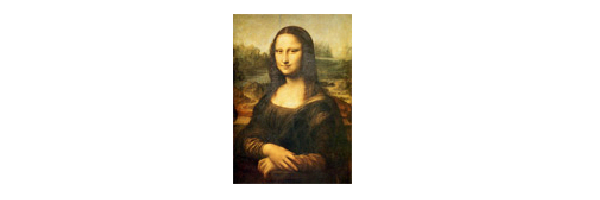

In [86]:
%%octave -s 600,200 -f png
a = imread('coffee.jpg')
figure
imshow(a)

In [39]:
%%octave
whos a

Variables in the current scope:

   Attr Name        Size                     Bytes  Class

   ==== ====        ====                     =====  =====

        a         143x100x3                  42900  uint8

Total is 42900 elements using 42900 bytes

a =

ans(:,:,1) =

 Columns 1 through 16:

  153  155  167  163  165  166  168  173  169  169  169  168  170  177  178  173

  155  151  157  158  164  162  161  161  162  163  167  168  166  167  169  169

  159  156  158  163  172  167  168  166  170  167  169  171  166  162  163  168

  154  159  161  165  171  165  173  174  175  169  167  170  169  168  173  178

  157  168  171  170  173  170  181  183  182  177  177  177  177  178  180  181

  156  166  169  164  171  171  179  181  174  179  184  186  185  189  191  189

  159  164  167  162  171  172  174  178  178  180  183  185  184  186  188  184

  167  167  171  165  173  171  168  175  188  181  178  181  184  189  191  189

  175  171  173  175  175  177  180  180  186  185  184  187  190  190  191  192

  172  176  176  180  185  183  184  192  193  190  191  192  193  192  192  190

  172  175  174  180  189  189  191  201  196  192  192  193  193  194  193  189

  170  172  172  179  192  197  195  199  197  192  194  196  196  200  201  195

  170  171  177  184  189  196  197  191  192  190  194  199  201  204  203  199

  174  173  181  185  182  188  196  190  191  191  196  203  207  205  201  197

  176  175  181  184  184  186  192  197  198  200  203  210  215  209  200  201

  176  177  181  191  196  193  193  201  202  205  205  210  216  209  199  205

  172  173  184  198  204  196  201  204  209  207  211  207  202  207  209  206

  173  175  186  197  207  204  208  210  206  213  217  210  206  209  203  200

  177  180  188  194  205  209  211  209  206  216  216  207  207  209  204  205

  175  178  187  190  202  208  209  209  209  214  213  208  209  213  214  215

  183  185  193  195  204  204  206  210  212  209  212  217  216  219  220  218

  186  191  195  199  205  197  199  203  216  212  216  222  220  220  222  220

  186  197  201  208  215  207  210  209  217  221  219  220  220  221  225  224

  181  197  198  208  217  207  213  206  211  225  223  220  222  223  227  227

  167  196  194  207  211  211  202  195  199  227  211  218  218  223  227  232

  151  174  185  203  201  194  186  185  190  220  215  218  223  232  229  220

  140  156  165  173  168  180  174  167  175  205  220  224  225  226  220  208

  141  152  152  138  136  169  181  182  163  181  204  209  211  208  207  206

  120  137  143  127  124  149  166  182  169  172  186  189  193  196  201  201

   74  100  118  110  116  141  159  170  172  179  185  177  173  180  183  179

   68   89  107  107  113  138  159  159  159  178  176  165  152  163  162  154

   61   75  107  126  123  126  144  146  152  168  158  155  147  164  162  151

   60   81  104  124  132  141  137  141  161  155  146  153  154  158  161  131

   69   89  106  119  135  150  140  133  157  158  147  144  152  161  148  103

   73   92  105  112  123  131  123  126  139  142  136  132  133  131  126  117

   83   92   99  105  114  112  112  133  135  125  115  122  127  112  103  116

  116  103   92   97  113  110  106  122  126  114   99  110  127  117   99  103

  107   83   64   62   85   89   82   86  107  104   96  109  130  126  114  113

   91   74   60   59   82   93   91   90   99   99   93  112  131  131  126  116

   89   71   62   60   80   85   82   79   93  101   91   96  107  116  129  118

   74   60   48   56   59   85   99   86   85   92   99   95   94   90  102  107

   65   49   49   55   52   75   90   89   89   96   99   97  102   91   93   96

   40   33   49   54   51   75   84   87   92   96   89   89   98   89   86   91

   41   43   54   50   57   83   91   91   92   89   84   89  100   97   96  101

   44   54   50   49   71   89   94   92   90   88   90  100  103  101   99   97

   37   46   40   47   75   83   86   87   88   91   94  102   94   95   93   86

   40   42   44   45   66   75   80   87   74   82   82   83   77   80   81   77

   30   36   55   50   62   77   80   86   78   92   87   83   78   82   80   80

   18   20   54   52   44   57   53   65   80   90   92   84   73   70   74   69

   20   22   49   50   46   57   50   51   71   84   85   78   75   76   75   69

   22   24   49   60   65   67   61   58   69   86   91   86   83   79   74   70

   24   21   42   61   60   48   47   53   56   69   80   84   82   79   74   70

   21   21   40   53   50   35   50   70   64   70   86  101  102  102   97   92

   23   25   40   40   34   25   48   70   52   61   81   95   96   95   95   98

   21   23   40   38   36   26   43   60   47   62   81   89   96  100  101  111

   23   21   43   51   54   36   41   53   67   82   89   94  117  129  121  128

   28   41   53   56   69   68   71   82   99   93   83   92  116  123  120  124

   38   33   54   66   70   79   92   89   98  102  115  129  133  125  114  107

   44   44   65   74   77   83   91   87  105  111  119  128  138  139  128  111

   53   58   72   72   72   80   87   92  111  114  112  120  138  131  109   97

   63   54   69   80   77   80   82   86  115  116  117  126  129  108   91   97

   69   57   65   84   89   82   63   72   87  103  124  129  118  105   98   97

   76   72   68   75   83   78   57   72   95  113  124  109   97   98  103  100

   82   81   88   81   66   73   66   69   91  112  119  118  120  121  130  146

   87   84   95   87   82   81   70   85  117  123  111  114  117  124  135  142

   94   75   87   88   92  100   89   94  127  131  122  131  126  125  135  130

   87   70   89   94   97  113  100   96  121  151  145  155  153  149  160  146

   80   72   93   89   90  109   93   85  100  171  171  170  166  162  168  150

   87   74   82   74   84   99   76   72   89  137  142  177  197  180  173  155

   86   75   79   76   84   84   60   67   89   98   98  144  180  188  189  176

   78   81   91   91   93   89   74   84   91  103   91   89  103  139  169  177

   77   89  102  100  106  112  107  109   97   93   81   84   91  101  126  169

   72   93  105  103  111  130  123  102  107  105  110  107  113  110  120  154

   71   85   97   99  102  111  103   92  105  118  114  106  110  114  133  136

   72   89  104   93   84   89   96  103  118  128  126  119  123  130  141  128

   60   82   98   84   87  107  121  123  138  151  166  160  162  172  178  178

   43   72  103  100  117  146  157  154  179  180  173  154  161  175  181  181

   35   62  103  112  134  156  169  175  164  163  147  155  169  157  152  138

   42   55   97  118  144  156  165  176  142  141  140  159  164  140  139  132

   36   54  106  128  143  138  142  157  162  147  145  149  154  150  143  127

   30   23   58  123  142  138  155  170  164  169  172  179  183  180  174  173

   32   16   36   90  116  128  151  172  177  176  178  182  183  182  188  199

   30    8   20   58   91  107  122  140  160  162  167  170  161  149  146  147

   36   11   12   37   77  100  111  127  143  144  143  140  136  139  137  130

   46   19   12   33   77   97  107  124  134  128  123  124  131  143  143  132

   46   18   14   39   88  100  107  118  120  112  113  126  139  140  129  112

   50   19   15   56  114  125  136  146  155  142  134  139  147  133  102   75

   64   33   29   78  140  147  156  163  171  168  164  176  190  175  127   85

   54   42   52  113  150  155  172  174  170  165  162  183  183  174  140   78

   53   47   83  134  154  160  174  177  186  181  182  184  189  177  104   55

   60   68  112  140  149  161  165  171  180  187  190  184  189  155   65   38

   96  109  132  136  147  163  159  167  164  183  180  175  166  111   48   38

   80   81   85   88   98  109  111  117  125  141  134  125  104   62   39   36

   47   32   38   54   58   66   79   83   90   93   92   74   58   47   40   37

   38   27   40   57   57   66   78   82   81   72   69   47   38   38   35   35

   53   52   66   67   69   83   86   87   86   74   58   36   32   24   29   43

   51   48   61   74   75   77   89   77   69   58   50   42   45   42   44   46

   49   45   59   61   69   76   70   60   44   47   51   45   44   40   45   52

   52   47   56   55   67   68   53   51   32   42   49   48   52   49   51   55

   53   48   48   55   60   45   41   45   32   42   48   47   57   59   60   62

   64   51   52   55   51   38   40   43   34   46   54   54   61   64   70   73

   72   51   59   45   39   40   36   39   46   49   56   57   65   68   70   66

   73   54   58   42   38   45   42   47   49   45   52   54   56   57   56   44

   62   50   46   40   39   39   45   51   47   45   56   56   47   43   46   38

   63   36   29   25   36   47   42   37   38   44   64   62   80   93   83   84

   62   35   28   25   35   41   41   35   46   61   61   86  100  119  133  127

   55   33   22   24   32   38   41   34   39   66   76  103  104  134  131   82

   53   29   19   25   33   35   38   31   39   61   84   87   89  117   97   80

   53   29   18   25   35   32   34   24   37   62   80   89  111  106  104  155

   49   23   18   25   34   31   30   23   49   75   78  107  141  137  164  184

   44   18   17   21   29   29   25   22   44   68   77  116  141  145  140  102

   43   15   19   20   25   24   20   21   36   46   66  105  123  126   92   88

   40   23   13   18   21   30   20   19   30   54   65   99  127   85   94  122

   41   20   13   23   28   33   24   23   27   46   71   98   95   66  104  141

   37   11   10   26   33   35   24   23   24   35   58   70   59   66  115  115

   31    7   12   31   39   40   27   27   18   28   49   52   41   62  102   80

   30    9   18   29   34   36   24   21   19   23   38   51   45   48   69   64

   33   10   19   21   22   25   19   17   25   22   25   43   50   42   48   55

   39   11   15   12   14   20   20   23   23   25   27   36   43   41   43   48

   48   13   11    3    5   11   12   19   20   17   17   27   36   40   38   34

   53   15    6    4   13   17   12   11    6    4    7   16   19   21   27   23

   40   10    9    9   14   15   14   17   12   10   12   17   17   15   18   20

   30    8   13   17   18   19   17   21   18   19   18   25   22   14   15   21

   26    8   15   20   24   21   16   14   18   23   23   27   28   20   19   25

   22    4   10   16   23   20   15   11   17   24   23   25   27   23   24   24

   22    3    5   12   17   20   22   22   23   28   26   25   26   26   28   26

   24    4    4    9   16   21   29   30   29   31   31   32   30   29   32   31

   28    6    1    5   16   22   29   27   30   31   35   40   35   31   36   35

   19    2    2    7   14   16   24   23   32   34   39   38   39   39   36   39

   17    2    4    7   11   14   21   21   33   36   38   35   35   36   34   35

   19    4    6    7   10   12   17   17   21   24   26   22   24   29   30   31

   18    3    6    8   12   14   18   18   15   17   19   15   18   24   26   30

   18    1    7    9   16   22   24   23   15   14   15   15   19   22   24   31

   21    5   11   13   18   25   26   28   18   15   17   20   23   25   25   33

   26   10   17   16   20   25   27   30   29   27   29   29   31   30   28   33

   25    9   19   18   22   26   29   37   26   28   30   29   32   35   31   32

   22    5    8   15   17   20   33   28   13   17   25   31   32   35   38   40

   24    4    9   13   15   20   28   27   19   21   26   32   33   36   39   38

   23    4   10   10   14   17   18   19   20   20   23   28   31   36   39   40

   25    6   13    9   13   18   13   16   20   22   26   31   32   33   37   36

   22    5   11    9   14   19   12   17   17   21   29   34   32   32   33   32

   16    3    9    9   16   18   18   21   24   26   30   31   27   27   32   34

   37   24   30   32   38   41   47   48   52   51   51   49   46   47   52   55

 Columns 17 through 32:

  182  184  183  176  175  179  180  177  178  172  170  172  174  176  177  175

  175  177  175  170  168  172  171  167  162  160  162  164  161  163  167  169

  173  175  174  172  171  175  173  168  156  161  169  171  169  167  168  167

  174  177  178  178  181  184  180  174  171  173  173  172  171  173  174  173

  185  186  185  183  185  187  185  180  181  181  178  173  175  177  177  175

  194  195  191  186  184  186  185  182  183  186  185  185  185  182  180  179

  191  192  192  188  187  187  187  188  190  189  188  187  186  186  184  188

  187  191  196  196  196  197  199  199  193  193  189  191  193  191  186  188

  191  192  193  196  199  201  200  200  195  190  192  197  198  196  194  191

  192  195  197  196  193  192  194  196  197  198  200  199  195  195  198  198

  193  196  197  197  192  192  194  197  197  202  204  198  192  193  197  198

  196  196  195  196  198  200  201  203  202  204  205  201  198  197  198  197

  202  201  199  198  200  203  205  207  210  208  207  208  208  206  205  207

  204  204  204  203  200  202  207  210  210  208  207  208  209  207  209  215

  202  203  204  205  205  207  210  213  208  208  205  203  206  207  209  213

  205  204  203  206  210  214  212  210  212  213  208  204  208  211  211  210

  215  208  210  209  210  206  213  218  212  215  216  208  209  215  213  214

  217  214  213  210  215  214  216  215  213  212  212  208  211  215  214  218

  214  215  216  212  217  220  220  213  213  209  210  212  215  215  216  223

  213  218  222  217  220  221  222  217  215  214  217  219  220  220  221  226

  216  219  224  222  223  221  221  218  210  216  219  219  216  217  220  220

  218  218  220  220  224  222  222  217  214  221  225  223  218  220  224  220

  219  220  223  221  224  222  222  219  215  221  222  220  217  218  223  216

  226  231  236  227  225  222  223  220  216  219  219  219  217  217  222  217

  234  238  230  226  232  225  216  221  223  226  226  218  221  225  233  222

  218  236  232  227  227  223  220  213  225  227  224  223  228  232  235  201

  212  219  228  227  225  226  223  221  227  232  229  230  231  233  236  188

  202  198  217  219  221  234  227  228  228  233  230  231  231  235  228  184

  181  182  185  182  191  216  227  231  229  227  226  228  234  238  212  171

  175  178  162  166  178  181  204  222  223  225  229  231  231  227  186  147

  143  147  145  166  186  167  173  216  221  227  231  234  224  212  172  126

  140  138  153  167  193  178  160  218  224  227  223  232  221  211  175  115

  125  138  146  168  180  145  196  224  231  208  168  194  200  214  186  113

  130  130  134  152  163  134  180  207  206  161  141  143  165  207  164  105

  129  129  119  117  130  112  138  153  168  144  157  123  124  167  141  119

  124  122  104   92  113  104  110  116  131  131  150  115  107  131  131  123

  127  111   96   91  101   94   97  109  119  122  126  107  105  112  120  104

  115   96   90   88   84   92  108  111  105  105  106   93   87   84   91   85

  117  106   98   91   85  102  113  104   94   91   88   81   77   74   80   84

  118  113   99   99  106  113  110  105   99   96   87   81   73   68   73   81

  119  113  100  112  105  100  106  102  103   96   93   80   75   71   73   66

  121  115   98  102   97  101  113  110  100   95   90   76   74   72   74   71

  106  102   94  100   97  100  108  104   90   89   87   78   81   74   70   67

  109   99   92  100  100   95   99  101   94   87   84   80   81   76   72   69

   88   84   88   96   97   89   88   86   89   81   83   84   84   78   78   73

   86   84   83   77   82   87   91   91   96   93   99  101   95   81   76   73

   80   83   90   82   87   91   94   93   96   97   99   99  103   87   79   85

   83   84   96   96  105  108  111  115  109  113  110  111  124  103   83   86

   82   83   79   84  103  105  107  105  111  119  116  116  135  114   90   77

   73   83   86   87   94   89   92   95   98  104  102  105  126  115   92   91

   69   77   79   82   95   98  105  113  116  128  139  147  157  137   88   76

   71   81   87   93  110  109  106  106  108  118  139  152  156  149   92   69

   96  107  115  116  130  130  136  146  155  149  156  155  149  154  110   79

  105  113  115  110  123  127  135  151  152  147  150  147  142  148  121   83

  120  129  135  133  147  142  134  139  142  148  146  142  144  143  133   99

  134  141  141  135  145  139  131  140  143  156  150  142  148  137  137  110

  129  131  121  132  135  139  134  151  136  137  140  133  150  120  126  105

  119  111   95   92  108  144  142  146  136  126  148  133  133  116  111  100

   86   89  105  103   83   90   95  120  105   89  111   98   83   85   82   73

   98   96  117  115   85   74   72   78   88   80   84   82   62   65   75   62

  110  102  114  114   86   66   70   66   69   77   75   82   66   64   73   60

  114  103  106  104   84   61   72   63   60   74   83   89   79   78   76   74

  122  123  126   95   71   66   87   82   52   61   78   81   78   76   69   74

  150  135  132   96   73   65   84   93   47   57   73   83   87   83   78   76

  152  122  105   85   78   82   96   97   58   54   86   88   88   76   71   58

  138  113   99   89   85   84  100  101   79   68   92   89   78   67   69   61

  139  125  111  100   88   81   98  103   92   90  100   87   74   70   75   75

  157  139  112  101  100  100  115  113   95   99   86   61   60   69   75   87

  166  152  121  106  102  112  131  127   98   87   55   35   46   66   74   92

  161  160  140  121  104  112  129  128   80   57   37   46   59   75   83   93

  165  158  146  137  123  127  120  101   49   41   42   68   71   83   88   95

  178  168  163  157  138  128   99   67   41   53   58   74   71   80   87  102

  142  133  156  184  193  150   73   43   46   65   56   60   76   65   87  129

  132  128  134  175  189  127   60   39   49   51   56   59   63   66   90  114

  142  159  169  182  153   84   54   59   52   51   62   51   48   67   92  104

  197  194  178  134   79   50   56   65   48   68   73   50   53   74  100  118

  167  150  116   76   47   49   56   47   54   81   75   59   69   77  102  125

  137  116   72   59   55   49   59   57   69   77   64   66   80   81  108  130

  126   90   47   48   58   51   56   60   75   65   60   69   89   99  120  133

  122   71   39   36   45   53   54   60   68   59   64   70   90  109  115  116

  125   55   43   47   40   40   53   59   58   58   65   79   96  100   95  108

  131   63   45   49   46   42   47   57   54   65   73   91   99   90   91   98

   97   58   50   50   49   45   45   49   53   68   75   96   98   82   92   90

   75   50   49   45   42   42   43   45   53   66   71   86   84   75   78   65

   84   47   41   45   48   43   49   56   55   63   77   80   79   80   71   54

   75   47   45   52   56   52   56   61   55   59   74   69   67   75   61   52

   62   53   53   52   60   57   53   53   64   65   74   63   58   62   52   53

   67   52   41   42   59   57   50   56   59   59   65   59   54   52   43   46

   53   47   37   37   50   55   53   53   58   59   54   53   50   60   48   52

   50   43   34   36   49   54   51   49   56   56   56   55   43   50   45   52

   52   44   37   40   47   49   48   48   55   47   49   51   39   44   40   47

   53   48   48   49   47   47   48   49   53   45   46   49   41   41   35   43

   48   48   52   55   55   53   52   50   47   48   50   48   43   37   28   43

   41   44   51   57   63   62   54   50   49   52   50   45   45   39   27   39

   37   46   52   57   65   65   56   50   51   49   48   43   45   43   33   33

   41   52   56   57   63   62   54   52   46   45   51   43   40   41   37   38

   47   59   67   74   78   74   65   59   56   59   50   49   48   48   51   40

   48   57   66   76   82   78   72   71   70   65   54   49   44   42   48   46

   60   63   70   79   83   79   73   71   64   58   55   57   53   49   48   49

   70   73   81   90   92   81   69   60   63   54   54   57   56   53   46   44

   61   60   60   62   65   69   66   62   67   58   52   49   47   51   51   50

   59   61   63   62   61   62   58   52   60   57   53   47   45   50   54   55

   44   47   51   50   45   44   47   49   56   58   53   52   47   44   50   47

   42   46   55   55   45   39   44   47   60   57   47   47   43   40   48   42

   98  105  112   92   75   62   51   38   39   57   55   41   45   49   50   39

   87   80   80   87  112   99   74   60   40   42   48   45   37   57   44   46

   52   76  109  111  105  104   69   61   47   40   43   34   40   31   40   48

  124  149  107  101  107  102   86   72   73   56   43   51   41   38   44   40

  169  117  112  137  144  112  124  129  134   81   69   70   65   92   98   89

   99   80  113  138  127  143  130  169  112  107  137  163  207  233  245  239

   83  126  143  104  116  118  157  128  121  169  199  240  255  255  251  249

  137  167   86   81  131  100  111   88  160  187  240  251  243  241  242  240

  138   93   73  129  102   94   68  110  170  203  249  245  246  249  252  251

   79   69   88  101   95   80   80  127  165  211  240  240  246  244  244  244

   77   67   84   84  103   73   87  122  144  210  227  235  240  235  235  235

   72   71   75   95  103   65   88  107  124  197  220  228  228  227  229  234

   54   71   67   82   83   63   86  101  107  167  201  210  203  209  216  228

   53   62   59   52   65   56   67   93   86  122  161  173  171  183  195  208

   41   42   52   50   54   41   43   75   70   86  114  124  132  146  175  196

   39   39   40   57   46   41   39   58   68   69   78   81   92  109  159  191

   32   34   45   52   44   34   31   40   55   52   61   68  107  149  161  192

   18   19   30   32   34   26   27   47   54   93  135  168  202  204  176  163

   19   15   21   19   27   29   55   90  171  197  202  212  232  231  202  162

   40   19   19   25   24   47  132  199  199  187  180  207  233  234  220  190

   26   24   19   16   28  104  183  176  168  156  173  214  229  226  223  217

   20   17   13   11   20  103  160  134  121  166  211  216  217  235  234  216

   26   23   16   13   30  128  151  126  145  199  214  191  202  236  235  211

   35   33   29   26   47  139  138  138  200  200  169  169  211  228  224  225

   44   35   36   33   66  143  138  182  182  158  146  178  214  213  221  215

   44   36   38   35   66  128  130  164  148  136  154  199  197  218  222  197

   47   43   42   40   61   97  109  133  139  129  172  191  202  214  192  164

   37   39   40   39   49   65   92  113  131  142  187  202  219  189  139  115

   30   34   37   36   39   41   69   83  106  142  181  214  187  134   97   74

   28   31   33   37   38   38   54   62   92  124  183  180  138   92   64   63

   34   37   39   39   34   34   38   46   63   85  163  132  103   68   39   49

   29   34   36   36   29   31   32   45   39   68  129  125   84   63   50   49

   39   37   33   32   30   30   33   39   47   65  107  105   78   66   56   54

   46   41   34   29   30   33   38   45   56   59   85   86   67   56   51   53

   42   38   31   27   31   39   43   50   42   47   61   60   48   42   44   47

   36   37   34   33   38   43   45   46   43   48   48   41   41   45   46   41

   34   37   37   38   43   48   47   48   48   58   60   51   43   43   43   42

   34   36   37   39   44   47   50   52   40   44   54   49   38   32   33   40

   57   58   59   60   61   61   63   68   54   52   66   65   58   55   49   53

 Columns 33 through 48:

  174  177  177  180  181  181  173  164  167  174  173  173  176  174  174  176

  170  168  170  173  173  176  169  152  161  171  172  172  175  173  170  169

  169  165  169  173  173  179  175  154  172  181  179  178  178  176  173  170

  180  176  178  178  177  179  173  158  171  179  179  180  182  180  178  178

  182  179  178  183  189  187  177  170  172  178  182  190  192  186  186  185

  189  184  180  187  196  190  174  167  175  179  182  189  191  186  188  187

  186  183  182  188  195  190  178  170  181  186  187  191  192  193  198  195

  194  191  194  195  192  188  184  176  182  191  192  191  191  193  195  187

  190  194  199  199  197  190  188  190  190  196  199  200  201  204  202  202

  198  198  195  200  198  197  198  185  203  198  197  201  200  206  209  193

  196  200  201  201  198  200  200  184  200  213  211  202  181  148  125  107

  202  198  200  200  201  204  197  193  209  201  160  113  101   93   81   75

  209  202  202  207  202  201  207  204  185  115   79   86  118  114   87   80

  208  213  207  212  207  208  209  169   97   84   93  106  134  120   88   82

  213  212  207  208  217  210  166  108   88   97  104  119  147  115   90   97

  212  205  216  213  217  179   99   87   95  105  110  129  145  110  100   92

  208  227  214  218  204  108   75   99  110  133  164  192  202  179  155  149

  216  219  218  226  159   85  113  162  201  219  234  241  243  238  228  225

  216  215  225  195  107  122  199  235  232  242  245  238  236  241  238  233

  219  211  216  147   91  170  234  241  244  245  245  246  245  251  250  244

  218  210  179   96  116  215  252  242  255  246  244  248  247  248  250  246

  222  204  123   65  145  228  250  239  246  243  243  244  243  247  250  249

  217  186   91   82  179  233  240  238  247  245  245  247  248  247  246  244

  192  179   99   95  178  247  248  242  243  237  237  246  252  248  243  243

  192  118   92  126  197  234  243  244  239  247  242  244  248  249  248  242

  156   94   86  138  212  236  239  240  243  239  243  246  248  250  248  249

  126   84   79  144  222  235  240  240  241  242  248  244  240  246  250  246

  106   85   80  143  226  241  251  248  255  251  239  243  248  249  251  245

  110   81   78  134  223  247  237  228  235  249  255  250  249  238  212  203

  113   76   87  125  188  207  195  190  189  212  249  251  238  201  153  158

  117   88   86  106  124  144  183  178  171  182  222  251  227  156  126  165

  105   88   76  121  136  140  184  119  112  171  222  255  211  139  161  207

   93   88   90  157  214  210  241  218  198  217  236  255  214  169  202  241

   91   78   70  164  242  232  228  204  213  230  238  253  217  184  212  236

   75   69   66  174  255  251  244  244  246  239  236  248  226  209  229  250

   84   69   69  156  239  245  246  243  251  234  242  246  232  224  227  251

   90   71   71  135  235  247  247  237  241  236  248  246  229  226  226  241

   90   76   74  117  230  246  245  244  243  236  237  244  226  219  224  236

  101   83   67   98  207  248  246  247  249  233  245  248  225  214  214  240

  102   85   65   83  173  236  245  245  237  224  255  228  187  188  188  240

   77   69   71   85  145  212  234  242  240  216  201  150  104   91  130  232

   76   61   69   93  128  197  221  231  248  255  211  125  100  123  167  237

   72   73   75   88  113  192  213  226  227  255  255  203  168  185  206  201

   79   92   86   80   96  181  222  226  178  188  213  209  170  148  144  133

   83   77   75   73   73  137  221  237  237  238  230  220  208  175  161  194

  101   84   75   80   71   86  167  224  246  247  226  199  191  186  185  202

   87   86   69   78   78   69   97  165  226  238  228  203  190  200  210  194

   70   86   77   83   84   85   69  104  189  241  245  250  255  239  219  203

   69   88   99   98   88   79   63   61  109  188  249  253  251  233  216  207

   81   89  100   94   74   74   71   62   68  115  191  233  233  213  192  163

   81   90   91   83   69   64   53   52   47   62  102  138  146  129  122  107

   68   75   72   72   72   63   45   45   34   38   49   66   80   77   77   77

   67   71   81   87   79   77   60   46   45   37   32   41   65   83   79   74

   70   83   84   73   65   69   55   46   45   41   37   56  112  146  115   97

   69   93   98   91   90   81   54   49   57   50   42   54  122  187  162  144

   75   80   86   91   81   72   57   52   72   50   49   45   98  199  207  188

   60   77   87   93   83   82   79   65   78   66   55   58   81  187  225  205

   81   96   96   92   86   86   75   64   68   66   58   70   96  176  217  221

   74   85   83   79   77   80   68   63   65   66   70  105  150  192  210  214

   74   85   89   82   74   82   75   67   76  101  132  177  216  219  222  228

   74   91   93   82   72   79   81   87  142  168  200  227  242  230  234  236

   79   84   80   90   88   87  110  153  203  213  223  231  238  238  241  238

   87   79   74   97   99  112  167  216  228  235  241  237  232  235  237  241

   86   81   82   96   90  137  217  238  225  239  247  243  233  238  233  245

   62   96   93   95  112  182  233  247  241  242  241  240  244  245  244  245

   73   87   89  109  151  214  242  245  243  246  249  248  248  245  245  246

   86   96  113  132  182  234  245  240  245  247  248  246  245  242  243  246

   90  111  144  152  196  239  244  241  243  244  242  243  244  246  243  245

  109  139  173  176  215  248  249  240  241  243  245  247  250  247  244  243

  135  170  199  207  235  250  250  246  241  246  247  248  247  245  245  248

  156  198  218  226  237  239  246  251  244  246  245  244  242  245  246  252

  183  230  233  235  235  231  246  247  246  245  244  244  246  248  248  249

  210  236  237  243  239  238  247  249  244  245  252  252  251  252  245  246

  185  238  251  248  243  244  243  239  246  242  244  245  248  247  244  245

  143  212  255  254  243  248  244  237  242  239  238  245  248  244  244  245

  125  157  209  245  253  254  247  240  241  245  238  239  239  237  245  247

  139  145  159  168  195  236  249  233  235  250  250  249  244  238  241  240

  121  133  146  145  151  155  168  183  211  238  253  255  254  249  245  242

  110  115  119  129  150  148  143  137  140  162  184  196  211  226  236  246

  109  105  107  112  119  120  135  141  147  154  159  154  156  162  164  174

   93   81  115  110   97  109  130  137  139  143  147  150  150  149  149  149

   71   80  109   97   87  104  126  140  143  133  129  134  138  134  132  134

   54   73   82   76   80  105  119  136  135  126  125  131  127  118  114  117

   61   70   60   62   74  100  107  120  113  114  119  120  111  102   98   99

   62   68   57   61   73   95  102  108  117  113  108  101   88   79   80   80

   69   70   62   61   73   91   90   86   98   91   89   84   70   65   74   84

   68   60   56   54   74   84   77   69   82   78   80   78   68   67   79   88

   66   52   52   49   69   69   60   61   71   67   66   63   62   73   81   77

   58   52   54   44   57   56   58   60   64   58   62   58   70   83   74   75

   58   48   48   46   60   57   61   61   58   53   56   61   68   70   73   79

   56   46   42   48   59   53   63   60   51   50   48   58   67   70   72   64

   50   44   39   45   52   49   62   56   46   46   48   57   67   71   63   45

   47   45   35   42   49   49   62   50   46   43   54   62   64   58   50   47

   45   43   33   40   50   53   58   46   47   48   57   56   56   54   47   52

   41   41   34   41   49   48   49   43   45   57   55   50   55   55   50   47

   34   40   37   42   44   40   38   39   45   57   50   57   61   47   46   47

   34   36   42   42   47   48   34   32   46   48   54   61   54   50   55   43

   37   38   44   48   52   47   33   30   40   45   55   62   58   56   49   36

   49   45   50   52   50   44   37   44   42   51   63   65   60   57   44   32

   47   41   47   50   49   44   36   44   47   57   69   63   56   51   39   35

   46   34   35   41   45   44   37   41   54   61   66   53   46   46   38   39

   49   39   40   40   40   42   45   54   64   62   57   44   39   40   36   34

   45   45   53   50   43   44   48   57   63   59   48   41   37   36   34   28

   49   44   48   43   39   45   47   50   49   47   41   40   34   32   34   26

   40   41   40   53   54   54   49   42   37   40   44   39   27   28   29   23

   46   48   40   48   51   43   33   37   37   34   32   28   21   22   22   20

   52   48   36   45   52   43   31   30   32   25   23   25   24   23   23   24

   53   46   43   49   47   42   41   35   23   20   18   20   21   20   20   24

   78   65   55   51   48   46   43   30   25   25   22   17   16   14   15   18

  203  177  129   84   64   48   41   31   26   26   24   22   19   15   14   13

  235  235  223  194  159  110   72   44   41   30   27   26   21   17   16   13

  244  236  239  241  235  206  175  135   73   48   33   28   22   19   20   19

  246  244  240  238  235  228  225  230  226  185  111   47   24   21   19   18

  244  245  242  241  240  234  231  233  230  241  222  155   72   23   15   22

  240  245  244  243  242  240  235  235  236  235  231  211  171  125   71   20

  236  241  242  242  242  240  237  235  239  232  227  224  223  216  188  153

  227  233  236  237  240  243  240  238  229  234  236  234  239  242  235  226

  218  223  228  233  240  242  241  240  236  240  240  236  239  241  241  240

  212  218  223  229  235  236  234  233  239  237  237  233  229  232  243  246

  212  217  222  227  230  229  225  223  226  229  235  216  183  184  219  245

  207  208  215  221  222  225  226  219  212  228  237  224  180  123  127  179

  187  195  201  211  219  215  212  217  223  221  225  220  231  180   85   88

  173  184  190  195  202  206  206  212  213  190  183  214  238  234  182   91

  156  157  171  187  189  196  208  214  212  189  137  170  225  237  235  194

  166  138  141  166  175  174  192  212  222  217  174  132  160  207  221  235

  196  156  127  138  159  165  165  172  204  229  237  184  121  133  188  210

  205  177  140  126  142  160  156  141  152  198  227  240  189  104  112  164

  207  186  157  125  115  140  161  155  102  130  195  225  229  182  106  105

  199  180  155  123  101  105  130  162  134  110  118  174  219  205  148  101

  170  149  132  113   96   88   90  103  133  108   93  113  147  157  138  114

  140  118  105   96   83   69   63   63   90   89   86   84   87   97  107  111

   96   83   80   76   68   60   59   60   67   65   65   68   68   68   73   80

   71   75   81   85   80   78   80   80   86   75   66   71   76   74   69   67

   65   72   75   74   74   73   76   76   70   70   75   79   82   80   74   68

   66   68   58   53   51   49   53   56   53   57   61   64   64   59   51   43

   67   68   56   51   50   43   43   51   54   58   65   68   63   53   46   48

   55   56   58   61   57   53   53   55   57   61   60   62   52   51   51   46

   51   55   58   58   59   60   61   61   63   63   57   58   50   49   46   41

   44   53   55   53   56   61   58   57   58   58   49   47   43   44   41   41

   37   45   47   45   51   54   48   47   49   50   40   34   27   25   22   26

   26   30   33   37   45   45   36   39   42   42   34   30   27   27   22   28

   31   30   35   40   45   43   35   42   36   33   27   29   27   30   22   22

   59   55   62   64   64   66   59   63   54   48   48   51   51   55   48   46

 Columns 49 through 64:

  185  185  178  177  174  176  179  177  179  183  190  189  190  191  186  187

  169  174  173  171  170  171  178  178  178  177  180  182  189  193  191  189

  172  178  177  176  175  177  182  180  179  179  184  184  189  193  193  194

  182  182  179  182  182  180  180  177  181  184  189  189  190  192  191  193

  188  185  182  188  187  182  181  181  185  181  183  186  191  195  190  186

  195  195  196  200  196  188  189  193  188  185  187  190  190  192  189  191

  193  198  202  204  200  192  194  195  194  193  196  197  193  193  193  198

  189  196  198  202  199  199  199  194  198  195  198  199  200  201  197  199

  199  203  203  204  205  203  203  202  201  197  195  195  200  205  206  206

  188  184  180  184  193  201  206  211  199  198  197  194  194  205  208  200

  102   99  100  100  109  126  147  172  191  198  203  205  205  200  200  206

   75   74   80   77   78   83   82   94  112  142  182  204  202  204  209  206

   69   69   74   65   64   75   79   93   92   90  106  149  193  211  209  205

   68   73   76   64   57   61   65   75   97  100   87   80  120  188  218  209

   89   85   77   68   69   68   64   61   66   76   97   87   67  105  181  221

   88   85   77   74   75   72   71   70   68   72   74   87   95   75  106  189

  132  103   78   71   69   68   69   68   80   78   73   78   90   79   76  106

  212  189  149  109   82   74   71   66   72   72   79   82   85   85   80   76

  239  232  203  157  122  100   84   70   69   62   75   86   86   86   82   76

  252  248  229  198  162  126   94   76   72   63   62   71   82   84   82   92

  249  250  241  222  190  151  114   92   78   75   62   55   69   85   82   84

  242  247  245  227  199  166  130  101   83   80   77   65   61   74   77   73

  246  245  242  228  203  179  150  120   92   82   84   79   64   62   66   69

  249  239  239  233  215  193  165  132  103   85   80   77   66   61   57   56

  246  236  236  233  228  207  192  178  150  110   86   69   66   65   67   58

  247  239  241  240  240  232  222  204  180  123   85   70   74   74   73   63

  242  241  247  244  238  234  231  218  182  123   86   80   84   78   72   63

  242  244  246  241  237  231  223  214  175  120   83   80   81   75   70   66

  216  228  227  223  223  215  193  183  158  112   77   81   88   89   86   81

  188  197  183  161  144  136  132  144  151  116   88   89   90   88   82   75

  201  178  148  129  102   90  100  128  163  127   87   82   77   76   73   70

  233  156  103  114  127  142  174  215  194  145   90   80   78   80   74   67

  255  237  219  205  208  230  248  237  210  155   89   76   85   85   78   60

  234  219  218  219  230  243  250  236  203  144   91   89   96   89   90   87

  248  245  250  250  253  247  239  224  194  132   86   93  100   90   85   82

  239  241  247  246  250  242  230  216  172  118   82   89   98   96   90   80

  243  243  241  239  249  243  220  196  147  104   79   85   93   97   96   91

  243  245  245  242  249  236  206  174  133   92   76   84   91   92   84   82

  241  243  247  242  238  218  186  156  121   88   76   83   94   96   86   86

  250  246  243  236  228  202  166  136  110   88   81   81   89   98   99  108

  254  243  241  229  208  182  153  139  105   87   85   85   92   96   95   75

  235  226  229  221  198  180  159  135  101   85   81   83   92   97   95   77

  189  207  225  221  199  179  163  139  102   85   81   84   95   98   96   84

  184  221  232  224  202  171  150  132   93   77   73   82   89   85   83   82

  216  240  234  218  192  157  133  114   88   76   75   90   93   84   82   86

  214  223  217  201  169  138  122  101   78   70   74   93   90   84   80   84

  198  200  195  175  139  115  106   94   75   69   75   89   85   87   87   83

  203  197  173  141  117  103   98   95   80   74   78   87   82   91   93   87

  178  157  136  108   96   93   93   82   75   77   81   81   84   82   90   88

  131  112  106  102   93   84   85   77   69   68   71   72   76   76   88   90

  101   85   88   90   80   70   76   74   83   73   69   72   81   84   89   86

   83   82   84   79   72   69   79   85   83   84   84   82   79   77   81   80

   67   75   72   68   70   75   82   94   86   95   95   88   76   75   74   68

   83   83   73   78   87   94   99  114  116  116  105   95   82   80   75   64

  116  106   94   99  106  115  123  140  144  142  126  107   81   72   70   68

  155  141  130  131  125  135  147  158  168  156  132  113   85   72   66   66

  197  179  162  164  166  164  174  183  187  180  168  130   92   85   76   80

  211  200  187  186  186  186  196  202  202  195  183  149  109   95   85   82

  223  219  211  207  207  208  213  214  213  210  200  171  122   98   86   80

  227  224  221  220  222  225  226  225  224  227  214  185  135  101   96   97

  231  228  228  229  235  237  237  236  228  240  230  206  157  114   99  102

  237  232  233  236  241  241  237  236  227  240  236  218  174  130  107  108

  241  238  240  239  239  239  233  231  236  236  230  206  154  116  103  102

  243  244  245  242  242  244  236  233  234  231  233  210  153  122  116  114

  248  240  240  240  243  245  239  243  239  239  233  217  155  135  134  112

  247  243  243  245  247  244  238  238  248  236  235  222  175  138  131  106

  247  244  246  247  246  244  240  242  249  235  235  210  165  124  125  111

  244  245  246  247  246  241  240  242  246  239  231  193  145  119  125  117

  243  244  247  250  246  240  237  236  241  238  225  192  150  141  131  121

  243  245  244  246  245  242  240  238  244  240  225  199  159  145  124  114

  245  244  239  243  245  245  247  243  248  241  227  190  153  134  117  115

  246  246  240  243  248  248  249  242  238  230  219  174  152  138  134  135

  243  241  242  241  245  252  251  240  239  236  220  192  164  159  160  150

  242  245  244  242  247  252  246  237  236  241  224  203  183  154  148  173

  252  249  243  241  247  249  243  238  245  239  224  194  166  159  176  193

  245  241  241  246  248  249  247  241  242  225  204  175  157  145  133  121

  234  234  241  243  239  245  248  235  222  191  173  153  128   97   79   75

  242  242  245  242  239  246  235  204  170  151  150  124   94   72   70   66

  250  250  250  245  236  221  193  165  147  142  129   91   88   83   71   63

  186  190  194  196  186  162  152  161  119   97  110   99   85   74   73   58

  141  142  144  152  138  150  139   99   89  108   99   75   64   51   46   59

  127  129  137  144  138  135   96   79   96   82   61   54   59   58   53   55

  109  111  112  114  115  109   79   83   60   52   50   51   50   53   57   59

   88   98  101  109   98   86   71   58   47   44   45   45   41   51   61   62

  100   96   85   78   63   61   61   50   48   43   39   37   41   53   65   71

   96   83   77   63   57   60   51   52   44   41   40   43   47   52   62   74

   85   81   81   69   66   63   49   52   54   45   42   46   48   54   59   62

   79   84   79   63   49   46   51   47   46   47   53   51   47   55   61   55

   89   78   61   43   33   40   43   33   37   41   42   43   45   55   65   60

   72   71   62   48   39   37   35   32   33   34   32   33   39   51   62   62

   56   62   56   41   32   25   23   30   32   32   29   33   39   43   52   59

   51   56   54   37   24   20   23   32   30   29   28   35   44   44   50   63

   46   50   52   35   20   23   28   30   31   29   28   34   43   43   47   64

   47   46   49   30   16   23   28   26   34   33   33   37   41   36   36   50

   48   46   45   29   21   27   27   30   34   34   39   42   41   35   32   42

   38   38   36   26   26   30   25   34   41   38   43   42   39   35   34   44

   28   24   32   30   21   26   36   39   39   41   37   36   36   40   48   51

   28   26   35   35   29   32   39   41   41   40   36   40   42   41   45   48

   29   26   34   39   36   38   39   37   36   32   29   37   41   38   42   46

   31   28   36   41   42   42   36   31   34   29   27   33   37   39   45   49

   32   30   37   43   46   44   34   28   32   32   30   31   34   38   46   49

   30   29   35   43   49   43   29   25   27   33   30   30   35   41   48   48

   25   27   34   42   46   39   24   20   27   33   31   32   38   45   49   47

   26   30   37   45   47   39   21   18   28   31   27   29   36   41   43   39

   25   31   38   40   38   36   33   28   29   30   29   33   41   39   34   36

   25   30   35   37   35   35   34   29   27   32   32   34   38   35   29   30

   22   24   29   32   33   36   37   33   23   28   32   33   35   31   25   27

   18   18   23   27   32   37   40   37   22   27   29   32   33   28   25   25

   16   16   20   26   31   38   41   39   26   28   28   30   32   28   25   23

   16   17   23   26   28   34   38   38   26   28   29   29   32   33   29   26

   18   21   24   27   26   28   33   34   27   29   31   31   33   36   34   30

   18   21   27   26   24   26   29   32   31   32   34   34   34   35   34   31

   16   24   28   31   30   36   27   30   23   25   36   34   31   29   39   39

   34   34   34   40   41   43   32   35   27   29   35   31   26   18   27   31

   29   30   30   26   25   32   33   32   32   37   40   33   29   25   30   33

   63   37   23   25   26   29   33   31   32   42   47   35   27   31   38   36

  188  133   80   49   33   33   39   28   38   39   42   41   37   43   47   39

  219  190  151  105   59   28   28   31   25   35   52   65   56   52   56   63

  255  210  143   97   83   57   51   58  105  120  119  105   79   70   80  107

  244  252  204  151  158  160  150  145  181  190  172  159  152  138  108  101

  230  245  240  204  152  141  147  152  161  183  186  148  138  154  155  138

  132  185  219  215  169  141  140  144  131  129  136  135  130  126  133  127

   70   96  150  176  178  172  150  160  136  116  106  119  127  115  126  132

  101   83   87  119  147  170  170  144  145  130  104  104  121  118  117  127

  192  116   97   92   99  137  156  164  130  123  105   92  108  119  112  128

  213  173  115   82   80   84  116  149  120  107  103   95   92   99   91  109

  180  202  174  108   86   76   72   89   86   81   84   87   84   85   70   76

  146  187  204  165  108   72   78   77   78   84   72   72   80   82   63   59

   90  131  165  190  167   92   58   82   79   74   70   73   77   68   59   57

   91   95  112  161  185  138   79   62   69   62   59   65   70   65   55   53

  109   91   75   96  142  151  100   48   58   52   54   60   61   56   49   45

   92   86   69   53   74  106   82   35   43   42   50   55   49   43   40   39

   61   63   64   48   41   51   42   23   31   32   39   44   38   33   34   34

   62   57   58   53   45   43   39   35   35   32   33   36   34   32   32   32

   47   43   39   44   48   45   43   41   41   39   38   40   41   38   35   35

   41   39   35   48   53   45   45   51   39   43   44   46   49   45   39   41

   38   44   42   42   43   44   44   40   40   41   42   44   43   41   40   41

   43   49   47   46   49   50   51   46   43   44   45   45   45   44   41   38

   38   43   40   40   40   41   41   39   30   33   36   39   41   42   40   38

   23   27   25   26   30   30   32   31   35   36   38   38   37   36   33   31

   21   24   22   23   25   25   27   26   25   29   33   35   34   32   33   33

   23   25   20   19   20   18   17   15   25   28   32   33   31   32   31   31

   43   45   42   43   45   43   43   42   45   46   50   51   51   50   49   48

 Columns 65 through 80:

  184  187  185  184  185  185  187  181  188  189  192  188  189  192  192  191

  193  194  187  184  182  182  185  180  189  189  190  187  187  190  188  187

  188  191  189  190  189  188  189  186  186  185  188  187  188  192  190  190

  185  193  195  198  197  192  192  186  189  189  192  191  190  194  192  192

  194  197  198  199  197  195  194  191  192  193  196  195  194  196  194  193

  197  199  198  198  199  197  200  196  193  195  197  196  196  198  195  195

  200  202  200  201  201  199  200  198  199  198  202  198  196  198  195  196

  202  202  199  199  201  200  202  201  198  198  202  199  198  200  201  204

  202  203  205  205  205  204  203  200  199  201  202  201  198  198  201  200

  200  200  204  205  204  200  199  200  202  203  205  205  202  200  199  195

  205  205  209  211  208  201  202  206  201  202  205  205  201  201  200  196

  209  209  211  209  205  201  202  206  202  201  204  204  200  200  202  201

  209  210  210  205  203  203  205  205  204  205  208  207  201  201  205  205

  211  213  213  208  208  210  211  208  205  206  209  211  206  206  208  211

  211  213  216  213  212  211  210  208  206  205  207  209  208  210  212  215

  213  215  220  220  217  211  208  207  210  206  205  206  207  209  211  213

  209  223  222  212  216  213  208  210  213  216  212  208  209  210  211  214

  152  223  219  214  217  221  215  219  218  216  212  212  214  213  214  217

   87  181  216  215  216  220  217  216  224  217  215  218  218  218  220  223

   77  121  207  220  219  214  216  217  221  217  219  222  219  220  225  226

   91   80  175  227  223  215  218  217  216  219  223  224  218  222  228  228

   79   64  121  220  227  221  217  213  218  223  227  224  221  225  230  230

   63   63   82  197  226  217  215  212  219  220  219  217  221  224  225  224

   62   63   65  166  217  203  209  210  217  213  205  206  214  217  215  214

   59   57   60  112  192  185  207  213  201  201  193  203  212  214  205  216

   59   59   65   93  169  172  187  195  191  186  192  200  215  202  204  210

   55   55   71   83  161  164  165  178  169  170  183  195  203  195  201  198

   65   60   68   73  150  148  148  167  164  172  177  187  176  185  193  183

   72   67   66   70  133  128  132  152  174  178  178  179  160  175  183  170

   66   74   70   70  119  126  133  146  151  152  168  166  167  168  177  162

   62   73   68   68  106  131  137  144  136  140  160  156  159  158  148  128

   57   62   65   70  104  133  125  126  120  133  147  147  143  158  134  113

   60   59   63   64   91  119  120  126  124  126  132  136  130  132  140  129

   84   67   64   70   92  118  110  113  120  128  138  142  131  126  127  120

   87   79   83   83   80  114  113  124  125  135  145  146  137  126  123  118

   84   82   85   79   72  127  132  133  125  132  135  132  127  117  110  102

   87   84   84   79   81  144  154  151  151  160  156  149  144  141  135  125

   87   88   87   86   80  122  140  148  163  176  178  175  171  173  172  166

   93   90   83   80   74   87   99  107  112  123  131  135  133  133  136  134

   97   99   92   86   79   77   87   95   92   97  105  112  107  103  105  103

   82   78   84   76   73   82   85   91   93  100   95   92   96  102  105   96

   91   80   82   82   81   83   85   94   97  100   96   95   93   90   88   84

   88   88   85   79   79   92  101  102  101  102  102  102   99   94   92   87

   89   87   81   78   75   77   93  103  100  103  101   95   92   94   90   81

   85   86   83   84   81   80   95  109  109  109  110  105  100  102   99   91

   85   86   83   77   78   86   98  108  109  106  110  113  108  105  103  104

   90   78   76   79   82   87  100  128  112  104  111  116  112  110  108  107

   85   79   82   76   77   84   97  123  120  111  114  117  121  126  121  113

   86   76   80   87   81   87   87  118  132  130  123  138  147  135  125  107

   82   80   84   90   81   82   82  108  124  128  123  135  138  129  127  117

   83   88   91   90   75   72   79  105  115  111  102  109  115  119  123  110

   82   86   83   82   68   63   71   95  112  102   89   93  100  108  111   96

   75   71   67   73   71   62   62   79  100  100   96   98  100  108  115  107

   68   65   67   72   70   61   60   80  101  105  104  104  108  112  118  116

   66   64   72   69   68   63   62   87  103  110  108  109  115  114  108  102

   64   61   65   61   66   67   61   79  101  118  130  144  156  152  138  129

   82   72   68   72   73   61   48   58   94  106  120  132  132  132  129  141

   81   74   77   87   72   49   40   48   68   71   71   77   82   85   85  109

   83   83   85   97   76   55   53   52   54   62   62   73   84   83   70   84

   96  101   92   96   81   72   71   61   59   67   68   71   80   83   76   87

  105  114   96   97   82   79   80   73   69   72   76   78   73   75   83  101

  114  122  102  102   83   77   80   85   75   69   80  100  106  114  128  152

  133  131  107  102   77   78   79   81   77   66   63   79   95  112  128  153

  143  131  103   92   68   84   86   76   68   72   68   70   76   88   94  114

  130  122  102   77   59   72   91   81   79   83   73   60   70   82   83   95

  125  117   98   86   78   69   74   77   83   82   79   67   64   70   83  100

  131  122   95   85   80   63   65   82  107   97   95   84   67   64   81  100

  129  120   86   69   68   69   93  127  137  122  114  100   77   62   69   81

  124  107   76   72   88  103  125  142  130  123  112   99   80   61   54   58

  105  103  104  125  144  149  156  156  157  156  141  125  106   79   60   59

  122  142  163  182  184  181  186  183  178  173  150  129  107   81   66   62

  163  170  168  179  195  209  211  198  190  175  145  122   98   75   65   62

  159  166  197  217  210  182  152  137  114  102   90   77   68   63   58   57

  207  206  194  158  126  107   96   90   82   82   80   68   60   62   61   59

  151  130  105   91   92   93   82   76   68   66   63   53   44   49   51   52

   82   76   81   93   89   78   69   73   70   55   48   44   38   35   38   44

   71   71   77   81   65   65   58   55   63   45   40   44   42   35   33   39

   64   70   73   69   53   63   66   68   59   49   46   44   41   38   35   38

   60   66   65   71   69   77   69   72   65   58   53   43   36   38   37   36

   56   71   68   74   84   92   75   77   67   58   54   45   39   39   37   35

   56   73   79   94  102   80   67   74   68   56   57   49   50   40   39   38

   58   76   85  102   91   68   75   72   70   56   55   47   40   45   49   40

   71   74   86   98   79   69   83   75   68   67   76   78   67   70   64   57

   79   71   86   81   66   72   81   84   99  123  119   92   76   90   78   66

   72   75   82   73   67   74   83  105  127  124  107   93   88   96   75   70

   60   75   69   71   81   81   94  116  124  118  111   91   79   88   81   78

   51   65   63   74   88   85   97  115  124  107  109  108  112   99   73   64

   41   52   68   83   91   94  109  136  111  117  125  104  103   84   57   53

   45   50   78   95   91  104  121  126  116  121  111   91   74   60   44   38

   52   65   83   96   94   98  119  128  107  108   93   68   52   42   38   40

   57   78   85   94   92   93  114  122   98   91   71   55   49   44   38   36

   64   81   85   90   89   90  103  105   91   72   50   41   46   46   38   38

   71   80   91   88   79   79   82   79   70   56   44   44   47   40   36   44

   67   73   87   81   66   63   59   57   49   47   45   49   52   44   39   46

   56   66   70   66   58   49   45   44   39   44   43   46   51   51   46   47

   52   67   58   57   56   43   40   38   28   44   52   54   57   58   51   46

   59   65   57   50   45   38   43   45   41   49   60   62   55   54   56   52

   64   61   47   36   36   40   45   47   44   50   53   55   56   56   48   42

   59   53   41   31   33   39   41   45   50   58   56   54   55   53   46   43

   54   43   36   27   25   35   41   52   52   57   56   51   48   46   40   39

   48   34   31   26   26   33   42   59   54   53   52   50   46   47   44   34

   43   30   26   29   32   36   44   56   52   54   58   58   53   53   51   43

   44   34   26   29   31   37   46   51   46   51   57   57   57   56   56   52

   40   38   33   35   36   36   42   38   47   51   50   52   60   64   59   56

   43   42   30   28   38   39   42   46   45   48   53   55   59   60   53   45

   36   41   35   26   32   40   49   50   51   49   48   47   50   53   47   41

   34   41   37   29   29   40   51   50   45   43   42   41   40   40   40   37

   39   38   35   35   36   42   48   46   43   46   49   48   43   38   38   41

   40   38   35   39   40   43   49   46   48   53   57   55   48   40   37   37

   41   43   41   38   38   42   46   45   48   52   53   50   45   39   34   31

   40   46   41   39   40   39   41   45   52   54   54   50   45   41   35   32

   38   39   35   42   46   39   38   48   56   61   59   52   43   39   36   30

   43   44   36   35   44   42   47   46   39   41   39   44   40   32   36   30

   34   38   35   29   35   37   44   45   43   45   45   50   47   37   37   28

   32   36   41   35   41   48   50   44   48   48   51   51   46   40   35   29

   32   33   41   32   37   44   43   36   36   38   47   48   44   40   35   32

   38   32   33   25   32   42   41   36   27   30   39   42   42   42   34   30

   94   98  103   88   77   71   70   69   45   38   33   36   39   41   40   37

  151  155  145  132  136  130  120  103   84   65   41   34   34   36   47   50

  128  145  137  114  107  105  117  118  119   97   61   44   32   26   42   48

  125  128  145  156  131  104   95   79   82   85   71   51   38   30   32   39

  116  125  135  142  143  122   95   88   85   86   76   63   52   40   31   30

  104  101  109  123  145  138  102   88   86   86   80   70   60   46   31   26

  131  101   87   87   95  110  107   95   85   87   84   76   63   45   27   21

  139  121   96   82   74   79   90   83   75   79   81   81   71   49   29   18

  130  133   98   78   80   75   73   77   64   64   68   73   68   51   32   21

  108  116   92   73   81   81   68   68   62   58   58   61   56   42   29   25

   84   83   85   71   67   76   75   71   57   54   55   57   50   39   32   31

   67   67   65   65   61   60   67   69   59   56   48   49   50   39   29   22

   62   63   57   53   51   57   65   64   59   56   48   49   48   37   28   22

   53   54   51   51   51   54   58   55   52   50   43   42   40   34   27   25

   47   43   42   51   52   47   46   45   45   44   40   37   36   34   31   32

   41   36   35   41   43   39   42   42   37   38   38   36   34   33   31   31

   35   36   36   37   38   41   44   40   33   38   41   39   36   34   29   29

   34   38   38   39   39   42   43   37   39   43   47   43   41   39   32   32

   37   37   36   40   38   37   39   38   38   41   43   37   35   35   30   32

   34   38   38   36   34   34   34   34   37   38   39   36   32   36   37   30

   34   36   36   35   34   36   35   34   37   36   37   35   35   35   35   30

   32   34   33   33   34   34   33   30   30   30   28   29   31   33   31   31

   31   31   33   33   35   34   31   26   36   37   32   30   34   33   30   31

   30   32   36   37   37   35   33   29   29   32   28   29   35   36   33   35

   25   30   33   35   33   33   32   29   29   31   30   33   35   35   31   30

   46   49   50   52   49   49   47   46   43   45   49   49   51   53   52   46

 Columns 81 through 96:

  198  191  186  179  176  181  187  187  195  194  193  194  194  192  189  187

  190  188  184  180  178  183  187  183  188  188  189  190  192  192  189  186

  189  191  189  185  185  191  193  187  190  190  189  189  191  193  193  189

  190  189  188  188  188  193  196  193  192  190  188  185  187  192  192  189

  197  192  193  195  198  199  200  200  192  191  187  186  187  192  193  194

  194  188  190  197  200  197  196  196  195  192  190  191  191  193  193  193

  198  193  195  201  203  200  198  195  197  194  192  193  192  190  190  193

  200  196  197  200  201  201  198  194  202  197  196  198  197  195  196  200

  199  201  200  202  207  205  202  200  200  199  200  203  203  201  201  204

  201  202  199  201  205  205  202  201  202  203  205  205  203  201  202  206

  202  201  200  201  206  206  205  205  205  209  208  205  203  200  199  206

  203  200  200  203  209  211  207  207  209  213  211  206  203  199  198  202

  208  204  206  207  210  213  209  210  212  213  210  206  205  204  202  203

  217  209  210  210  210  212  210  213  214  213  211  209  209  211  209  208

  220  211  216  214  213  214  212  215  213  211  212  212  210  214  214  210

  219  211  218  219  217  218  213  216  213  210  212  213  208  213  215  208

  218  216  218  223  221  217  218  223  216  214  211  213  212  213  213  207

  222  220  221  224  222  218  219  224  214  214  212  213  212  212  214  208

  222  221  221  221  219  217  217  220  214  214  212  213  212  211  213  210

  223  222  219  219  219  220  219  217  217  216  213  213  211  210  214  211

  225  223  221  221  225  227  223  219  223  219  213  215  213  213  215  210

  226  224  221  224  227  228  226  222  224  220  215  218  217  215  216  211

  224  222  220  223  225  224  224  222  224  222  219  222  221  217  217  213

  223  222  221  223  222  220  221  224  223  223  222  226  223  218  218  214

  213  225  220  220  220  220  218  224  230  226  219  222  222  222  213  207

  203  219  220  221  221  225  224  225  228  224  219  223  226  229  218  210

  190  217  225  227  224  228  225  225  225  225  222  226  228  229  216  205

  177  210  224  229  224  223  223  224  225  227  227  227  223  222  207  193

  169  197  211  224  222  219  223  224  226  232  231  229  220  217  202  191

  167  187  197  219  224  224  225  225  229  235  235  232  223  221  211  201

  155  175  190  218  229  228  228  223  226  231  228  225  219  219  211  205

  136  163  185  217  230  229  228  222  219  220  215  214  210  211  204  198

  136  143  173  209  228  230  226  218  218  223  221  217  220  211  209  191

  136  140  161  198  226  229  221  216  216  215  213  214  214  204  200  181

  121  127  141  175  211  220  216  217  207  204  207  214  214  205  199  180

  102  111  129  162  199  216  213  211  214  211  210  212  210  203  196  183

  128  126  129  144  170  195  204  200  203  205  201  200  201  194  187  182

  169  173  176  175  179  187  193  187  190  190  186  182  175  171  170  176

  149  160  167  170  174  178  184  188  174  161  154  153  136  138  155  172

  100  112  118  131  149  151  142  144  148  129  130  134  105  103  121  137

   95  101   98  113  123  122  116  116  127  120  141  122  108   97   94   91

   90  101  101  104   99   93   90   97  117  115  125  108  106   99   93   91

   91   93   86   88   86   88   90   97  107  119  127  114  113  103  101  106

   85   91   91   97   97  103  111  119  130  131  122  108  104   88   80   77

   96  100  100  105  104  113  120  124  122  120  115  103   88   77   87   92

  108  104   98  100   98  106  111  112  110   97   92   88   80   80   87   83

   95   98   99   99   88   91   97   98   81   78   85   85   79   85   89   85

   96   93   90   92   86   90   91   83   85   82   84   83   86  101   96   86

   97   96  103  102  100  105  102   98   96  100   96  100   91   92   80   77

  109  108  101  100  101  101   98   84   91   95   93   93   80   88   78   64

  108  116  105  103  102   97  103   94   80   87   93  101   95  110  106   87

   95   99   86   85   89   87   91   86   75   74   74   85   91  108  108  100

   89   92   92   89   89   83   72   68   67   68   68   74   84   91   80   70

   99   96   94   87   80   74   67   71   74   78   70   65   74   83   76   72

  113  104  100  105  106   98   89   82   85   93   95   93   94   94   87   81

  146  134  119  127  125  119  128  125  129  131  139  140  130  113  102   94

  138  144  147  157  134  130  148  162  170  171  173  161  142  132  117   97

  131  157  148  130  128  148  169  183  170  158  148  127  117  131  126   91

  124  112   87   69   97  150  190  199  170  165  149  128  127  139  118   85

   77   70   72   61   73  111  166  190  165  149  137  128  136  142  119   94

   96  108  115   99  104  128  172  197  173  131  121  127  132  142  125   94

  163  168  170  170  177  185  198  187  154  124  120  120  123  128  107   77

  181  203  209  210  188  175  178  168  146  142  137  120  114  110   86   76

  153  207  203  195  175  156  151  151  140  141  145  125  111  109   95   92

  134  177  181  181  189  179  174  175  162  154  151  144  143  148  154  139

  127  157  160  168  181  182  187  184  188  180  168  153  160  170  156  124

  115  116  141  140  144  156  156  176  139  128  160  170  155  149  144  118

  109  103  142  149  160  176  163  181  153  150  166  161  151  146  146  145

   72   93  118  138  158  172  180  184  192  192  196  192  199  198  194  193

   54   65   76   91  102  105  120  140  183  176  175  175  190  200  207  207

   58   47   53   65   77   84   89  109  124  139  118  108  137  150  159  165

   56   60   53   54   58   71   93   94   83   93   94  102  107  100  120  134

   66   66   55   51   50   61   85   93   86   82   74   85  102  129  161  159

   57   57   53   52   51   53   73   90   81   87   85   72   69  102  150  175

   54   52   53   51   49   46   56   79   84   77   84   83   74   73   82  104

   62   59   58   50   46   43   40   59   91   92   92   86   82   79   86   99

   53   57   60   47   43   44   38   48   87  106  105  103   97   87   91   96

   36   45   54   46   43   46   42   47   83  108  112  124  124  101   93   91

   33   40   49   48   44   44   40   43   57  102  125  133  135  119   98   88

   36   32   39   47   48   44   45   48   46   81  110  126  135  115   81   78

   35   30   40   48   46   47   45   43   37   56   80   80   88   86   73   82

   41   37   44   50   49   48   48   49   41   52   78   86   84   75   66   71

   45   44   49   51   49   46   43   45   45   51   79   98   95   79   82   84

   58   54   51   46   45   43   39   43   48   55   81  108  111   97  100   93

   68   57   46   37   36   39   38   44   41   52   70  105  129  123  121  107

   61   49   39   33   35   40   41   42   45   50   55   87  126  133  132  118

   50   41   38   36   40   47   47   46   47   43   37   50   78   89   95   86

   44   33   32   33   34   46   52   51   52   48   41   46   57   62   75   70

   41   41   37   36   35   42   55   60   52   47   45   50   82  104   97   95

   38   37   34   31   30   38   55   62   53   47   43   49   82  112  111  109

   33   32   29   25   22   29   48   61   58   46   40   41   68  103  112  111

   32   34   32   28   22   27   48   60   60   49   42   38   55   94  117  121

   37   37   36   33   26   29   45   57   62   51   45   40   50   82  107  113

   40   39   36   35   29   30   43   52   58   46   40   39   42   59   74   75

   46   43   37   37   32   32   42   49   45   38   36   41   39   41   48   50

   47   41   34   32   31   31   41   45   37   33   39   43   38   30   36   41

   47   41   34   31   31   35   41   47   41   43   42   39   36   37   43   46

   41   41   37   32   31   36   45   49   41   39   38   37   36   37   43   47

   43   44   39   32   30   38   46   48   40   40   39   38   39   38   44   51

   43   44   41   34   34   41   46   42   39   39   41   43   39   37   44   53

   35   39   42   39   38   43   45   39   38   37   37   39   38   37   44   51

   35   38   43   40   35   37   43   40   39   33   31   33   37   42   48   51

   42   37   38   38   32   31   35   35   34   31   29   32   36   42   47   50

   45   35   35   40   37   32   29   23   26   29   32   32   33   37   42   46

   43   34   32   32   34   38   35   30   28   32   36   37   36   35   37   39

   39   31   30   31   33   37   34   29   34   34   34   33   31   31   32   33

   34   27   27   28   31   34   30   27   28   27   28   30   29   26   25   26

   35   29   28   28   31   33   29   28   31   28   28   31   33   30   28   28

   39   33   31   31   33   33   30   30   37   31   26   28   27   26   26   29

   37   31   29   29   32   31   28   30   42   37   33   33   32   31   32   34

   31   27   25   26   30   29   26   30   36   36   35   35   33   33   33   33

   29   26   25   27   32   32   28   33   39   39   36   34   33   34   35   36

   33   35   32   32   35   28   28   36   46   43   44   41   34   37   41   39

   32   38   34   32   31   28   35   41   43   44   43   37   33   34   38   39

   36   42   41   37   34   33   37   39   37   40   36   30   33   36   39   40

   40   39   38   38   37   38   39   36   39   37   33   32   35   41   42   38

   37   34   32   38   39   37   41   41   43   37   38   39   34   38   42   36

   39   39   40   49   48   38   36   39   38   31   37   39   27   30   39   36

   42   42   44   54   55   42   35   38   30   25   29   33   26   27   35   37

   38   38   34   44   53   48   43   47   33   26   25   30   29   27   32   36

   34   33   37   48   50   42   41   38   43   39   29   33   36   33   37   42

   28   27   28   38   41   37   42   41   38   34   26   30   33   29   30   33

   28   25   26   35   36   35   37   36   28   26   22   26   31   29   30   32

   23   22   23   31   33   35   38   36   28   26   22   24   26   25   30   33

   26   24   22   25   25   26   30   29   24   24   25   24   24   27   31   37

   18   20   21   24   24   25   31   29   19   21   26   27   24   29   34   40

   18   22   25   27   25   25   29   26   26   26   31   28   26   30   33   36

   22   25   26   24   21   23   30   30   28   26   30   27   26   33   37   39

   23   23   22   22   24   29   30   28   26   29   30   28   29   34   37   36

   22   22   21   20   21   25   27   29   38   37   36   32   32   37   43   44

   26   27   29   30   29   28   29   32   38   35   31   31   31   35   39   42

   31   30   32   34   32   29   29   33   34   32   31   32   34   35   36   38

   34   31   29   31   32   29   30   34   31   30   32   37   38   37   34   34

   32   29   29   33   33   33   31   34   30   30   32   37   37   34   31   30

   26   25   25   30   32   33   32   33   31   32   35   36   35   32   31   30

   28   25   24   24   26   30   37   42   28   30   32   32   32   29   27   26

   28   31   25   21   24   28   34   47   34   33   35   27   29   35   31   33

   25   30   27   24   26   27   33   48   35   30   33   28   23   24   26   35

   25   30   28   26   26   25   32   50   46   31   29   27   21   23   23   29

   27   29   25   23   23   21   29   48   52   32   25   23   19   20   18   18

   30   29   24   23   23   21   26   44   55   37   32   23   15   17   15   16

   30   29   24   24   25   22   25   40   53   37   28   18   14   19   17   15

   47   48   44   43   45   44   47   62   62   49   43   36   37   43   37   36

 Columns 97 through 100:

  186  188  187  191

  183  180  174  176

  188  183  177  178

  191  190  185  185

  191  193  189  187

  192  196  195  195

  194  195  195  199

  203  198  193  198

  203  200  197  196

  202  202  202  201

  209  210  208  206

  209  207  207  207

  204  201  204  210

  205  202  204  210

  205  204  207  208

  205  209  214  213

  207  210  214  215

  210  214  216  217

  211  214  215  215

  214  217  218  218

  218  220  219  219

  219  222  219  220

  221  225  221  223

  218  223  219  220

  209  218  228  217

  206  214  223  221

  199  213  219  220

  192  207  204  199

  190  186  176  174

  197  176  175  183

  187  174  190  192

  178  184  210  193

  172  185  197  193

  172  181  191  185

  179  180  183  177

  188  183  181  169

  178  176  175  165

  177  172  169  160

  168  154  145  137

  116  103  103  104

   85   91  100  105

   88   91  100  108

   84   84   91  101

   77   80   91  104

   83   83   85   91

   77   81   90   97

   84   86   95  105

   80   79   89  104

   69   74   88  101

   70   78   86   99

   78   86   88  104

   88   86   86   98

   94   89   88   92

   74   82   90   98

   75   94   99  119

  100  112  102  129

  101   92  116  132

   82   76   89  112

   77   70   70   85

   64   64   72   96

   61   57   79  115

   57   63   89  117

   79   82   82   94

  102   93   80  100

  128  101   86   97

  119  106   91   98

  109  111  102  109

  148  135  105  101

  196  174  129  114

  204  193  161  149

  154  166  173  180

  123  140  162  181

  169  182  175  175

  196  215  196  173

  180  198  179  159

   88  117  128  140

   97   79   87  138

  104   89   77   97

  102  105   84   73

   97  126  109   81

   98  133  123   84

   94  122  116   86

   88   87   77   75

   86   78   68   74

   78   70   63   80

   71   64   60   83

   61   68   62   70

   58   63   56   67

   69   61   51   65

   91   60   52   69

  114   80   62   77

  132  122   89   93

  120  135  122  129

   74   74   77   86

   43   36   47   65

   42   46   52   79

   55   53   54   76

   64   63   66   84

   68   67   72   89

   66   64   70   88

   67   63   64   85

   72   69   63   84

   74   78   67   88

   73   84   72   92

   73   86   82   96

   61   76   74   90

   46   61   60   77

   39   47   47   67

   39   41   40   64

   37   35   36   61

   38   36   34   55

   42   40   36   53

   45   42   36   54

   45   43   38   59

   47   43   40   59

   46   42   39   61

   42   39   38   62

   43   39   35   57

   45   39   36   56

   42   39   38   62

   32   41   46   63

   29   40   46   62

   29   43   50   63

   32   49   59   69

   38   54   67   77

   39   56   71   84

   38   54   72   87

   40   52   72   89

   34   56   73   83

   38   51   67   85

   34   45   59   80

   28   41   52   69

   25   40   46   61

   24   31   37   59

   21   26   33   60

   18   28   35   62

   23   25   37   62

   21   23   37   64

   19   20   31   57

   11   18   30   55

   11   17   30   50

   10   16   22   38

   28   33   43   66

ans(:,:,2) =

 Columns 1 through 16:

  128  131  144  140  140  140  142  148  146  145  145  143  145  152  154  149

  131  128  135  136  140  137  136  137  139  140  143  144  142  143  146  146

  135  133  136  141  148  143  144  142  148  145  146  148  143  139  143  149

  130  136  139  143  147  140  149  150  151  145  144  147  146  148  153  158

  133  145  148  147  148  144  156  159  155  152  153  154  154  158  161  162

  132  143  146  141  145  145  154  157  147  152  160  163  164  168  171  169

  136  141  144  139  146  147  150  155  152  154  160  163  164  167  168  165

  145  145  149  143  148  146  145  153  161  156  156  160  164  170  173  170

  150  146  143  144  145  147  151  153  161  162  165  169  173  171  168  169

  151  153  152  154  158  156  159  167  168  167  169  172  175  172  169  166

  154  156  155  157  167  167  168  179  169  167  169  171  171  170  169  163

  154  154  154  161  171  176  175  179  168  165  167  170  170  174  175  169

  153  153  158  165  170  176  176  170  165  163  165  170  174  177  177  173

  155  155  160  163  160  165  173  169  164  164  167  174  178  178  175  173

  157  155  158  160  157  159  168  173  173  175  174  181  186  181  176  178

  157  155  157  165  168  165  167  175  180  180  179  181  187  181  175  182

  150  152  162  178  184  174  180  182  184  181  185  182  178  185  188  189

  147  151  163  174  184  181  184  184  181  187  191  185  183  185  182  181

  148  153  164  170  181  185  184  180  183  192  193  185  184  185  180  183

  145  150  161  164  176  182  181  179  185  190  190  185  186  187  187  189

  154  158  168  171  180  179  179  181  185  186  191  195  194  193  193  190

  158  165  170  174  180  172  173  175  187  189  195  202  199  197  199  193

  160  172  175  185  192  181  185  183  187  196  201  202  201  202  205  199

  156  171  174  185  194  183  187  181  181  200  205  202  205  207  208  205

  149  174  164  175  183  189  177  168  171  201  191  202  204  207  207  211

  128  148  154  173  174  172  160  154  161  192  192  199  204  212  206  195

  111  127  136  144  143  155  144  129  143  175  194  198  199  200  190  177

  110  122  125  113  115  146  149  140  132  150  175  180  180  174  170  167

   90  107  116  103  102  125  133  141  139  142  156  157  158  160  161  161

   50   77   94   88   96  121  130  133  145  152  154  144  137  144  145  142

   52   70   86   84   92  119  135  129  134  151  147  136  120  131  130  122

   50   61   87  103  102  108  123  121  125  141  129  125  117  136  134  125

   44   65   87  104  111  120  116  123  134  128  117  125  126  132  136  106

   52   71   87   99  114  130  122  118  133  133  120  117  125  137  124   80

   53   73   85   93  104  115  109  112  120  121  112  108  110  107  104   95

   61   71   79   88   99   99  101  122  120  106   94  102  107   92   83   95

   93   82   73   80   99   98   96  112  114   99   82   90  108   98   81   84

   86   64   46   48   74   78   71   73   96   90   79   91  110  106   96   95

   72   56   45   45   73   81   78   74   89   86   78   93  113  111  109   98

   72   55   48   48   70   73   68   63   82   88   76   77   86   96  109  101

   58   46   36   45   48   76   87   73   71   78   84   80   79   76   90   95

   50   34   37   43   41   64   78   76   74   81   81   79   84   76   79   84

   24   17   36   41   39   61   69   73   77   78   71   70   80   71   71   77

   25   30   41   39   45   70   77   75   74   71   65   70   80   79   81   86

   30   41   39   39   60   76   80   77   72   70   70   80   83   83   84   81

   25   34   29   38   65   71   71   69   73   73   76   82   76   77   77   72

   27   30   33   35   55   60   64   69   58   66   63   64   58   64   66   64

   16   23   43   39   51   62   63   67   64   78   71   67   62   67   67   67

   20   15   40   36   30   48   44   54   65   75   76   68   56   55   60   57

   21   17   38   36   36   49   42   40   58   71   70   63   60   61   61   57

   23   19   39   50   57   62   54   47   58   75   78   71   68   66   63   61

   23   16   34   52   54   43   40   43   47   60   70   71   69   66   63   61

   21   16   30   44   43   30   43   59   58   61   76   88   89   89   87   82

   22   21   31   31   27   19   40   59   45   52   71   82   82   81   83   86

   20   19   33   33   33   23   34   45   38   53   68   75   81   85   86   97

   22   17   37   47   52   33   32   37   58   71   76   78  102  111  106  113

   18   33   45   45   55   53   54   63   74   75   70   79   96  100   99  109

   29   26   47   58   60   66   78   73   82   89  102  111  106   94   87   85

   34   36   59   66   68   73   79   75   97  101  106  106  107  106   97   86

   40   46   62   63   62   70   77   82  103  102   91   92  104   99   81   74

   44   36   54   66   64   69   71   75   97   93   86   90   94   77   65   74

   41   30   42   64   72   66   49   58   59   70   83   88   83   76   70   69

   41   38   39   49   60   58   40   57   66   80   83   71   63   68   68   62

   41   45   56   52   40   50   47   50   68   81   84   83   90   90   90   99

   52   48   56   48   46   48   44   60   72   80   74   79   83   89   98  105

   60   40   48   48   53   62   54   60   83   88   80   90   86   86   96   88

   57   36   53   51   54   70   58   54   79  106   98  110  109  106  118  102

   50   38   57   49   51   70   55   49   56  126  125  122  118  114  123  106

   52   38   46   38   48   66   46   46   46   93   98  131  149  134  128  113

   50   38   40   38   50   53   34   42   52   59   56  100  137  147  147  134

   42   44   51   49   54   51   39   50   57   68   54   51   65  100  127  131

   40   52   59   55   59   65   62   65   64   61   50   52   54   60   81  122

   35   43   48   53   65   80   72   58   58   56   64   64   69   64   73  109

   35   36   44   55   64   67   58   51   55   70   69   63   66   70   86   90

   39   44   55   54   49   46   51   63   66   78   79   73   76   84   97   82

   32   41   50   42   45   57   65   71   78   95  112  106  111  123  131  130

   23   36   55   51   63   80   86   84  112  114  107   89  100  118  126  127

   20   25   49   53   68   78   89  101   89   88   74   84  103   96   94   81

   27   16   37   51   73   78   90  111   72   69   67   89   99   81   83   80

   19   12   41   56   69   64   77  105   97   80   77   84   95   95   93   82

   22    8   23   61   68   65   78   81   99   99   98  102  113  116  115  114

   23    4    8   36   51   61   79   88  100   97   98  104  112  117  128  143

   19    1    0   16   36   48   55   60   72   77   85   91   86   80   80   83

   24    6    1    7   30   46   48   54   60   64   69   67   63   65   68   62

   34   15    6    6   31   45   47   53   63   63   64   61   64   74   78   70

   29   13    6   11   41   45   46   53   59   57   60   68   73   73   68   62

   26    9    4   21   59   64   76   85   93   85   78   78   78   66   48   37

   36   18   14   38   80   83   96  104  102  105  105  112  121  112   85   62

   39   22   22   72  100   98  112  112  119  116  113  127  119  118  101   54

   34   25   51   94  105  106  116  120  124  122  125  122  125  121   70   40

   30   34   73   93   95  103  106  112  110  121  126  118  126  104   40   32

   55   66   87   85   92  104  101  109  101  124  122  116  110   69   30   38

   48   48   50   50   57   67   68   74   82   99   93   83   65   31   25   33

   29   15   21   36   38   42   56   59   60   64   64   48   36   29   30   30

   23   10   24   40   39   46   57   60   52   47   47   31   28   32   28   26

   26   26   40   42   42   53   55   56   54   44   36   25   29   24   25   32

   34   30   39   48   48   51   65   53   43   35   28   24   31   32   36   40

   30   24   37   35   44   53   47   39   27   31   35   32   35   33   38   46

   29   24   34   34   46   48   35   34   25   35   42   39   44   41   43   47

   25   21   26   35   43   30   27   32   26   36   41   39   44   44   44   46

   35   24   29   37   36   25   27   32   24   34   40   38   42   43   48   49

   42   23   36   28   24   29   24   26   30   31   38   38   43   45   47   40

   44   27   37   25   22   32   29   31   32   28   35   36   38   39   38   26

   34   23   25   22   23   23   30   35   30   28   40   40   33   31   36   28

   40   18   18   16   23   31   28   25   32   36   52   43   52   60   47   47

   39   18   17   16   22   27   27   23   29   41   35   51   62   76   89   81

   33   16   13   17   22   24   29   24   22   43   46   65   63   88   81   30

   31   15   12   18   24   23   28   22   29   46   60   54   51   73   49   32

   33   16   13   20   27   22   24   17   24   44   52   48   65   58   61  114

   30   12   13   22   28   23   21   16   26   48   41   59   87   83  113  137

   27    7   14   21   25   21   18   17   25   43   44   73   91   92   89   53

   26    6   16   20   21   18   13   16   28   30   40   71   82   83   49   46

   19   11   13   20   19   23   15   13   21   32   31   62   94   51   46   63

   25   10   10   21   22   24   16   18   19   27   40   64   65   33   60   86

   27    6    6   17   20   20   13   18   19   19   32   40   31   36   76   67

   26    4    8   18   20   21   16   22   15   18   30   29   18   36   71   44

   25    6   13   16   15   17   13   17   19   16   24   32   25   26   44   37

   23    5   14   12    8   10    8   12   25   17   16   28   31   22   26   34

   23    1   11    8    6   10   13   18   20   22   19   25   26   23   24   31

   28    1   10    3    1    3    7   14   16   13   12   18   19   22   21   19

   35    5    5    5    9    9    2    3    6    4    5   12   13   15   18   14

   26    2    6    6    6    5    6   12   11    9    8   13   11    6    9   10

   22    3    9    9    6    5    9   17   12   13   12   16   13    4    5    9

   22    4   10   10    8    5    6   10    8   13   13   17   16    8    7   11

   21    3    6    6    4    1    4    6    3   10    9   11   13    9    8    8

   18    1    4    3    1    0    6   11    5   10    8    7    8    8   10    8

   18    2    4    5    4    2    9   12    9   11   11   12   10    9   14   13

   17    1    3    5    6    3    7    5    8    9   13   18   15   11   16   15

   19    2    1    1    4    4   10    7    2    5   13   17   20   20   17   20

   19    2    2    1    2    2    7    5    7   11   16   15   17   18   14   15

   20    4    4    3    1    0    2    3    2    8   11    7   10   13   11   11

   19    3    4    2    3    2    3    2    4    6    8    4    6    9    7    9

   18    0    2    3    6    7    8    7    6    5    6    6    7    7    5   10

   19    1    5    3    6    9    7    8    7    4    6   10   11    9    6   12

   20    1    7    4    4    7    5    9   13   13   15   15   17   14   10   13

   16    1    7    4    4    6    8   13    7   10   14   13   16   17   13   12

   20    1    2    5    2    4   13    8    2    6   13   17   17   17   18   19

   20    0    3    4    3    6   12    9    8    9   14   18   18   18   19   18

   19    0    4    1    4    7    6    8   10    8   12   14   16   18   21   20

   21    2    7    3    7   10    5    8    8   11   15   18   17   18   19   18

   18    1    7    3    8   11    4    9    6   10   18   21   19   17   18   17

   14    0    5    3    7   10    8   11   13   15   19   18   14   13   18   20

   37   22   26   26   28   29   33   34   41   40   40   38   32   33   38   40

 Columns 17 through 32:

  156  160  159  154  153  159  160  157  161  152  151  153  154  154  155  153

  151  153  151  146  147  150  151  147  143  141  143  144  141  141  145  147

  150  152  151  148  150  154  151  146  135  141  149  151  148  146  146  145

  152  154  155  155  158  160  159  152  149  152  152  151  150  152  153  152

  163  163  162  160  162  163  161  156  157  157  155  152  154  156  156  154

  174  172  168  163  161  161  160  157  158  161  162  162  162  161  159  158

  170  171  168  165  162  162  162  161  162  164  163  162  163  162  163  166

  165  170  172  172  171  172  172  172  165  165  164  166  170  167  164  166

  167  168  170  173  175  177  178  178  171  166  167  172  174  172  171  168

  168  171  173  171  170  168  170  172  173  174  175  174  170  171  174  174

  166  169  170  170  168  168  170  172  173  178  179  173  167  168  173  174

  167  167  168  169  171  173  177  179  178  180  180  176  173  172  173  173

  173  172  172  171  173  176  181  183  186  184  182  183  183  181  181  183

  177  177  177  176  176  178  183  185  186  184  182  183  185  183  185  192

  178  179  180  180  182  183  186  189  183  183  180  179  182  184  186  191

  181  180  180  183  186  190  190  188  187  188  183  180  184  188  189  188

  181  179  185  187  189  184  190  196  188  191  190  183  185  191  188  190

  183  183  186  187  192  190  193  192  188  187  187  184  188  192  190  195

  181  184  189  186  193  195  196  189  189  185  183  186  190  192  194  200

  181  187  193  190  194  194  195  191  193  190  190  191  194  197  201  206

  187  190  195  193  196  193  195  191  189  191  191  190  189  194  200  202

  193  190  192  190  197  195  196  192  194  199  199  195  193  198  206  205

  198  196  196  193  197  197  198  195  199  201  198  195  193  199  209  206

  207  208  209  198  198  197  201  199  202  201  195  194  193  201  211  209

  205  213  207  202  204  196  192  201  201  200  197  189  198  205  213  201

  189  210  212  207  203  196  196  193  204  203  197  198  207  212  214  177

  178  193  208  210  204  202  201  199  206  210  205  210  213  213  209  155

  167  170  197  201  203  212  206  208  209  212  209  215  217  216  199  146

  144  152  164  162  172  195  207  212  210  208  206  211  220  219  181  132

  141  149  139  143  151  157  184  207  209  206  207  212  215  208  159  111

  116  120  118  136  152  137  150  201  210  208  208  212  205  193  148   95

  117  113  124  133  156  144  135  202  214  208  197  206  201  192  153   89

  103  114  118  135  146  115  173  204  202  182  144  170  180  192  160   81

  108  108  109  125  136  106  156  185  175  134  117  119  144  185  138   72

  107  108  100   98  110   91  116  129  138  115  131  100  102  146  116   89

  102  104   90   81  100   87   88   93  100  102  124   92   86  110  107   94

  107   94   84   83   93   80   78   85   90   96  104   87   87   94   98   78

   98   79   78   78   75   79   89   88   79   84   89   77   72   68   72   63

  100   89   83   77   72   86   95   82   74   74   75   70   65   63   64   65

  102   96   81   82   90   96   92   86   80   82   76   72   62   58   61   65

  102   96   83   95   86   81   87   83   85   81   78   69   65   63   65   55

  104   98   81   85   78   82   94   91   82   79   75   65   64   61   63   60

   92   88   77   83   80   83   89   85   72   73   72   67   69   63   57   54

   94   84   77   85   82   77   81   83   75   71   69   67   70   64   59   53

   73   69   72   80   81   73   69   67   70   65   69   71   71   64   61   56

   71   69   68   62   65   71   75   75   77   77   85   87   82   66   60   55

   67   70   75   68   73   77   78   77   77   81   84   86   89   72   62   64

   71   72   84   82   91   95   98  100   91   98   95   98  111   87   63   66

   66   67   64   69   88   90   94   92   95  103   98   97  117   97   73   59

   59   67   71   72   79   74   78   81   83   89   85   87  108   98   75   72

   55   63   65   67   80   82   90   95  101  111  123  130  140  120   68   57

   60   67   73   78   94   91   88   89   94  102  122  136  140  131   73   50

   83   94  101  102  115  115  119  129  139  133  139  139  133  137   91   58

   90   98  100   95  108  113  121  137  137  132  133  128  123  131  103   63

  102  111  118  119  133  130  124  129  127  131  129  122  125  126  114   81

  114  121  123  119  131  129  124  132  128  139  132  122  128  120  119   92

  107  109  100  117  125  127  114  125  124  124  124  115  133  102  108   88

   96   87   71   74   96  132  126  126  123  112  131  116  116  102   96   86

   67   66   81   80   67   77   82  103   90   74   95   82   69   72   72   65

   81   75   90   89   65   59   57   62   73   65   69   68   51   58   68   56

   92   78   85   88   66   51   57   50   54   62   61   70   55   57   67   57

   86   71   74   78   64   47   58   48   48   62   72   77   68   71   70   71

   88   89   93   71   54   52   71   63   43   54   69   72   67   67   62   67

  112   99  100   72   58   51   64   68   40   50   64   74   74   71   69   68

  120   90   75   58   52   58   74   74   54   47   72   72   72   65   65   56

   97   75   67   63   62   64   78   80   64   53   75   71   61   56   62   55

   89   81   77   75   69   62   75   78   66   65   80   70   61   58   66   66

  106   96   78   76   77   75   84   79   66   75   69   50   54   63   68   79

  124  114   88   77   72   78   90   84   75   68   45   32   47   64   71   86

  122  121  104   84   66   73   86   84   65   45   30   44   57   72   77   86

  118  111  101   92   82   89   82   65   41   32   34   60   64   72   73   79

  122  113  110  109   94   92   69   41   34   44   48   62   55   61   67   80

   93   85  107  128  133   99   49   45   47   58   45   53   76   59   63   87

   81   76   85  127  139   84   40   40   50   44   45   52   61   59   65   72

   88  105  120  140  117   55   39   56   50   44   51   44   42   56   67   65

  143  143  131   97   53   37   49   59   45   61   62   42   45   59   74   80

  116  102   76   47   33   44   53   40   47   72   64   48   57   57   73   90

   90   74   41   43   49   44   54   52   60   68   56   53   64   58   78   97

   83   57   27   42   52   39   47   58   63   56   51   57   69   73   90  101

   80   43   28   31   33   37   45   62   57   50   55   55   69   80   86   84

   83   31   30   35   29   37   50   47   51   47   50   61   74   74   70   84

   90   39   32   37   38   39   44   45   47   54   58   73   78   66   68   75

   57   35   40   38   38   42   42   41   46   60   63   81   79   63   71   68

   38   31   40   36   34   39   42   39   45   58   61   73   70   60   62   48

   50   29   34   36   36   39   47   50   47   56   67   69   69   69   59   41

   44   33   41   43   44   49   56   56   49   52   66   59   57   65   53   45

   35   41   50   44   48   54   54   50   59   58   66   55   50   55   47   48

   42   43   38   34   49   53   51   53   54   52   58   50   47   46   40   43

   36   38   34   35   43   46   45   50   52   53   47   46   43   53   39   43

   34   34   31   34   42   44   43   46   50   50   50   50   38   43   38   45

   36   35   34   37   39   39   40   42   51   44   46   48   36   41   37   41

   40   39   42   43   38   35   39   43   49   41   43   46   39   39   33   41

   36   41   47   48   42   37   40   45   43   45   47   46   41   35   28   43

   29   37   44   49   48   45   43   43   43   46   47   42   43   37   27   39

   28   39   45   46   48   47   43   43   44   42   43   37   42   41   31   33

   32   45   50   45   45   44   41   45   37   38   44   38   37   39   35   35

   40   46   49   50   52   52   49   47   42   45   38   39   40   42   47   36

   37   42   46   50   56   56   54   56   54   52   42   40   36   36   44   42

   48   47   48   53   57   55   53   55   48   42   42   45   44   41   42   43

   53   55   59   64   66   59   49   44   46   38   41   45   47   45   40   38

   44   42   40   40   43   49   49   47   52   43   39   37   37   43   44   43

   43   45   46   46   44   47   45   40   47   44   41   38   37   43   50   51

   32   35   39   39   34   35   39   40   45   47   44   44   40   40   47   44

   32   36   46   48   38   33   37   42   49   48   38   41   39   37   45   41

   60   62   70   51   39   41   45   39   39   47   39   27   41   51   51   37

   60   47   43   51   80   74   53   43   37   35   40   38   33   52   35   35

   23   47   75   72   71   73   41   35   30   29   40   34   38   27   38   45

   83  108   64   57   64   65   52   42   45   40   38   51   37   31   40   42

  124   64   58   90   99   66   80   86   96   52   51   52   39   62   68   64

   57   33   66   97   81   92   76  113   65   65   97  123  159  178  184  175

   39   88  106   66   74   73  109   74   76  122  150  189  205  205  189  183

   94  130   48   44   98   67   75   46  114  136  187  201  204  210  209  203

  102   60   37   89   66   67   37   70  109  144  193  193  199  202  199  193

   45   37   53   60   60   52   49   84  110  156  184  187  195  196  193  186

   46   39   52   46   67   45   55   79   94  156  169  175  183  183  181  177

   46   48   47   60   70   39   57   64   77  144  158  163  162  165  167  171

   33   53   45   51   54   42   61   64   62  116  139  142  134  143  149  158

   34   47   41   26   41   42   50   63   47   79  107  112  109  120  130  140

   22   30   36   27   35   33   31   51   44   57   76   80   84   95  118  133

   21   26   26   34   29   35   32   36   51   51   53   50   57   68  110  135

   19   20   27   25   26   36   33   25   42   39   42   39   71  103  104  129

   13   14   20   17   22   27   27   29   27   63   96  120  147  148  120  107

    9    9   15    8   13   18   37   58  119  142  141  148  167  168  142  102

   21    7   10   10    0   16   90  144  129  119  113  142  171  174  154  119

    8    8   10    4    3   61  129  113  100   92  115  157  174  168  158  146

   10    8    9    9    0   60  106   76   71  115  156  156  154  173  176  162

   16   11   10    8    9   81   93   68   96  148  156  125  135  173  178  158

   16    8   10   11   14   83   73   75  137  138  105  105  150  169  160  156

   14   14   20   10   24   84   73  115  126   99   86  118  153  155  167  164

   16   14   20   11   26   73   68  100   94   80   95  136  135  158  163  140

   21   21   23   16   24   49   53   74   86   72  110  128  138  153  130  104

   13   17   20   14   18   25   44   59   76   80  120  136  157  133   86   61

   10   14   15   14   13   10   29   37   50   78  111  147  131   89   56   34

   10   11   11   15   18   14   23   25   44   65  115  115   87   56   34   35

   19   17   14   19   19   19   14   15   30   38  101   70   55   37   14   24

   15   14   12   16   15   20   13   17   21   33   75   67   38   30   25   25

   11   13   15   18   20   19   18   21   20   29   63   60   38   33   26   26

   20   20   16   15   16   18   20   24   26   25   43   43   29   26   22   24

   18   19   13   12   16   20   23   25   23   25   35   37   30   28   27   29

   17   20   16   15   19   23   20   19   24   27   25   22   25   31   30   19

   17   20   19   19   22   25   23   21   17   23   26   18   15   17   15    8

   19   21   19   20   23   27   28   30   21   22   29   25   20   17   16   21

   42   43   41   40   42   42   45   50   46   37   44   44   42   44   39   43

 Columns 33 through 48:

  151  157  161  160  160  161  158  153  145  153  152  152  155  154  156  160

  144  148  154  153  152  157  154  141  139  150  151  151  155  153  153  153

  144  145  153  154  151  160  160  143  151  161  160  157  158  157  156  155

  155  157  160  159  155  160  158  147  152  159  160  161  162  161  163  163

  158  160  160  163  167  166  161  157  153  158  163  171  173  169  171  174

  163  164  163  167  174  169  158  154  156  161  163  169  172  169  173  176

  161  163  165  168  171  170  162  157  162  168  169  171  173  176  183  184

  169  171  177  175  168  168  168  163  163  173  174  172  171  176  180  176

  172  174  175  174  172  169  168  174  167  176  181  181  179  181  181  183

  178  175  169  174  174  176  179  168  183  179  179  181  178  183  187  172

  172  175  175  175  174  180  184  168  184  195  191  179  157  124  101   84

  176  171  175  176  180  186  181  178  192  181  136   85   73   67   55   50

  183  176  177  186  183  184  189  185  165   91   49   52   85   85   61   54

  185  189  186  193  188  188  188  146   72   54   58   69   98   88   58   55

  190  191  187  189  196  187  139   79   60   65   68   80  109   80   59   69

  191  185  196  193  195  155   69   52   64   72   73   89  105   73   67   62

  192  196  196  209  182   86   54   61   65   86  116  143  150  125   99   95

  202  197  199  208  130   50   76  116  163  182  197  202  202  194  184  179

  204  203  205  169   73   73  145  184  199  211  217  210  205  206  202  194

  206  203  195  114   57  119  175  196  212  215  221  225  224  224  219  208

  205  198  155   65   84  168  202  215  224  220  225  231  230  228  223  216

  209  184   93   37  114  181  209  223  219  219  223  226  225  228  227  223

  205  156   59   56  140  178  199  224  221  220  221  222  223  223  223  222

  180  144   67   71  132  184  205  224  222  215  212  218  223  222  222  225

  146   90   66   85  150  194  212  219  214  220  212  213  218  218  221  216

  111   66   62  100  165  192  202  211  215  210  217  222  223  221  217  217

   86   59   58  108  175  189  200  204  207  212  222  224  220  219  217  211

   69   64   63  113  181  193  208  208  214  214  210  219  225  219  215  204

   74   61   65  105  177  197  191  185  186  203  215  217  217  199  165  149

   76   58   77   97  140  159  150  144  133  160  202  210  196  152   93   94

   81   70   77   77   75   93  136  128  115  130  174  208  178  100   67  105

   67   71   67   90   83   89  135   65   58  120  177  212  160   84  107  160

   69   72   66  120  168  167  195  159  132  164  194  215  158  104  140  186

   69   63   45  125  196  188  185  152  156  184  199  210  161  122  156  187

   54   54   44  134  209  207  207  202  201  201  202  205  171  149  176  209

   63   55   48  116  191  202  210  210  214  201  209  205  177  167  179  214

   69   59   53   98  187  203  210  209  205  204  216  206  174  170  180  205

   65   64   60   82  181  201  205  213  201  200  204  203  175  163  176  196

   73   72   57   63  159  201  203  211  198  191  210  210  177  159  163  197

   71   75   59   50  126  189  198  204  181  179  220  192  141  136  137  192

   62   61   63   64  104  158  180  194  203  174  155  108   68   55   90  187

   58   49   61   72   86  142  162  176  210  214  162   73   53   82  126  194

   49   58   66   68   74  138  152  161  184  210  204  152  120  141  161  157

   51   74   74   61   62  132  162  159  126  135  156  149  110   91   90   80

   55   58   63   59   47   97  168  177  186  185  176  159  145  113  105  143

   79   66   63   72   55   57  125  176  195  198  178  144  130  125  129  154

   71   72   60   73   67   47   64  128  171  189  186  160  138  143  155  146

   59   73   68   80   77   68   42   73  130  193  209  214  214  185  168  156

   56   73   84   81   73   66   51   49   68  151  210  209  205  185  160  143

   68   76   85   79   58   61   59   52   40   82  146  179  175  159  142  113

   69   78   78   70   57   55   45   44   35   41   69   95   96   86   85   77

   56   63   60   60   60   55   39   41   35   37   42   52   57   51   55   61

   55   59   69   75   70   69   56   44   52   44   36   35   48   60   58   59

   56   69   71   61   56   61   51   44   49   44   33   38   78  107   82   71

   53   77   82   78   78   74   51   47   47   47   39   35   87  143  117  103

   57   62   70   75   69   65   51   48   51   46   54   41   76  161  160  134

   54   69   73   77   67   69   67   56   58   55   50   51   59  148  179  157

   73   88   84   79   74   74   65   55   63   59   49   48   60  130  171  179

   62   73   74   70   69   71   61   56   64   59   52   70  102  140  163  175

   60   73   82   77   68   75   66   57   58   77   98  133  165  167  175  184

   60   79   87   77   64   67   64   67   96  122  154  181  197  185  187  188

   65   72   74   82   75   65   81  118  147  157  171  187  200  202  200  191

   73   68   66   86   78   79  123  166  184  189  194  196  198  206  203  203

   72   70   74   81   63   98  165  179  199  204  206  205  204  212  205  211

   50   88   77   63   64  128  183  201  207  209  210  212  216  218  217  219

   65   79   71   73  100  163  198  207  209  215  219  220  220  218  215  217

   78   81   84   87  128  184  207  214  214  219  219  219  217  215  214  216

   74   86  102   93  134  189  211  216  216  217  216  216  218  216  212  212

   78   97  117  109  152  198  213  213  213  217  219  222  224  219  214  212

   91  118  140  144  180  207  215  214  214  219  222  223  222  219  217  217

  104  145  163  175  199  209  219  219  216  220  221  220  220  220  221  225

  131  176  185  195  208  214  222  216  216  218  219  220  224  225  225  225

  148  183  195  212  213  211  217  217  216  215  221  218  219  223  221  222

  131  189  213  217  213  215  217  215  218  214  215  219  222  224  224  226

   94  170  217  220  211  216  219  216  208  209  212  223  231  230  230  231

   80  113  167  205  212  216  216  214  202  210  212  220  226  225  232  234

   99  102  112  118  145  191  209  198  194  213  222  227  227  223  225  224

   87   94  101   97  101  107  121  138  169  198  218  225  227  223  222  218

   81   84   85   91  109  105   95   88   96  119  140  152  169  187  198  210

   87   83   81   81   84   79   92   95  102  105  107   99  102  111  116  128

   75   55   85   81   73   85   97   96   99  103  107  109  109  108  106  106

   54   58   82   73   64   80   93  100  103   93   89   94   97   93   91   93

   43   57   62   55   59   81   90  100   97   90   88   94   92   85   80   83

   54   62   48   48   57   77   79   89   78   81   85   88   81   73   71   72

   55   61   50   50   57   74   78   84   89   85   82   76   64   58   58   60

   58   63   59   54   58   71   70   66   77   70   68   64   53   47   56   67

   53   51   52   48   59   66   61   56   68   64   66   64   53   52   64   73

   49   43   48   43   56   51   45   52   61   57   54   51   50   58   66   62

   50   43   45   38   52   49   50   51   57   49   49   43   53   66   57   60

   50   40   39   40   54   50   54   52   51   46   45   48   53   55   58   66

   48   38   35   41   53   48   56   51   45   44   39   47   56   59   61   53

   43   38   32   41   49   44   57   48   43   43   41   50   59   63   56   38

   42   39   31   39   47   46   56   44   44   40   49   55   57   53   44   44

   39   39   28   37   48   50   55   40   44   45   51   49   49   48   44   48

   35   37   31   38   47   47   46   37   42   51   48   43   48   49   46   45

   31   36   34   42   45   39   35   35   39   51   42   50   53   41   42   45

   33   33   35   34   39   41   31   32   46   46   48   52   47   47   55   46

   37   35   40   42   46   43   30   29   40   41   48   53   51   50   49   37

   47   43   46   46   43   40   34   41   39   45   56   56   53   51   41   33

   45   39   43   46   45   40   33   41   42   52   62   56   50   47   39   36

   44   32   33   39   42   41   34   38   48   54   59   47   42   43   37   40

   45   37   40   40   40   42   43   51   57   57   51   42   39   41   39   36

   41   43   53   52   45   45   47   54   56   53   46   41   40   39   39   33

   45   41   48   44   41   46   46   48   43   43   38   41   39   37   41   33

   49   45   39   48   45   46   41   36   30   33   39   35   27   30   33   28

   42   44   36   45   49   42   33   35   34   31   31   28   23   24   26   24

   46   43   34   45   54   45   30   28   32   27   24   26   28   27   29   30

   44   39   40   51   49   44   38   29   27   24   22   24   26   25   26   30

   51   42   36   41   44   47   47   34   27   27   23   21   20   19   21   24

  156  130   86   50   41   38   41   38   23   23   23   22   20   19   20   22

  177  176  164  139  114   76   46   25   31   21   20   22   21   21   22   22

  189  174  171  172  169  149  126   92   60   36   23   23   21   21   26   28

  192  187  183  180  173  164  161  164  160  133   80   31   14   17   23   28

  190  188  185  183  179  172  167  169  170  176  156  100   40   13   20   33

  186  188  187  185  184  178  173  173  171  165  157  136  107   82   51   18

  179  184  185  184  184  182  175  173  173  169  164  158  152  148  129  103

  168  174  177  179  182  182  179  176  176  176  172  171  177  178  161  142

  153  160  166  171  178  180  179  178  179  182  177  173  174  175  173  168

  145  151  157  163  171  173  171  170  167  173  179  173  160  161  178  192

  142  147  153  158  164  164  160  158  158  163  169  154  124  124  154  175

  141  140  144  151  153  156  157  152  151  161  169  163  127   74   79  129

  120  127  134  143  149  145  142  150  148  150  160  158  170  123   37   48

  107  119  127  130  135  137  138  143  134  124  129  155  168  163  127   54

   92   94  110  124  125  130  141  146  147  137   88  111  152  160  168  135

  106   78   80  106  116  115  128  144  165  162  121   74   98  141  153  163

  139   97   67   80  105  108  105  106  140  164  174  127   70   84  131  146

  148  118   82   72   89  107   99   80   93  133  159  181  138   58   62  109

  148  128  101   71   62   88  107   99   61   74  127  159  174  131   54   49

  130  120  104   80   61   61   78  105   81   60   67  114  150  137   90   55

  106   93   83   74   62   53   53   61   87   67   54   65   87   97   89   77

   86   69   61   61   54   45   39   41   52   59   61   53   44   50   67   82

   57   46   44   45   40   38   41   43   34   41   48   47   38   33   41   53

   44   46   52   56   53   53   58   59   57   49   48   53   55   48   40   38

   44   49   52   51   49   48   52   52   44   47   54   61   65   59   49   41

   43   46   38   35   34   31   34   38   37   39   42   46   47   43   34   23

   40   45   37   37   40   33   32   38   45   45   47   49   46   40   36   35

   35   36   40   43   40   36   39   41   49   49   44   42   32   32   36   32

   29   33   36   38   39   42   43   43   47   47   39   38   31   32   31   26

   21   30   32   30   36   41   38   37   36   38   31   33   30   31   27   25

   18   26   28   26   34   37   31   30   25   31   26   26   22   19   13   15

   14   18   21   23   31   31   22   25   23   27   25   28   27   27   20   23

   21   20   25   28   33   31   23   28   26   23   21   25   25   28   20   20

   46   42   49   49   49   48   41   45   45   39   37   40   40   45   40   41

 Columns 49 through 64:

  164  166  161  159  160  162  167  167  168  170  174  172  170  171  169  170

  153  157  156  155  154  158  165  165  167  164  164  165  169  176  174  172

  157  163  162  160  159  162  167  165  166  166  169  167  169  176  176  179

  169  169  166  166  167  163  164  161  168  169  172  172  173  175  175  177

  175  172  169  172  172  165  165  165  170  166  166  169  174  178  174  173

  180  180  181  184  180  173  174  178  173  168  170  170  173  176  176  178

  177  181  185  188  184  179  181  182  178  176  179  177  176  177  180  186

  168  177  181  184  185  185  187  184  182  178  179  179  183  185  184  187

  176  182  182  184  185  184  182  182  186  182  180  182  189  190  188  184

  165  161  159  163  172  179  181  187  180  179  179  178  179  189  192  180

   78   75   78   78   86  102  120  144  166  175  181  185  189  184  182  187

   54   53   61   58   57   59   56   67   79  113  159  184  185  186  190  187

   53   55   60   51   51   58   61   72   60   61   82  128  174  192  190  184

   53   61   65   53   47   51   54   64   71   77   67   60  100  167  199  190

   70   68   61   56   57   56   53   50   48   59   79   69   46   84  161  202

   60   60   55   56   58   57   56   55   52   59   59   72   77   55   84  168

   89   68   52   54   57   60   60   58   65   66   62   70   83   72   70   97

  163  144  112   79   61   57   58   55   60   60   68   74   77   78   71   67

  183  177  150  111   83   73   66   58   57   51   64   78   78   75   70   64

  199  193  172  141  112   88   70   60   60   51   51   63   74   73   70   77

  212  205  188  162  134  105   81   67   64   60   50   44   61   74   71   71

  216  211  197  171  140  114   88   68   63   62   62   53   53   66   69   65

  216  207  192  170  143  126  106   82   68   61   66   67   56   56   61   64

  209  194  185  173  154  140  121   97   76   61   60   62   58   56   55   56

  203  192  186  179  173  152  140  129  106   76   68   61   60   57   56   49

  207  195  192  185  184  176  168  150  135   88   65   62   68   65   61   52

  212  208  208  200  191  184  180  168  138   89   66   72   78   68   59   51

  200  202  202  196  190  181  171  162  128   83   61   69   74   65   57   54

  148  164  168  168  172  163  141  128  108   72   54   70   82   80   77   73

  126  141  135  121  109  101   95  104   99   76   62   78   82   80   73   67

  153  136  111  100   76   61   68   94  113   85   62   70   69   67   64   62

  173  100   52   69   83   96  124  163  145  105   66   68   70   70   64   57

  208  179  158  143  151  176  198  187  154  109   62   63   78   77   68   54

  192  174  167  169  181  198  202  186  148  101   63   76   89   81   80   81

  219  214  216  215  215  205  192  174  142   91   61   80   93   80   75   76

  213  217  223  218  216  199  179  160  127   80   59   78   91   87   80   73

  212  215  214  207  208  193  164  139  107   71   60   77   87   88   86   84

  205  212  214  202  197  178  149  123   97   65   60   75   85   83   74   75

  196  206  210  198  182  157  137  120   90   64   62   76   88   87   76   79

  204  208  206  188  169  142  125  111   81   66   68   74   83   89   89  101

  218  201  193  176  153  133  110  101   82   71   77   79   85   88   88   69

  194  181  179  166  143  131  116   96   78   67   73   76   84   86   86   71

  141  157  170  165  144  130  119  100   77   67   70   77   84   85   85   77

  131  167  177  169  150  124  109   94   70   59   62   73   78   72   72   73

  162  185  179  165  144  114   96   81   67   60   66   83   82   71   69   77

  158  169  165  153  125   99   89   73   58   55   67   87   81   71   69   75

  144  148  143  127   98   82   80   71   57   58   69   85   78   75   75   76

  151  146  124   95   78   72   74   75   63   65   74   85   74   82   84   79

  129  108   89   68   63   69   76   68   66   68   74   76   79   75   83   79

   91   70   67   68   65   64   70   64   60   59   64   67   71   69   79   81

   72   58   63   69   64   58   65   64   71   64   60   65   74   77   80   74

   65   65   69   67   62   62   71   76   68   72   73   73   70   68   72   68

   50   59   58   56   59   63   67   77   65   76   77   73   64   63   65   59

   57   59   53   58   68   72   72   85   85   88   80   75   67   68   66   55

   83   73   64   71   76   82   87  100  105  106   94   84   63   59   61   61

  117  105   96   98   91   98  106  113  122  115   98   87   65   59   59   60

  149  131  113  114  114  113  124  134  138  131  118   86   59   65   62   68

  162  151  137  136  136  136  144  151  154  144  133  105   75   73   69   67

  172  168  160  156  156  157  162  163  165  158  147  125   87   72   68   62

  176  175  172  171  173  176  176  175  176  176  160  137   95   72   72   75

  182  179  179  183  189  193  192  190  182  190  176  155  115   82   73   78

  193  188  189  193  198  200  196  197  184  192  182  166  129   95   80   82

  201  198  199  199  201  203  197  196  196  190  177  153  107   80   73   76

  205  205  208  205  207  209  204  202  195  185  180  156  105   86   86   88

  211  205  207  208  210  208  201  202  195  191  180  162  104   91  100   85

  210  208  212  215  214  209  200  199  204  187  182  167  121   93   97   79

  211  210  215  217  215  209  203  203  205  186  182  153  110   77   89   82

  212  214  219  220  215  209  203  203  202  190  177  135   88   70   86   86

  212  217  222  224  218  208  202  198  197  190  170  134   93   89   90   88

  215  219  220  222  219  210  205  200  201  192  170  139   99   93   81   80

  218  220  218  219  219  215  212  208  205  193  172  131   94   81   73   79

  221  221  218  221  222  218  214  207  195  183  164  115   91   85   90   97

  222  220  219  218  218  221  217  204  191  176  150  126  113  119  115   98

  219  223  222  220  224  228  220  210  194  187  160  141  134  113  102  122

  232  228  224  222  229  230  222  216  206  191  169  141  121  121  135  145

  228  224  224  227  228  226  221  214  198  176  152  128  118  113  101   85

  222  219  225  223  214  216  213  198  172  140  126  114   99   74   60   56

  223  222  223  217  208  209  192  159  119  106  111   93   73   57   58   59

  214  214  215  209  199  179  146  116  105  108  102   71   71   69   62   56

  133  140  147  151  143  117  103  111   86   71   92   85   70   61   62   51

   99   99  101  109   98  118  111   77   74   93   87   66   58   47   42   56

   90   90   99  106  104  106   73   60   82   70   52   46   53   52   48   50

   80   79   80   85   87   86   62   68   53   44   43   47   46   48   53   54

   64   74   77   86   78   71   60   51   45   42   42   42   39   45   55   55

   81   77   68   62   50   52   55   46   51   45   41   37   39   47   56   59

   79   67   62   51   49   56   49   52   47   44   42   43   45   45   52   62

   67   64   68   59   59   61   49   53   52   45   42   44   46   48   52   53

   61   67   65   54   45   44   52   48   41   44   50   49   44   50   55   47

   79   70   56   41   35   43   46   36   38   42   44   43   41   49   56   49

   61   63   56   46   40   40   38   35   34   35   34   35   37   45   55   54

   48   55   52   41   34   27   25   33   35   35   32   35   39   41   46   52

   46   53   51   38   26   25   28   37   33   32   31   38   46   45   47   57

   43   48   52   37   25   27   33   35   34   32   31   37   46   43   45   61

   45   46   50   35   22   29   33   31   36   34   36   40   42   36   34   46

   49   48   48   34   27   33   34   35   34   34   40   43   42   35   30   38

   40   42   42   33   32   36   32   39   38   38   42   43   38   35   31   40

   35   33   41   39   28   31   39   42   41   42   40   39   37   40   45   47

   35   32   41   42   34   37   42   42   43   41   39   43   43   41   43   44

   34   31   39   41   39   41   40   38   37   33   32   40   42   38   40   42

   33   30   37   42   43   43   37   34   35   32   30   36   40   39   43   47

   34   30   36   43   46   45   37   33   35   35   33   34   37   40   47   47

   32   29   34   40   47   45   35   32   30   35   35   35   38   43   49   46

   29   29   34   40   46   42   32   31   29   35   36   37   41   47   50   46

   32   32   37   43   48   43   31   31   30   33   32   34   39   43   44   38

   28   32   40   42   39   39   38   34   32   33   30   33   41   40   37   39

   30   33   36   38   36   38   36   34   32   35   33   35   39   36   32   36

   31   30   31   33   34   37   38   36   30   33   34   35   38   34   30   34

   28   27   28   30   33   38   41   38   28   32   34   34   35   33   30   32

   26   24   26   28   32   39   42   40   32   33   33   32   34   33   30   30

   24   25   27   28   31   37   41   41   33   33   31   31   35   36   34   33

   23   25   28   29   28   33   40   41   32   32   32   32   34   37   37   36

   22   25   29   28   26   31   38   41   34   35   35   34   34   36   37   34

   28   31   30   29   30   40   35   41   32   27   36   34   32   30   36   31

   25   25   25   32   36   40   31   33   33   31   36   34   32   27   32   33

   24   29   32   34   34   41   36   34   35   37   38   33   34   35   38   37

   49   28   24   35   38   41   38   33   33   39   41   31   27   33   36   30

  134   86   48   31   26   33   39   28   43   39   39   36   34   40   38   27

  140  121   98   70   42   25   33   38   27   32   45   56   49   45   43   47

  186  144   86   55   53   39   39   50   79   91   87   75   53   45   53   76

  184  193  147   96  108  112  105   99  121  128  109  101  102   93   63   53

  162  171  161  134   96   93   95   92  111  132  132   87   76   95   98   80

   84  125  147  138   99   79   82   86   78   77   82   79   74   71   78   71

   39   55   91  103  102  100   84   99   81   62   54   72   77   64   71   77

   66   42   40   62   81   99  100   75   87   76   56   61   78   71   65   74

  133   65   55   54   55   84   92   90   77   70   58   52   68   74   63   78

  140  109   67   47   49   46   65   87   72   62   61   55   54   58   49   65

  111  133  112   56   49   46   37   48   51   46   49   54   52   54   42   47

   90  118  129   95   58   42   56   55   51   59   45   44   54   61   46   44

   54   86  100  113  104   56   36   57   53   48   42   45   51   45   37   38

   54   56   62   98  123   90   48   39   47   40   35   41   46   43   37   35

   72   56   42   54   88   94   59   31   42   36   36   42   43   39   35   33

   57   53   46   30   36   56   46   26   33   32   37   42   36   30   30   30

   36   36   44   37   25   26   25   23   27   25   30   33   27   24   25   27

   47   38   41   44   41   37   35   36   31   28   26   27   25   23   23   25

   34   33   28   31   36   39   39   33   37   35   31   29   30   27   26   26

   25   34   30   28   29   29   34   34   35   36   35   35   35   31   28   30

   24   31   29   29   33   34   34   29   31   32   33   34   33   31   30   28

   27   33   32   33   36   37   37   35   35   35   36   36   36   34   30   27

   23   28   26   26   29   30   29   27   25   25   29   32   34   33   31   28

   14   18   16   17   22   24   26   25   29   31   33   33   32   29   25   23

   19   22   20   22   25   25   27   26   21   25   28   30   29   27   25   25

   21   23   20   19   21   18   19   17   19   23   27   28   26   25   23   23

   37   39   37   38   40   40   39   38   40   41   43   44   44   43   40   38

 Columns 65 through 80:

  167  170  166  165  166  168  171  167  167  168  171  169  170  173  173  175

  177  177  170  165  163  165  169  167  169  169  171  168  168  171  169  171

  172  175  172  171  170  171  173  170  166  166  169  168  169  173  174  174

  172  177  178  179  178  175  175  170  170  170  173  172  174  178  176  176

  180  184  181  180  178  176  177  174  173  174  177  176  178  180  178  177

  185  186  183  182  180  178  180  179  174  176  180  179  179  181  178  180

  188  189  185  185  182  180  181  178  179  181  185  181  179  181  180  181

  190  188  184  183  182  181  183  181  178  181  185  182  181  184  185  188

  185  187  187  187  184  183  181  179  178  179  182  180  179  181  185  184

  183  184  186  187  183  179  177  179  181  182  185  185  183  183  184  179

  188  189  191  193  188  181  181  185  180  181  186  187  185  185  185  181

  193  193  193  191  185  181  181  185  181  181  184  185  183  185  186  185

  193  194  191  187  183  184  184  184  184  184  187  187  184  185  188  191

  195  197  194  189  189  191  190  186  184  185  190  191  188  190  194  197

  195  197  196  194  192  192  189  186  186  185  188  193  193  194  199  201

  197  198  200  201  197  192  187  184  191  187  187  190  193  194  199  200

  190  207  204  195  201  194  186  190  191  194  191  189  192  195  196  202

  133  206  203  197  201  204  197  200  198  196  192  193  195  197  198  203

   68  164  199  198  202  205  200  202  205  198  196  200  200  200  202  205

   58  103  191  205  205  202  204  204  204  200  203  203  201  200  205  206

   74   63  158  210  207  200  205  205  198  201  206  205  199  202  208  207

   68   49  106  203  207  202  201  197  197  203  208  205  202  206  211  210

   57   52   66  177  203  195  196  193  198  200  199  199  203  209  209  209

   58   54   51  146  190  179  187  189  196  192  186  189  200  204  201  203

   57   52   50   98  173  162  180  182  182  182  173  185  194  199  190  204

   54   52   55   79  152  151  162  167  172  167  172  182  197  187  189  195

   48   47   59   68  145  145  144  154  148  149  163  175  185  177  186  183

   56   48   55   59  135  133  129  148  143  152  157  169  158  170  178  168

   64   58   54   56  119  115  117  135  154  160  160  161  144  159  169  156

   60   67   61   58  106  112  117  129  134  135  152  152  153  156  165  150

   60   68   61   57   93  117  121  127  120  124  148  144  149  148  139  118

   57   60   60   62   91  119  108  106  106  120  136  137  134  149  124  106

   52   53   58   58   84  112  110  116  111  113  120  123  117  119  124  113

   75   61   58   61   81  109   98   99  111  119  129  133  122  117  118  111

   79   72   76   73   69  102   99  107  114  126  136  140  131  121  118  113

   78   75   78   70   61  114  116  115  109  119  122  120  117  109  104   95

   81   79   78   72   71  133  141  135  131  140  139  134  131  129  125  115

   80   82   83   79   74  115  133  138  147  160  164  161  160  161  162  156

   83   83   78   74   69   85   97  102  102  113  122  126  124  124  127  125

   86   92   86   81   75   76   88   92   88   93  101  107  102   96   98   96

   75   71   78   73   70   77   80   87   89   96   91   88   92  100  103   94

   84   73   76   79   78   78   80   88   91   94   92   91   89   86   86   82

   81   81   79   73   74   86   95   96   96   97   97   97   95   90   88   83

   82   80   75   72   68   70   84   95   93   95   93   90   86   88   84   75

   78   79   76   77   74   73   85   97  100  100  101   97   92   94   91   85

   78   79   76   70   70   77   85   94   97   94  101  104   99   96   96   97

   83   71   69   72   74   76   87  115  100   93  100  105  104  102  100   99

   78   72   75   69   66   73   83  108  107  100  103  106  110  118  114  106

   79   69   72   78   69   76   76  109  115  112  101  116  125  115  109   94

   75   72   76   81   69   71   71   99  111  113  108  119  122  115  115  106

   74   80   83   81   63   61   70   97  101   98   90  100  107  108  110   97

   73   78   75   73   59   55   64   89   97   91   83   88   96  100   99   81

   66   62   59   64   62   53   55   73   89   91   91   95   97  102  105   94

   58   56   59   64   63   54   54   75   89   96   95   96   97  100  104  100

   54   55   64   61   61   56   57   83   90   95   93   92   97   96   89   83

   51   49   57   53   59   60   56   75   90  104  113  122  135  130  119  112

   66   57   51   57   60   54   46   59   86   96  104  113  111  111  108  122

   64   57   60   71   60   42   37   49   60   62   59   62   66   67   69   93

   63   63   67   81   64   47   48   50   51   58   55   63   73   70   57   71

   72   77   71   78   66   61   64   56   59   66   63   65   69   70   61   72

   76   88   73   77   67   68   72   66   61   64   65   66   57   55   60   78

   82   92   78   83   67   65   69   74   62   56   65   84   88   91  103  126

   98   99   81   81   61   63   67   69   63   52   49   64   77   90  102  126

  106   98   75   71   52   69   74   64   56   59   55   54   58   64   65   82

   86   86   78   65   51   61   73   56   60   61   52   43   58   69   63   67

   88   85   73   68   62   58   63   65   60   56   55   49   52   59   64   76

   95   90   72   68   68   52   55   71   78   67   65   62   53   52   66   81

   89   89   70   64   66   57   68   93  103   88   80   75   61   52   57   65

   90   79   58   60   73   77   87   94   91   83   73   69   63   51   43   45

   80   76   74   89  103  106  112  111  118  115  101   92   86   68   52   48

   90  104  117  130  131  128  138  140  139  130  108   95   85   68   56   51

  113  119  118  128  145  159  163  149  151  133  104   86   75   60   55   51

  104  116  149  174  171  144  116  102   88   78   71   63   57   56   52   51

  166  165  152  118   88   73   65   62   61   62   64   57   52   57   56   54

  120   98   72   60   64   71   65   63   52   53   54   47   41   47   49   50

   57   51   59   72   73   68   64   72   62   49   44   42   39   36   37   43

   56   56   65   69   58   60   56   55   61   44   41   46   44   37   33   39

   59   63   66   61   45   56   60   65   57   49   47   46   43   39   36   37

   55   59   56   59   56   65   57   63   59   53   50   44   38   39   38   37

   50   64   60   62   68   76   59   61   59   51   48   43   40   41   39   37

   53   62   58   70   82   65   56   64   64   53   54   48   50   41   41   41

   53   64   65   82   75   56   64   60   59   48   48   41   36   41   47   38

   60   60   71   84   69   61   72   59   50   49   60   64   55   59   55   47

   66   57   72   72   60   66   66   64   74   98   94   69   55   73   61   50

   59   60   71   63   61   67   66   80   98   95   77   62   60   72   55   54

   51   64   57   59   71   67   71   86   94   87   77   57   47   62   61   63

   49   58   48   57   70   64   68   82   95   75   75   75   81   75   55   49

   43   46   53   62   69   68   76   99   83   87   93   72   75   60   40   39

   46   43   63   75   70   78   88   88   83   89   83   68   58   48   40   35

   51   57   67   75   70   72   87   90   75   80   70   51   40   35   34   37

   52   66   66   71   69   68   84   87   72   68   56   45   44   41   34   31

   58   67   65   65   65   66   76   75   69   56   39   39   47   44   34   31

   65   66   71   65   58   61   62   58   55   45   37   41   46   38   32   37

   62   61   68   60   50   50   48   45   42   40   39   43   46   38   33   40

   54   58   54   48   45   44   42   41   40   41   36   33   38   40   40   42

   52   60   43   42   48   41   42   40   32   42   43   36   38   43   43   42

   55   58   50   44   39   35   42   44   35   41   51   50   42   41   43   41

   58   56   44   34   34   38   43   44   38   43   44   43   44   44   39   33

   50   47   42   34   36   41   39   39   43   49   47   42   46   44   38   37

   44   39   39   35   35   38   37   44   44   48   44   39   39   38   36   37

   40   32   34   36   36   36   38   49   46   42   40   38   37   39   38   31

   39   28   29   34   38   38   40   48   44   43   47   45   41   44   44   36

   45   34   26   29   31   35   43   45   38   43   46   44   42   43   43   41

   42   38   30   32   32   32   39   35   40   43   39   37   45   49   44   41

   47   46   33   30   36   35   34   37   38   39   40   40   44   47   45   38

   38   45   37   28   30   36   41   41   43   40   36   34   37   42   40   36

   36   43   39   31   29   36   43   41   39   35   30   28   28   31   34   34

   41   40   37   37   36   38   42   39   37   38   40   36   31   30   34   39

   40   38   37   39   40   41   43   39   40   43   45   43   36   32   33   37

   39   43   41   38   38   40   43   39   39   40   39   36   33   31   30   31

   38   44   41   39   40   37   38   39   40   41   38   34   31   31   31   30

   36   37   35   42   46   37   35   42   43   45   43   36   30   29   30   28

   37   38   30   29   41   39   44   44   43   43   36   38   33   22   26   22

   35   39   36   29   35   37   45   46   37   38   33   37   34   28   29   24

   29   33   38   31   37   45   44   39   34   33   33   32   29   28   29   27

   33   34   40   32   34   42   41   34   28   27   33   30   27   29   30   31

   38   32   32   24   31   42   41   36   27   26   31   33   30   30   25   23

   61   67   72   58   49   45   46   45   39   32   28   30   31   31   28   24

   92   95   89   78   85   83   75   60   55   41   26   26   27   27   35   34

   73   92   86   66   63   67   81   83   71   58   35   31   24   19   30   32

   71   75   89   95   68   50   59   55   45   50   45   33   25   21   23   30

   66   76   85   90   88   69   52   54   48   52   48   40   36   27   22   23

   54   55   65   76   95   88   54   44   48   50   45   39   37   30   24   23

   77   52   44   44   51   64   62   50   50   51   47   40   35   26   20   20

   79   68   53   44   37   42   54   47   44   44   45   45   41   30   20   17

   73   85   62   48   52   46   45   49   38   36   36   41   41   32   21   17

   62   77   62   47   55   51   40   42   41   35   33   35   34   25   18   17

   48   53   59   44   35   42   44   45   40   35   36   38   32   22   18   20

   44   44   42   44   40   39   46   48   41   38   29   31   33   26   19   14

   40   41   38   34   32   38   47   46   42   39   30   31   31   24   18   14

   35   36   34   34   34   37   44   41   40   36   29   25   25   19   16   14

   32   28   29   38   39   34   35   34   36   33   27   22   21   19   18   19

   30   25   24   32   34   30   33   33   29   31   27   22   21   20   18   20

   26   27   27   28   31   34   37   33   28   31   32   28   25   23   18   20

   25   29   31   32   32   35   39   33   32   36   38   32   30   30   25   28

   28   28   29   33   31   30   35   34   31   32   34   28   26   28   26   29

   29   31   31   27   25   27   29   31   36   35   36   31   27   29   30   23

   29   29   29   26   27   29   30   31   34   33   32   30   28   28   26   21

   27   27   26   24   27   29   30   27   25   25   23   22   24   24   22   20

   26   26   26   26   28   29   28   26   31   30   25   23   25   22   19   20

   25   27   29   30   30   30   30   29   24   25   21   22   26   25   22   24

   22   25   28   28   28   28   29   29   24   26   25   26   28   26   22   19

   43   44   45   45   44   46   47   46   40   42   44   44   44   46   43   37

 Columns 81 through 96:

  178  172  167  164  163  170  175  177  174  174  174  175  174  171  169  168

  171  169  168  165  165  172  175  173  168  170  171  172  173  173  171  169

  170  172  172  170  172  180  181  177  173  174  173  173  175  177  175  171

  173  172  173  173  175  182  184  181  179  178  173  170  172  176  176  174

  182  177  178  182  185  186  189  188  182  178  174  171  173  176  178  176

  181  175  177  184  187  184  185  185  185  181  177  176  176  176  175  173

  185  180  182  188  190  187  185  184  187  181  179  178  177  173  171  172

  187  183  184  187  188  188  185  181  191  185  180  182  180  177  176  179

  184  185  184  186  189  188  185  184  188  187  186  186  184  179  177  177

  186  187  183  184  188  188  186  185  189  191  190  188  184  179  179  180

  188  185  183  184  189  190  186  187  192  194  192  188  184  178  176  180

  187  184  184  187  191  193  189  189  193  196  193  187  184  177  175  179

  192  186  188  189  192  194  190  191  195  197  192  187  185  182  179  180

  199  191  192  191  191  193  191  194  196  195  192  190  189  189  187  185

  202  193  197  195  194  195  191  194  196  192  193  192  190  191  192  186

  199  191  199  200  198  197  192  195  195  192  193  193  188  190  192  186

  200  198  200  205  203  197  198  203  196  195  191  191  190  191  193  187

  204  202  203  206  204  198  199  204  196  195  192  191  190  190  192  188

  204  203  203  203  201  199  199  202  196  195  192  191  189  188  191  188

  204  202  201  201  201  202  201  199  199  197  193  191  188  187  191  188

  206  203  201  203  207  209  207  203  205  200  193  192  190  188  190  187

  205  203  201  204  209  212  210  206  209  203  195  195  192  190  191  186

  203  201  200  203  207  208  208  208  209  205  199  199  196  191  191  187

  202  201  201  203  204  204  207  210  208  206  203  203  198  192  192  188

  193  202  197  199  205  206  201  202  210  208  201  201  197  195  189  187

  183  198  197  201  206  210  206  203  206  206  201  202  199  200  193  188

  172  197  201  205  207  211  207  204  203  206  203  204  198  198  189  181

  162  190  201  206  205  205  204  202  202  208  206  203  192  189  176  167

  154  177  185  199  201  200  202  202  204  213  212  205  189  182  171  164

  153  167  172  192  201  203  204  200  210  218  216  208  192  186  177  174

  144  157  163  190  204  205  206  198  208  213  211  203  189  186  180  177

  125  144  158  189  203  206  206  197  201  204  199  192  180  177  173  170

  122  126  152  186  203  207  205  200  204  205  195  185  185  176  172  154

  130  130  147  179  205  211  204  200  202  197  190  184  181  171  169  150

  119  121  130  161  193  203  199  201  192  185  185  188  185  176  172  153

   99  104  116  146  179  193  191  189  194  189  184  185  183  176  170  157

  119  115  114  125  149  171  178  174  177  180  174  173  171  167  160  155

  159  162  162  160  161  168  170  165  168  168  161  157  148  143  143  148

  140  151  159  161  164  166  167  171  160  147  140  136  116  117  132  149

   92  105  112  126  145  142  131  133  140  121  123  124   92   86  103  119

   94   98   94  105  115  119  115  117  120  113  132  113   99   88   82   79

   86   96   93   95   90   86   86   95  108  106  116   99   95   87   81   78

   85   87   78   78   77   81   86   93   98  110  118  103  101   91   88   91

   77   83   83   89   90   96  104  112  121  122  112   96   92   75   67   62

   89   93   93  101  100  106  113  118  112  110  105   92   77   64   74   78

  101  100   94   98   96  102  107  106  102   89   84   79   71   68   75   71

   88   93   98  100   89   90   92   91   77   74   78   77   71   78   81   77

   91   89   88   93   87   88   87   78   80   77   79   78   81   94   89   80

   92   91   98   97   97  102   99   95   93   97   92   96   87   88   76   73

  100   99   92   91   94   94   91   77   82   86   83   83   70   79   69   55

   94  102   93   91   90   85   91   85   69   74   80   88   83   98   93   74

   82   86   73   72   76   77   81   76   66   64   65   76   80   98   98   88

   79   82   81   78   80   74   63   59   60   62   60   67   76   80   69   57

   87   84   84   77   70   63   56   62   64   67   60   53   60   67   60   53

   96   87   83   90   91   83   74   67   70   76   77   72   71   68   61   51

  125  113   97  105  104   98  107  104  109  110  118  116  101   81   69   59

  119  123  128  141  120  110  117  122  125  133  141  128  108   96   86   73

  108  132  123  107  106  118  130  135  126  120  115   96   83   98   95   67

  102   90   63   46   73  119  147  147  128  127  117   96   96  107   91   62

   62   53   54   44   56   84  127  140  125  113  104   97  105  113   94   73

   78   88   93   77   83   99  132  149  135   95   89   97  102  114  103   73

  133  135  134  135  142  148  153  136  115   89   90   92   93  102   84   59

  149  163  162  164  144  133  135  122  108  110  111   93   86   82   64   60

  124  169  157  146  131  118  117  119  102  110  119  100   82   80   72   76

   99  144  151  151  157  143  133  133  124  115  110  102  104  110  115  100

   93  122  125  132  143  142  145  141  153  144  131  117  127  137  122   89

   85   83  104  101  101  114  115  138  101   90  123  136  122  116  109   82

   85   76  107  108  116  135  126  149  113  111  127  123  111  106  106  104

   56   71   88  102  119  133  146  154  153  153  157  151  158  158  152  152

   41   49   53   61   67   69   86  107  147  140  136  136  149  157  166  168

   48   35   38   45   51   53   53   72   89  103   83   71   98  111  120  127

   48   53   45   42   37   43   57   55   49   61   63   70   74   65   83   98

   59   59   48   40   33   34   49   52   54   48   39   50   70   97  124  116

   50   50   46   43   35   30   43   55   50   52   51   40   41   75  116  136

   47   45   46   44   37   28   33   53   50   42   49   53   48   45   50   65

   54   52   53   43   36   29   24   41   53   52   51   50   49   48   50   56

   47   51   55   41   34   34   26   37   49   61   55   54   53   46   50   52

   32   42   51   40   35   37   32   38   51   64   57   63   69   53   50   50

   33   38   46   42   36   34   31   35   36   67   70   66   72   67   57   55

   37   32   36   41   38   34   33   37   37   53   58   59   71   63   45   52

   35   30   37   42   38   37   35   37   39   41   49   40   51   52   39   44

   38   35   41   45   41   39   40   42   41   36   46   44   47   41   36   39

   39   38   44   45   43   39   37   40   40   33   45   55   52   43   51   54

   51   47   46   43   41   39   36   40   42   38   47   62   62   50   58   55

   60   50   40   33   34   36   35   38   37   39   43   63   76   67   67   56

   53   41   35   30   33   37   34   32   38   41   38   54   78   79   78   66

   43   34   34   35   38   41   38   32   37   38   31   34   47   45   50   43

   38   28   30   33   34   40   40   34   39   43   43   41   38   33   43   42

   37   34   30   33   35   39   42   39   40   44   45   39   48   58   53   61

   35   33   29   31   32   37   44   44   40   42   43   39   52   67   66   69

   30   29   26   26   26   30   41   44   41   40   39   33   42   63   68   68

   32   31   29   30   28   31   43   47   44   41   41   33   37   59   74   76

   35   35   33   35   32   33   42   46   47   43   42   37   38   57   72   73

   38   35   33   37   35   34   40   41   47   39   37   36   36   45   51   47

   43   37   33   37   38   36   39   38   40   33   33   38   37   37   38   36

   41   33   27   32   34   33   35   32   36   30   33   40   37   32   34   36

   40   39   36   33   33   32   35   39   31   36   40   38   35   34   37   39

   34   36   36   33   31   34   38   42   31   34   36   36   35   34   37   40

   33   37   36   30   28   34   39   41   32   35   38   40   38   35   38   44

   33   36   35   31   30   37   41   36   33   36   43   45   40   34   38   46

   26   31   36   36   34   39   42   37   35   36   39   42   39   36   38   44

   28   32   38   37   31   35   41   41   37   35   35   38   40   41   42   44

   38   34   36   35   30   31   37   37   35   34   34   37   39   41   42   43

   42   32   33   37   35   33   32   29   29   32   37   37   36   36   37   39

   39   32   33   34   37   41   37   32   30   34   38   39   38   38   40   42

   35   29   30   33   35   40   36   31   36   36   36   36   34   34   35   38

   30   25   27   30   33   37   32   29   31   30   31   33   34   31   30   31

   31   27   28   30   33   36   30   30   34   31   31   35   37   34   32   32

   35   30   31   33   35   35   31   32   40   34   29   31   31   30   30   33

   33   28   29   31   34   33   29   31   43   38   34   34   35   34   35   37

   26   24   25   27   32   31   27   31   35   35   34   34   35   35   35   35

   24   23   25   28   34   34   29   34   36   36   35   33   32   33   37   38

   27   32   31   35   38   31   31   37   39   38   42   41   34   37   41   39

   26   32   33   34   33   30   34   39   34   37   38   35   33   34   36   37

   26   34   35   34   31   30   34   33   28   33   31   28   31   34   34   36

   28   29   31   33   32   31   32   27   30   30   28   27   30   36   36   32

   25   22   23   31   32   28   29   27   36   30   32   34   29   33   35   28

   27   27   31   41   40   27   23   23   32   25   34   36   24   25   32   28

   30   33   35   46   47   31   22   22   27   22   28   32   23   22   28   29

   28   29   27   37   45   37   30   31   31   24   23   29   28   24   27   29

   27   26   30   40   39   30   27   23   35   31   23   27   30   26   28   34

   23   20   22   31   32   28   29   28   32   28   22   26   29   23   23   24

   23   21   22   29   30   27   29   26   24   22   19   23   27   23   22   23

   20   19   21   27   29   29   31   29   25   23   22   24   23   21   22   23

   23   21   19   22   21   22   26   25   24   24   25   23   21   20   22   27

   13   15   16   19   19   22   28   26   19   21   26   24   19   20   24   27

   13   17   20   22   20   20   24   23   23   23   28   23   19   20   20   22

   14   17   18   19   16   18   25   25   25   23   27   22   19   23   23   22

   14   14   13   13   19   24   26   24   17   20   20   18   18   23   27   27

   12   12   11   12   13   17   20   22   30   28   25   21   22   27   31   32

   17   18   19   20   19   18   20   23   28   25   21   18   19   23   27   31

   21   20   21   23   21   18   18   22   21   19   18   19   21   21   22   24

   25   21   18   20   18   15   16   20   17   16   19   24   25   22   19   19

   23   20   19   22   22   19   17   19   19   19   21   24   24   20   17   16

   18   17   17   20   20   19   19   20   22   23   25   26   25   21   17   16

   22   19   15   14   16   19   24   29   19   22   24   25   23   19   17   15

   20   22   16   13   20   23   23   29   24   24   27   22   23   26   17   16

   17   21   18   16   22   22   23   30   23   19   25   21   16   16   13   20

   18   21   19   19   22   20   22   32   30   17   18   20   17   17   14   18

   20   20   16   16   20   16   19   31   35   15   14   16   15   16   11    8

   23   20   15   16   20   16   16   27   36   20   19   16   11   13   10    7

   23   20   15   17   21   17   15   22   34   20   17   10    9   15    9    5

   39   39   35   35   41   39   37   44   46   34   32   28   32   36   28   24

 Columns 97 through 100:

  167  169  168  172

  165  162  156  158

  171  166  160  161

  175  174  169  169

  174  176  172  170

  173  177  176  176

  175  176  176  180

  184  179  174  179

  182  181  182  186

  178  179  184  187

  182  184  186  186

  184  184  185  187

  185  183  186  193

  189  186  188  194

  185  185  186  187

  181  186  189  189

  186  189  192  193

  187  191  195  196

  185  188  193  195

  185  190  193  196

  189  194  193  196

  191  196  195  199

  192  199  199  204

  187  196  197  204

  186  195  205  195

  184  192  201  199

  178  191  197  197

  173  187  183  177

  170  165  154  151

  176  154  153  160

  165  152  168  170

  156  163  189  172

  143  158  173  170

  149  159  170  167

  157  160  165  159

  163  160  158  148

  150  150  150  139

  152  148  146  137

  150  136  128  119

  102   91   89   91

   74   78   86   91

   77   78   86   94

   73   71   76   86

   64   67   76   86

   70   68   70   73

   64   66   73   80

   71   72   78   88

   66   65   72   85

   60   62   74   85

   56   63   67   78

   61   67   66   79

   74   69   64   74

   84   75   71   73

   62   68   71   77

   56   73   75   93

   75   85   71   97

   91   75   86   95

   64   54   63   82

   54   49   49   66

   48   46   54   79

   51   43   61   94

   46   49   68   90

   60   63   60   70

   76   70   59   82

   92   70   63   78

   89   80   67   74

   83   85   74   78

  111  102   73   68

  147  131   92   82

  150  145  120  111

  108  122  129  137

   91  104  118  131

  139  142  131  138

  152  159  143  135

  142  147  131  124

   59   79   85   96

   52   40   44   85

   52   50   47   67

   57   61   53   61

   51   62   55   56

   53   65   64   60

   54   68   68   66

   53   48   44   58

   52   50   45   55

   44   46   44   59

   40   39   39   63

   37   44   42   55

   42   40   37   59

   50   46   42   58

   60   33   30   52

   77   48   37   57

   82   78   55   64

   64   82   74   85

   45   48   50   61

   43   34   42   59

   37   35   36   58

   39   37   38   60

   44   43   46   64

   45   44   49   66

   43   41   47   65

   47   43   44   65

   52   49   43   64

   50   54   43   64

   47   58   46   66

   49   61   52   64

   41   55   49   61

   31   45   43   56

   31   39   37   55

   34   36   35   58

   35   33   34   59

   36   34   33   54

   40   38   35   52

   41   38   34   54

   41   39   36   57

   41   39   36   57

   38   36   34   56

   31   31   32   56

   32   28   27   51

   32   28   25   48

   29   26   27   54

   26   26   30   54

   23   23   28   51

   21   25   30   48

   22   28   35   51

   26   32   39   55

   25   29   39   56

   24   26   38   57

   23   24   36   57

   17   26   37   52

   22   23   34   57

   20   19   28   56

   15   16   24   48

   13   16   21   45

   13   11   16   47

   11    8   14   51

   11   11   19   56

   13   14   23   46

   14   15   25   51

   15   14   22   46

    8   11   22   47

    7   12   21   40

    5    7   13   28

   22   26   33   54

ans(:,:,3) =

 Columns 1 through 16:

   72   69   76   70   74   79   81   84   79   83   85   87   89   96   94   87

   71   61   62   61   70   71   69   67   69   72   79   82   80   79   79   78

   71   63   60   65   76   73   72   68   75   72   76   80   73   69   70   73

   66   66   64   68   77   73   79   76   79   73   74   77   76   75   80   85

   71   78   78   79   84   83   89   87   88   85   83   86   86   89   93   94

   70   76   78   74   84   86   88   85   78   83   90   93   97  103  110  110

   68   71   74   71   82   83   80   79   77   79   84   88   93  101  109  109

   72   70   73   70   81   79   69   70   80   74   73   81   91  102  111  114

   84   80   79   79   75   75   75   74   77   82   89   97  104  103  101  101

   84   85   80   80   81   79   79   87   86   87   93   99  103  101   99   94

   88   87   79   77   84   84   90  103   90   87   93   96   96   96   95   88

   94   88   78   79   88   97  102  110   90   88   90   93   93   97   98   92

   97   91   89   88   93  103  109  107   86   84   87   92   95   98  100   96

   96   91   93   90   87   95  106  106   85   85   87   94  100  101  100   99

   89   86   88   88   86   88   96  103   93   93   94  101  108  107  104  108

   80   79   83   91   95   91   90   98   97   98   95  101  109  108  105  115

   67   73   89  109  115  101  101   99  102  107  110   98  104  127  131  117

   72   77   93  106  116  111  110  109  101  113  116  101  107  123  119  104

   80   84   92   98  109  113  115  112  107  118  115  102  106  115  108   98

   75   77   86   87   99  107  108  109  113  116  112  107  110  113  108  102

   78   79   84   85   94   95  100  105  116  110  112  120  121  119  112  106

   75   81   86   90   96   88   89   92  119  111  116  133  134  127  121  116

   76   90   98  109  116  104  103   99  117  114  119  138  143  136  134  132

   74   94  102  117  126  111  110   99  111  116  123  140  153  145  142  145

   77   89   78  100  110  106   93   91   88  124  122  140  143  147  144  146

   58   64   71  100  103   89   75   74   83  118  122  131  136  141  130  115

   43   47   56   74   76   75   58   48   66  102  120  124  122  116  102   84

   46   49   48   47   50   68   64   58   49   68   95  100   97   87   79   72

   38   43   47   43   42   51   52   62   49   54   70   74   76   76   76   74

   12   23   32   31   37   50   54   62   54   63   71   63   59   68   70   64

   26   27   29   30   35   51   65   67   54   72   71   60   47   58   57   49

   32   22   34   51   47   42   58   64   56   72   61   55   47   63   61   51

   21   29   31   41   48   57   51   51   65   59   49   52   52   58   72   50

   26   31   31   36   51   69   58   49   63   66   53   48   54   67   62   26

   20   30   32   34   45   56   48   49   52   56   50   44   43   43   47   46

   20   26   29   34   44   44   45   66   55   47   37   43   46   33   32   50

   49   39   30   34   50   48   45   63   54   44   30   39   52   42   31   41

   41   24   10   11   29   32   25   31   42   41   35   45   59   53   46   49

   29   20   16   16   34   39   36   38   40   42   37   51   63   58   57   48

   29   22   22   22   35   31   29   29   36   46   37   37   39   43   56   49

   32   20   10   17   16   37   45   28   32   39   45   41   40   39   52   57

   29   13   15   19   13   32   40   34   33   40   41   41   46   37   40   46

    9    2   19   22   15   32   36   36   36   38   31   30   42   33   32   38

   12   14   24   17   19   38   42   39   34   31   25   30   43   41   42   47

   17   24   17   12   28   41   41   38   32   30   33   43   46   45   45   45

   11   18    7    9   30   33   32   29   34   35   40   47   40   41   43   37

   19   18   15    8   23   27   30   33   24   32   30   31   25   31   33   30

   15   17   29   19   23   33   33   37   29   43   38   34   29   34   35   35

   19    9   29   21   17   33   27   34   32   42   43   35   26   26   34   33

   25   11   18    9    9   26   21   20   26   37   37   30   29   32   34   31

   28   13   14   14   20   30   26   25   26   43   44   38   35   34   33   32

   28   10   13   21   20   13   12   16   16   27   35   37   35   32   31   28

   19   10   18   27   25   10   17   29   26   28   41   53   54   54   51   47

   17   12   22   22   17    5   19   31   16   21   36   47   45   44   45   48

   15    8   17   14   18    8   17   26    9   22   34   40   42   46   47   58

   18    5   13   18   27   14   17   24   29   41   44   44   63   71   65   72

   17   22   22   17   26   24   24   31   33   37   35   37   46   48   52   66

   22    8   18   22   25   32   43   37   49   57   68   71   59   47   42   46

   22   13   25   27   29   37   41   35   61   65   64   57   53   53   50   45

   24   22   27   24   26   35   42   46   57   52   34   29   41   42   31   30

   30   14   21   31   30   39   43   45   51   41   29   30   40   30   28   42

   29    9   11   31   42   40   23   32   22   27   37   42   45   46   46   47

   22   11    5   12   28   31   14   28   32   39   39   26   25   34   36   26

   19   13   17   10    3   19   17   20   26   34   30   29   40   43   39   43

   20   16   23   15   12   15   11   29   17   27   22   37   45   47   43   35

   32   10   15   12   14   23   16   22   22   35   32   44   34   29   41   38

   33    9   21   16   12   28   16   12   21   51   42   45   38   38   60   57

   26   11   25   13   12   31   18   13   17   71   50   38   36   40   56   41

   30   12   14    2   12   33   18   19   14   44   27   46   64   49   45   29

   26   11    7    1   13   22    7   20   10   18    8   39   59   59   61   52

   20   17   16    9   11   12    7   22   11   30   25   15   16   35   55   56

   21   26   24   13   13   21   21   28   23   23   19   31   35   28   26   50

   27   16    3    4   15   29   27   21   18   23   28   19   30   31   29   42

   23    6    2   10   19   20   17   19   20   34   30   21   29   35   42   31

   24   13   14   13    9    3   10   28   19   25   25   24   30   32   36   20

   18   11   12    4    5    8   14   24   16   20   38   44   48   47   51   56

   14   10   17   11   17   22   22   22   44   38   33   25   35   39   46   57

   17    6   13   11   16   14   18   30   32   30   19   32   45   31   31   28

   30    0    3    9   21   14   22   43   13   21   24   38   41   25   34   32

   25    0    9   16   20    3   13   45   29   28   32   26   29   38   42   27

   20    3    4   24   21   20   26   21   33   30   25   30   41   44   39   36

   26    6    0    8   11   19   29   28   32   28   25   29   34   33   40   50

   25    9    1    0    6   14   13    7    8   13   25   34   29   21   20   22

   24   12    7    0   10   22   17   13    6   15   24   26   22   26   29   25

   22   14    8    0   15   24   21   21   21   23   24   17   12   17   22   19

   11    7    4    0   15   15   15   15   15   16   20   22   21   21   24   27

   14    7    0    1   20   19   26   31   36   32   27   24   23   21   22   26

   32   21   11   12   30   22   33   36   33   38   37   38   43   43   37   31

   46   13    0   18   37   29   39   35   40   47   46   50   29   35   46   28

   30    4   10   35   38   34   42   41   41   44   46   39   38   47   25   17

    6    0   18   25   23   29   28   32   25   35   39   32   49   49    9   16

   23   23   28   19   25   36   28   35   30   46   40   40   51   31   10   26

   27   17   10    5   11   19   17   19   29   39   29   25   24   10   12   24

   25    5    1   12   14   18   25   23   22   24   24   15   12   15   20   20

   20    2    8   20   19   22   26   21   18   17   26   16   16   20   18   19

   15    9   15   12   12   17    9    2   15   18   23   19   20   12   14   26

   18   10   16   21   18   18   29   17   28   19   14   10   18   20   25   28

   16    7   14    8   13   21   16   10   11   15   19   16   18   15   22   30

   21   10   11    5   17   23   13   18    9   19   24   22   25   20   20   24

   21   10    5    8   15    9   14   24   14   22   25   20   25   21   19   20

   29   13   11   13   13    8   18   26   14   22   27   22   25   22   25   25

   32   11   18    8    5   11   12   17   17   19   24   24   29   29   29   23

   28   10   20    9    6   15   12   15   16   12   19   22   24   25   26   14

   13    4    8    8    8    7    9   12   12   10   24   25   20   19   26   18

   24    8   12   11   15   18   15   11   32   23   26   13   28   41   25   21

   23    8   13   11   14   14   14   11   22   34   22   29   26   33   40   31

   19    6    8   11   13   13   17   14    4   25   22   28   11   36   44    6

   18    6    6   12   15   11   16   13    2   17   26   13    6   34   26   18

   24    8    7   14   16   10   14    9    5   22   30   26   39   22    8   48

   23    6    7   15   16   10   12   10   20   29   12   23   49   36   47   55

   20    1    9   11   13    8   10   13   19   23    3   18   32   38   42   12

   19    1   11   10    9    6    5   13   15   14   13   26   26   30   14   24

   26   11    5    7    7   15   11   13   22   18    0   18   53   14    8   21

   28    9    1    9   10   17   13   15   17   12   11   27   31    0   25   45

   26    2    0    8   11   13    9   14   15    6    9   14    7   10   43   29

   22    0    0   10   14   15   10   16    8    6   15   13    4   19   43   10

   21    0    7   10   11   13    7    8    9    6   15   25   16   13   24   10

   21    1   10    7    5    7    4    6   17   11   11   23   25   13   13   17

   23    0    8    5    4    8    7   12   15   17   16   19   18   13   17   23

   30    1    8    1    0    1    3    8   13   10    8   11   11   12   14   16

   35    3    0    0    6    7    1    1    6    4    6   13   15   17   21   17

   25    0    1    1    4    4    4    9    9    7    7   12   11    7   10   11

   20    0    6    7    6    5    7   14   12   13   12   17   14    5    6   11

   19    1    7    9    9    6    5    7    7   12   12   16   16    8    7   11

   19    1    5    5    6    3    2    2    3   10    9   11   13    9    9    9

   19    2    2    4    2    2    6    9    5   10    8    7    8    8   10    8

   22    3    4    4    4    4   10   12   10   12   12   13   11   10   14   13

   23    5    2    3    5    5    9    7   10   11   15   20   16   12   17   16

   19    2    0    1    3    4    9    7    4    7   14   16   16   16   13   16

   18    2    3    1    3    2    7    6   10   14   18   16   17   16   13   14

   22    6    5    4    2    2    5    3    6   11   14   10   10   14   13   13

   21    5    7    4    6    4    6    5   10   12   12    8   10   14   11   14

   20    2    6    5    7   10   11    8   11   10   11    9   11   12   11   17

   20    2    7    4    8   10    9    9   11    8   10   11   13   12   10   17

   20    2    8    4    5    7    7    8   16   13   15   15   17   15   10   14

   17    0    7    3    4    5    7   13    9   10   14   13   16   15   11   11

   21    2    4    6    5    5   15    9    8   10   13   16   14   15   17   18

   21    1    5    5    5    6   13    9   12   11   14   15   15   16   18   17

   20    1    6    2    5    6    6    6   11    8   10   11   11   14   17   19

   22    3    9    3    7    8    3    5    8    9   11   12   10   13   15   16

   19    2    8    3    8    9    2    6    4    6   12   15   13   12   15   14

   15    0    6    3    8    8    7    9   11   13   15   12    8   10   17   19

   37   23   27   26   29   29   33   33   39   38   36   34   29   32   38   43

 Columns 17 through 32:

   97  100   99   94   93   98   99   96  109   99   95   94   95   96   97   96

   87   89   89   84   84   90   90   86   87   85   85   85   80   81   87   89

   82   84   84   84   85   91   91   86   78   82   88   88   85   83   86   85

   79   84   85   87   91   96   96   92   89   89   87   86   85   87   90   89

   90   93   92   92   95   99   97   94   93   93   88   85   87   89   91   91

  105  104  100   95   94   95   94   91   94   95   95   94   95   96   96   95

  105  106  104   98   96   95   95   94   99   98   97   96   96   98  100  106

  105  107  110  108  105  105  103  103  102  100   98  100  103  103  104  106

   97   98  102  106  111  117  118  120  101   96  100  105  104  100   95   92

   96  101  103  104  103  104  106  110  103  104  108  107  103  101  102  100

   95   98  101  101   98   98  100  105  101  108  112  106  100  101  103  104

   97   97   97   98  100  102  103  105  106  110  113  110  107  106  106  103

  103  102  101  100  102  105  107  109  114  114  115  116  116  114  111  113

  106  106  108  107  106  108  113  118  116  114  115  116  115  111  111  116

  106  109  110  113  115  119  122  127  116  116  113  109  110  108  106  108

  111  110  112  116  122  130  130  130  121  121  116  110  110  110  106  102

  107   99  103  112  124  124  123  121  126  131  131  119  115  119  121  126

  109  103  105  111  125  128  125  116  121  121  121  114  112  114  118  127

  104  104  108  111  123  128  126  115  115  113  112  111  110  112  119  132

  104  107  115  113  120  123  124  117  120  118  119  117  117  121  132  145

  109  114  119  117  119  119  121  120  122  125  126  122  118  126  141  152

  113  116  119  117  118  118  122  125  131  139  138  132  127  138  158  166

  119  124  127  120  118  117  126  131  137  140  138  131  129  141  164  171

  130  138  142  128  119  117  128  136  137  137  133  130  129  142  165  173

  137  146  140  132  130  120  118  130  151  139  127  119  131  144  150  134

  109  135  141  138  133  127  132  132  151  143  130  131  142  151  149  107

   88  109  135  141  141  142  144  149  151  152  143  147  151  150  142   84

   75   87  124  137  141  154  151  155  151  155  152  156  156  150  129   75

   63   79   97   99  106  130  144  153  151  152  153  157  159  153  114   63

   70   83   72   76   82   85  115  140  148  150  157  156  153  140   92   49

   49   53   51   66   78   64   82  136  148  152  156  155  139  124   86   41

   49   46   54   59   78   70   69  143  153  152  146  147  132  123   93   40

   54   54   45   58   72   42   95  118  110   95   70  106  109  116   99   43

   59   50   42   56   69   41   86  109   92   53   47   59   79  112   79   37

   57   55   42   42   57   36   56   65   68   47   70   48   45   81   60   55

   52   54   43   36   58   43   39   39   45   44   73   48   39   55   59   64

   56   48   44   46   56   41   35   41   46   47   57   50   49   48   57   53

   46   35   40   42   34   35   47   47   42   39   45   44   41   32   39   42

   48   45   44   38   27   37   49   41   39   30   31   38   39   33   38   48

   50   52   41   39   39   42   44   44   47   37   31   41   40   31   37   50

   56   52   39   52   44   41   47   43   45   42   45   39   38   40   44   35

   58   52   35   39   35   39   52   49   44   43   42   35   37   39   43   42

   45   41   31   37   36   39   46   42   36   39   39   37   43   41   38   37

   53   43   36   44   42   37   41   43   42   37   36   35   42   40   40   37

   40   36   39   47   48   39   36   34   37   31   34   37   39   38   41   38

   42   40   37   31   35   38   42   42   44   43   48   50   47   37   35   35

   33   36   42   33   38   42   42   41   44   45   45   44   50   39   36   43

   33   34   46   43   52   53   56   57   55   59   54   54   69   53   36   42

   40   41   35   38   57   57   60   57   59   67   60   54   71   54   43   39

   33   41   42   41   46   41   43   44   44   50   42   39   58   54   47   55

   29   36   36   36   47   46   51   57   58   67   72   74   84   74   41   43

   32   40   44   45   58   53   48   46   47   53   68   74   78   81   43   36

   51   60   66   65   76   72   75   85   88   81   83   77   71   85   58   41

   51   59   59   52   65   68   74   90   82   77   77   69   64   79   65   38

   56   65   72   72   86   82   75   80   70   77   77   69   69   74   71   45

   63   70   73   68   82   78   72   83   69   87   84   72   77   68   73   52

   60   62   57   78   89   85   64   68   64   71   75   67   81   52   70   60

   64   53   35   38   58   90   74   65   70   65   88   72   70   57   63   60

   35   32   45   46   33   42   40   57   49   35   59   46   32   37   45   46

   38   32   47   54   38   36   36   39   44   36   40   39   21   32   49   40

   46   32   41   51   39   32   40   34   33   39   35   44   33   38   51   42

   47   32   35   43   37   21   31   17   32   40   44   51   48   55   56   56

   42   43   52   35   24   23   38   23   26   28   38   43   47   52   46   49

   50   41   51   34   29   25   37   37   22   24   31   43   55   57   54   49

   59   39   37   31   29   30   35   30   27   19   45   46   47   45   49   43

   43   26   26   28   30   29   39   37   35   24   49   47   41   38   46   41

   40   34   32   34   29   22   34   37   31   34   53   50   45   44   51   51

   49   43   32   35   36   34   40   33   26   41   43   32   40   49   52   60

   52   51   37   37   36   40   46   33   34   35   20   15   33   49   52   64

   45   52   46   39   27   34   43   37   34   19   11   29   42   55   55   60

   48   43   36   33   30   44   43   29   22   15   21   47   48   54   50   53

   61   48   40   37   31   40   33   14   24   35   38   50   40   44   43   56

   35   36   48   45   47   42   25   32   33   39   23   35   64   45   35   47

   26   28   18   29   54   49   31   26   36   25   23   34   48   43   35   32

   28   41   44   56   59   37   32   37   35   25   31   25   28   38   37   24

   69   60   59   55   36   21   30   43   28   42   42   23   26   36   41   41

   37   30   27   29   22   25   34   30   31   55   46   28   35   30   39   50

   20   36   23   18   17   25   48   46   43   51   37   34   39   27   42   56

   30   42   28   18   18   25   42   45   47   39   34   35   42   40   52   62

   40   31   32   25   19   24   30   38   39   33   38   34   40   46   46   45

   35    5   21   23    9   18   35   35   32   29   31   39   50   47   39   50

   46   15   24   25   17   20   29   31   29   36   37   49   51   38   37   44

   21   17   31   26   18   23   25   22   30   41   37   50   47   31   44   44

    9   16   31   21   15   22   24   17   32   39   34   39   35   29   37   28

   25   15   24   21   20   27   32   28   34   37   40   37   34   39   37   24

   23   20   29   26   30   40   44   36   33   33   43   32   30   40   34   27

   14   25   35   25   34   49   46   31   40   39   47   34   29   36   28   29

   20   26   21   15   37   50   45   36   34   33   40   35   31   30   23   24

   20   21   19   23   33   37   34   35   38   37   29   27   24   34   22   26

   18   17   16   21   32   34   30   31   36   36   34   31   19   25   22   29

   21   18   17   22   28   27   27   26   39   29   29   31   19   24   22   29

   24   22   26   27   23   21   24   27   37   29   28   31   24   24   20   29

   22   23   28   30   25   22   24   26   31   30   32   31   26   22   16   33

   15   19   25   28   29   27   25   24   29   32   30   25   28   24   15   29

   13   21   26   24   28   27   24   24   28   26   24   21   25   28   19   23

   17   27   28   23   23   24   22   26   20   20   26   19   20   24   23   26

   21   27   27   26   29   28   24   23   29   32   24   27   27   30   35   24

   17   21   22   25   31   32   30   33   39   36   28   25   23   22   32   30

   26   24   24   28   30   29   29   32   32   26   26   31   29   28   30   31

   33   33   35   39   41   35   25   21   28   22   24   29   32   32   28   26

   26   22   16   16   19   25   29   28   33   24   22   21   25   32   34   33

   28   29   26   23   24   28   29   26   28   27   25   23   24   33   41   42

   20   21   23   21   16   20   28   31   27   29   27   31   30   31   40   39

   22   24   31   30   22   21   29   36   31   31   23   29   28   30   40   37

   21   28   30   19   25   20   21   34   29   35   24   18   38   50   46   25

   31   28   25   19   31   33   32   35   22   17   19   19   21   48   36   39

    5    5   38   43   26   29   19   18   22   23   33   26   26   15   26   36

   31   46   13   22   32   36   27   14    5   15   32   53   38   25   31   31

   39   30   34   36   42   30   43   41   49   18   27   32   14   28   30   24

    7   17   38   33   19   37   14   52   35   27   46   54   75   88   95   88

   12   43   53   21   32   18   47   27   21   52   57   80   90   96   88   87

   25   52    1   25   63   22   41   24   52   57   85   86   87   94   96   89

   54   27    3   38   18   38    8   19   46   54   82   83   93   94   93   94

    7   12   25   16   18   28   21   39   45   65   73   75   88   86   86   87

   17   18   29    9   33   23   30   36   33   68   61   65   78   74   73   78

   23   30   25   28   39   16   29   22   23   64   59   63   66   64   66   74

   14   33   21   22   24   15   30   22   20   50   56   61   56   56   58   70

   20   28   17    1   17   16   20   27   16   26   43   55   52   49   50   59

   16   16   20   11   20   14    7   27   21   15   29   41   46   40   47   56

   21   18   13   28   22   23   16   22   31   15   13   22   29   22   43   61

    3   17   13    4   14   15    9   18   33   23   27   25   39   44   35   62

   10   21   19   12   26   19    3   15    0   13   27   46   65   63   45   48

   17   21   17   14   30   12    1   20   46   59   50   51   63   62   54   40

   23    9    5   13   13    0   30   79   44   34   34   60   70   62   60   55

    6    8    1    6    9   29   55   36   53   28   33   67   71   60   66   80

    9    9    8   14    4   25   34   13   36   49   63   60   59   74   77   66

   15   15   12   15    8   39   29   28   29   67   72   49   56   78   73   54

   10   11   12   14    5   32    9   44   44   55   41   44   69   65   63   81

   14   13   20    4    8   50   17   44   51   39   34   56   70   56   69   75

   15   16   20    9   14   43   21   39   30   23   39   69   48   60   73   61

   22   23   25   16   18   29   18   30   36   19   49   49   48   62   55   44

   13   19   22   18   16   15   22   31   35   29   52   52   70   58   34   27

    9   15   18   17   14    5   19   24   17   30   42   68   56   34   28   24

    8   12   14   18   19   12   18   19   22   25   54   47   32   24   23   34

   16   16   17   20   16   14   10   13   21   10   54   21   19   19    9   20

   12   13   12   15   12   14    9   16   21   14   39   30   14   21   20   15

   10   13   13   17   18   15   15   17   11   13   38   31   13   16   15   15

   19   17   14   12   13   15   16   19   24   16   27   26   16   18   18   20

   14   13    9    7   11   14   16   20   16   12   18   21   16   19   19   19

   11   13   12   11   13   16   13   10   10   10    7    5   12   20   17    6

   10   13   15   15   17   19   13   12   15   17   17   11   12   18   14    6

   14   16   15   16   18   20   17   17   27   24   25   21   20   20   22   25

   39   40   39   39   38   35   35   38   44   30   30   27   29   38   37   41

 Columns 33 through 48:

   99   98  101  107  103   98   99  108   96   98   89   89   98  103  106  108

   93   87   94  100   95   91   95   96   89   93   86   86   96  100  101  101

   90   84   91   98   94   94  101   98   98  102   94   92   99  101  102   98

   98   91   96  101   97   94   99  102   94   96   92   95  103  105  106  104

   98   92   94  104  107   99  101  113   94   95   95  105  114  113  112  110

  102   95   94  108  114  102   98  109   97   97   97  106  114  113  114  112

   97   92   95  107  109  101  102  112  103  104  105  110  117  122  126  120

  103   98  107  114  106   99  108  118  104  111  110  113  118  124  123  112

   96  105  111  110  106  102  107  115  125  117  109  113  129  137  126  115

  105  108  108  115  110  113  120  114  124  111  107  118  129  141  140  119

  100  109  116  116  112  117  125  116  109  123  128  125  113   86   67   50

  102  102  111  114  115  120  121  123  122  122   90   46   36   32   28   30

  106  102  110  119  114  115  127  129  115   53   21   25   52   51   36   39

  107  117  119  127  122  125  131   96   42   30   36   42   62   50   30   38

  120  126  128  131  139  133   92   39   39   40   36   39   64   40   30   47

  126  126  143  142  145  107   31   22   43   41   29   37   53   29   36   38

  117  150  148  142  132   65   35   24   34   40   50   66   77   63   50   51

  141  150  143  142   86   22   34   57   92  102  106  107  110  107   97   91

  156  155  144  110   35   30   73  105  122  131  134  127  125  122  108   93

  161  154  140   71   22   54   83  115  153  155  157  162  161  157  139  120

  153  146  111   37   43   86  107  146  169  159  157  161  160  155  144  130

  154  125   57   15   60   89  119  161  164  155  152  152  151  152  149  139

  157   92   18   31   75   85  117  153  160  154  151  155  157  153  147  137

  140   76   18   37   57   91  126  140  139  132  132  145  153  147  133  125

   84   42   39   41   60   98  132  135  122  141  139  131  132  136  134  119

   52   26   38   53   75  103  131  133  141  140  142  136  139  153  150  142

   34   29   39   56   85  104  131  128  136  142  145  135  134  148  146  127

   27   47   45   53   90  108  130  123  124  134  130  129  131  129  119   96

   42   50   46   47   91  108  103   91   83  115  133  122  114  104   77   59

   49   44   52   49   74   75   57   59   46   76  112  104   94   75   39   48

   49   48   48   43   35   27   56   67   58   57   76   96   86   43   23   55

   31   43   36   69   65   36   69   27   20   55   74  101   77   30   45   70

   45   38   42   68   90   75   84   69   48   72   96  123   83   36   65  103

   46   34   23   68  111   99   83   66   67   88   98  116   78   45   71   94

   35   35   23   73  113  118  119  120  110  104  102  110   81   61   80  103

   44   42   31   54   89  110  136  129  125  108  116  113   87   77   79  108

   50   47   39   45   85  108  142  126  119  119  131  121   91   83   86  108

   45   50   47   44   86  100  135  123  115  116  123  123   94   80   91  109

   52   52   45   43   75   93  125  114  107  105  128  129   95   76   82  119

   50   50   45   41   48   75  116   99   84   88  134  108   55   52   58  118

   43   50   50   33   42   70   82   96   97   74   77   60   46   31   38  106

   38   33   48   51   38   62   68   83   99  115   86   33   35   54   62   99

   31   37   51   59   41   66   59   67   79   99   95   60   44   70   78   58

   37   52   60   55   37   65   64   55   68   59   66   61   38   38   44   36

   44   41   47   50   24   36   74   67   94   89   80   76   78   56   46   78

   68   52   47   51   30   15   53   78   86   93   80   62   63   60   55   70

   56   61   43   44   45   33   29   58   81   96   88   66   52   62   73   62

   41   65   51   47   58   76   35   27   54  109  115  118  121   97   79   66

   39   54   65   63   54   49   37   35   46   80  107  110  111   85   73   81

   51   59   66   60   42   45   45   40   29   31   63   91   91   73   69   62

   53   62   61   53   41   40   32   33   35   20   26   44   43   35   41   41

   42   49   44   44   46   42   27   30   29   32   36   41   43   34   34   38

   41   45   55   59   55   56   44   32   34   36   37   35   40   46   41   40

   43   56   55   45   41   48   39   32   26   27   22   24   50   64   41   44

   38   62   67   62   62   58   36   34   35   28   24   20   45   70   49   57

   43   48   54   59   53   49   37   36   48   35   48   38   39   78   72   72

   32   50   60   62   51   52   51   41   49   49   46   33   22   89  104   75

   54   69   68   63   58   60   55   46   44   49   44   35   26   70   86   81

   46   57   57   53   56   62   53   50   44   41   32   40   53   67   73   74

   49   57   63   58   54   65   57   47   34   43   50   68   86   81   85   95

   49   63   65   57   51   53   44   40   47   63   79   93  104   92   99  104

   54   56   52   63   58   42   41   62   64   72   85  100  117  116  112   99

   62   50   45   66   59   46   60   81   87   95  104  116  124  130  116  106

   61   52   51   62   42   57   89   75  106  112  116  122  128  137  122  122

   34   69   62   50   28   54   88  105  110  116  120  128  132  131  126  126

   52   58   49   49   53   82   99  110  119  125  133  137  136  131  125  123

   67   58   52   46   66   95  106  117  131  136  139  138  134  126  122  120

   61   55   54   37   61   92  108  123  139  140  139  137  134  130  121  119

   57   55   56   39   72  101  116  124  139  142  142  142  140  135  126  122

   52   58   64   67   97  113  121  129  135  140  140  141  138  135  134  134

   44   67   73   92  118  119  128  136  132  135  135  134  135  138  141  148

   56   86   87  108  127  126  134  133  128  129  129  134  139  145  149  151

   61   89   97  119  128  134  144  142  132  127  131  129  136  147  151  158

   45   96  114  127  140  145  132  115  121  117  121  126  137  146  153  158

   36   88  116  120  126  139  129  111  108  111  119  137  153  159  165  168

   39   50   81  109  122  131  126  119  107  120  128  144  158  165  177  181

   48   51   56   55   72  108  122  108  102  125  139  152  157  158  165  164

   42   55   62   49   38   35   51   73   83  113  134  143  146  146  146  144

   51   53   47   44   55   50   47   45   33   51   69   77   93  110  123  136

   50   44   46   50   56   47   50   45   63   62   57   42   38   46   54   68

   53   28   51   47   39   49   52   44   47   51   55   57   57   56   55   55

   34   34   52   39   32   44   50   49   52   42   38   45   51   47   45   49

   25   34   35   26   28   45   48   52   50   42   43   50   50   44   42   46

   36   43   26   22   27   43   40   45   36   40   47   50   47   41   41   43

   37   45   32   30   31   43   44   48   52   48   49   45   36   31   34   36

   40   47   44   36   35   44   43   39   46   39   39   37   27   23   34   47

   34   36   41   34   40   42   38   37   41   38   40   38   30   29   43   52

   29   28   37   31   39   31   26   37   36   32   30   29   28   37   45   41

   31   28   36   26   33   30   31   36   41   32   32   24   33   46   37   39

   31   27   30   28   38   31   36   37   35   30   27   29   32   34   37   47

   29   25   25   31   37   28   38   36   31   28   22   27   36   39   41   35

   25   24   24   30   34   25   38   35   28   26   23   31   40   44   37   20

   23   27   22   30   32   27   40   30   29   23   30   37   39   34   28   27

   23   28   22   28   35   33   38   28   29   30   35   31   31   32   29   36

   19   26   24   31   34   29   31   25   27   37   32   27   32   35   34   33

   14   25   27   34   31   21   20   24   27   37   29   34   40   27   30   33

   28   26   25   23   28   31   22   24   38   34   34   35   29   30   43   35

   29   26   29   30   34   32   23   24   28   29   32   36   33   36   37   29

   35   31   34   34   33   31   27   36   22   29   38   39   37   39   32   27

   30   26   31   34   34   31   26   36   22   32   43   38   36   36   31   31

   29   17   20   27   33   32   25   29   26   35   41   31   30   34   32   35

   33   24   28   30   30   30   30   36   38   38   35   29   29   33   32   31

   30   31   43   41   34   31   29   35   40   39   33   31   31   32   32   27

   36   32   40   36   28   30   26   25   29   31   29   33   32   30   33   25

   28   31   35   45   40   35   28   22   22   25   35   32   25   29   32   24

   33   35   24   26   26   22   25   38   27   26   29   28   22   23   25   23

   22   24   22   35   43   34   25   29   30   26   26   28   31   28   29   28

   35   33   33   40   35   30   31   29   26   25   25   27   29   28   26   28

   30   28   29   32   32   31   32   20   26   26   25   24   23   22   21   24

   68   60   41   25   25   26   31   31   18   18   21   22   22   20   20   21

   67   72   70   56   46   31   29   27   21   12   14   19   21   22   22   21

   86   73   70   69   72   62   59   39   44   24   14   19   19   20   26   27

   84   80   76   73   70   64   64   70   73   57   25    8   22   32   26   17

   82   81   78   76   73   71   69   72   84   86   72   43   19   14   23   29

   80   81   80   78   77   75   72   74   71   67   62   53   43   39   27    6

   76   79   78   77   77   75   72   70   61   66   69   64   60   63   63   50

   68   74   73   72   75   76   73   73   70   68   66   68   78   81   66   46

   61   65   67   70   75   77   76   75   74   74   71   68   74   78   74   68

   58   62   63   66   71   70   68   67   67   73   80   77   69   71   86   94

   57   61   62   63   67   64   60   58   73   67   72   67   54   54   64   63

   57   59   64   66   62   61   66   65   62   70   72   70   59   33   33   60

   52   52   53   58   63   59   54   59   67   68   68   57   77   54    0   22

   57   55   48   48   56   59   53   50   65   46   41   61   73   81   73   27

   46   41   47   53   51   52   60   63   63   54   19   53   84   72   81   65

   46   28   35   52   46   35   54   79   62   71   55   34   51   63   54   63

   62   41   31   40   45   37   42   54   68   72   77   56   27   41   60   49

   59   52   42   36   45   53   46   33   61   67   58   79   72   25   27   55

   56   54   52   37   30   49   61   48   31   39   66   62   71   65   32   50

   52   50   49   38   25   26   38   62   41   33   40   64   72   56   42   39

   42   36   40   41   37   31   27   36   54   39   25   25   37   45   49   51

   42   29   32   39   40   33   29   28   29   31   30   25   25   32   42   50

   28   20   22   27   26   25   29   33   17   17   20   26   28   27   28   32

   25   28   34   38   34   33   37   38   41   32   26   31   36   35   34   34

   27   33   36   33   29   26   28   26   29   33   37   37   39   38   44   48

   25   32   27   25   24   19   19   18   22   25   27   26   27   27   26   24

   23   31   31   36   41   32   28   30   30   29   33   35   36   31   27   26

   26   27   30   33   30   26   28   30   30   33   31   33   25   28   33   29

   18   22   25   27   28   30   31   31   31   32   27   29   24   25   26   23

   13   22   24   22   27   32   29   28   25   27   21   24   22   25   24   25

   12   20   22   20   27   30   24   23   23   27   23   23   19   19   14   19

   14   18   21   23   31   31   22   25   27   30   26   29   29   29   25   29

   20   19   24   28   33   31   23   28   27   24   23   26   28   31   23   25

   40   36   43   44   44   44   37   41   40   34   33   38   38   43   38   38

 Columns 49 through 64:

  107  110  107  109  111  113  117  116  114  117  122  120  117  118  115  116

   94  101  102  103  103  106  113  112  113  111  112  111  116  122  120  118

  100  108  107  108  107  107  112  108  113  111  114  113  116  122  122  124

  114  114  111  114  112  107  105  101  113  114  118  118  119  123  123  125

  120  117  114  120  117  109  106  105  113  111  112  115  122  126  122  120

  123  125  126  132  128  118  119  121  116  112  116  117  121  124  124  126

  118  125  131  136  133  127  129  129  119  120  123  124  124  125  128  134

  111  121  127  134  136  136  137  133  123  122  123  126  131  134  132  135

  122  127  129  131  132  128  125  123  119  123  125  127  127  131  138  145

  111  109  106  110  117  122  124  127  111  120  129  129  124  130  133  127

   40   37   39   39   45   58   73   96  109  121  132  134  130  122  120  128

   37   36   44   41   36   35   29   38   46   73  109  123  116  120  131  131

   40   42   47   38   35   40   41   51   37   29   38   73  115  133  132  127

   30   37   43   31   22   24   26   34   44   46   34   27   65  124  141  122

   40   40   35   30   31   30   25   22   24   33   55   49   27   53  110  136

   38   38   34   36   40   38   37   36   39   40   36   49   55   28   43  115

   44   28   25   36   41   39   31   23   44   44   40   47   57   44   38   64

   87   77   59   41   34   37   41   37   38   38   46   51   54   52   42   36

   86   87   74   51   40   44   46   44   35   29   44   57   57   53   46   38

  105  102   85   64   49   41   36   34   36   29   31   42   53   53   48   56

  121  114   96   76   59   46   38   36   38   37   28   24   42   56   51   52

  119  114   99   78   60   54   46   37   38   38   39   31   32   47   48   44

  120  108   93   73   57   58   57   45   40   34   42   43   35   34   39   42

  122  103   89   75   65   62   58   43   47   33   35   39   35   34   32   32

  111   97   91   83   83   70   67   62   45   39   48   38   34   34   34   20

  119  106  100   92   89   79   70   52   67   46   41   39   44   48   45   32

  114  113  117  111  103   95   88   73   65   43   41   49   56   56   51   39

   98  102  105  103  102   96   88   79   60   41   38   49   55   53   49   42

   63   76   78   77   81   77   58   48   47   36   36   52   60   63   62   52

   51   67   63   52   45   43   42   53   39   41   45   58   59   61   56   44

   71   64   56   58   41   27   29   49   44   43   40   48   46   50   49   43

   85   26    0   30   46   46   53   79   68   54   38   44   47   58   55   45

  101   80   69   58   64   86  103   88   69   57   35   44   60   64   56   32

   90   81   84   84   89   97  102   87   66   50   39   57   71   68   68   59

  125  131  142  131  114   95   86   79   67   45   39   63   74   68   63   54

  126  143  153  135  109   84   74   73   60   41   41   60   72   72   68   54

  130  142  145  124  103   82   69   62   48   38   45   58   65   73   74   65

  124  133  134  114   98   81   68   58   45   36   47   58   63   66   62   57

  111  118  119  103   89   74   68   62   44   40   51   58   64   70   64   61

  116  111  102   88   79   69   63   57   39   45   59   56   59   72   77   83

  121  103   93   82   70   64   55   56   51   46   58   63   67   69   70   55

  104   88   84   73   60   64   65   55   47   43   54   58   65   68   69   55

   59   70   79   72   61   63   70   61   47   43   52   59   66   66   67   59

   51   81   84   76   64   54   57   55   39   35   44   56   60   53   52   56

   76   95   86   73   60   46   44   40   40   37   49   67   64   52   50   60

   71   81   79   71   54   40   44   34   33   36   51   73   64   54   51   58

   56   64   67   61   44   39   45   40   35   40   57   73   62   59   59   60

   65   67   57   43   37   41   48   51   43   48   63   73   61   65   67   66

   60   49   45   32   28   35   46   42   51   51   56   56   59   57   67   64

   40   30   36   41   41   39   49   48   45   42   46   48   52   51   64   66

   42   31   41   48   39   34   47   52   55   47   43   47   58   61   65   60

   43   45   50   45   35   34   48   59   47   50   55   56   55   53   57   54

   34   46   47   40   37   37   46   61   34   46   53   54   48   49   50   44

   40   47   44   49   53   51   53   67   41   49   49   50   48   52   51   40

   40   40   40   50   50   51   51   65   50   56   55   53   41   42   44   45

   46   45   50   57   46   46   50   54   62   61   53   54   41   40   41   44

   73   59   47   53   54   48   53   58   59   54   55   47   44   58   51   46

   83   74   64   65   65   63   69   72   72   65   64   58   50   60   54   46

   89   85   77   73   73   74   81   82   81   74   67   63   47   49   48   40

   87   83   79   78   80   84   89   90   91   85   70   61   44   40   48   52

   89   84   84   85   93   98  101  102   94   95   80   72   57   44   46   54

   96   91   94   99  106  108  106  106   92   94   86   83   70   57   51   57

  103  102  109  112  116  117  109  106  101   94   83   75   53   46   47   49

  106  110  120  124  126  127  117  111  100   89   88   82   56   54   60   61

  120  113  114  121  129  128  116  112  100   93   86   80   41   46   65   55

  121  116  119  127  133  128  115  108  109   92   88   85   59   51   62   49

  123  120  124  129  133  128  115  110  110   91   90   76   53   35   57   52

  125  124  128  133  133  126  115  108  107   95   87   61   33   30   55   57

  129  128  132  137  135  125  112  101  100   92   80   60   38   50   58   57

  132  134  132  136  135  125  113  103   99   92   79   66   45   53   47   45

  137  134  129  133  135  129  120  108  101   91   79   55   38   41   38   43

  141  137  132  135  138  132  122  107   90   79   71   39   36   43   53   60

  159  153  149  142  137  138  130  118   91   80   65   52   48   58   56   40

  149  150  147  144  144  142  133  121   92   89   72   64   65   49   40   57

  163  161  156  154  157  153  139  130  103   93   78   61   53   58   71   81

  172  170  170  171  167  158  144  133  101   83   68   56   59   62   52   35

  164  162  166  162  147  140  131  110   87   59   54   55   57   42   30   24

  154  151  148  137  125  121  100   66   53   41   54   49   44   38   42   40

  140  136  133  123  111   95   68   40   57   60   57   38   51   56   47   37

   67   69   69   70   65   49   45   62   51   34   56   56   51   45   42   25

   57   54   50   56   46   71   71   40   35   60   63   51   46   36   30   39

   48   47   50   57   56   64   39   30   55   46   35   33   41   38   28   28

   40   40   39   43   48   54   36   47   37   31   33   36   34   29   28   24

   28   38   43   54   51   48   42   35   32   30   33   33   26   29   33   29

   49   47   40   39   31   37   43   35   34   31   28   27   27   35   41   43

   51   42   41   35   36   44   37   40   30   27   28   31   33   35   42   50

   43   44   52   47   49   49   37   39   40   33   30   31   33   34   36   38

   39   49   52   45   36   32   38   32   37   37   41   37   29   31   33   26

   54   47   37   28   24   34   37   25   30   34   33   33   29   33   39   31

   39   44   42   34   32   33   31   26   26   27   23   24   25   31   37   35

   27   37   40   33   29   22   20   26   26   26   23   24   27   26   30   34

   27   38   42   32   23   21   22   31   22   23   22   29   35   31   32   41

   28   35   44   32   21   26   29   29   23   23   22   28   35   31   32   46

   30   34   42   31   20   25   29   25   25   26   27   31   34   26   22   34

   35   35   39   28   23   29   27   28   24   26   32   37   34   25   18   27

   26   28   32   26   28   32   25   32   29   30   37   37   33   27   22   29

   28   28   36   34   21   24   30   31   30   34   31   32   29   32   36   36

   28   28   37   35   28   30   33   34   32   33   30   36   35   31   31   33

   30   27   33   36   32   34   32   30   29   25   25   33   34   28   28   30

   30   27   32   36   35   35   29   25   27   25   23   29   31   29   31   34

   33   28   31   35   36   37   28   26   28   28   26   27   28   29   33   32

   31   27   29   31   35   34   25   24   23   30   29   28   29   30   35   31

   28   26   26   28   34   31   21   23   24   30   30   30   32   34   34   28

   30   29   29   31   34   29   20   22   25   28   26   27   30   30   28   20

   19   24   29   31   31   32   34   32   25   26   22   25   33   32   26   28

   23   26   28   30   28   31   31   30   25   28   27   29   31   28   23   26

   28   26   26   27   26   29   32   29   23   27   29   30   31   27   23   26

   29   26   24   23   25   30   33   30   24   28   28   29   30   27   23   24

   28   26   24   23   26   31   34   32   28   29   27   27   29   27   23   22

   27   27   26   25   24   30   34   34   26   27   26   26   28   29   27   25

   26   26   27   26   23   27   33   34   25   25   26   26   26   29   28   26

   23   26   28   25   21   27   33   36   27   28   27   26   26   28   26   23

   14   24   29   30   22   26   20   27   31   24   28   26   26   24   27   18

   26   28   28   30   30   33   27   36   31   26   28   27   28   22   25   22

   21   25   27   21   15   22   27   33   28   27   26   23   27   27   27   23

   36   19   18   27   26   29   31   30   28   30   29   19   17   22   23   14

   74   42   23   19   16   23   29   18   46   39   34   30   29   33   29   13

   45   46   56   51   34   18   26   30   22   25   35   47   43   39   35   34

   91   70   41   31   42   27   27   37   42   51   48   41   26   23   32   55

   70   93   68   31   47   50   40   37   48   55   38   38   51   51   24   13

   79   74   60   48   39   55   55   40   42   53   58   30   25   37   45   42

   35   63   73   66   39   30   36   38   34   30   38   42   39   32   39   36

   18   27   51   52   42   41   32   55   50   38   33   46   50   37   40   36

   36   20   20   32   33   43   49   33   47   48   33   29   44   41   28   20

   73   22   31   35   26   44   48   51   27   36   30   16   32   45   30   29

   61   47   27   25   31   23   34   50   34   31   37   30   31   38   27   36

   44   66   55   17   31   35   18   20   32   24   29   39   39   34   21   31

   43   59   62   44   35   34   43   31   44   39   24   32   41   34   18   25

   42   57   46   45   53   32   22   35   38   33   28   33   38   31   23   24

   25   27   27   47   64   41   19   25   33   26   23   29   34   30   23   23

   46   37   27   29   42   41   29   24   29   23   24   32   33   29   24   21

   53   44   38   24   23   33   32   27   23   22   28   33   28   22   21   21

   32   25   33   35   25   19   17   23   16   15   23   27   21   17   18   21

   26   21   31   37   30   21   23   30   22   19   18   20   20   18   18   19

   15   24   26   23   22   25   27   22   28   26   23   25   26   23   21   21

   26   40   34   27   27   32   32   18   26   28   28   31   32   28   24   26

   21   25   21   21   23   25   25   23   26   27   26   25   23   22   21   22

   27   33   29   27   30   31   34   31   32   30   29   27   27   25   24   23

   26   31   26   25   27   28   29   27   22   22   23   24   26   26   26   26

   19   21   17   18   20   24   26   27   29   28   29   27   26   23   22   20

   24   25   21   20   23   23   27   26   20   22   24   26   23   23   22   23

   24   24   18   17   16   16   16   16   19   20   23   22   20   19   20   20

   39   39   34   34   36   35   36   35   37   37   37   38   36   37   35   36

 Columns 65 through 80:

  115  116  110  107  108  114  119  118  110  111  114  111  112  115  115  116

  125  123  114  107  105  109  117  115  110  110  112  109  109  112  110  111

  121  123  116  113  112  115  121  119  107  107  110  109  110  114  114  114

  120  125  122  121  120  119  121  119  111  111  114  113  114  118  116  116

  131  132  127  122  120  120  123  122  114  115  118  117  118  120  118  117

  135  134  128  123  122  120  127  125  118  120  124  123  123  125  122  123

  140  137  130  126  124  122  125  125  126  127  131  127  125  127  125  126

  142  139  129  124  124  123  127  128  127  129  133  130  129  132  133  136

  133  128  123  125  129  130  123  112  115  119  123  123  123  129  134  133

  129  124  122  123  126  124  117  112  116  117  122  124  125  127  129  127

  132  129  127  129  129  122  118  118  113  114  120  125  125  126  128  126

  133  131  129  127  122  118  116  118  118  118  123  126  127  130  134  134

  131  134  132  125  120  118  119  119  125  127  132  134  132  136  142  144

  133  137  138  130  123  123  125  126  127  128  134  140  138  141  147  152

  133  138  143  138  129  124  126  129  125  124  129  134  138  142  147  152

  135  142  149  145  134  124  124  130  123  119  121  128  132  135  141  145

  122  130  142  141  136  136  139  131  133  136  134  133  138  138  139  144

   75  137  143  143  139  148  151  144  137  137  133  134  136  137  138  140

   25  110  145  144  139  148  154  153  146  139  137  138  136  136  136  139

   28   63  142  148  144  144  154  159  150  144  144  144  139  137  142  143

   54   35  115  154  148  143  152  157  150  151  152  147  140  143  149  150

   48   28   67  149  154  143  139  145  150  152  152  146  143  147  155  157

   35   34   30  124  153  135  127  134  143  141  136  133  137  144  149  152

   33   37   14   95  143  119  112  124  133  127  117  117  127  134  138  141

   36   30   23   59  117   95  111  115  113  114  110  123  132  134  121  132

   34   33   30   42  100   88   95  102  104   99  109  120  135  122  120  126

   29   28   37   35   96   86   81   92   81   84  100  112  121  113  119  114

   39   32   38   30   92   78   70   89   80   89   94  105   94  105  113  103

   45   41   38   30   80   63   60   79   95   98   98   99   82   97  106   95

   38   49   44   34   71   65   65   75   78   79   93   91   92   96  107   92

   35   48   43   35   59   70   69   73   69   72   90   84   88   89   84   65

   29   39   41   39   57   74   56   55   57   68   80   78   75   92   71   54

   29   21   28   36   56   68   57   67   67   68   72   71   65   67   73   62

   58   35   34   44   59   68   48   54   56   64   72   74   63   58   59   54

   68   53   57   61   49   64   52   63   58   69   77   80   71   63   62   58

   66   56   59   55   39   72   65   67   58   67   70   68   64   60   56   49

   67   57   54   54   46   88   86   84   78   87   85   79   78   77   74   66

   64   58   58   61   48   71   79   87   88  100  103   98   98  101  103   97

   73   64   58   62   50   47   49   60   51   60   67   69   67   67   72   70

   80   76   72   75   63   45   48   57   53   56   63   67   60   54   56   54

   56   53   64   58   53   55   51   52   54   61   54   51   54   59   62   53

   65   55   62   64   61   56   50   54   55   58   55   54   51   48   47   43

   62   63   65   59   55   62   63   60   58   59   59   59   58   53   51   46

   63   62   59   56   50   44   51   58   51   56   54   52   50   52   50   41

   59   61   60   61   55   45   50   59   57   59   60   58   53   57   55   49

   59   61   60   54   49   48   50   55   55   52   58   61   58   55   54   55

   64   53   53   54   53   48   52   73   58   48   55   60   58   55   53   52

   59   54   59   51   46   45   46   67   65   55   58   60   64   69   62   54

   60   50   53   61   55   56   44   66   72   66   51   59   68   62   60   49

   56   53   57   64   55   51   41   58   59   58   49   59   62   54   57   50

   57   61   64   64   49   43   41   58   62   56   48   57   61   63   65   52

   58   59   56   56   44   36   36   53   64   59   51   56   61   64   61   42

   51   45   40   47   47   36   29   41   44   48   49   52   52   54   54   42

   46   39   40   45   47   38   32   46   51   55   52   50   51   52   55   51

   42   38   45   42   45   40   35   56   58   62   54   49   51   50   46   41

   42   33   36   34   43   44   36   48   45   57   59   62   72   70   61   56

   50   38   31   36   41   36   31   45   40   47   52   57   54   58   61   79

   46   37   40   48   38   23   20   35   49   47   35   31   30   31   33   59

   39   39   43   58   42   28   29   35   42   46   36   36   41   36   22   36

   44   49   44   54   43   41   46   37   33   38   34   33   37   38   28   39

   42   55   42   50   44   46   53   47   40   43   43   42   32   28   29   46

   43   56   44   53   42   43   49   54   43   37   42   58   52   47   49   69

   56   60   46   52   35   40   45   47   37   26   22   33   37   40   41   59

   61   57   38   40   26   46   52   42   34   40   39   38   38   36   31   41

   47   52   50   41   32   43   53   36   30   37   31   23   32   37   26   27

   43   46   43   46   46   40   41   39   28   29   31   27   28   29   31   40

   47   51   41   48   52   32   28   39   38   31   37   38   27   26   37   51

   53   58   44   42   43   31   37   56   55   43   43   45   35   27   33   42

   63   55   34   34   42   40   42   45   32   31   30   33   33   24   21   26

   49   46   40   53   59   53   51   44   49   53   49   49   51   40   29   30

   43   55   65   72   65   58   62   62   64   62   50   47   44   36   31   31

   54   56   45   49   60   74   79   70   74   61   42   34   33   27   28   31

   48   47   65   80   80   71   64   64   51   42   39   37   37   38   36   37

   78   83   78   57   39   36   37   38   34   37   41   35   31   37   36   34

   55   41   31   31   43   48   39   31   37   37   39   31   22   26   26   25

   35   29   38   51   50   41   35   41   49   35   32   29   25   20   19   23

   37   33   39   43   32   40   41   43   40   24   25   33   33   26   23   29

   29   35   40   38   26   38   44   48   32   25   29   32   32   33   31   33

   35   41   39   43   37   43   31   32   37   33   33   30   27   31   30   29

   38   48   41   40   45   51   34   36   40   33   34   30   26   28   25   23

   34   40   31   44   58   44   34   39   39   34   45   46   48   35   28   22

   33   40   38   55   52   34   42   36   39   29   30   27   24   29   34   25

   40   34   42   55   44   40   50   34   28   25   34   37   29   39   40   37

   47   31   43   43   34   42   43   39   43   67   63   37   26   47   41   34

   40   37   43   36   35   41   40   50   54   55   43   34   36   48   30   28

   34   44   33   35   46   41   40   52   44   41   40   29   24   39   36   34

   34   40   27   37   48   37   34   41   51   34   37   40   52   49   33   30

   30   30   34   43   48   41   41   55   46   49   52   31   38   34   24   30

   32   25   40   50   41   45   45   39   38   48   46   37   35   32   28   26

   33   36   41   48   42   39   48   45   36   43   36   23   18   19   23   28

   30   40   36   40   38   37   48   47   39   37   27   20   24   26   25   25

   32   38   32   34   37   38   46   41   45   31   17   18   29   31   25   23

   39   37   38   34   31   37   37   31   36   27   18   22   28   23   20   27

   40   35   38   31   25   31   28   23   26   24   23   27   30   22   17   24

   39   37   29   24   26   25   25   24   24   26   20   17   22   22   18   20

   40   42   20   19   29   26   28   26   15   27   28   22   23   22   20   15

   30   39   34   32   27   20   24   24   21   28   36   36   26   24   26   21

   36   37   29   21   22   25   28   27   22   27   29   29   30   28   22   16

   33   31   28   23   25   28   26   25   25   32   32   28   31   29   25   23

   32   27   28   24   24   27   25   31   25   31   28   25   24   25   24   24

   29   20   23   27   25   25   26   37   27   24   24   22   22   26   24   16

   27   16   20   27   28   27   28   35   25   25   29   28   25   27   26   18

   31   22   18   21   23   23   28   29   19   24   28   25   23   24   24   21

   28   26   21   25   23   21   24   16   21   24   21   18   24   26   21   18

   33   32   22   19   24   23   21   22   22   22   23   21   25   28   26   20

   25   31   26   17   18   24   28   26   30   25   20   17   20   24   22   17

   23   30   28   20   17   24   30   26   25   22   16   12   12   16   18   19

   28   27   26   26   24   26   28   23   23   25   25   22   17   17   22   26

   28   26   26   29   28   28   29   23   27   31   31   29   22   19   21   25

   27   31   31   28   26   27   28   23   24   26   26   23   19   18   19   19

   26   32   31   29   28   24   23   23   24   25   23   19   18   19   19   18

   24   25   25   32   34   24   20   26   27   29   27   20   14   17   18   16

   25   26   18   17   26   22   25   23   20   21   17   22   17   10   16   11

   27   31   30   21   25   25   31   30   23   22   19   21   18   13   16   12

   20   24   29   22   26   30   28   20   31   26   23   18   13   12   13   12

   25   26   35   24   27   30   28   19   25   21   24   16   11   11   11   13

   28   24   27   19   26   34   33   26   15   14   18   18   14   14    8    7

   28   36   43   32   25   20   20   17   15   10    9   16   20   19   14    8

   36   41   38   32   42   41   34   18   23   13    7   15   19   18   21   18

   19   42   41   26   26   31   47   51   33   29   18   23   21   13   18   16

   35   33   42   50   33   24   35   31   18   28   28   21   17   14   18   23

   31   35   34   32   32   25   20   29   22   27   27   24   23   18   15   17

   17   19   26   30   44   39   18   19   25   26   23   18   19   17   14   18

   31   20   28   28   24   31   33   29   30   29   21   14   13   11   10   15

   29   36   37   33   18   16   32   33   26   24   21   19   17   13   11   13

   28   47   30   14   15   14   23   37   21   15   15   18   20   18   15   14

   29   44   26   12   22   23   19   25   24   17   13   18   20   15   12   15

   26   29   36   27   24   32   26   20   22   18   19   23   20   15   15   18

   28   28   26   27   23   22   29   31   19   18   14   19   25   20   17   12

   27   28   24   20   18   24   33   32   24   23   16   21   24   18   16   11

   25   26   24   24   24   27   33   30   28   25   20   18   18   14   12   10

   27   23   23   32   33   28   29   28   29   27   21   17   16   14   12   13

   26   21   20   27   29   25   28   28   26   25   23   19   15   14   12   14

   21   22   22   23   25   28   31   27   24   25   27   24   19   17   12   13

   18   22   23   24   24   27   30   24   24   28   31   26   24   23   17   19

   21   21   21   25   23   22   26   25   21   25   27   21   19   20   17   20

   23   25   25   22   20   21   23   24   31   28   29   25   21   21   22   15

   23   23   23   21   21   23   24   24   29   26   26   24   22   20   19   14

   21   21   20   19   21   23   23   20   21   19   17   16   18   17   15   14

   20   20   20   20   22   23   21   18   27   24   19   17   20   16   13   14

   19   21   23   24   24   24   23   21   20   19   15   16   21   19   16   18

   15   19   22   22   22   22   22   21   20   20   19   20   22   19   15   13

   36   38   39   39   38   39   39   38   35   35   38   38   38   38   36   30

 Columns 81 through 96:

  119  113  109  107  108  116  123  126  119  113  106  109  115  116  108   99

  112  111  109  108  110  118  123  120  115  108  105  108  115  117  109  100

  112  114  116  115  117  126  129  124  119  115  111  111  116  118  113  105

  117  116  116  118  122  128  132  129  124  120  114  111  113  116  114  109

  125  122  123  127  132  133  135  136  123  123  119  112  112  114  113  114

  126  120  122  131  134  131  131  131  124  125  124  119  111  107  109  112

  132  127  129  135  137  134  132  130  125  126  126  119  110  101  103  109

  134  130  131  134  135  135  132  128  127  127  128  123  111  103  107  116

  129  133  133  137  139  136  129  125  136  129  121  114  108  103  103  106

  129  132  131  132  136  134  127  125  137  133  125  116  108  103  103  106

  127  126  127  128  133  131  127  125  140  137  130  118  108  102   98  103

  125  122  124  125  129  131  125  125  141  140  131  118  108  101   97   99

  130  122  124  123  126  128  124  125  139  137  128  119  112  106  101  102

  137  127  126  123  123  125  125  128  134  131  126  122  118  114  111  109

  140  129  129  126  125  127  126  131  127  124  125  123  121  121  119  112

  138  128  131  131  129  130  127  132  123  120  124  124  119  122  122  113

  134  134  136  141  139  136  137  142  135  129  122  118  115  116  120  114

  138  138  139  142  140  137  138  143  134  129  123  118  114  114  117  115

  138  139  139  139  137  137  137  140  134  129  121  116  113  112  115  113

  138  139  137  137  137  140  139  137  135  131  122  115  110  109  113  112

  140  140  138  139  143  147  145  141  141  132  120  116  110  106  110  107

  140  140  138  141  145  150  148  144  144  134  122  117  110  106  109  104

  138  138  137  140  143  146  146  145  144  136  126  119  112  107  107  103

  137  138  138  140  140  142  144  147  143  137  127  123  114  107  107  103

  130  135  129  132  140  141  131  127  139  136  127  120  107  104  101  101

  120  131  127  132  137  141  134  127  133  132  125  119  110  108  103  103

  106  128  127  132  135  139  131  125  128  130  126  119  108  105   98   95

   95  119  125  128  129  129  125  119  126  131  127  117  101   94   85   80

   87  104  108  119  122  121  121  117  128  136  133  119   98   88   80   77

   88   96   92  111  121  122  121  116  133  140  137  122  101   92   87   87

   78   85   84  107  122  125  123  114  132  137  133  118   99   93   90   93

   61   75   79  106  122  126  123  113  125  127  121  107   90   87   83   86

   73   70   85  108  123  131  138  138  131  133  120   98   85   74   81   73

   72   68   74  100  122  129  126  125  127  123  112   98   84   74   79   68

   60   59   64   90  117  125  121  123  111  106  102  101   91   82   83   72

   46   50   63   87  116  125  118  114  108  103   97   96   92   85   83   72

   64   61   59   66   86  101  103   97   90   90   85   84   85   80   73   68

   97   98   97   91   87   91   90   82   85   83   77   75   71   69   62   64

   85   92   96   92   92   92   95   99   89   74   65   66   53   54   62   71

   53   59   60   68   84   83   75   79   78   56   55   63   39   34   41   45

   50   53   49   59   66   66   61   60   66   58   75   54   40   33   32   31

   48   58   54   54   47   40   38   46   53   51   59   42   39   35   33   33

   49   51   41   42   38   39   41   48   43   53   61   49   49   43   43   48

   40   46   44   50   48   54   60   68   66   67   59   46   44   31   25   23

   47   49   49   56   53   60   67   70   59   59   56   46   32   22   32   39

   55   53   47   50   48   54   59   58   53   42   38   36   30   28   33   29

   46   51   54   56   45   46   50   49   30   29   36   38   32   36   35   30

   53   51   49   53   47   49   49   40   38   37   41   40   41   52   43   30

   52   51   58   57   54   59   56   52   40   46   44   49   42   43   29   26

   59   58   51   50   52   50   47   33   43   47   47   47   34   40   30   14

   55   63   53   51   50   45   51   44   37   42   46   53   45   58   51   30

   47   51   38   37   41   42   46   41   33   29   26   33   34   49   47   38

   44   47   49   46   47   43   32   28   31   28   23   25   30   34   23   13

   49   46   48   41   35   31   24   29   37   37   25   15   23   33   27   23

   50   43   39   47   50   42   35   28   29   33   31   27   27   31   28   23

   72   60   47   56   57   51   62   59   48   47   53   52   43   30   26   21

   79   76   72   81   59   51   60   63   57   58   64   57   47   46   40   27

   54   76   67   53   49   54   53   50   55   49   46   29   22   44   48   21

   52   43   25   12   35   64   68   48   56   62   58   37   32   46   38   18

   29   25   32   26   30   41   58   53   53   53   53   43   41   47   38   30

   42   51   54   38   38   43   62   67   64   37   42   47   42   49   46   30

   69   64   56   54   61   67   68   47   48   31   40   42   39   45   32   13

   66   75   70   70   55   51   56   44   43   49   54   40   38   35   15   11

   44   86   72   67   60   55   56   60   40   46   58   46   38   40   28   25

   31   67   63   61   70   59   51   49   49   50   58   52   47   48   56   45

   45   66   57   58   70   70   71   63   71   68   60   43   46   56   48   23

   49   38   49   36   33   42   36   53   36   25   55   62   43   39   43   24

   49   31   51   42   45   55   35   50   51   46   60   52   39   34   37   40

   23   30   38   44   54   58   59   58   60   62   66   61   68   63   52   46

   24   24   21   23   25   19   25   38   53   46   43   45   61   63   60   51

   38   19   17   21   28   25   17   30   35   41   15    3   33   42   43   42

   35   35   22   20   18   22   31   22   22   22    9   11   20   11   28   36

   43   40   29   22   17   17   23   20   16   10    0   10   23   36   44   24

   34   31   27   26   20   14   19   25   19   20   16    2    1   22   52   59

   31   27   27   26   25   16   15   28   25   14   17   19   13    6    3   10

   41   34   33   27   26   20    9   21   30   26   19   16   16   17   16   21

   35   35   36   25   25   25   14   19   26   32   20   14   18   14   20   23

   23   27   32   24   24   28   20   21   30   35   18   19   28   17   18   22

   25   25   29   26   23   24   16   16   19   39   31   21   29   28   25   24

   31   20   19   25   26   22   19   19   22   29   21   16   27   24   11   19

   33   20   18   26   27   28   23   15   15   18   28   15   24   24   12   21

   33   22   22   26   30   30   27   23   17   13   23   19   18   13   10   18

   27   22   25   29   31   29   23   21   21   11   18   23   18    9   22   30

   33   29   27   26   29   27   21   23   28   20   20   26   21    8   20   19

   41   32   26   21   21   21   20   24   26   22   16   25   32   20   20    9

   34   28   26   23   20   20   18   20   28   26   12   21   38   35   32   18

   25   24   31   31   26   25   23   21   25   19    9    8   19   16   17    8

   22   22   31   31   24   24   24   24   23   24   22   22   21   15   22   18

   28   28   24   26   23   22   23   20   26   25   21   11   20   25   14   15

   26   24   23   23   19   19   26   24   24   22   19   12   24   34   24   20

   21   20   19   18   12   14   22   24   23   18   18   10   17   28   23   15

   20   22   20   19   14   14   23   28   21   20   20   13   13   27   29   21

   22   23   24   24   18   16   23   26   24   22   23   18   16   26   30   24

   25   24   24   26   21   19   21   23   25   20   18   19   14   18   17    7

   28   25   24   27   26   21   22   20   21   14   16   21   16   12   11    7

   27   22   17   22   23   19   19   16   18   13   17   23   17   10   13   14

   22   18   15   19   22   23   19   16   19   18   19   18   17   17   15   11

   18   17   16   19   21   22   20   16   19   15   15   16   17   17   15   12

   23   21   19   15   16   22   21   15   19   16   17   19   20   18   16   16

   24   23   19   16   19   25   22   10   19   17   21   24   22   17   16   18

   19   18   20   21   22   27   25   14   20   16   17   21   21   18   16   16

   18   18   19   20   19   23   28   23   22   14   12   16   21   23   20   16

   26   15   15   16   17   21   26   23   19   13   11   15   20   23   20   15

   27   13   10   18   22   25   23   17   12   11   14   15   17   18   15   11

   27   19   19   20   20   22   16   10    9   13   17   18   17   17   19   21

   23   16   18   19   21   21   15    9   15   15   15   15   13   13   14   16

   19   13   15   17   19   20   11    7   12   11   12   14   14   11   10   11

   20   15   18   17   20   19   12    9   17   14   14   18   20   17   15   15

   26   21   21   22   22   21   13   11   23   17   12   14   14   13   13   16

   24   19   21   20   23   19   13   13   25   20   16   16   16   15   16   18

   20   17   17   19   21   18   11   13   15   15   14   14   14   14   14   14

   18   16   17   20   23   21   13   18   17   17   15   13   12   13   16   17

   15   17   13   14   17   12   12   21   21   18   21   17   10   11   15   13

   14   18   15   13   12    9   16   24   17   18   18   14    9   10   11   12

   16   21   19   15   12   11   17   17   11   15   12    7    8   11   12   11

   16   17   15   14   13   13   16   12   15   12    9    7   10   14   14   10

   13    8    6   13   13   11   13   14   20   14   16   15   10   13   16    7

   15   13   14   22   21    9    7   10   18    9   17   19    5    5   13    9

   18   18   18   27   28   13    6    7   12    7   10   14    4    3   10   10

   16   14    9   18   26   19   14   16   16    9    8   11   10    5    8   10

   19   16   14   21   21   14   18   16   22   18   11   15   16   10   11   15

   17   10    8   13   15   13   20   20   20   16   11   15   17    9    7    7

   17   12   10   13   14   14   18   17   13   11   10   14   16   11    9    8

   13   10    9   15   17   17   21   21   16   14   14   16   14   10   11   11

   18   14   10   13   12   13   17   16   16   16   17   18   14   12   13   17

    9   11   12   13   13   15   21   19   11   13   18   17   13   13   15   18

    9   13   17   19   17   16   18   16   14   16   21   17   11   11   11   11

   11   15   16   16   13   14   21   19   16   14   20   16   11   14   14   12

   15   15   14   14   16   20   17   13   10   15   18   16   14   17   17   12

   10   11   10   10   11   14   12   14   19   19   19   15   13   17   17   16

   10   13   17   18   17   16   15   16   16   13   11    9    7    9   11   13

   12   11   15   19   19   16   14   18   12   10    9   10   12   10   11   11

   16   12   12   16   17   14   13   17   14   13   13   18   19   17   14   14

   16   15   17   20   20   18   14   14   17   17   17   18   18   17   16   16

   15   15   15   19   20   18   13   14   17   16   16   16   16   15   14   15

   22   19   16   15   15   17   18   21   10   11   11    9    8    9    8    9

   17   17   11   10   19   20   17   17   14   19   25   18   11   11    6    8

   14   14   11   13   19   19   14   16   11   13   22   15    6    3    4   13

   12   14   10   13   19   16   12   18   15    8   14   14    6    5    7   14

   12   11    7    8   15   10    9   15   19    5    8   10    6    7    5    7

   15   11    6    8   15   10    6   11   21   10   13   10    2    4    6    8

   17   13    6   11   18   13    5    8   19   12   13    7    3    6    6    6

   36   32   28   32   38   36   28   30   33   27   30   25   26   28   23   24

 Columns 97 through 100:

  109  111  110  114

  101   98   92   94

   99   94   88   89

  100   99   94   94

  104  106  102  100

  107  111  110  110

  107  108  108  112

  115  110  105  110

  117  115  113  115

  106  109  112  114

  105  109  111  115

  104  108  112  118

  108  107  114  123

  114  111  113  119

  114  109  107  106

  109  108  105   99

  103  110  117  120

  111  113  116  115

  111  111  110  108

  105  109  111  113

   97  109  116  126

   94  109  121  134

  100  114  124  136

  104  115  121  129

  110  119  125  112

  101  109  118  116

   89  105  112  117

   81  101  104  102

   84   84   79   83

   97   79   80   90

   89   76   92   94

   80   84  106   89

   75   87   99   94

   69   76   87   81

   72   74   79   73

   81   80   80   69

   66   66   70   64

   60   62   66   61

   68   60   59   57

   39   33   42   49

   28   33   41   46

   31   33   41   49

   28   27   33   43

   22   25   35   46

   28   27   29   33

   20   23   30   37

   26   27   34   44

   21   20   28   42

   21   20   27   34

   17   22   24   33

   18   25   25   39

   29   25   25   38

   35   30   28   33

   14   21   28   34

   13   28   27   44

   35   42   24   46

   38   21   32   40

   26   17   26   46

   23   18   20   36

   14   10   14   36

   16    4   13   41

   14   12   25   45

   18   21   21   34

   17   18   16   46

   40   13   11   38

   37   23   19   40

   22   24   26   49

   30   25   16   35

   45   37   21   35

   50   47   38   48

   30   35   42   59

   34   28   31   46

   49   47   44   60

   45   48   41   52

   57   55   46   56

   15   30   34   47

   19    9   10   45

   15   19   21   39

   26   26   24   45

   25   18   11   34

   14   18   22   32

   19   24   30   42

   25    9   11   40

   25   13   13   38

   17   12   12   38

   12    8   10   39

   11   20   18   32

   17   22   20   36

   17   13   13   32

   29    6    7   32

   35   10    6   30

   29   29   10   24

   17   38   34   48

   13   15   20   31

   19    9   13   27

   18   13   10   27

   16   14   15   37

   17   16   19   37

   14   13   18   35

   12   10   16   34

   20   16   17   38

   27   24   18   39

   22   26   15   36

   14   25   13   33

   21   30   18   26

   14   26   18   27

    8   20   15   27

   10   16   12   29

   14   16   13   36

   14   12   13   38

   13   13   12   34

   17   15   14   31

   16   13    9   28

   16   14   11   32

   17   14   11   32

   17   14   12   34

   11   10   10   34

   12    8    6   29

   13    8    5   27

   10    7    7   33

   12    5    7   37

    9    3    6   33

    8    5    6   29

   10    7   11   31

   14   11   15   32

   14    8   14   34

   13    5   11   33

   13    2   10   32

    7   15   21   31

    9    9   15   33

    7    6    8   30

    7    9   10   27

   13   16   14   30

   17   12   11   35

   10    6    7   36

    5    4    6   34

   11    8   10   30

    8    4    9   32

    6    2    5   24

    3    3    9   28

    8    9   12   28

    9    8    6   18

   22   20   23   40

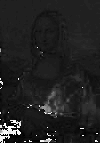

In [58]:
%%octave -s 600,200 -f png
a = imread('coffee.jpg')
hsvImage = rgb2hsv(a);
r=hsvImage(:,:,1);
figure
imshow(r)

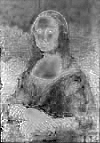

In [59]:
%%octave -s 600,200 -f png
g=hsvImage(:,:,2);
figure
imshow(g)

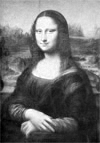

In [60]:
%%octave -s 600,200 -f png
g=hsvImage(:,:,3);
figure
imshow(g)

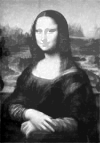

In [106]:
%%octave
d = imfill(g);
figure
imshow(d)

In [89]:
!sudo apt-get install octave-image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  octave-image
0 upgraded, 1 newly installed, 0 to remove and 122 not upgraded.
Need to get 503 kB of archives.
After this operation, 2,874 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 octave-image amd64 2.6.2-5 [503 kB]
Fetched 503 kB in 1s (468 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package octave-image.
(Reading database ... 139807 files and direc

In [105]:
%%octave
pkg load image
pkg list

Package Name  | Version | Installation directory

--------------+---------+-----------------------

       image *|  2.10.0 | /usr/share/octave/packages/image-2.10.0

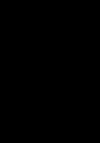

In [108]:
%%octave
e = bwareafilt(g,[100 100]);
figure
imshow(e)